# DS4A Team 77 - Exploratory Data Analysis

## Section 1: Aissatou EDA
By Aissatou Bah

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import statsmodels.formula.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

## Exploratory Data Analysis 

In [3]:
# import data from TV_Viewing_Profiles and Social_media datasets
viewers_demo = pd.read_csv("data/Social_media and TV Profiles/viewers_demo.csv")
viewers_demo.set_index("year", True)
sports_views = pd.read_csv("data/Social_media and TV Profiles/sports_views_tools.csv")
sports_views.set_index("year", inplace=True)
twitter_users = pd.read_csv("data/Social_media and TV Profiles/twitter_users.csv")
twitter_users.set_index("year", inplace=True)
facebook_users = pd.read_csv('data/Social_media and TV Profiles/facebook_users.csv')
facebook_users.set_index("year", inplace=True)

In [4]:
# import data from sports_apparel dataset
a_age_group = pd.read_csv("data/sports_apparel/age_group.csv")
a_amount_spent = pd.read_csv("data/sports_apparel/amount_spent.csv")
a_average_expenditure = pd.read_csv("data/sports_apparel/average_expenditure.csv")
a_gender = pd.read_csv("data/sports_apparel/gender.csv")
a_geographic_region = pd.read_csv("data/sports_apparel/geographic_region.csv")
a_household_income = pd.read_csv("data/sports_apparel/household_income.csv")

In [5]:
# import data from sports_influence dataset
i_age = pd.read_csv("data/sports_influence/age.csv")
i_basketball_data = pd.read_csv("data/sports_influence/basketball_data.csv")
i_income = pd.read_csv("data/sports_influence/income.csv")
i_influence_data = pd.read_csv("data/sports_influence/influence_d.csv") 
i_other_info = pd.read_csv("data/sports_influence/other_info.csv")
i_region = pd.read_csv("data/sports_influence/region.csv")
i_social_media = pd.read_csv("data/sports_influence/social_media.csv")

### viewer demographic and sports views datasets

In [6]:
viewers_demo.head(3)

year  watch_1_2  watch_3_15  watch_16_more  male  female  age_13_17  \
0  2011       18.3        57.4           24.3  62.2    37.8        9.8   
1  2012       20.3        57.4           22.4  54.7    45.3        9.0   
2  2013       19.9        56.4           23.7  56.7    43.3        7.7   

   age_18_34  age_35_49  age_50_64  age_65_over  median_income  \
0       30.9       25.7       25.5          8.1        68512.5   
1       25.3       22.4       25.3         18.0        58400.0   
2       29.9       21.5       22.7         18.3        59300.0   

   income_under_25k  income_25k-49k  income_50k_99K  income_100k_more  \
0              13.9            21.7            35.9              28.5   
1              21.1            22.1            32.1              24.7   
2              20.9            22.1            31.6              25.4   

   total_surveyed  
0      73003000.0  
1      80967000.0  
2      68451000.0

In [7]:
viewers_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10 non-null     int64  
 1   watch_1_2         10 non-null     float64
 2   watch_3_15        10 non-null     float64
 3   watch_16_more     10 non-null     float64
 4   male              10 non-null     float64
 5   female            10 non-null     float64
 6   age_13_17         10 non-null     float64
 7   age_18_34         10 non-null     float64
 8   age_35_49         10 non-null     float64
 9   age_50_64         10 non-null     float64
 10  age_65_over       10 non-null     float64
 11  median_income     10 non-null     float64
 12  income_under_25k  10 non-null     float64
 13  income_25k-49k    10 non-null     float64
 14  income_50k_99K    10 non-null     float64
 15  income_100k_more  10 non-null     float64
 16  total_surveyed    10 non-null     float64
dtype

In [8]:
viewers_demo.describe()

year  watch_1_2  watch_3_15  watch_16_more       male     female  \
count    10.00000  10.000000   10.000000      10.000000  10.000000  10.000000   
mean   2015.50000  21.988889   54.600000      23.077778  59.077778  40.922222   
std       3.02765   2.782662    2.388398       1.674500   2.430262   2.430262   
min    2011.00000  18.300000   51.000000      20.400000  54.700000  37.300000   
25%    2013.25000  19.925000   53.000000      21.950000  57.575000  40.050000   
50%    2015.50000  21.144444   54.800000      23.288889  59.288889  40.711111   
75%    2017.75000  24.475000   56.375000      23.700000  59.950000  42.425000   
max    2020.00000  25.900000   57.400000      26.400000  62.700000  45.300000   

       age_13_17  age_18_34  age_35_49  age_50_64  age_65_over  median_income  \
count  10.000000  10.000000  10.000000  10.000000    10.000000      10.000000   
mean    6.700000  27.125000  24.825000  25.237500    16.112500   68512.500000   
std     1.654623   3.509273   2.287041   1.262218     3.227120    6648.046915   
min     5.000000  20.400000  21.500000  22.700000     8.100000   58400.000000   
25%     5.350000  25.525000  23.025000  25.237500    15.278125   66200.000000   
50%     6.350000  27.125000  24.825000  25.400000    17.056250   68106.250000   
75%     7.450000  29.975000  26.000000  26.100000    18.275000   73678.125000   
max     9.800000  31.100000  29.200000  26.600000    18.700000   77800.000000   

       income_under_25k  income_25k-49k  income_50k_99K  income_100k_more  \
count         10.000000       10.000000       10.000000         10.000000   
mean          15.888889       20.633333       32.500000         31.077778   
std            3.002016        1.564182        1.826959          4.737974   
min           12.300000       17.900000       29.000000         24.700000   
25%           13.825000       19.708333       32.025000         28.125000   
50%           15.694444       21.250000       32.300000         30.788889   
75%           16.275000       21.700000       32.575000         34.625000   
max           21.100000       22.100000       35.900000         39.300000   

       total_surveyed  
count    1.000000e+01  
mean     7.194311e+07  
std      5.100952e+06  
min      6.446700e+07  
25%      6.861025e+07  
50%      7.098606e+07  
75%      7.524250e+07  
max      8.096700e+07

Let's look at the distribution of some of the variables

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefa93e250>,
      dtype=object)

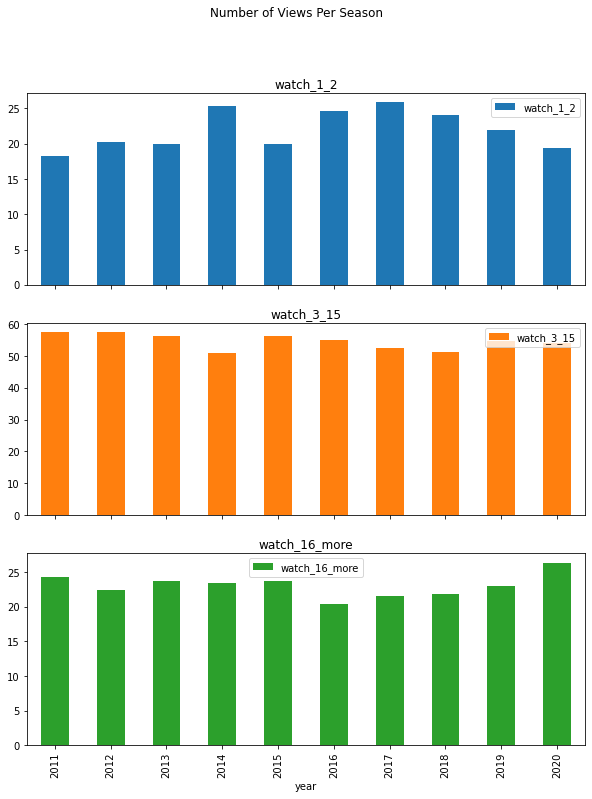

In [9]:
# distribution of viewership
n_views = viewers_demo[["year", "watch_1_2", "watch_3_15", "watch_16_more"]].set_index("year")
n_views.plot(kind="bar", subplots=True, figsize=(10, 12), title="Number of Views Per Season")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefaa9c070>,
      dtype=object)

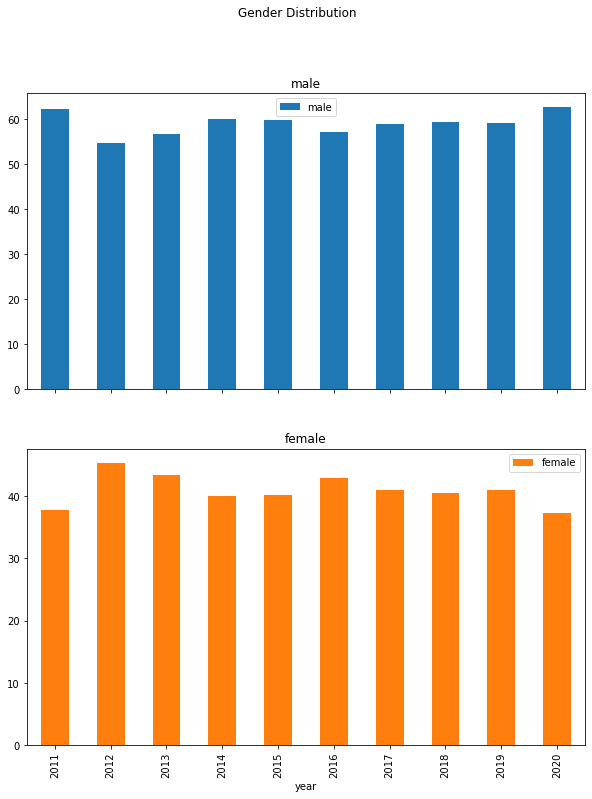

In [10]:
# distribution of gender
gender = viewers_demo[["year", "male", "female"]].set_index("year")
gender.plot(kind="bar", subplots=True, figsize=(10, 12), title="Gender Distribution")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefad6cf70>,
      dtype=object)

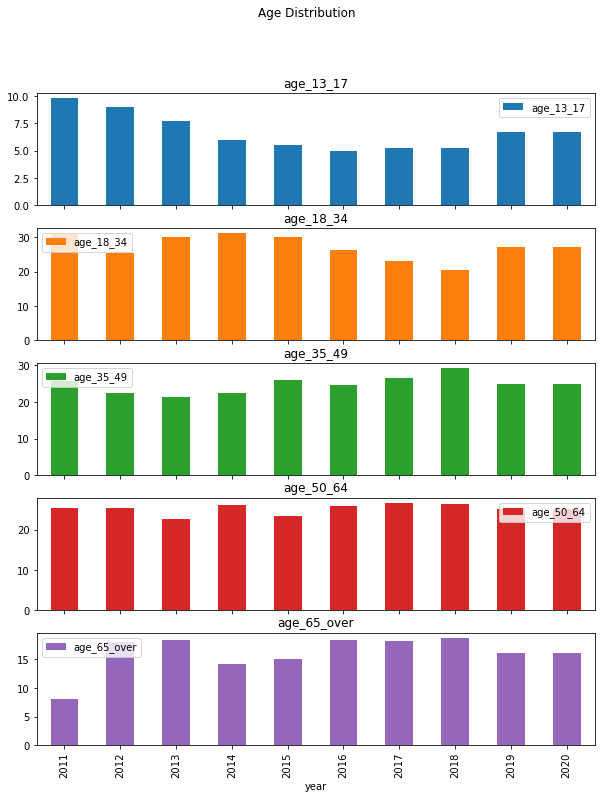

In [11]:
# Age distribution
age = viewers_demo[["year", "age_13_17", "age_18_34", "age_35_49", "age_50_64", "age_65_over"]].set_index("year")
age.plot(kind="bar", subplots=True, figsize=(10, 12), title="Age Distribution")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefb675e20>,
      dtype=object)

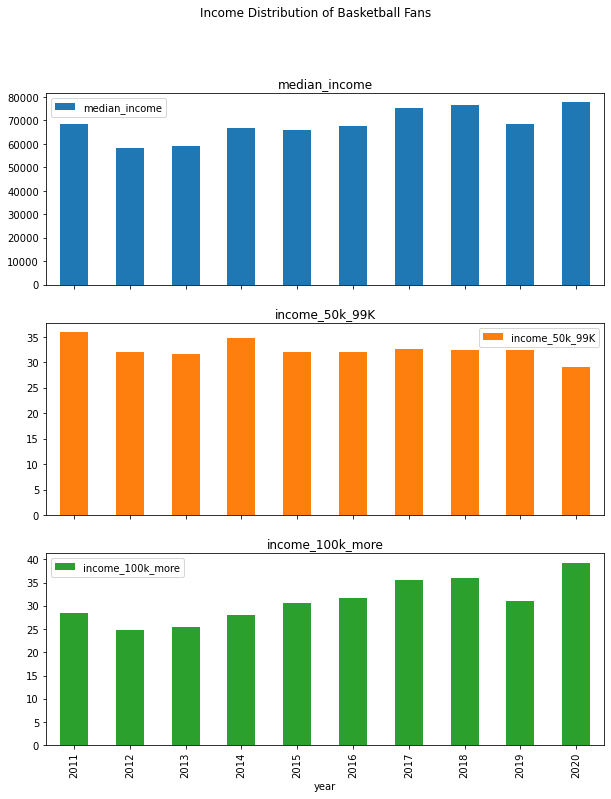

In [12]:
# income distribution
income = viewers_demo[["year", "median_income", "income_50k_99K","income_100k_more"]].set_index("year")
income.plot(kind="bar", subplots=True, title="Income Distribution of Basketball Fans", 
           figsize=(10, 12))

### sports_views_dataset

In [13]:
sports_views.head(2)

total mobile owners who viewed nba game (s) on tv  \
year                                                      
2016                                         71100000.0   
2017                                         66054000.0   

      number used for game-viewing-related activities related to game viewing on tv  \
year                                                                                  
2016                                         12690000.0                               
2017                                         15560000.0                               

      % using for activities related to game (s) viewing on tv  \
year                                                             
2016                                               17.8          
2017                                               23.6          

      total nba fans who watched on tv and own a smartphone and/or tablet  \
year                                                                        
2016                                         71100000.0                     
2017                                         66054000.0                     

      use smartphone and/or tablet for game-viewing-related purpose while viewing games on tv  \
year                                                                                            
2016                                         12690000.0                                         
2017                                         15560000.0                                         

      used social media (net)  used facebook to follow/post about this game  \
year                                                                          
2016                9225000.0                                     5203000.0   
2017                9693000.0                                     5258000.0   

      used instagram to follow/post about this game  \
year                                                  
2016                                      2699000.0   
2017                                      2711000.0   

      used twitter to follow/post about this game  \
year                                                
2016                                    3166000.0   
2017                                    3322000.0   

      used google+ to follow/post about this game  ...  visit league website   \
year                                               ...                          
2016                                    1443000.0  ...              3360000.0   
2017                                    1842000.0  ...              4144000.0   

      read sports articles/blogs about this game  watch other sports live  \
year                                                                        
2016                                   4227000.0                2829000.0   
2017                                   3957000.0                3125000.0   

      buy sports logo apparel  listen to radio broadcast of game  \
year                                                               
2016                2450000.0                          2685000.0   
2017                2077000.0                          2689000.0   

      watch other sports on demand  follow fantasy teams  buy sports footwear  \
year                                                                            
2016                     1698000.0             1867000.0            2289000.0   
2017                     2208000.0             2535000.0            2001000.0   

      buy tickets to other games     other  
year                                        
2016                   1234000.0  224000.0  
2017                   1712000.0   41000.0  

[2 rows x 29 columns]

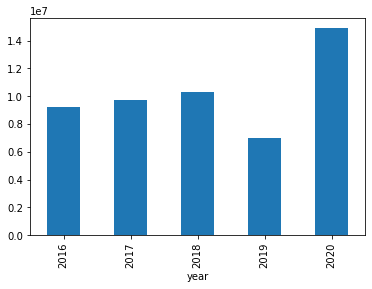

In [14]:
# distribution  of NBA fans who uses social media
sports_views["used social media (net)"].plot(kind="bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefb9ea430>,
      dtype=object)

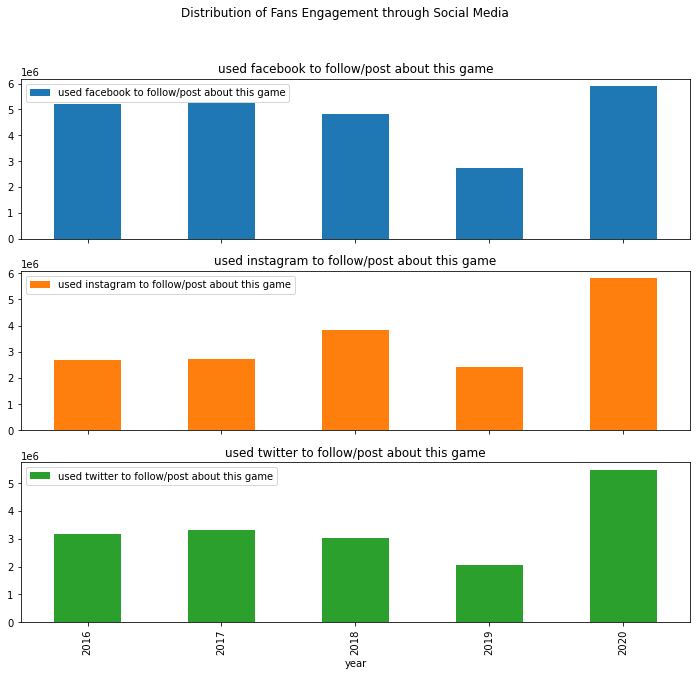

In [15]:
# Compare engagement distribution for facebook, instagram and twitter
sm = sports_views[["used facebook to follow/post about this game", 
                   "used instagram to follow/post about this game", 
                  "used twitter to follow/post about this game"]]
sm.plot(kind="bar", subplots=True, figsize=(12, 10), 
        title="Distribution of Fans Engagement through Social Media")

In [16]:
sm["total_users"] = sports_views["used social media (net)"]

<ipython-input-16-fc0e7fe562be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm["total_users"] = sports_views["used social media (net)"]


In [17]:
# facebook instagram and twitter statistics
sm.describe()

used facebook to follow/post about this game  \
count                                  5.000000e+00   
mean                                   4.773800e+06   
std                                    1.215792e+06   
min                                    2.714000e+06   
25%                                    4.802000e+06   
50%                                    5.203000e+06   
75%                                    5.258000e+06   
max                                    5.892000e+06   

       used instagram to follow/post about this game  \
count                                   5.000000e+00   
mean                                    3.497400e+06   
std                                     1.401114e+06   
min                                     2.428000e+06   
25%                                     2.699000e+06   
50%                                     2.711000e+06   
75%                                     3.842000e+06   
max                                     5.807000e+06   

       used twitter to follow/post about this game   total_users  
count                                 5.000000e+00  5.000000e+00  
mean                                  3.406600e+06  1.021900e+07  
std                                   1.256145e+06  2.901026e+06  
min                                   2.046000e+06  6.965000e+06  
25%                                   3.030000e+06  9.225000e+06  
50%                                   3.166000e+06  9.693000e+06  
75%                                   3.322000e+06  1.032400e+07  
max                                   5.469000e+06  1.488800e+07

### Explore twitter user dataset

In [18]:
twitter_users.head(3)

% of all NBA fans who follow players, coaches, teams or leagues on Twitter  \
year                                                                               
2011                                                8.6                            
2012                                               10.8                            
2013                                               12.3                            

      % of all NBA fans who follow writers, broadcasters or bloggers on Twitter  \
year                                                                              
2011                                                9.3                           
2012                                                9.4                           
2013                                               12.2                           

      Daily (add 000)  4-6 days/week (add 000)  1-3 days/week (add 000)  \
year                                                                      
2011           2820.0                    543.0                   1738.0   
2012           3628.0                   1289.0                   1721.0   
2013           3218.0                   1307.0                   2262.0   

      Less than 1 day/week (add 000)  13-17  18-34  35-49  50-64  ...  Male  \
year                                                              ...         
2011                          2832.0   15.2   57.1   17.9    8.4  ...  67.8   
2012                          4009.0   20.7   50.2   17.3    8.1  ...  62.1   
2013                          3490.0    8.4   51.6   25.1   11.5  ...  56.5   

      Female  Under $25,000  $25,000-$49,999  $50,000-$99,999  \
year                                                            
2011    32.2           14.3             16.4             43.0   
2012    37.9           26.1             29.4             32.6   
2013    43.5           31.4             25.0             23.3   

      $100,000 or more  Median Income  \
year                                    
2011              26.4   65322.222222   
2012              12.0   43900.000000   
2013              20.3   41900.000000   

      Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)  \
year                                                                                          
2011                                           304401.0                                       
2012                                           243808.0                                       
2013                                           300413.0                                       

      Logo Apparel Expenditures by College Basketball Followers on Twitter as % of Logo Apparel Expenditures by All College Basketball Fans  \
year                                                                                                                                          
2011                                               29.3                                                                                       
2012                                               25.4                                                                                       
2013                                               33.3                                                                                       

      total_surveyed  
year                  
2011      17051000.0  
2012      20495000.0  
2013      20039000.0  

[3 rows x 22 columns]

Let's use "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter" (calling expenditures moving forward) as the unit for measurement for how likely fans are to spend money based on the influence of athletes. 
We will use a correlation matrix between expenditures and the other attribute. Select attributes whose correlation is greater than or equal to abs(0.7)

In [19]:
m_corr = twitter_users.corr()
m_corr["Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)"]

% of all NBA fans who follow players, coaches, teams or leagues on Twitter                                                               0.939341
% of all NBA fans who follow writers, broadcasters or bloggers on Twitter                                                                0.936068
Daily (add 000)                                                                                                                          0.592946
4-6 days/week (add 000)                                                                                                                  0.932705
1-3 days/week (add 000)                                                                                                                  0.866629
Less than 1 day/week (add 000)                                                                                                           0.856345
13-17                                                                                                                       

### attributes that made the correlation corr > abs(0.7)
% of all NBA fans who follow players, coaches, teams or leagues on Twitter: 0.939341
% of all NBA fans who follow writers, broadcasters or bloggers on Twitter: 0.936068
4-6 days/week (add 000): .932705          
1-3 days/week (add 000): 0.866629
Less than 1 day/week (add 000): 0.856345
13-17: -0.722190                                                                           
35-49: 0.845022  
Median Age: 0.800674 
Male: 0.702649 
Female: -0.702649
Under $25,000: -0.710825  
$100,000 or more: 0.909068
Median Income : 0.889481

In [20]:
# Heatmap of the selected attributes
select_twitter_users = twitter_users[["% of all NBA fans who follow players, coaches, teams or leagues on Twitter",
                                     "% of all NBA fans who follow writers, broadcasters or bloggers on Twitter",
                                     "4-6 days/week (add 000)", "1-3 days/week (add 000)", "Less than 1 day/week (add 000)",
                                     "13-17", "35-49", "Median Age", "Male", "Female", "Under $25,000", "$100,000 or more",
                                     "Median Income", "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)"]]
# Rename columns
attributes = ["P_follow_players", "P_follow_writers", "use_app_4_6_000", "use_app_1_3_000", "use_app_less_1_000",
              "age_13_17", "age_35_49", "median_age", "male", "female", "income_under25k",
             "income_100k_more", "median_income", "expenditures"]
columns = list(select_twitter_users.columns)
name_dict= {columns[0]:attributes[0], columns[1]:attributes[1], columns[2]:attributes[2],
            columns[3]:attributes[3], columns[4]:attributes[4], columns[5]:attributes[5],
            columns[6]:attributes[6], columns[7]:attributes[7], columns[8]:attributes[8], 
          columns[9]:attributes[9], columns[10]:attributes[10], columns[11]:attributes[12],
          columns[13]:attributes[13]}
select_twitter_users.rename(columns=name_dict, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


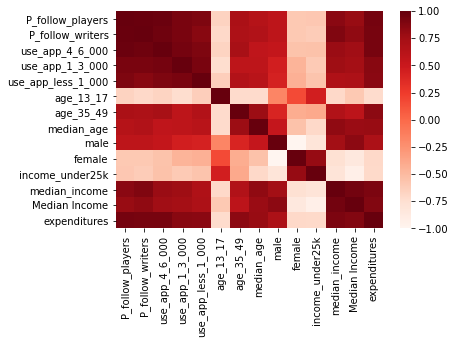

In [21]:
sns.heatmap(select_twitter_users.corr(), cmap="Reds")

In [22]:
# look at the statistics of the selected attributes
select_twitter_users.describe()

P_follow_players  P_follow_writers  use_app_4_6_000  use_app_1_3_000  \
count         10.000000          10.00000        10.000000        10.000000   
mean          17.740000          17.25000      2340.600000      3308.100000   
std            7.150478           6.88884      1271.361055      1344.240178   
min            8.600000           9.30000       543.000000      1721.000000   
25%           12.925000          12.87500      1499.750000      2369.000000   
50%           16.500000          16.90000      2125.000000      3205.000000   
75%           20.775000          19.27500      2749.750000      3686.000000   
max           33.000000          32.70000      4918.000000      5611.000000   

       use_app_less_1_000  age_13_17  age_35_49  median_age       male  \
count           10.000000  10.000000  10.000000   10.000000  10.000000   
mean          5709.000000   9.420000  26.310000   32.111111  64.670000   
std           2038.439817   4.879617   7.094356    3.142697   5.036103   
min           2832.000000   5.400000  17.300000   26.000000  56.500000   
25%           4137.250000   6.550000  22.625000   30.500000  62.425000   
50%           5598.500000   7.550000  25.650000   32.555556  65.700000   
75%           7311.500000   9.450000  29.275000   33.750000  67.400000   
max           8711.000000  20.700000  40.800000   37.000000  72.500000   

          female  income_under25k  median_income  Median Income   expenditures  
count  10.000000        10.000000       10.00000      10.000000      10.000000  
mean   35.330000        16.840000       27.76000   65322.222222  469911.000000  
std     5.036103         7.117927        8.76105   14496.036070  174914.271947  
min    27.500000         8.800000       12.00000   41900.000000  243808.000000  
25%    32.600000        12.525000       23.85000   60700.000000  327481.750000  
50%    34.300000        15.250000       28.10000   66261.111111  448420.000000  
75%    37.575000        18.725000       30.65000   72375.000000  586231.000000  
max    43.500000        31.400000       45.20000   90500.000000  782324.000000

The columns that ends with (000) indicate that the variable is in thousands. For instance, the mean value of people that uses twitter four to six times a day per week is 2340600.

Let's look at the attributes that were not selected using correlation. They do not have a strong linear relationship with expenditures but there could be another relationship there

In [23]:
attributes = ["Daily", "18_34", "50_64", "over_65", "income_25_50k", "income_50_99k",
              "expenditures"]
weak_correlation = twitter_users[["Daily (add 000)", "18-34", "50-64", "65+", "$25,000-$49,999",
                                "$50,000-$99,999", "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Twitter (add 000)"]]
columns = list(weak_correlation.columns)
name_dict = {columns[0]:attributes[0], columns[1]:attributes[1], columns[2]:attributes[2],
            columns[3]:attributes[3], columns[4]:attributes[4], columns[5]:attributes[5],
            columns[6]:attributes[6]}
weak_correlation.rename(columns = name_dict, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


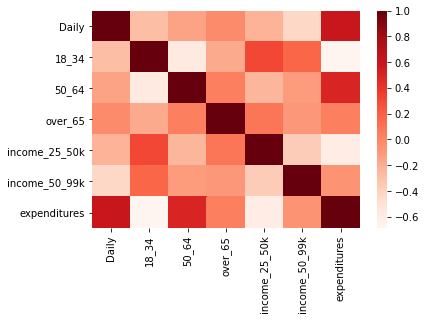

In [24]:
sns.heatmap(weak_correlation.corr(), cmap="Reds")

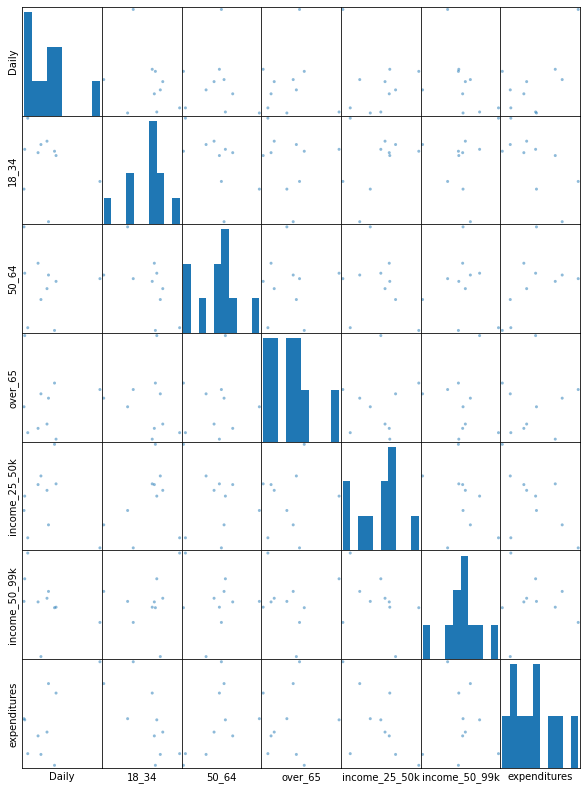

In [25]:
# scatterplot of attributes with weak correlation: corr < abs(.7)
sm = pd.plotting.scatter_matrix(weak_correlation, figsize=(10, 14))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

In [26]:
weak_correlation.describe()

Daily      18_34      50_64    over_65  income_25_50k  \
count    10.000000  10.000000  10.000000  10.000000      10.000000   
mean   3375.200000  48.270000  13.160000   2.870000      21.710000   
std     670.738035   6.109928   3.334067   1.425989       4.331397   
min    2707.000000  35.500000   8.100000   1.200000      15.000000   
25%    2897.750000  45.250000  11.800000   1.750000      18.700000   
50%    3309.500000  50.050000  13.650000   2.900000      22.600000   
75%    3582.500000  51.350000  14.350000   3.450000      23.875000   
max    4998.000000  57.100000  19.500000   6.000000      29.400000   

       income_50_99k   expenditures  
count      10.000000      10.000000  
mean       33.710000  469911.000000  
std         5.119993  174914.271947  
min        23.300000  243808.000000  
25%        32.625000  327481.750000  
50%        33.750000  448420.000000  
75%        35.375000  586231.000000  
max        43.000000  782324.000000

### Explore Facebook users dataset

In [27]:
facebook_users.head(3)

% of all NBA fans who follow players, coaches, teams or leagues on Facebook  \
year                                                                                
2011                                               17.5                             
2012                                               19.1                             
2013                                               22.6                             

      % of all NBA fans who follow writers, broadcasters or bloggers on Facebook  \
year                                                                               
2011                                               17.1                            
2012                                               17.4                            
2013                                               21.9                            

      Daily (add 000)  4-6 days/week (add 000)  1-3 days/week (add 000)  \
year                                                                      
2011           3015.0                   2353.0                   3241.0   
2012           3897.0                   2282.0                   4042.0   
2013           4101.0                   2199.0                   4514.0   

      Less than 1 day/week (add 000)  13-17  18-34  35-49  50-64  ...  \
year                                                              ...   
2011                          8442.0   16.3   42.8   21.0   16.2  ...   
2012                         10274.0   14.1   47.4   23.2   13.3  ...   
2013                          9225.0    8.4   51.6   25.1   11.5  ...   

      $25,000-$49,999  $50,000-$99,999  $100,000 or more  Median Income  \
year                                                                      
2011             24.3             38.1              25.0   61755.555556   
2012             32.3             27.6              13.3   42600.000000   
2013             23.9             29.0              20.1   48700.000000   

      Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000)  \
year                                                                                           
2011                                           571272.0                                        
2012                                           506120.0                                        
2013                                           485582.0                                        

      Logo Apparel Expenditures by NBA Followers on Facebook as % of Logo Apparel Expenditures by All College Basketball Fans  \
year                                                                                                                            
2011                                               55.0                                                                         
2012                                               52.7                                                                         
2013                                               53.8                                                                         

      Average Expenditure Per Buyer  Number of followers - add 000  \
year                                                                 
2011                           80.3                         7933.0   
2012                           93.2                        10647.0   
2013                           68.6                        10278.0   

      % of all NBA Fans  total_surveyed  
year                                     
2011               10.2      17051000.0  
2012               12.4      20495000.0  
2013               13.9      20039000.0  

[3 rows x 25 columns]

In [28]:
# correlation matrix
facebook_corr = facebook_users.corr()
facebook_corr[["Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000)",
              "Logo Apparel Expenditures by NBA Followers on Facebook as % of Logo Apparel Expenditures by All College Basketball Fans",
              "Average Expenditure Per Buyer"]]

Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000)  \
% of all NBA fans who follow players, coaches, ...                                           0.889413                                        
% of all NBA fans who follow writers, broadcast...                                           0.895530                                        
Daily (add 000)                                                                              0.542073                                        
4-6 days/week (add 000)                                                                      0.789341                                        
1-3 days/week (add 000)                                                                      0.839567                                        
Less than 1 day/week (add 000)                                                               0.257231                                        
13-17                                                                                       -0.734494                                        
18-34                                                                                       -0.679305                                        
35-49                                                                                        0.769901                                        
50-64                                                                                        0.759625                                        
65+                                                                                          0.755546                                        
Median Age                                                                                   0.809603                                        
Male                                                                                         0.069423                                        
Female                                                                                      -0.069423                                        
Under $25,000                                                                               -0.569430                                        
$25,000-$49,999                                                                             -0.548703                                        
$50,000-$99,999                                                                             -0.055363                                        
$100,000 or more                                                                             0.631441                                        
Median Income                                                                                0.770852                                        
Total Logo Apparel Expenditures by NBA Fans Who...                                           1.000000                                        
Logo Apparel Expenditures by NBA Followers on F...                                           0.956572                                        
Average Expenditure Per Buyer                                                               -0.202207                                        
Number of followers - add 000                                                                0.879618                                        
% of all NBA Fans                                                                            0.879429                                        
total_surveyed                                                                               0.830338                                        

                                                    Logo Apparel Expenditures by NBA Followers on Facebook as % of Logo Apparel Expenditures by All College Basketball Fans  \
% of all NBA fans who follow players, coaches, ...                                           0.920609                                                                         
% of all 

In [29]:
# same selection criteria as the twitter dataset
select_facebook = facebook_users[["% of all NBA fans who follow players, coaches, teams or leagues on Facebook",
                                 "% of all NBA fans who follow writers, broadcasters or bloggers on Facebook",
                                 "4-6 days/week (add 000)", "1-3 days/week (add 000)", "13-17",
                                 "35-49", "50-64", "65+", "Median Age", "Median Income",
                                 ]]
# Rename columns
attributes = ["P_follow_players","P_follow_writers", "use_app_4_6_000", "use_app_1_3_000", "age_13_17", "age_35_49",
             "age_50_64", "age_65+", "median_age", "median_income"]
columns = list(select_facebook.columns)
name_dict = {columns[0]:attributes[0], columns[1]:attributes[1], columns[2]:attributes[2],
            columns[3]:attributes[3], columns[4]:attributes[4], columns[5]:attributes[5],
            columns[6]:attributes[6], columns[7]:attributes[7], columns[8]:attributes[8], 
          columns[9]:attributes[9]}
select_facebook.rename(columns=name_dict, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


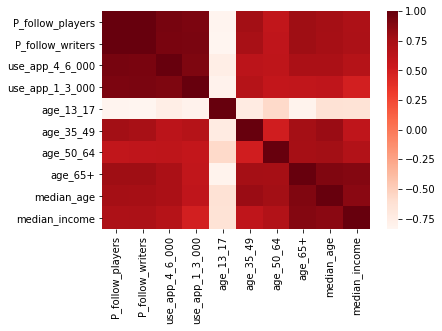

In [30]:
sns.heatmap(select_facebook.corr(), cmap="Reds")

In [31]:
select_facebook.describe()

P_follow_players  P_follow_writers  use_app_4_6_000  use_app_1_3_000  \
count         10.000000         10.000000        10.000000         10.00000   
mean          29.430000         27.790000      3265.300000       5841.50000   
std            9.243622          8.393046      1007.930559       1827.32514   
min           17.500000         17.100000      2199.000000       3241.00000   
25%           22.800000         22.225000      2319.250000       4590.50000   
50%           29.200000         27.700000      3290.500000       5776.00000   
75%           34.550000         31.975000      3687.750000       6499.25000   
max           47.500000         44.200000      5068.000000       8947.00000   

       age_13_17  age_35_49  age_50_64    age_65+  median_age  median_income  
count  10.000000   10.00000  10.000000  10.000000   10.000000      10.000000  
mean    7.140000   27.50000  16.600000   5.140000   34.333333   61755.555556  
std     4.747912    5.18395   2.472965   1.886325    2.867442   10866.575778  
min     2.300000   21.00000  11.500000   2.000000   30.000000   42600.000000  
25%     3.950000   23.47500  16.225000   3.750000   31.750000   57125.000000  
50%     5.600000   27.45000  17.250000   5.200000   34.666667   61677.777778  
75%     8.350000   31.17500  18.000000   6.725000   36.000000   67975.000000  
max    16.300000   36.60000  19.300000   7.500000   38.000000   78700.000000

In [32]:
# look at variables with weak correlation
fb_weak_corr = facebook_users[["Daily (add 000)", "Less than 1 day/week (add 000)", "18-34",
                              "Male", "Female", "Under $25,000", "$25,000-$49,999", 
                              "$50,000-$99,999", "$100,000 or more", 
                               "Total Logo Apparel Expenditures by NBA Fans Who Followed the NBA on Facebook (add 000)"]]
columns = fb_weak_corr.columns
attributes = ["daily", "use_app_less_1", "age_18_34", "male", "female", "income_under_25k",
             "income_25_50k", "income_50_100k", "income_100_more", "expenditures"]
name_dict = {columns[0]: attributes[0],columns[1]: attributes[1],columns[2]: attributes[2],
            columns[3]: attributes[3], columns[4]: attributes[4], columns[5]: attributes[5],
            columns[6]: attributes[6], columns[7]: attributes[7], columns[8]: attributes[8],
            columns[9]: attributes[9]}
fb_weak_corr.rename(columns=name_dict, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


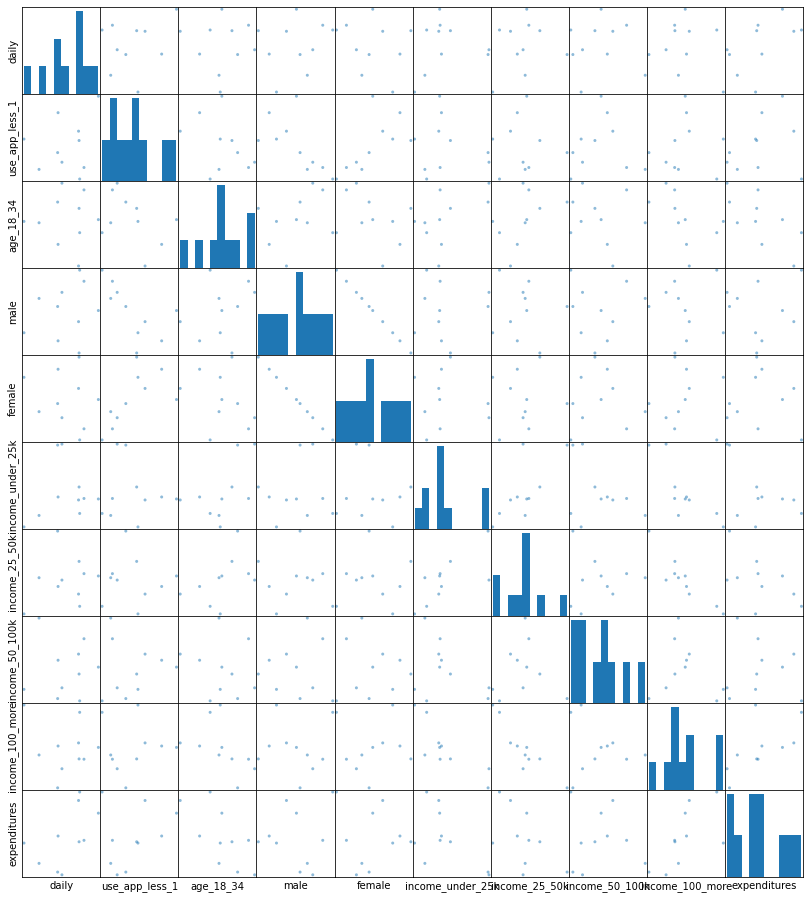

In [33]:
# scatterplot of attributes with weak correlation: corr < abs(.7)
sm = pd.plotting.scatter_matrix(fb_weak_corr, figsize=(14, 16))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

In [34]:
fb_weak_corr.describe()

daily  use_app_less_1  age_18_34       male     female  \
count    10.000000       10.000000  10.000000  10.000000  10.000000   
mean   4294.700000    11097.800000  43.630000  59.480000  40.520000   
std    1063.736606     2880.982232   5.536355   2.623314   2.623314   
min    2300.000000     7394.000000  33.200000  55.300000  36.500000   
25%    3902.000000     8792.250000  41.150000  57.575000  38.850000   
50%    4494.500000    10932.500000  43.300000  59.700000  40.300000   
75%    4934.750000    12393.750000  47.050000  61.150000  42.425000   
max    5828.000000    16423.000000  51.600000  63.500000  44.700000   

       income_under_25k  income_25_50k  income_50_100k  income_100_more  \
count         10.000000      10.000000       10.000000        10.000000   
mean          17.270000      23.900000       31.470000        27.370000   
std            5.559187       3.993328        3.503982         8.773958   
min           10.400000      18.100000       27.300000        13.300000   
25%           13.775000      21.825000       28.850000        23.525000   
50%           16.050000      24.100000       31.250000        26.350000   
75%           17.900000      24.900000       33.200000        29.025000   
max           27.000000      32.300000       38.100000        42.800000   

       expenditures  
count  1.000000e+01  
mean   7.631242e+05  
std    2.137120e+05  
min    4.855820e+05  
25%    6.092308e+05  
50%    7.380500e+05  
75%    9.040780e+05  
max    1.104961e+06

#### expenditures comparison for facebook users and twitter users

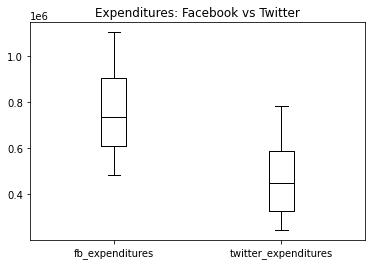

In [35]:
# create a new dataframe with facebook and twitter expenditures
d = {"fb_expenditures":fb_weak_corr["expenditures"], 
     "twitter_expenditures":weak_correlation["expenditures"]}
expenditures = pd.DataFrame(data=d)
expenditures.plot(kind='box', title="Expenditures: Facebook vs Twitter", color="k")

#### Explore datasets from sport apparel 

In [36]:
a_age_group.head(2)

Unnamed: 0  13-17  18-34  35-49  50-64  65+  Median Age  \
0        2011   12.5   40.3   28.3   16.9  1.9   34.666667   
1        2012   13.8   35.9   24.6   19.6  6.1   35.000000   

   Base (no. of buyers - add 000)  
0                         14856.0  
1                         14139.0

In [37]:
# set the index
a_age_group.rename({"Unnamed: 0": "year"}, axis = 1, inplace=True)
a_age_group.set_index("year", inplace=True)

In [38]:
a_age_group

13-17  18-34  35-49  50-64  65+  Median Age  \
year                                                
2011   12.5   40.3   28.3   16.9  1.9   34.666667   
2012   13.8   35.9   24.6   19.6  6.1   35.000000   
2013   10.0   40.7   30.3   12.7  6.3   34.000000   
2014    8.7   45.4   25.5   15.6  4.8   33.000000   
2015    7.7   42.8   28.3   15.0  6.3   34.000000   
2016    5.5   44.5   26.4   18.8  4.8   34.000000   
2016    9.5   38.0   32.1   15.9  4.4   36.000000   
2018    6.2   35.2   37.2   15.6  5.7   37.000000   
2019    4.8   45.3   28.9   12.9  8.1   34.000000   
2020    6.1   40.9   31.5   16.0  5.5   35.000000   

      Base (no. of buyers - add 000)  
year                                  
2011                         14856.0  
2012                         14139.0  
2013                         13399.0  
2014                         14530.0  
2015                         20053.0  
2016                         16509.0  
2016                         15782.0  
2018                         20026.0  
2019                         13481.0  
2020                         18666.0

In [39]:
a_age_group.describe()

13-17      18-34      35-49      50-64        65+  Median Age  \
count  10.000000  10.000000  10.000000  10.000000  10.000000   10.000000   
mean    8.480000  40.900000  29.310000  15.900000   5.390000   34.666667   
std     3.013967   3.689023   3.699685   2.194437   1.614827    1.154701   
min     4.800000  35.200000  24.600000  12.700000   1.900000   33.000000   
25%     6.125000  38.575000  26.875000  15.150000   4.800000   34.000000   
50%     8.200000  40.800000  28.600000  15.750000   5.600000   34.333333   
75%     9.875000  44.075000  31.200000  16.675000   6.250000   35.000000   
max    13.800000  45.400000  37.200000  19.600000   8.100000   37.000000   

       Base (no. of buyers - add 000)  
count                       10.000000  
mean                     16144.100000  
std                       2579.524437  
min                      13399.000000  
25%                      14236.750000  
50%                      15319.000000  
75%                      18126.750000  
max                      20053.000000

#### Amount spent

In [40]:
a_amount_spent.head()

Unnamed: 0  Under $50  $50 or more  Base (no. of buyers - add 000)
0        2011       47.8         52.2                         14856.0
1        2012       52.6         47.4                         14139.0
2        2013       53.6         46.4                         13399.0
3        2014       41.8         58.2                         14530.0
4        2015       50.3         49.7                         20053.0

In [41]:
a_amount_spent.rename({"Unnamed: 0": "year"}, axis = 1, inplace=True)
a_amount_spent.set_index("year", inplace=True)

In [42]:
a_amount_spent.describe()

Under $50  $50 or more  Base (no. of buyers - add 000)
count  10.000000    10.000000                       10.000000
mean   47.590000    52.410000                    16144.100000
std     4.935461     4.935461                     2579.524437
min    40.400000    46.000000                    13399.000000
25%    43.925000    47.975000                    14236.750000
50%    47.450000    52.550000                    15319.000000
75%    52.025000    56.075000                    18126.750000
max    54.000000    59.600000                    20053.000000

From the TV Viewing Profiles dataset, we had a strong positive correlation between expenditure and age_35_49. Surpringly, we had the opposite relation between expenditure and age_18_34. 

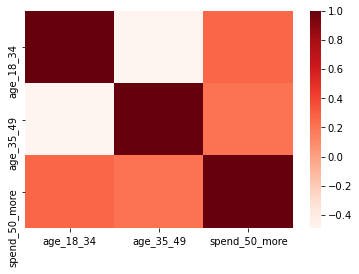

In [43]:
d = {"age_18_34":a_age_group["18-34"], "age_35_49":a_age_group["35-49"],
    "spend_50_more":a_amount_spent["$50 or more"]}
spending = pd.DataFrame(data=d)
sns.heatmap(spending.corr(), cmap="Reds")

In [44]:
spending.corr()

age_18_34  age_35_49  spend_50_more
age_18_34       1.000000  -0.492128       0.270836
age_35_49      -0.492128   1.000000       0.212789
spend_50_more   0.270836   0.212789       1.000000

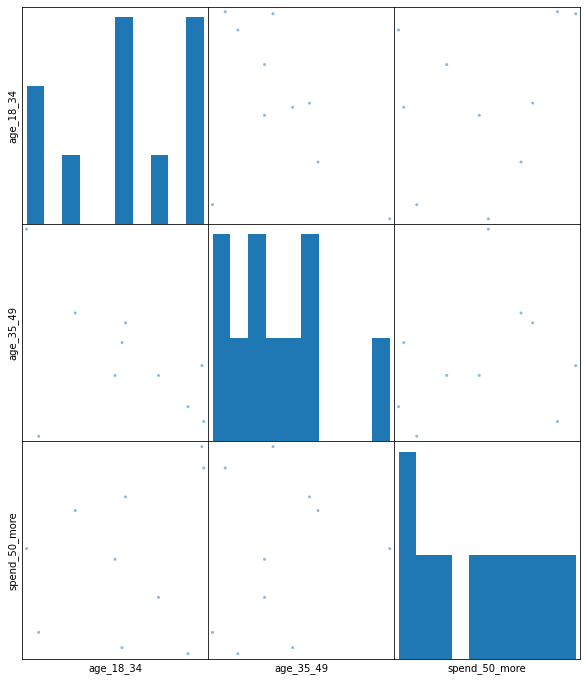

In [45]:
sm = pd.plotting.scatter_matrix(spending, figsize=(10, 12))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

### Explore average expenditures

In [46]:
a_average_expenditure.head(3)

Categories       2011      2012      2013       2014  \
0        Total Buyers (add 000)    14856.0   14139.0   13399.0    14530.0   
1     Buyers as % of Total Fans       19.1      16.5      18.1       19.1   
2  Total Expenditures (add 000)  1038904.0  960616.0  902121.0  1126583.0   

        2015       2016     2016.1       2018       2019       2020  
0    20053.0    16509.0    15782.0    20026.0    13481.0    18666.0  
1       23.9       20.3       21.1       26.9       19.2       27.4  
2  1272370.0  1125701.0  1148535.0  1480613.0  1189284.0  1392110.0

In [47]:
a_average_expenditure.set_index("Categories", inplace=True)
a_average_expenditure = a_average_expenditure.T

In [48]:
a_average_expenditure.describe()

Categories  Total Buyers (add 000)  Buyers as % of Total Fans  \
count                    10.000000                  10.000000   
mean                  16144.100000                  21.160000   
std                    2579.524437                   3.705012   
min                   13399.000000                  16.500000   
25%                   14236.750000                  19.100000   
50%                   15319.000000                  19.750000   
75%                   18126.750000                  23.200000   
max                   20053.000000                  27.400000   

Categories  Total Expenditures (add 000)  \
count                       1.000000e+01   
mean                        1.163684e+06   
std                         1.805427e+05   
min                         9.021210e+05   
25%                         1.060603e+06   
50%                         1.137559e+06   
75%                         1.251598e+06   
max                         1.480613e+06   

Categories  Average Expenditure for All Sports Logo Apparel Buyers   \
count                                                10.00000         
mean                                                 72.37000         
std                                                   6.94455         
min                                                  63.40000         
25%                                                  67.97500         
50%                                                  71.35000         
75%                                                  74.42500         
max                                                  88.20000         

Categories  Average Expenditure for Sports Logo Apparel Buyers Who Viewed at Least One Game on Online Computer   \
count                                               10.000000                                                     
mean                                                81.100000                                                     
std                                                 12.849384                                                     
min                                                 64.500000                                                     
25%                                                 71.600000                                                     
50%                                                 78.400000                                                     
75%                                                 93.350000                                                     
max                                                 99.600000                                                     

Categories  Average Expenditure for Sports Logo Apparel Spent by Those Who Viewed at Least One Game on Mobile*  \
count                                               10.000000                                                    
mean                                                85.233333                                                    
std                                                 10.097524                                                    
min                                                 68.700000                                                    
25%                                                 78.758333                                                    
50%                                                 86.500000                                                    
75%                                                 90.900000                                                    
max                                                102.700000                                                    

Categories  Average Expenditure for Sports Logo Apparel Spent by Those Who Viewed at Least One Game on Tablet  \
count                                               10.000000                                                   
mean                                                86.040000                           

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


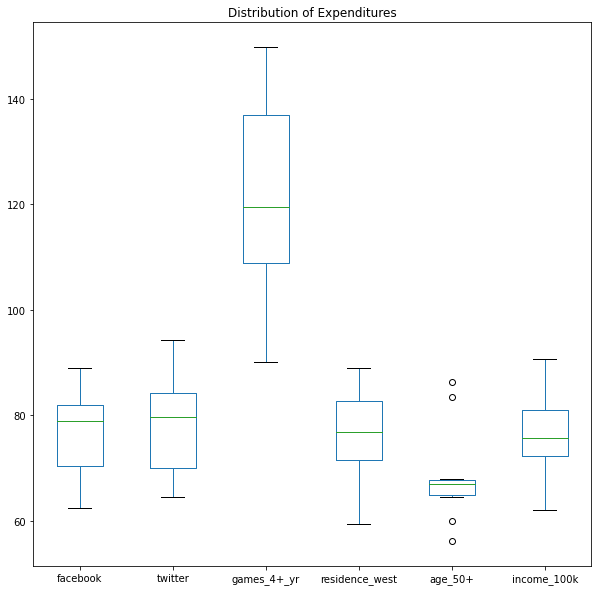

In [49]:
columns = a_average_expenditure.columns
avg_exp =  a_average_expenditure[[columns[8], columns[9], columns[10],
                                  columns[11], columns[12],columns[13]]]
columns = avg_exp.columns
new_names = ["facebook", "twitter", "games_4+_yr", "residence_west", "age_50+",
             "income_100k"]
name_dict = {columns[0]:new_names[0], columns[1]:new_names[1], columns[2]:new_names[2],
            columns[3]:new_names[3], columns[4]:new_names[4], columns[5]:new_names[5]}
avg_exp.rename(columns=name_dict, inplace=True)
avg_exp.plot(kind = "box", title = "Distribution of Expenditures", figsize=(10, 10))

#### explore gender dataset

In [50]:
a_gender.head(2)

Unnamed: 0  Male  Female  Base (no. of buyers - add 000)
0        2011  62.8    37.2                         14856.0
1        2012  53.0    47.0                         14139.0

In [51]:
a_gender.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
a_gender.set_index("year", inplace=True)
a_gender.head(2)

Male  Female  Base (no. of buyers - add 000)
year                                              
2011  62.8    37.2                         14856.0
2012  53.0    47.0                         14139.0

In [52]:
a_gender.describe()

Male     Female  Base (no. of buyers - add 000)
count  10.000000  10.000000                       10.000000
mean   60.330000  39.670000                    16144.100000
std     4.005843   4.005843                     2579.524437
min    53.000000  33.800000                    13399.000000
25%    58.275000  37.350000                    14236.750000
50%    60.250000  39.750000                    15319.000000
75%    62.650000  41.725000                    18126.750000
max    66.200000  47.000000                    20053.000000

#### Explore geographic region dataset

In [53]:
a_geographic_region.head(2)

Unnamed: 0  Northeast  Midwest  South  West  Base (no. of buyers - add 000)
0        2011       14.3     17.0   41.2  27.5                         14856.0
1        2012       19.5     23.5   37.4  19.5                         14139.0

In [54]:
a_geographic_region.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
a_geographic_region.set_index("year", inplace=True)
a_geographic_region.head()

Northeast  Midwest  South  West  Base (no. of buyers - add 000)
year                                                                 
2011       14.3     17.0   41.2  27.5                         14856.0
2012       19.5     23.5   37.4  19.5                         14139.0
2013       16.0     20.4   43.4  20.3                         13399.0
2014       16.3     21.4   41.4  20.8                         14530.0
2015       15.1     22.0   37.5  25.4                         20053.0

In [55]:
a_geographic_region.describe()

Northeast    Midwest      South       West  \
count  10.000000  10.000000  10.000000  10.000000   
mean   16.110000  20.480000  38.190000  25.220000   
std     2.289323   2.368215   3.124971   4.378178   
min    11.600000  16.700000  33.600000  19.500000   
25%    15.325000  19.550000  37.150000  20.950000   
50%    16.200000  20.450000  37.450000  26.100000   
75%    16.400000  21.850000  40.625000  29.225000   
max    19.500000  23.700000  43.400000  30.600000   

       Base (no. of buyers - add 000)  
count                       10.000000  
mean                     16144.100000  
std                       2579.524437  
min                      13399.000000  
25%                      14236.750000  
50%                      15319.000000  
75%                      18126.750000  
max                      20053.000000

#### Explore household income

In [56]:
a_household_income.head(2)

Unnamed: 0  Under $25,000  $25,000-$49,999  $50,000-$99,999  \
0        2011            9.0             18.7             36.2   
1        2012           22.8             27.5             27.8   

   $100,000 or more  Median Income  Base (no. of buyers - add 000)  
0              36.1   66533.333333                         14856.0  
1              21.9   49600.000000                         14139.0

In [57]:
a_household_income.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
a_household_income.set_index("year", inplace=True)

In [58]:
a_household_income.describe()

Under $25,000  $25,000-$49,999  $50,000-$99,999  $100,000 or more  \
count       10.00000        10.000000         10.00000         10.000000   
mean        14.87000        23.030000         31.41000         30.690000   
std          4.70273         3.164403          3.19703          6.860426   
min          9.00000        18.700000         25.70000         21.900000   
25%         12.22500        20.400000         30.02500         25.125000   
50%         13.75000        22.900000         31.30000         30.900000   
75%         17.30000        24.725000         33.47500         35.575000   
max         22.80000        28.100000         36.20000         42.200000   

       Median Income  Base (no. of buyers - add 000)  
count      10.000000                       10.000000  
mean    66533.333333                    16144.100000  
std     10279.321205                     2579.524437  
min     49600.000000                    13399.000000  
25%     58425.000000                    14236.750000  
50%     67166.666667                    15319.000000  
75%     73800.000000                    18126.750000  
max     83200.000000                    20053.000000

#### Sports influence dataset

#### age dataset

In [59]:
i_age.head(3)

Unnamed: 0  13-17  18-24  25-34  35-49   50+
0      2012.0  197.0  210.0  113.0  115.0  42.0
1      2013.0  176.0  106.0  138.0   99.0  66.0
2      2014.0  147.0  103.0  122.0  115.0  71.0

In [60]:
i_age.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
i_age.set_index("year", inplace=True)
i_age.head()

13-17  18-24  25-34  35-49   50+
year                                    
2012.0  197.0  210.0  113.0  115.0  42.0
2013.0  176.0  106.0  138.0   99.0  66.0
2014.0  147.0  103.0  122.0  115.0  71.0
2015.0  143.0  140.0  120.0  112.0  62.0
2016.0  151.0  179.0  147.0  105.0  54.0

In [61]:
i_age.describe()

13-17       18-24       25-34       35-49        50+
count    9.00000    9.000000    9.000000    9.000000   9.000000
mean   149.00000  164.444444  144.444444   95.322222  54.555556
std     25.09482   46.634513   26.486370   37.028157  10.429659
min    119.00000  103.000000  113.000000    1.900000  42.000000
25%    129.00000  136.000000  122.000000   99.000000  48.000000
50%    147.00000  171.000000  143.000000  109.000000  54.000000
75%    155.00000  197.000000  153.000000  115.000000  62.000000
max    197.00000  238.000000  199.000000  121.000000  71.000000

#### basketball dataset

In [62]:
i_basketball_data.head(2)

Unnamed: 0  % Saying Sport Sponsorship is Extremely Influential  \
0      2012.0                                                5.9     
1      2013.0                                                5.4     

   % Saying Sport Sponsorship is Very Influential  \
0                                             8.1   
1                                             9.4   

   % Saying Sport Sponsorship is Moderately Influential  \
0                                               19.3      
1                                               17.7      

   % Saying Sport Sponsorship is Slightly Influential  \
0                                               17.1    
1                                               17.2    

   % Saying Sport Sponsorship is Not at All Influential  \
0                                               49.7      
1                                               50.3      

   Base (Total No. of NBA Fans - add 000)   Male  Female  13-17  ...  \
0                                 85556.0  114.0    82.0  197.0  ...   
1                                 74187.0   98.0   108.0  176.0  ...   

   Used Smartphone to View at Least One Game/yr.  \
0                                          143.0   
1                                          251.0   

   Used Tablet to View at Least One Game/yr.  \
0                                      244.0   
1                                      208.0   

   Used Facebook to Follow Some Type of NBA Activity  \
0                                              216.0   
1                                              183.0   

   Used Facebook Daily to Follow Some Type of NBA Activity  \
0                                              328.0         
1                                              250.0         

   Used Twitter to Follow Some Type of NBA-related Activity  \
0                                              203.0          
1                                              167.0          

   Used Twitter Daily to Follow Some Type of NBA-related Activity  \
0                                              303.0                
1                                              204.0                

   Used Smartphone for Some Type of Sports-related Activity  \
0                                              133.0          
1                                              121.0          

   Used Tablet for Some Type of Sports-related Activity  \
0                                              138.0      
1                                              127.0      

   Used Mobile Device (Smartphone and/or Tablet) for Some Type of Sports-related Activity  \
0                                              127.0                                        
1                                              114.0                                        

   Purchased NBA Logo Apparel  
0                       204.0  
1                       227.0  

[2 rows x 44 columns]

In [63]:
i_basketball_data.rename({"Unnamed: 0": "year"}, axis =1, inplace=True)
i_basketball_data.set_index("year", inplace=True)
i_basketball_data.head()

% Saying Sport Sponsorship is Extremely Influential  \
year                                                          
2012.0                                                5.9     
2013.0                                                5.4     
2014.0                                                7.3     
2015.0                                               10.7     
2016.0                                                7.9     

        % Saying Sport Sponsorship is Very Influential  \
year                                                     
2012.0                                             8.1   
2013.0                                             9.4   
2014.0                                            10.2   
2015.0                                            16.1   
2016.0                                            10.3   

        % Saying Sport Sponsorship is Moderately Influential  \
year                                                           
2012.0                                               19.3      
2013.0                                               17.7      
2014.0                                               18.4      
2015.0                                               19.5      
2016.0                                               18.9      

        % Saying Sport Sponsorship is Slightly Influential  \
year                                                         
2012.0                                               17.1    
2013.0                                               17.2    
2014.0                                               15.7    
2015.0                                               15.7    
2016.0                                               12.5    

        % Saying Sport Sponsorship is Not at All Influential  \
year                                                           
2012.0                                               49.7      
2013.0                                               50.3      
2014.0                                               48.4      
2015.0                                               38.0      
2016.0                                               50.4      

        Base (Total No. of NBA Fans - add 000)   Male  Female  13-17  18-24  \
year                                                                          
2012.0                                 85556.0  114.0    82.0  197.0  210.0   
2013.0                                 74187.0   98.0   108.0  176.0  106.0   
2014.0                                 76026.0  106.0    92.0  147.0  103.0   
2015.0                                 83990.0  105.0    92.0  143.0  140.0   
2016.0                                 81141.0  105.0    93.0  151.0  179.0   

        ...  Used Smartphone to View at Least One Game/yr.  \
year    ...                                                  
2012.0  ...                                          143.0   
2013.0  ...                                          251.0   
2014.0  ...                                          312.0   
2015.0  ...                                          169.0   
2016.0  ...                                          246.0   

        Used Tablet to View at Least One Game/yr.  \
year                                                
2012.0                                      244.0   
2013.0                                      208.0   
2014.0                                      260.0   
2015.0                                      190.0   
2016.0                                      252.0   

        Used Facebook to Follow Some Type of NBA Activity  \
year                                                        
2012.0                                              216.0   
2013.0                                              183.0   
2014.0                                              183.0   
2015.0                                              165.0   
2016.0                                              186.0   

        Used Facebook Daily to Follow

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


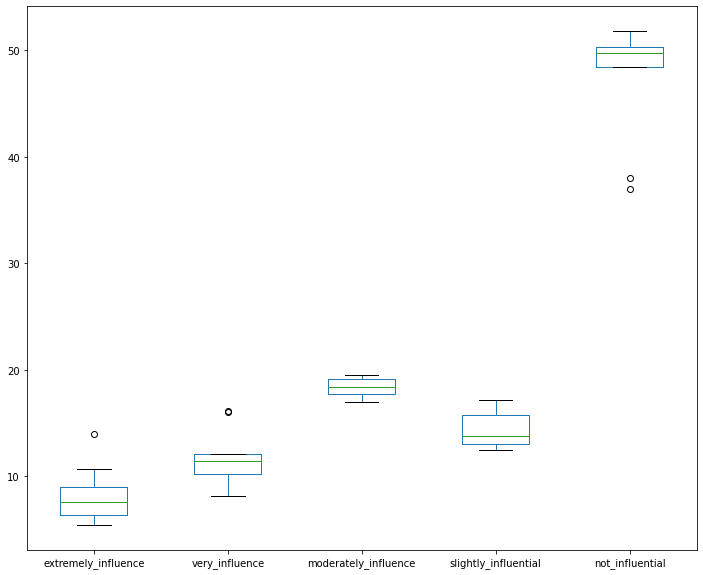

In [64]:
# sports influence opinion
columns = i_basketball_data.columns
influence_opinion = i_basketball_data[[columns[0], columns[1], columns[2], columns[3],
                                       columns[4]]]
influence_columns= influence_opinion.columns
attributes = ["extremely_influence", "very_influence", "moderately_influence", 
             "slightly_influential", "not_influential"]
name_dict = {influence_columns[0]:attributes[0], influence_columns[1]:attributes[1],
            influence_columns[2]:attributes[2], influence_columns[3]:attributes[3],
            influence_columns[4]:attributes[4]}
influence_opinion.rename(columns=name_dict, inplace=True)
influence_opinion.plot(kind="box", figsize=(12, 10))

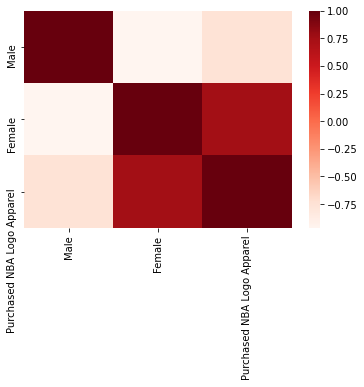

In [65]:
gender = i_basketball_data[[columns[6], columns[7], columns[42]]]
sns.heatmap(gender.corr(), cmap="Reds")

In [66]:
gender.corr()

Male    Female  Purchased NBA Logo Apparel
Male                        1.000000 -0.968037                   -0.748839
Female                     -0.968037  1.000000                    0.756637
Purchased NBA Logo Apparel -0.748839  0.756637                    1.000000

In [67]:
age = i_basketball_data[[columns[8], columns[9], columns[10], columns[11],
                         columns[12], columns[42]]]
age.corr()

13-17     18-24     25-34     35-49       50+  \
13-17                       1.000000 -0.051804 -0.536920  0.494772 -0.047759   
18-24                      -0.051804  1.000000  0.358169  0.241960 -0.955839   
25-34                      -0.536920  0.358169  1.000000 -0.212491 -0.378390   
35-49                       0.494772  0.241960 -0.212491  1.000000 -0.128179   
50+                        -0.047759 -0.955839 -0.378390 -0.128179  1.000000   
Purchased NBA Logo Apparel  0.033705  0.235178  0.695833  0.358441 -0.241418   

                            Purchased NBA Logo Apparel  
13-17                                         0.033705  
18-24                                         0.235178  
25-34                                         0.695833  
35-49                                         0.358441  
50+                                          -0.241418  
Purchased NBA Logo Apparel                    1.000000

In [68]:
region = i_basketball_data[[columns[13], columns[14], columns[15], 
                            columns[16], columns[42]]]
region.corr()

Northeast   Midwest     South      West  \
Northeast                    1.000000 -0.114730 -0.269186 -0.140299   
Midwest                     -0.114730  1.000000 -0.148888 -0.699664   
South                       -0.269186 -0.148888  1.000000 -0.366408   
West                        -0.140299 -0.699664 -0.366408  1.000000   
Purchased NBA Logo Apparel  -0.089320  0.510753 -0.131045 -0.288933   

                            Purchased NBA Logo Apparel  
Northeast                                    -0.089320  
Midwest                                       0.510753  
South                                        -0.131045  
West                                         -0.288933  
Purchased NBA Logo Apparel                    1.000000

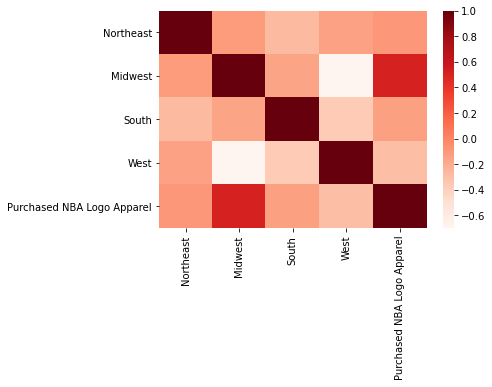

In [69]:
sns.heatmap(region.corr(), cmap="Reds")

In [70]:
income = i_basketball_data[[columns[17], columns[18], columns[19], 
                            columns[20], columns[42]]]
income.corr()

Under $25,000  $25,000-$49,999  $50,000-$99,999  \
Under $25,000                    1.000000         0.164455         0.310717   
$25,000-$49,999                  0.164455         1.000000         0.128276   
$50,000-$99,999                  0.310717         0.128276         1.000000   
$100,000 or more                -0.633117        -0.734229        -0.089799   
Purchased NBA Logo Apparel       0.666782         0.191005         0.222784   

                            $100,000 or more  Purchased NBA Logo Apparel  
Under $25,000                      -0.633117                    0.666782  
$25,000-$49,999                    -0.734229                    0.191005  
$50,000-$99,999                    -0.089799                    0.222784  
$100,000 or more                    1.000000                   -0.243084  
Purchased NBA Logo Apparel         -0.243084                    1.000000

In [71]:
game_attendance = i_basketball_data[[columns[21], columns[22], columns[23], 
                            columns[24], columns[42]]]
game_attendance.corr()

Total attended at least one game/yr.  \
Total attended at least one game/yr.                              1.000000   
Attended 1 game/yr.                                               0.699003   
Attended 2-3 games/yr.                                            0.772433   
Attended 4+ games/yr.                                            -0.028564   
Purchased NBA Logo Apparel                                       -0.153366   

                                      Attended 1 game/yr.  \
Total attended at least one game/yr.             0.699003   
Attended 1 game/yr.                              1.000000   
Attended 2-3 games/yr.                           0.191761   
Attended 4+ games/yr.                            0.494484   
Purchased NBA Logo Apparel                      -0.266719   

                                      Attended 2-3 games/yr.  \
Total attended at least one game/yr.                0.772433   
Attended 1 game/yr.                                 0.191761   
Attended 2-3 games/yr.                              1.000000   
Attended 4+ games/yr.                              -0.636683   
Purchased NBA Logo Apparel                          0.275093   

                                      Attended 4+ games/yr.  \
Total attended at least one game/yr.              -0.028564   
Attended 1 game/yr.                                0.494484   
Attended 2-3 games/yr.                            -0.636683   
Attended 4+ games/yr.                              1.000000   
Purchased NBA Logo Apparel                        -0.636389   

                                      Purchased NBA Logo Apparel  
Total attended at least one game/yr.                   -0.153366  
Attended 1 game/yr.                                    -0.266719  
Attended 2-3 games/yr.                                  0.275093  
Attended 4+ games/yr.                                  -0.636389  
Purchased NBA Logo Apparel                              1.000000

In [72]:
game_viewing = i_basketball_data[[columns[25], columns[26], columns[27], 
                            columns[28], columns[29], columns[30], columns[31],
                                  columns[42]]]
game_viewing.corr()

Total viewed at least 1 game/yr.  \
Total viewed at least 1 game/yr.                            1.000000   
Viewed 1-2 games/yr.                                       -0.658944   
Viewed 3-15 games/yr.                                       0.267191   
Viewed 16+ games/yr.                                        0.679069   
Total viewed at least one game/yr.                         -0.475064   
Viewed 1-2 games/yr..1                                      0.048484   
Viewed 3+ games/yr.                                        -0.879697   
Purchased NBA Logo Apparel                                 -0.348716   

                                    Viewed 1-2 games/yr.  \
Total viewed at least 1 game/yr.               -0.658944   
Viewed 1-2 games/yr.                            1.000000   
Viewed 3-15 games/yr.                          -0.613616   
Viewed 16+ games/yr.                           -0.253878   
Total viewed at least one game/yr.              0.384801   
Viewed 1-2 games/yr..1                          0.154137   
Viewed 3+ games/yr.                             0.402679   
Purchased NBA Logo Apparel                     -0.111972   

                                    Viewed 3-15 games/yr.  \
Total viewed at least 1 game/yr.                 0.267191   
Viewed 1-2 games/yr.                            -0.613616   
Viewed 3-15 games/yr.                            1.000000   
Viewed 16+ games/yr.                            -0.449910   
Total viewed at least one game/yr.              -0.547978   
Viewed 1-2 games/yr..1                          -0.418215   
Viewed 3+ games/yr.                             -0.451794   
Purchased NBA Logo Apparel                      -0.137158   

                                    Viewed 16+ games/yr.  \
Total viewed at least 1 game/yr.                0.679069   
Viewed 1-2 games/yr.                           -0.253878   
Viewed 3-15 games/yr.                          -0.449910   
Viewed 16+ games/yr.                            1.000000   
Total viewed at least one game/yr.             -0.055058   
Viewed 1-2 games/yr..1                          0.275515   
Viewed 3+ games/yr.                            -0.372238   
Purchased NBA Logo Apparel                     -0.131254   

                                    Total viewed at least one game/yr.  \
Total viewed at least 1 game/yr.                             -0.475064   
Viewed 1-2 games/yr.                                          0.384801   
Viewed 3-15 games/yr.                                        -0.547978   
Viewed 16+ games/yr.                                         -0.055058   
Total viewed at least one game/yr.                            1.000000   
Viewed 1-2 games/yr..1                                        0.801894   
Viewed 3+ games/yr.                                           0.756005   
Purchased NBA Logo Apparel                                    0.504431   

                                    Viewed 1-2 games/yr..1  \
Total viewed at least 1 game/yr.                  0.048484   
Viewed 1-2 games/yr.                              0.154137   
Viewed 3-15 games/yr.                            -0.418215   
Viewed 16+ games/yr.                              0.275515   
Total viewed at least one game/yr.                0.801894   
Viewed 1-2 games/yr..1                            1.000000   
Viewed 3+ games/yr.                               0.241605   
Purchased NBA Logo Apparel                        0.248380   

                                    Viewed 3+ games/yr.  \
Total viewed at least 1 game/yr.              -0.879697   
Viewed 1-2 games/yr.                           0.402679   
Viewed 3-15 games/yr.                         -0.451794   
Viewed 16+ games/yr.                          -0.372238   
Total viewed at least one game/yr.             0.756005   
Viewed 1-2 games/yr..1                         0.241605   
Viewed 3+ games/yr.                            1.000000   
Purchased NBA Logo Apparel                     0.674278  

In [73]:
social_media = i_basketball_data[[columns[35], columns[36], columns[37], 
                            columns[38], columns[42]]]
social_media.corr()

Used Facebook to Follow Some Type of NBA Activity  \
Used Facebook to Follow Some Type of NBA Activity                                            1.000000   
Used Facebook Daily to Follow Some Type of NBA ...                                           0.654484   
Used Twitter to Follow Some Type of NBA-related...                                           0.622682   
Used Twitter Daily to Follow Some Type of NBA-r...                                           0.454716   
Purchased NBA Logo Apparel                                                                   0.225453   

                                                    Used Facebook Daily to Follow Some Type of NBA Activity  \
Used Facebook to Follow Some Type of NBA Activity                                            0.654484         
Used Facebook Daily to Follow Some Type of NBA ...                                           1.000000         
Used Twitter to Follow Some Type of NBA-related...                                           0.803745         
Used Twitter Daily to Follow Some Type of NBA-r...                                           0.842140         
Purchased NBA Logo Apparel                                                                   0.535696         

                                                    Used Twitter to Follow Some Type of NBA-related Activity  \
Used Facebook to Follow Some Type of NBA Activity                                            0.622682          
Used Facebook Daily to Follow Some Type of NBA ...                                           0.803745          
Used Twitter to Follow Some Type of NBA-related...                                           1.000000          
Used Twitter Daily to Follow Some Type of NBA-r...                                           0.677746          
Purchased NBA Logo Apparel                                                                   0.351869          

                                                    Used Twitter Daily to Follow Some Type of NBA-related Activity  \
Used Facebook to Follow Some Type of NBA Activity                                            0.454716                
Used Facebook Daily to Follow Some Type of NBA ...                                           0.842140                
Used Twitter to Follow Some Type of NBA-related...                                           0.677746                
Used Twitter Daily to Follow Some Type of NBA-r...                                           1.000000                
Purchased NBA Logo Apparel                                                                   0.409205                

                                                    Purchased NBA Logo Apparel  
Used Facebook to Follow Some Type of NBA Activity                     0.225453  
Used Facebook Daily to Follow Some Type of NBA ...                    0.535696  
Used Twitter to Follow Some Type of NBA-related...                    0.351869  
Used Twitter Daily to Follow Some Type of NBA-r...                    0.409205  
Purchased NBA Logo Apparel                                            1.000000

# Section 2: Jamila EDA
By Jamila Smith-Dell

### Heat Map Generator

In [74]:
def heat_map_generator(df, col_to_index):
    """
    Input: dataframe to be plotted and the column to be set as the index
    Output: heatmap 
    """
    
    df = df.set_index(col_to_index)
    
    #get rid of the last row as not to skew the heatmap
    rows = df.shape[0]-1
    df = df.iloc[0:rows,:]
    
    import seaborn as sns
    plt.figure(figsize=(15,8))
    plot = sns.heatmap(df, cmap='coolwarm')
    
    return plot

In [75]:
#brand_share = pd.read_excel('filename.xlsx')

brand_share = pd.read_csv('data/Brand_Share_of_Market.csv')

In [76]:
brand_share

\
0    Basketball-NBA: Brand Share-of-Market - Automo...     NaN     NaN   
1                                                  NaN     NaN     NaN   
2                                                 Item  2010.0  2011.0   
3                                               Toyota     NaN     NaN   
4                                                Honda     NaN     NaN   
..                                                 ...     ...     ...   
610                                          All Other     NaN     NaN   
611                                              Total     NaN     NaN   
612  Base: Number Having had Energy/Nutrition/Perfo...     NaN     NaN   
613                                        Source: SMA     NaN     NaN   
614                                                NaN     NaN     NaN   

                                                                               \
0       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
1       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
2    2012.0  2013.0  2014.0    2015     2016      2017       2018        2019   
3       NaN     NaN     NaN    14.2     14.3      14.4       14.8        14.5   
4       NaN     NaN     NaN    11.5     13.3      13.9       11.1        12.6   
..      ...     ...     ...     ...      ...       ...        ...         ...   
610     NaN     NaN     NaN     NaN      NaN       NaN        NaN        42.7   
611     NaN     NaN     NaN     NaN      NaN       NaN        NaN       100.0   
612     NaN     NaN     NaN     NaN      NaN       NaN        NaN  22,460,000   
613     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
614     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   

                   Unnamed: 12  
0             NaN          NaN  
1             NaN          NaN  
2          2020.0          NaN  
3             NaN          NaN  
4             NaN          NaN  
..            ...          ...  
610           NaN          NaN  
611           NaN          NaN  
612           NaN          NaN  
613           NaN          NaN  
614           NaN          NaN  

[615 rows x 13 columns]

### Auto/Truck

In [77]:
#select the rows in each table that we're interested in. I'm pulling the Brand Share-of-Market - Automobile/Truck: % of Fans Driving Brand Most Often
 
auto_truck = brand_share.iloc[0:42]
auto_truck.reset_index()
auto_truck.head()

\
0  Basketball-NBA: Brand Share-of-Market - Automo...     NaN     NaN     NaN   
1                                                NaN     NaN     NaN     NaN   
2                                               Item  2010.0  2011.0  2012.0   
3                                             Toyota     NaN     NaN     NaN   
4                                              Honda     NaN     NaN     NaN   

                                                                     \
0     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
1     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
2  2013.0  2014.0    2015     2016      2017       2018        2019   
3     NaN     NaN    14.2     14.3      14.4       14.8        14.5   
4     NaN     NaN    11.5     13.3      13.9       11.1        12.6   

                 Unnamed: 12  
0           NaN          NaN  
1           NaN          NaN  
2        2020.0          NaN  
3           NaN          NaN  
4           NaN          NaN

In [78]:
#add column names
auto_truck.columns = ["Automobile/Truck", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
auto_truck
#there are columns with nothing in them so I'm dropping them
auto_truck = auto_truck.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
auto_truck.head()

Automobile/Truck  2015  2016  2017  2018  \
0  Basketball-NBA: Brand Share-of-Market - Automo...   NaN   NaN   NaN   NaN   
1                                                NaN   NaN   NaN   NaN   NaN   
2                                               Item  2015  2016  2017  2018   
3                                             Toyota  14.2  14.3  14.4  14.8   
4                                              Honda  11.5  13.3  13.9  11.1   

   2019  
0   NaN  
1   NaN  
2  2019  
3  14.5  
4  12.6

In [79]:
auto_truck.head(43)

Automobile/Truck        2015        2016  \
0   Basketball-NBA: Brand Share-of-Market - Automo...         NaN         NaN   
1                                                 NaN         NaN         NaN   
2                                                Item        2015        2016   
3                                              Toyota        14.2        14.3   
4                                               Honda        11.5        13.3   
5                                                Ford        13.4        11.3   
6                                           Chevrolet        10.6        10.1   
7                                              Nissan         5.9         6.4   
8                                             Hyundai         5.3         4.7   
9                                                 BMW         2.1         2.6   
10                                              Lexus         1.9         3.5   
11                                             Subaru         1.7         2.0   
12                                      Mercedes-Benz         1.8         1.4   
13                                               Jeep         2.7         2.9   
14                                                Kia         3.2         1.6   
15                                              Dodge         4.3         3.2   
16                                               Audi         1.1         1.1   
17                                              Acura         1.6         2.3   
18                                           Chrysler         1.9         2.6   
19                                              Buick         2.0         1.6   
20                                           Cadillac         1.1         1.5   
21                                         Volkswagen         1.3         1.3   
22                                                GMC         1.6         2.1   
23                                              Mazda         1.9         2.2   
24                                            Lincoln         0.6         0.7   
25                                         Mitsubishi         0.9         1.2   
26                                           Infiniti         1.1         0.6   
27                                              Volvo         1.2         0.8   
28                                         Land Rover         0.1         0.1   
29                                             Jaguar         0.1         0.3   
30                                               MINI         0.2         0.5   
31                                              Tesla         ---         0.2   
32                                               Fiat         0.1         0.4   
33                                             Suzuki         0.5         0.4   
34                                            Porsche         0.1         0.2   
35                                               Saab         0.2         0.2   
36                                            Peugeot         ---         0.1   
37                                        Lamborghini         ---         ---   
38                                              Other         3.5         2.3   
39            Own but don't drive an automobile/truck         0.3         0.1   
40    Base (No. owning at least one automobile/truck)  70,401,000  70,473,000   
41   Source: SBRnet, Inc., 2021. All Rights Reserved.         NaN         NaN   

          2017        2018        2019  
0          NaN         NaN         NaN  
1          NaN         NaN         NaN  
2         2017        2018        2019  
3         14.4        14.8        14.5  
4         13.9        11.1        12.6  
5         10.1        11.1         9.2  
6         10.0         8.8         9.1  
7          6.3         6.4         7.7  
8          3.0         4.8         4.6  
9          4.0         4.2         3.4  
10         3.8         3.2         3.3  
11         2.5         2.6         2.9  
12         1.9      

In [80]:
data = auto_truck.drop(labels=[0,1,2,41], axis=0)

In [81]:
data

Automobile/Truck        2015        2016  \
3                                            Toyota        14.2        14.3   
4                                             Honda        11.5        13.3   
5                                              Ford        13.4        11.3   
6                                         Chevrolet        10.6        10.1   
7                                            Nissan         5.9         6.4   
8                                           Hyundai         5.3         4.7   
9                                               BMW         2.1         2.6   
10                                            Lexus         1.9         3.5   
11                                           Subaru         1.7         2.0   
12                                    Mercedes-Benz         1.8         1.4   
13                                             Jeep         2.7         2.9   
14                                              Kia         3.2         1.6   
15                                            Dodge         4.3         3.2   
16                                             Audi         1.1         1.1   
17                                            Acura         1.6         2.3   
18                                         Chrysler         1.9         2.6   
19                                            Buick         2.0         1.6   
20                                         Cadillac         1.1         1.5   
21                                       Volkswagen         1.3         1.3   
22                                              GMC         1.6         2.1   
23                                            Mazda         1.9         2.2   
24                                          Lincoln         0.6         0.7   
25                                       Mitsubishi         0.9         1.2   
26                                         Infiniti         1.1         0.6   
27                                            Volvo         1.2         0.8   
28                                       Land Rover         0.1         0.1   
29                                           Jaguar         0.1         0.3   
30                                             MINI         0.2         0.5   
31                                            Tesla         ---         0.2   
32                                             Fiat         0.1         0.4   
33                                           Suzuki         0.5         0.4   
34                                          Porsche         0.1         0.2   
35                                             Saab         0.2         0.2   
36                                          Peugeot         ---         0.1   
37                                      Lamborghini         ---         ---   
38                                            Other         3.5         2.3   
39          Own but don't drive an automobile/truck         0.3         0.1   
40  Base (No. owning at least one automobile/truck)  70,401,000  70,473,000   

          2017        2018        2019  
3         14.4        14.8        14.5  
4         13.9        11.1        12.6  
5         10.1        11.1         9.2  
6         10.0         8.8         9.1  
7          6.3         6.4         7.7  
8          3.0         4.8         4.6  
9          4.0         4.2         3.4  
10         3.8         3.2         3.3  
11         2.5         2.6         2.9  
12         1.9         2.0         2.9  
13         3.2         3.7         2.7  
14         2.1         3.3         2.6  
15         2.9         2.9         2.6  
16         1.7         1.4         2.6  
17         1.6         2.7         2.0  
18         2.2         2.3         2.0  
19         2.2         2.1         2.0  
20         1.1         1.6         2.0  
21         1.8         1.8         1.9  
22         2.2         1.4         1.6  
23         2.3         1.4         1.4  
24         0.7         0.9         ---  
25        

In [82]:
#turning --- into NaN. Not sure why this wasnt coded as null...
import numpy as np
data_f = data.copy()
data_f["2015"] = data_f["2015"].str.replace('---', '').replace('',np.NaN)
data_f["2016"] = data_f["2016"].str.replace('---', '').replace('',np.NaN)
data_f["2017"] = data_f["2017"].str.replace('---', '').replace('',np.NaN)
data_f["2018"] = data_f["2018"].str.replace('---', '').replace('',np.NaN)
data_f["2019"] = data_f["2019"].str.replace('---', '').replace('',np.NaN)
data_f

Automobile/Truck        2015        2016  \
3                                            Toyota        14.2        14.3   
4                                             Honda        11.5        13.3   
5                                              Ford        13.4        11.3   
6                                         Chevrolet        10.6        10.1   
7                                            Nissan         5.9         6.4   
8                                           Hyundai         5.3         4.7   
9                                               BMW         2.1         2.6   
10                                            Lexus         1.9         3.5   
11                                           Subaru         1.7         2.0   
12                                    Mercedes-Benz         1.8         1.4   
13                                             Jeep         2.7         2.9   
14                                              Kia         3.2         1.6   
15                                            Dodge         4.3         3.2   
16                                             Audi         1.1         1.1   
17                                            Acura         1.6         2.3   
18                                         Chrysler         1.9         2.6   
19                                            Buick         2.0         1.6   
20                                         Cadillac         1.1         1.5   
21                                       Volkswagen         1.3         1.3   
22                                              GMC         1.6         2.1   
23                                            Mazda         1.9         2.2   
24                                          Lincoln         0.6         0.7   
25                                       Mitsubishi         0.9         1.2   
26                                         Infiniti         1.1         0.6   
27                                            Volvo         1.2         0.8   
28                                       Land Rover         0.1         0.1   
29                                           Jaguar         0.1         0.3   
30                                             MINI         0.2         0.5   
31                                            Tesla         NaN         0.2   
32                                             Fiat         0.1         0.4   
33                                           Suzuki         0.5         0.4   
34                                          Porsche         0.1         0.2   
35                                             Saab         0.2         0.2   
36                                          Peugeot         NaN         0.1   
37                                      Lamborghini         NaN         NaN   
38                                            Other         3.5         2.3   
39          Own but don't drive an automobile/truck         0.3         0.1   
40  Base (No. owning at least one automobile/truck)  70,401,000  70,473,000   

          2017        2018        2019  
3         14.4        14.8        14.5  
4         13.9        11.1        12.6  
5         10.1        11.1         9.2  
6         10.0         8.8         9.1  
7          6.3         6.4         7.7  
8          3.0         4.8         4.6  
9          4.0         4.2         3.4  
10         3.8         3.2         3.3  
11         2.5         2.6         2.9  
12         1.9         2.0         2.9  
13         3.2         3.7         2.7  
14         2.1         3.3         2.6  
15         2.9         2.9         2.6  
16         1.7         1.4         2.6  
17         1.6         2.7         2.0  
18         2.2         2.3         2.0  
19         2.2         2.1         2.0  
20         1.1         1.6         2.0  
21         1.8         1.8         1.9  
22         2.2         1.4         1.6  
23         2.3         1.4         1.4  
24         0.7         0.9         NaN  
25        

In [83]:
#confirm that the empty cells actually were converted to NaN
data_f.describe()

Automobile/Truck 2015 2016 2017 2018 2019
count                38   35   37   38   36   23
unique               38   26   29   26   25   17
top                Fiat  0.1  0.1  0.1  0.6  2.0
freq                  1    4    3    7    4    4

In [84]:
data_f = data_f.replace(',','',regex=True)

In [85]:
#checking data types and converting from object to int
#data.dtypes
data_f["2015"] = data_f["2015"].astype(float)
data_f["2016"] = data_f["2016"].astype(float)
data_f["2017"] = data_f["2017"].astype(float)
data_f["2018"] = data_f["2018"].astype(float)
data_f["2019"] = data_f["2019"].astype(float)
data_f.dtypes

Automobile/Truck     object
2015                float64
2016                float64
2017                float64
2018                float64
2019                float64
dtype: object

In [86]:
#confirm that the empty cells actually were converted to floats and look at the summary statistics
data_f.describe()

2015          2016          2017          2018          2019
count  3.500000e+01  3.700000e+01  3.800000e+01  3.600000e+01  2.300000e+01
mean   2.011460e+06  1.904678e+06  1.690029e+06  1.772753e+06  2.696135e+06
std    1.189994e+07  1.158569e+07  1.041802e+07  1.063650e+07  1.293019e+07
min    1.000000e-01  1.000000e-01  1.000000e-01  1.000000e-01  1.400000e+00
25%    7.500000e-01  5.000000e-01  3.250000e-01  6.000000e-01  2.000000e+00
50%    1.700000e+00  1.600000e+00  1.850000e+00  1.700000e+00  2.900000e+00
75%    3.350000e+00  2.900000e+00  2.975000e+00  3.400000e+00  7.050000e+00
max    7.040100e+07  7.047300e+07  6.422100e+07  6.381900e+07  6.201100e+07

In [87]:
#shape(), info(), describe()
print(data_f.shape)
print(data_f.info())
print(data_f.describe(include = object))

(38, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 3 to 40
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Automobile/Truck  38 non-null     object 
 1   2015              35 non-null     float64
 2   2016              37 non-null     float64
 3   2017              38 non-null     float64
 4   2018              36 non-null     float64
 5   2019              23 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.1+ KB
None
       Automobile/Truck
count                38
unique               38
top                Fiat
freq                  1


In [88]:
auto_truck_f = data_f.copy()

In [89]:
auto_truck_f

Automobile/Truck        2015        2016  \
3                                            Toyota        14.2        14.3   
4                                             Honda        11.5        13.3   
5                                              Ford        13.4        11.3   
6                                         Chevrolet        10.6        10.1   
7                                            Nissan         5.9         6.4   
8                                           Hyundai         5.3         4.7   
9                                               BMW         2.1         2.6   
10                                            Lexus         1.9         3.5   
11                                           Subaru         1.7         2.0   
12                                    Mercedes-Benz         1.8         1.4   
13                                             Jeep         2.7         2.9   
14                                              Kia         3.2         1.6   
15                                            Dodge         4.3         3.2   
16                                             Audi         1.1         1.1   
17                                            Acura         1.6         2.3   
18                                         Chrysler         1.9         2.6   
19                                            Buick         2.0         1.6   
20                                         Cadillac         1.1         1.5   
21                                       Volkswagen         1.3         1.3   
22                                              GMC         1.6         2.1   
23                                            Mazda         1.9         2.2   
24                                          Lincoln         0.6         0.7   
25                                       Mitsubishi         0.9         1.2   
26                                         Infiniti         1.1         0.6   
27                                            Volvo         1.2         0.8   
28                                       Land Rover         0.1         0.1   
29                                           Jaguar         0.1         0.3   
30                                             MINI         0.2         0.5   
31                                            Tesla         NaN         0.2   
32                                             Fiat         0.1         0.4   
33                                           Suzuki         0.5         0.4   
34                                          Porsche         0.1         0.2   
35                                             Saab         0.2         0.2   
36                                          Peugeot         NaN         0.1   
37                                      Lamborghini         NaN         NaN   
38                                            Other         3.5         2.3   
39          Own but don't drive an automobile/truck         0.3         0.1   
40  Base (No. owning at least one automobile/truck)  70401000.0  70473000.0   

          2017        2018        2019  
3         14.4        14.8        14.5  
4         13.9        11.1        12.6  
5         10.1        11.1         9.2  
6         10.0         8.8         9.1  
7          6.3         6.4         7.7  
8          3.0         4.8         4.6  
9          4.0         4.2         3.4  
10         3.8         3.2         3.3  
11         2.5         2.6         2.9  
12         1.9         2.0         2.9  
13         3.2         3.7         2.7  
14         2.1         3.3         2.6  
15         2.9         2.9         2.6  
16         1.7         1.4         2.6  
17         1.6         2.7         2.0  
18         2.2         2.3         2.0  
19         2.2         2.1         2.0  
20         1.1         1.6         2.0  
21         1.8         1.8         1.9  
22         2.2         1.4         1.6  
23         2.3         1.4         1.4  
24         0.7         0.9         NaN  
25        

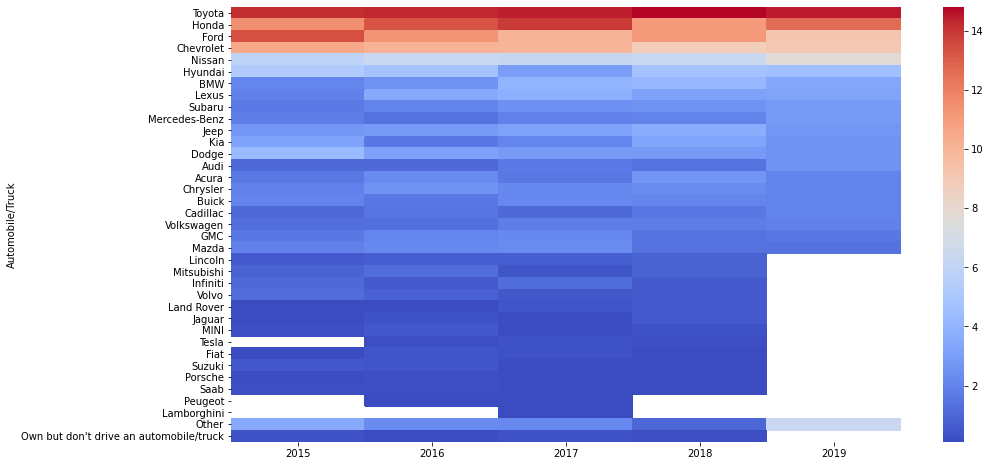

In [90]:
heat_map_generator(auto_truck_f, 'Automobile/Truck')

## Soft Drinks

In [91]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Soft Drinks:% of Fans Drank Most Often in Past 12 Months

soft_drink = brand_share.iloc[43:94]
soft_drink.reset_index()
soft_drink

\
43  Basketball-NBA: Brand Share-of-Market - Soft D...     NaN     NaN     NaN   
44                                                NaN     NaN     NaN     NaN   
45                                               Item  2010.0  2011.0  2012.0   
46                                          Coca-Cola     NaN     NaN     NaN   
47                                          Diet Coke     NaN     NaN     NaN   
48                                             Sprite     NaN     NaN     NaN   
49                                              Pepsi     NaN     NaN     NaN   
50                Coca-Cola Zero/Coca-Cola Zero Sugar     NaN     NaN     NaN   
51                                         Dr. Pepper     NaN     NaN     NaN   
52                                         Diet Pepsi     NaN     NaN     NaN   
53                                       Mountain Dew     NaN     NaN     NaN   
54                                    Diet Dr. Pepper     NaN     NaN     NaN   
55                                      A&W Root Beer     NaN     NaN     NaN   
56                              Canada Dry Ginger Ale     NaN     NaN     NaN   
57                                   Barq's Root Beer     NaN     NaN     NaN   
58                                              Fanta     NaN     NaN     NaN   
59                                  7 Up (Any Flavor)     NaN     NaN     NaN   
60                                  Diet Mountain Dew     NaN     NaN     NaN   
61                                        Cherry Coke     NaN     NaN     NaN   
62                               Sunkist (any flavor)     NaN     NaN     NaN   
63                               Seagram's Ginger Ale     NaN     NaN     NaN   
64             Schweppes Ginger Ale (regular or diet)     NaN     NaN     NaN   
65                           Sierra Mist (any flavor)     NaN     NaN     NaN   
66                                 Diet A&W Root Beer     NaN     NaN     NaN   
67                          Pepsi (all other flavors)     NaN     NaN     NaN   
68                                 Crush (any flavor0     NaN     NaN     NaN   
69                                Squirt (any flavor)     NaN     NaN     NaN   
70                           Coke (all other flavors)     NaN     NaN     NaN   
71                               RC Cola (Any Flavor)     NaN     NaN     NaN   
72                                      IBC Root Beer     NaN     NaN     NaN   
73                         Sprite (all other flavors)     NaN     NaN     NaN   
74                  Dad's Root Beer (regular or diet)     NaN     NaN     NaN   
75                           Mello Yello (any flavor)     NaN     NaN     NaN   
76                     Dr. Pepper (all other flavors)     NaN     NaN     NaN   
77                                Fresca (any flavor)     NaN     NaN     NaN   
78                                    Hires Root Beer     NaN     NaN     NaN   
79                           Dr. Brown's (any flavor)     NaN     NaN     NaN   
80                        Diet Rite Cola (any flavor)     NaN     NaN     NaN   
81                       Coca-Cola Zero Caffeine-Free     NaN     NaN     NaN   
82                            Caffeine-Free Diet Coke     NaN     NaN     NaN   
83                                Diet Sunkist Orange     NaN     NaN     NaN   
84                                        Cherry 7 Up     NaN     NaN     NaN   
85                                   Diet Sierra Mist     NaN     NaN     NaN   
86                            Caffeine-Free Coca-Cola     NaN     NaN     NaN   
87                                          Diet 7 Up     NaN     NaN     NaN   
88                     Coca-Cola Black Cherry Vanilla     NaN     NaN     NaN   
89                              Coca-Cola Cherry Zero     NaN     NaN     NaN   
90                                   Diet Cherry Coke     NaN     NaN     NaN   
91                                Diet Coke with Lime     NaN     NaN     NaN   
92                           

In [92]:
#add column names
soft_drink.columns = ["Soft Drink", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
soft_drink
#there are columns with nothing in them so I'm dropping them
soft_drink = soft_drink.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
soft_drink

Soft Drink        2015        2016  \
43  Basketball-NBA: Brand Share-of-Market - Soft D...         NaN         NaN   
44                                                NaN         NaN         NaN   
45                                               Item        2015        2016   
46                                          Coca-Cola        19.9        19.9   
47                                          Diet Coke        11.5        13.1   
48                                             Sprite         6.5         7.4   
49                                              Pepsi         9.3         7.8   
50                Coca-Cola Zero/Coca-Cola Zero Sugar         5.6         5.5   
51                                         Dr. Pepper         9.7        10.2   
52                                         Diet Pepsi         4.3         4.3   
53                                       Mountain Dew         7.1         5.2   
54                                    Diet Dr. Pepper         3.0         3.2   
55                                      A&W Root Beer         1.9         2.5   
56                              Canada Dry Ginger Ale         1.5         2.5   
57                                   Barq's Root Beer         1.3         1.6   
58                                              Fanta         0.7         1.1   
59                                  7 Up (Any Flavor)         1.4         2.5   
60                                  Diet Mountain Dew         1.7         0.8   
61                                        Cherry Coke         2.4         2.5   
62                               Sunkist (any flavor)         0.8         0.8   
63                               Seagram's Ginger Ale         0.4         0.8   
64             Schweppes Ginger Ale (regular or diet)         0.9         1.5   
65                           Sierra Mist (any flavor)         0.9         1.4   
66                                 Diet A&W Root Beer         0.6         0.7   
67                          Pepsi (all other flavors)         ---         0.2   
68                                 Crush (any flavor0         0.3         0.3   
69                                Squirt (any flavor)         0.5         0.3   
70                           Coke (all other flavors)         ---         0.3   
71                               RC Cola (Any Flavor)         0.1         ---   
72                                      IBC Root Beer         0.1         0.2   
73                         Sprite (all other flavors)         0.5         0.2   
74                  Dad's Root Beer (regular or diet)         0.4         0.2   
75                           Mello Yello (any flavor)         0.3         0.2   
76                     Dr. Pepper (all other flavors)         ---         0.3   
77                                Fresca (any flavor)         ---         0.5   
78                                    Hires Root Beer         0.1         ---   
79                           Dr. Brown's (any flavor)         ---         ---   
80                        Diet Rite Cola (any flavor)         0.1         0.2   
81                       Coca-Cola Zero Caffeine-Free         0.3         ---   
82                            Caffeine-Free Diet Coke         1.2         ---   
83                                Diet Sunkist Orange         0.4         ---   
84                                        Cherry 7 Up         0.3         ---   
85                                   Diet Sierra Mist         0.3         ---   
86                            Caffeine-Free Coca-Cola         0.3         ---   
87                                          Diet 7 Up         0.3         ---   
88                     Coca-Cola Black Cherry Vanilla         0.3         ---   
89                              Coca-Cola Cherry Zero         0.2         ---   
90                                   Diet Cherry Coke         0.2         ---   
91                                Diet Coke with Lime         0.1         

In [93]:
soft_drink.head(10)

Soft Drink  2015  2016  2017  2018  \
43  Basketball-NBA: Brand Share-of-Market - Soft D...   NaN   NaN   NaN   NaN   
44                                                NaN   NaN   NaN   NaN   NaN   
45                                               Item  2015  2016  2017  2018   
46                                          Coca-Cola  19.9  19.9  20.4  20.6   
47                                          Diet Coke  11.5  13.1  12.5  12.7   
48                                             Sprite   6.5   7.4   8.7   7.6   
49                                              Pepsi   9.3   7.8   8.3   8.2   
50                Coca-Cola Zero/Coca-Cola Zero Sugar   5.6   5.5   7.3   6.5   
51                                         Dr. Pepper   9.7  10.2   9.0   9.1   
52                                         Diet Pepsi   4.3   4.3   4.9   5.2   

    2019  
43   NaN  
44   NaN  
45  2019  
46  20.4  
47  13.0  
48  10.1  
49   8.3  
50   8.0  
51   7.6  
52   4.2

In [94]:
soft_drink_data = soft_drink.drop(labels=[43,44,45], axis=0)

In [95]:
soft_drink_data

Soft Drink        2015        2016  \
46                                      Coca-Cola        19.9        19.9   
47                                      Diet Coke        11.5        13.1   
48                                         Sprite         6.5         7.4   
49                                          Pepsi         9.3         7.8   
50            Coca-Cola Zero/Coca-Cola Zero Sugar         5.6         5.5   
51                                     Dr. Pepper         9.7        10.2   
52                                     Diet Pepsi         4.3         4.3   
53                                   Mountain Dew         7.1         5.2   
54                                Diet Dr. Pepper         3.0         3.2   
55                                  A&W Root Beer         1.9         2.5   
56                          Canada Dry Ginger Ale         1.5         2.5   
57                               Barq's Root Beer         1.3         1.6   
58                                          Fanta         0.7         1.1   
59                              7 Up (Any Flavor)         1.4         2.5   
60                              Diet Mountain Dew         1.7         0.8   
61                                    Cherry Coke         2.4         2.5   
62                           Sunkist (any flavor)         0.8         0.8   
63                           Seagram's Ginger Ale         0.4         0.8   
64         Schweppes Ginger Ale (regular or diet)         0.9         1.5   
65                       Sierra Mist (any flavor)         0.9         1.4   
66                             Diet A&W Root Beer         0.6         0.7   
67                      Pepsi (all other flavors)         ---         0.2   
68                             Crush (any flavor0         0.3         0.3   
69                            Squirt (any flavor)         0.5         0.3   
70                       Coke (all other flavors)         ---         0.3   
71                           RC Cola (Any Flavor)         0.1         ---   
72                                  IBC Root Beer         0.1         0.2   
73                     Sprite (all other flavors)         0.5         0.2   
74              Dad's Root Beer (regular or diet)         0.4         0.2   
75                       Mello Yello (any flavor)         0.3         0.2   
76                 Dr. Pepper (all other flavors)         ---         0.3   
77                            Fresca (any flavor)         ---         0.5   
78                                Hires Root Beer         0.1         ---   
79                       Dr. Brown's (any flavor)         ---         ---   
80                    Diet Rite Cola (any flavor)         0.1         0.2   
81                   Coca-Cola Zero Caffeine-Free         0.3         ---   
82                        Caffeine-Free Diet Coke         1.2         ---   
83                            Diet Sunkist Orange         0.4         ---   
84                                    Cherry 7 Up         0.3         ---   
85                               Diet Sierra Mist         0.3         ---   
86                        Caffeine-Free Coca-Cola         0.3         ---   
87                                      Diet 7 Up         0.3         ---   
88                 Coca-Cola Black Cherry Vanilla         0.3         ---   
89                          Coca-Cola Cherry Zero         0.2         ---   
90                               Diet Cherry Coke         0.2         ---   
91                            Diet Coke with Lime         0.1         ---   
92                                          Other         2.3         1.9   
93  Base (No. drank soft drink in past 12 months)  71,176,000  67,269,000   

          2017        2018        2019  
46        20.4        20.6        20.4  
47        12.5        12.7        13.0  
48         8.7         7.6        10.1  
49         8.3         8.2         8.3  
50         7.3         6.5         8.0  
51         9.0     

In [96]:
#turning --- , ---\t, and ... into np.NaN. Not sure why this wasnt coded as null...
soft_drink_f = soft_drink_data.copy()
soft_drink_f["2015"] = soft_drink_f["2015"].str.replace("---", "").replace('',np.NaN)
soft_drink_f["2016"] = soft_drink_f["2016"].str.replace("---", "").replace('',np.NaN)
soft_drink_f["2017"] = soft_drink_f["2017"].str.replace("---", "").replace('',np.NaN)
soft_drink_f["2018"] = soft_drink_f["2018"].str.replace("---", "").replace('',np.NaN)
soft_drink_f["2019"] = soft_drink_f["2019"].str.replace("---", "").replace('',np.NaN)

soft_drink_f["2015"] = soft_drink_f["2015"].str.replace("\---\t", "").str.replace("\\t","").replace('',np.NaN)
soft_drink_f["2016"] = soft_drink_f["2016"].str.replace("\---\t", "").str.replace("\\t","").replace('',np.NaN)
soft_drink_f["2017"] = soft_drink_f["2017"].str.replace("\---\t", "").str.replace("\\t","").replace('',np.NaN)
soft_drink_f["2018"] = soft_drink_f["2018"].str.replace("\---\t", "").str.replace("\\t","").replace('',np.NaN)
soft_drink_f["2019"] = soft_drink_f["2019"].str.replace("\---\t", "").str.replace("\\t","").replace('',np.NaN)

soft_drink_f["2015"] = soft_drink_f["2015"].str.replace("...", "").replace('',np.NaN)
soft_drink_f["2016"] = soft_drink_f["2016"].str.replace("...", "").replace('',np.NaN)
soft_drink_f["2017"] = soft_drink_f["2017"].str.replace("...", "").replace('',np.NaN)
soft_drink_f["2018"] = soft_drink_f["2018"].str.replace("...", "").replace('',np.NaN)
soft_drink_f["2019"] = soft_drink_f["2019"].str.replace("...", "").replace('',np.NaN)

soft_drink_f

Soft Drink 2015 2016 2017 2018 2019
46                                      Coca-Cola    9    9    4    6    4
47                                      Diet Coke    5    1    5    7    0
48                                         Sprite  NaN  NaN  NaN  NaN    1
49                                          Pepsi  NaN  NaN  NaN  NaN  NaN
50            Coca-Cola Zero/Coca-Cola Zero Sugar  NaN  NaN  NaN  NaN  NaN
51                                     Dr. Pepper  NaN    2  NaN  NaN  NaN
52                                     Diet Pepsi  NaN  NaN  NaN  NaN  NaN
53                                   Mountain Dew  NaN  NaN  NaN  NaN  NaN
54                                Diet Dr. Pepper  NaN  NaN  NaN  NaN  NaN
55                                  A&W Root Beer  NaN  NaN  NaN  NaN  NaN
56                          Canada Dry Ginger Ale  NaN  NaN  NaN  NaN  NaN
57                               Barq's Root Beer  NaN  NaN  NaN  NaN  NaN
58                                          Fanta  NaN  NaN  NaN  NaN  NaN
59                              7 Up (Any Flavor)  NaN  NaN  NaN  NaN  NaN
60                              Diet Mountain Dew  NaN  NaN  NaN  NaN  NaN
61                                    Cherry Coke  NaN  NaN  NaN  NaN  NaN
62                           Sunkist (any flavor)  NaN  NaN  NaN  NaN  NaN
63                           Seagram's Ginger Ale  NaN  NaN  NaN  NaN  NaN
64         Schweppes Ginger Ale (regular or diet)  NaN  NaN  NaN  NaN  NaN
65                       Sierra Mist (any flavor)  NaN  NaN  NaN  NaN  NaN
66                             Diet A&W Root Beer  NaN  NaN  NaN  NaN  NaN
67                      Pepsi (all other flavors)  NaN  NaN  NaN  NaN  NaN
68                             Crush (any flavor0  NaN  NaN  NaN  NaN  NaN
69                            Squirt (any flavor)  NaN  NaN  NaN  NaN  NaN
70                       Coke (all other flavors)  NaN  NaN  NaN  NaN  NaN
71                           RC Cola (Any Flavor)  NaN  NaN  NaN  NaN  NaN
72                                  IBC Root Beer  NaN  NaN  NaN  NaN  NaN
73                     Sprite (all other flavors)  NaN  NaN  NaN  NaN  NaN
74              Dad's Root Beer (regular or diet)  NaN  NaN  NaN  NaN  NaN
75                       Mello Yello (any flavor)  NaN  NaN  NaN  NaN  NaN
76                 Dr. Pepper (all other flavors)  NaN  NaN  NaN  NaN  NaN
77                            Fresca (any flavor)  NaN  NaN  NaN  NaN  NaN
78                                Hires Root Beer  NaN  NaN  NaN  NaN  NaN
79                       Dr. Brown's (any flavor)  NaN  NaN  NaN  NaN  NaN
80                    Diet Rite Cola (any flavor)  NaN  NaN  NaN  NaN  NaN
81                   Coca-Cola Zero Caffeine-Free  NaN  NaN  NaN  NaN  NaN
82                        Caffeine-Free Diet Coke  NaN  NaN  NaN  NaN  NaN
83                            Diet Sunkist Orange  NaN  NaN  NaN  NaN  NaN
84                                    Cherry 7 Up  NaN  NaN  NaN  NaN  NaN
85                               Diet Sierra Mist  NaN  NaN  NaN  NaN  NaN
86                        Caffeine-Free Coca-Cola  NaN  NaN  NaN  NaN  NaN
87                                      Diet 7 Up  NaN  NaN  NaN  NaN  NaN
88                 Coca-Cola Black Cherry Vanilla  NaN  NaN  NaN  NaN  NaN
89                          Coca-Cola Cherry Zero  NaN  NaN  NaN  NaN  NaN
90                               Diet Cherry Coke  NaN  NaN  NaN  NaN  NaN
91                            Diet Coke with Lime  NaN  NaN  NaN  NaN  NaN
92                                          Other  NaN  NaN  NaN  NaN    9
93  Base (No. drank soft drink in past 12 months)    0    0    0    0    0

In [97]:
soft_drink_f = soft_drink_f.replace(',','',regex=True)

In [98]:
#checking data types and converting from object to int
#data.dtypes
soft_drink_f["2015"] = soft_drink_f["2015"].astype(float)
soft_drink_f["2016"] = soft_drink_f["2016"].astype(float)
soft_drink_f["2017"] = soft_drink_f["2017"].astype(float)
soft_drink_f["2018"] = soft_drink_f["2018"].astype(float)
soft_drink_f["2019"] = soft_drink_f["2019"].astype(float)
soft_drink_f.dtypes

Soft Drink     object
2015          float64
2016          float64
2017          float64
2018          float64
2019          float64
dtype: object

In [99]:
#shape(), info(), describe()
print(soft_drink_f.shape)
print(soft_drink_f.info())
print(soft_drink_f.describe(include = object))

(48, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 46 to 93
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Soft Drink  48 non-null     object 
 1   2015        3 non-null      float64
 2   2016        4 non-null      float64
 3   2017        3 non-null      float64
 4   2018        3 non-null      float64
 5   2019        5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB
None
         Soft Drink
count            48
unique           48
top     Cherry 7 Up
freq              1


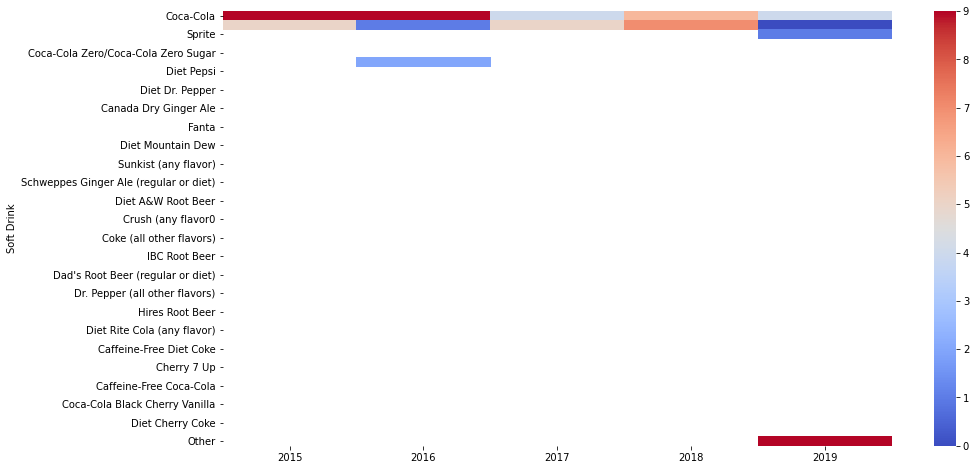

In [100]:
heat_map_generator(soft_drink_f, 'Soft Drink')

**Notes: Coca-Cola dominated the market in 2015 and 2016 but since then Sprite has become more and more popular. It seems as if "Other" is the most popular brand in 2019. I wonder which brands fall under this category?**

## Energy Drinks

In [101]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Soft Drinks:% of Fans Drank Most Often in Past 12 Months

energy_drink = brand_share.iloc[99:114]
energy_drink.reset_index()
energy_drink

\
99                                            Red Bull NaN  NaN   NaN    NaN   
100                                     Monster Energy NaN  NaN   NaN    NaN   
101                                           Rockstar NaN  NaN   NaN    NaN   
102        Starbucks Double Shot, Starbucks Refreshers NaN  NaN   NaN    NaN   
103                                          KickStart NaN  NaN   NaN    NaN   
104                                     Arizona Energy NaN  NaN   NaN    NaN   
105                 Energy shots such as 5-hour Energy NaN  NaN   NaN    NaN   
106                                      Full Throttle NaN  NaN   NaN    NaN   
107                                         NOS Energy NaN  NaN   NaN    NaN   
108                                       Venom Energy NaN  NaN   NaN    NaN   
109                                         AMP Energy NaN  NaN   NaN    NaN   
110                                    Xyience Xenergy NaN  NaN   NaN    NaN   
111                                             Rip It NaN  NaN   NaN    NaN   
112                                              Other NaN  NaN   NaN    NaN   
113  Base (No. drinking energy drink in past 12 mon... NaN  NaN   NaN    NaN   

                                                                         \
99      NaN        31.9        32.3        33.9        46.1         NaN   
100     NaN        29.1        24.8        29.5        23.1         NaN   
101     NaN         7.5        11.5         7.8         9.0         NaN   
102     NaN         7.3         7.2         8.4         5.5         NaN   
103     NaN         5.8         6.1         4.9         3.5         NaN   
104     NaN         1.7         1.3         2.2         2.4         NaN   
105     NaN         5.6         4.8         4.2         1.9         NaN   
106     NaN         0.9         2.1         1.6         1.8         NaN   
107     NaN         2.8         2.1         2.2         1.7         NaN   
108     NaN         0.7         0.8         0.9         1.2         NaN   
109     NaN         2.7         2.1         1.8         0.8         NaN   
110     NaN         1.1         0.3         0.9         ---         NaN   
111     NaN         0.8         1.2         0.5         0.3         NaN   
112     NaN         2.0         3.0         1.4         2.7         NaN   
113     NaN  23,279,000  16,707,000  16,108,000  17,168,000         NaN   

                   Unnamed: 12  
99            NaN          NaN  
100           NaN          NaN  
101           NaN          NaN  
102           NaN          NaN  
103           NaN          NaN  
104           NaN          NaN  
105           NaN          NaN  
106           NaN          NaN  
107           NaN          NaN  
108           NaN          NaN  
109           NaN          NaN  
110           NaN          NaN  
111           NaN          NaN  
112           NaN          NaN  
113           NaN          NaN

In [102]:
#add column names
energy_drink.columns = ["Energy Drink", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
energy_drink
#there are columns with nothing in them so I'm dropping them
energy_drink = energy_drink.drop(["2010", "2011", "2012","2013", "2014", "2019", "2020", "?"], axis =1)
energy_drink

Energy Drink        2015  \
99                                            Red Bull        31.9   
100                                     Monster Energy        29.1   
101                                           Rockstar         7.5   
102        Starbucks Double Shot, Starbucks Refreshers         7.3   
103                                          KickStart         5.8   
104                                     Arizona Energy         1.7   
105                 Energy shots such as 5-hour Energy         5.6   
106                                      Full Throttle         0.9   
107                                         NOS Energy         2.8   
108                                       Venom Energy         0.7   
109                                         AMP Energy         2.7   
110                                    Xyience Xenergy         1.1   
111                                             Rip It         0.8   
112                                              Other         2.0   
113  Base (No. drinking energy drink in past 12 mon...  23,279,000   

           2016        2017        2018  
99         32.3        33.9        46.1  
100        24.8        29.5        23.1  
101        11.5         7.8         9.0  
102         7.2         8.4         5.5  
103         6.1         4.9         3.5  
104         1.3         2.2         2.4  
105         4.8         4.2         1.9  
106         2.1         1.6         1.8  
107         2.1         2.2         1.7  
108         0.8         0.9         1.2  
109         2.1         1.8         0.8  
110         0.3         0.9         ---  
111         1.2         0.5         0.3  
112         3.0         1.4         2.7  
113  16,707,000  16,108,000  17,168,000

In [103]:
#turning --- , ---\t, and ... into NaN. Not sure why this wasnt coded as null...
energy_drink_f = energy_drink.copy()
energy_drink_f["2015"] = energy_drink_f["2015"].replace("---", "").replace('',np.NaN)
energy_drink_f["2016"] = energy_drink_f["2016"].replace("---", "").replace('',np.NaN)
energy_drink_f["2017"] = energy_drink_f["2017"].replace("---", "").replace('',np.NaN)
energy_drink_f["2018"] = energy_drink_f["2018"].replace("---", "").replace('',np.NaN)

energy_drink_f

Energy Drink        2015  \
99                                            Red Bull        31.9   
100                                     Monster Energy        29.1   
101                                           Rockstar         7.5   
102        Starbucks Double Shot, Starbucks Refreshers         7.3   
103                                          KickStart         5.8   
104                                     Arizona Energy         1.7   
105                 Energy shots such as 5-hour Energy         5.6   
106                                      Full Throttle         0.9   
107                                         NOS Energy         2.8   
108                                       Venom Energy         0.7   
109                                         AMP Energy         2.7   
110                                    Xyience Xenergy         1.1   
111                                             Rip It         0.8   
112                                              Other         2.0   
113  Base (No. drinking energy drink in past 12 mon...  23,279,000   

           2016        2017        2018  
99         32.3        33.9        46.1  
100        24.8        29.5        23.1  
101        11.5         7.8         9.0  
102         7.2         8.4         5.5  
103         6.1         4.9         3.5  
104         1.3         2.2         2.4  
105         4.8         4.2         1.9  
106         2.1         1.6         1.8  
107         2.1         2.2         1.7  
108         0.8         0.9         1.2  
109         2.1         1.8         0.8  
110         0.3         0.9         NaN  
111         1.2         0.5         0.3  
112         3.0         1.4         2.7  
113  16,707,000  16,108,000  17,168,000

In [104]:
energy_drink_f = energy_drink_f.replace(',','',regex=True)

In [105]:
#checking data types and converting from object to int
#data.dtypes

energy_drink_f["2015"] = energy_drink_f["2015"].astype(float)
energy_drink_f["2016"] = energy_drink_f["2016"].astype(float)
energy_drink_f["2017"] = energy_drink_f["2017"].astype(float)
energy_drink_f["2018"] = energy_drink_f["2018"].astype(float)
energy_drink_f.dtypes

Energy Drink     object
2015            float64
2016            float64
2017            float64
2018            float64
dtype: object

In [106]:
#shape(), info(), describe()
print(energy_drink_f.shape)
print(energy_drink_f.info())
print(energy_drink_f.describe(include = object))

(15, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 99 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Energy Drink  15 non-null     object 
 1   2015          15 non-null     float64
 2   2016          15 non-null     float64
 3   2017          15 non-null     float64
 4   2018          14 non-null     float64
dtypes: float64(4), object(1)
memory usage: 732.0+ bytes
None
                                      Energy Drink
count                                           15
unique                                          15
top     Starbucks Double Shot Starbucks Refreshers
freq                                             1


In [107]:
energy_drink_f.describe()

2015          2016          2017          2018
count  1.500000e+01  1.500000e+01  1.500000e+01  1.400000e+01
mean   1.551940e+06  1.113807e+06  1.073873e+06  1.226293e+06
std    6.010610e+06  4.313727e+06  4.159066e+06  4.588339e+06
min    7.000000e-01  3.000000e-01  5.000000e-01  3.000000e-01
25%    1.400000e+00  1.700000e+00  1.500000e+00  1.725000e+00
50%    2.800000e+00  3.000000e+00  2.200000e+00  2.550000e+00
75%    7.400000e+00  9.350000e+00  8.100000e+00  8.125000e+00
max    2.327900e+07  1.670700e+07  1.610800e+07  1.716800e+07

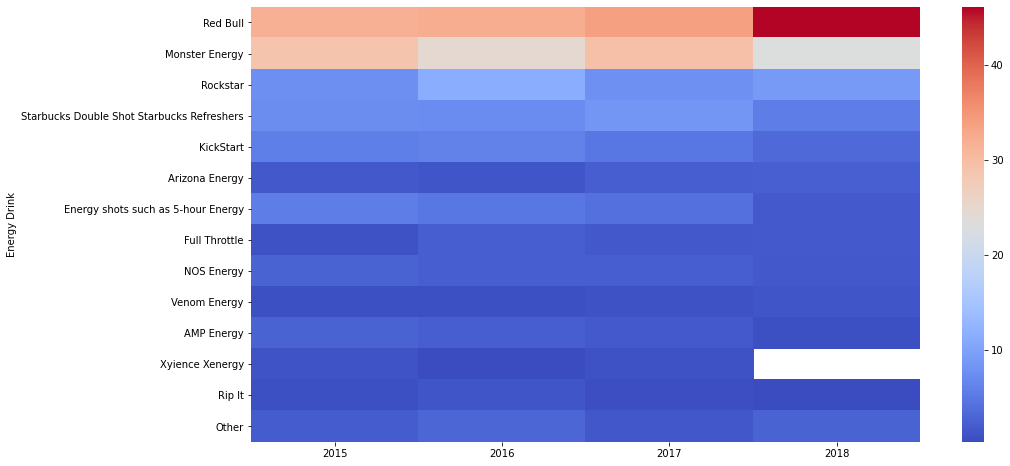

In [108]:
heat_map_generator(energy_drink_f, 'Energy Drink')

## Sports Drinks

In [109]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Soft Drinks:% of Fans Drank Most Often in Past 12 Months

sports_drink = brand_share.iloc[119:130]
sports_drink.reset_index()
sports_drink

\
119                                           Gatorade NaN  NaN   NaN    NaN   
120                            Powerade, Powerade Zero NaN  NaN   NaN    NaN   
121                  Vitamin Water, Vitamin Water Zero NaN  NaN   NaN    NaN   
122                                                 G2 NaN  NaN   NaN    NaN   
123                                             Propel NaN  NaN   NaN    NaN   
124                                        Muscle Milk NaN  NaN   NaN    NaN   
125                                     SoBe Lifewater NaN  NaN   NaN    NaN   
126                             Gatorade Protein Shake NaN  NaN   NaN    NaN   
127                                          All Sport NaN  NaN   NaN    NaN   
128                                              Other NaN  NaN   NaN    NaN   
129  Base (No. drinking sports drink in past 12 mon... NaN  NaN   NaN    NaN   

                                                                         \
119     NaN        58.4        56.0        59.0        63.3        56.5   
120     NaN        16.9        15.6        16.8        15.6        18.2   
121     NaN         9.6        10.0         9.0         6.2         6.6   
122     NaN         6.3         8.9         6.1         6.6         5.8   
123     NaN         3.4         3.1         2.7         2.2         ---   
124     NaN         2.2         1.5         2.3         1.5         ---   
125     NaN         1.8         3.1         1.3         1.5         ---   
126     NaN         0.5         0.3         1.5         1.0         ---   
127     NaN         0.1         0.5         0.7         0.1         ---   
128     NaN         0.8         0.9         0.7         1.0        12.9   
129     NaN  54,316,000  48,412,000  42,161,000  42,114,000  35,667,000   

                   Unnamed: 12  
119           NaN          NaN  
120           NaN          NaN  
121           NaN          NaN  
122           NaN          NaN  
123           NaN          NaN  
124           NaN          NaN  
125           NaN          NaN  
126           NaN          NaN  
127           NaN          NaN  
128           NaN          NaN  
129           NaN          NaN

In [110]:
#add column names
sports_drink.columns = ["Sports Drink", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
sports_drink
#there are columns with nothing in them so I'm dropping them
sports_drink = sports_drink.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
sports_drink

Sports Drink        2015  \
119                                           Gatorade        58.4   
120                            Powerade, Powerade Zero        16.9   
121                  Vitamin Water, Vitamin Water Zero         9.6   
122                                                 G2         6.3   
123                                             Propel         3.4   
124                                        Muscle Milk         2.2   
125                                     SoBe Lifewater         1.8   
126                             Gatorade Protein Shake         0.5   
127                                          All Sport         0.1   
128                                              Other         0.8   
129  Base (No. drinking sports drink in past 12 mon...  54,316,000   

           2016        2017        2018        2019  
119        56.0        59.0        63.3        56.5  
120        15.6        16.8        15.6        18.2  
121        10.0         9.0         6.2         6.6  
122         8.9         6.1         6.6         5.8  
123         3.1         2.7         2.2         ---  
124         1.5         2.3         1.5         ---  
125         3.1         1.3         1.5         ---  
126         0.3         1.5         1.0         ---  
127         0.5         0.7         0.1         ---  
128         0.9         0.7         1.0        12.9  
129  48,412,000  42,161,000  42,114,000  35,667,000

In [111]:
#turning --- into NaN.
sports_drink_f = sports_drink.copy()
sports_drink_f["2019"] = sports_drink_f["2019"].replace("---", "").replace('',np.NaN)
sports_drink_f

Sports Drink        2015  \
119                                           Gatorade        58.4   
120                            Powerade, Powerade Zero        16.9   
121                  Vitamin Water, Vitamin Water Zero         9.6   
122                                                 G2         6.3   
123                                             Propel         3.4   
124                                        Muscle Milk         2.2   
125                                     SoBe Lifewater         1.8   
126                             Gatorade Protein Shake         0.5   
127                                          All Sport         0.1   
128                                              Other         0.8   
129  Base (No. drinking sports drink in past 12 mon...  54,316,000   

           2016        2017        2018        2019  
119        56.0        59.0        63.3        56.5  
120        15.6        16.8        15.6        18.2  
121        10.0         9.0         6.2         6.6  
122         8.9         6.1         6.6         5.8  
123         3.1         2.7         2.2         NaN  
124         1.5         2.3         1.5         NaN  
125         3.1         1.3         1.5         NaN  
126         0.3         1.5         1.0         NaN  
127         0.5         0.7         0.1         NaN  
128         0.9         0.7         1.0        12.9  
129  48,412,000  42,161,000  42,114,000  35,667,000

In [112]:
sports_drink_f = sports_drink.replace(',','',regex=True)

In [113]:
#checking data types and converting from object to int
#data.dtypes

sports_drink_f["2015"] = sports_drink_f["2015"].astype(float)
sports_drink_f["2016"] = sports_drink_f["2016"].astype(float)
sports_drink_f["2017"] = sports_drink_f["2017"].astype(float)
sports_drink_f["2018"] = sports_drink_f["2018"].astype(float)
sports_drink_f["2019"] = sports_drink_f["2018"].astype(float)
sports_drink_f.dtypes

Sports Drink     object
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
dtype: object

In [114]:
#shape(), info(), describe()
print(sports_drink_f.shape)
print(sports_drink_f.info())
print(sports_drink_f.describe(include = object))

(11, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 119 to 129
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sports Drink  11 non-null     object 
 1   2015          11 non-null     float64
 2   2016          11 non-null     float64
 3   2017          11 non-null     float64
 4   2018          11 non-null     float64
 5   2019          11 non-null     float64
dtypes: float64(5), object(1)
memory usage: 660.0+ bytes
None
       Sports Drink
count            11
unique           11
top       All Sport
freq              1


In [115]:
sports_drink_f.describe()

2015          2016          2017          2018          2019
count  1.100000e+01  1.100000e+01  1.100000e+01  1.100000e+01  1.100000e+01
mean   4.937827e+06  4.401100e+06  3.832827e+06  3.828554e+06  3.828554e+06
std    1.637689e+07  1.459676e+07  1.271202e+07  1.269785e+07  1.269785e+07
min    1.000000e-01  3.000000e-01  7.000000e-01  1.000000e-01  1.000000e-01
25%    1.300000e+00  1.200000e+00  1.400000e+00  1.250000e+00  1.250000e+00
50%    3.400000e+00  3.100000e+00  2.700000e+00  2.200000e+00  2.200000e+00
75%    1.325000e+01  1.280000e+01  1.290000e+01  1.110000e+01  1.110000e+01
max    5.431600e+07  4.841200e+07  4.216100e+07  4.211400e+07  4.211400e+07

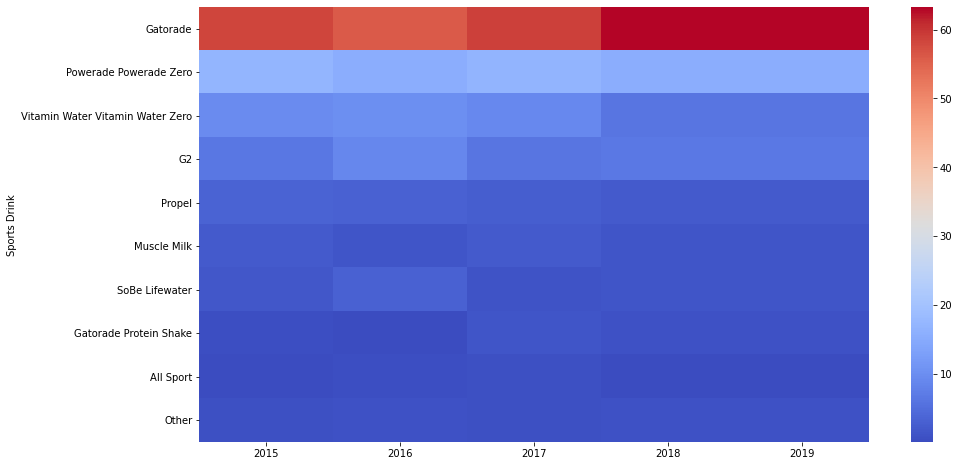

In [116]:
heat_map_generator(sports_drink_f, 'Sports Drink')

## Running/Jogging Shoes

In [117]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Running/Jogging Shoes: % of Fans Wearing Brand Most Often
running_jogging_shoes = brand_share.iloc[135:152]
running_jogging_shoes.reset_index()
running_jogging_shoes

\
135                                              Nike NaN  NaN   NaN    NaN   
136                                       New Balance NaN  NaN   NaN    NaN   
137                                            Adidas NaN  NaN   NaN    NaN   
138                                       Asics/Tiger NaN  NaN   NaN    NaN   
139                                          Skechers NaN  NaN   NaN    NaN   
140                                            Brooks NaN  NaN   NaN    NaN   
141                                      Under Armour NaN  NaN   NaN    NaN   
142                                           Saucony NaN  NaN   NaN    NaN   
143                                            Reebok NaN  NaN   NaN    NaN   
144                                              Puma NaN  NaN   NaN    NaN   
145                                              Fila NaN  NaN   NaN    NaN   
146                                          Champion NaN  NaN   NaN    NaN   
147                                              Avia NaN  NaN   NaN    NaN   
148                                            Mizuno NaN  NaN   NaN    NaN   
149                                             Other NaN  NaN   NaN    NaN   
150                                        Don't know NaN  NaN   NaN    NaN   
151  Base (No. of fans wearing running/jogging shoes) NaN  NaN   NaN    NaN   

                                                                         \
135     NaN        41.1        43.3        41.1        42.8        39.8   
136     NaN        13.7        12.6        12.7        12.8        13.1   
137     NaN        10.5         8.6         9.4        11.8        11.6   
138     NaN         8.1         8.6         8.7         6.7         7.7   
139     NaN         5.4         5.0         4.4         6.2         4.5   
140     NaN         2.1         3.5         3.9         3.0         4.3   
141     NaN         1.3         1.4         2.3         1.8         3.1   
142     NaN         1.8         3.3         2.9         2.0         3.0   
143     NaN         5.4         4.3         4.5         3.6         2.8   
144     NaN         2.2         1.5         2.0         1.3         2.6   
145     NaN         1.7         1.1         0.6         2.2         1.7   
146     NaN         1.2         1.5         1.0         1.2         ---   
147     NaN         1.0         2.0         1.1         0.9         ---   
148     NaN         0.6         1.3         0.7         0.4         ---   
149     NaN         2.8         1.9         2.4         1.4        19.0   
150     NaN         1.1         0.8         2.2         1.6         ---   
151     NaN  53,385,000  47,967,000  44,666,000  44,886,000  43,729,000   

                   Unnamed: 12  
135           NaN          NaN  
136           NaN          NaN  
137           NaN          NaN  
138           NaN          NaN  
139           NaN          NaN  
140           NaN          NaN  
141           NaN          NaN  
142           NaN          NaN  
143           NaN          NaN  
144           NaN          NaN  
145           NaN          NaN  
146           NaN          NaN  
147           NaN          NaN  
148           NaN          NaN  
149           NaN          NaN  
150           NaN          NaN  
151           NaN          NaN

In [118]:
running_jogging_shoes.columns = ["Running/Jogging Shoes", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
running_jogging_shoes
#there are columns with nothing in them so I'm dropping them
running_jogging_shoes = running_jogging_shoes.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
running_jogging_shoes

Running/Jogging Shoes        2015        2016  \
135                                              Nike        41.1        43.3   
136                                       New Balance        13.7        12.6   
137                                            Adidas        10.5         8.6   
138                                       Asics/Tiger         8.1         8.6   
139                                          Skechers         5.4         5.0   
140                                            Brooks         2.1         3.5   
141                                      Under Armour         1.3         1.4   
142                                           Saucony         1.8         3.3   
143                                            Reebok         5.4         4.3   
144                                              Puma         2.2         1.5   
145                                              Fila         1.7         1.1   
146                                          Champion         1.2         1.5   
147                                              Avia         1.0         2.0   
148                                            Mizuno         0.6         1.3   
149                                             Other         2.8         1.9   
150                                        Don't know         1.1         0.8   
151  Base (No. of fans wearing running/jogging shoes)  53,385,000  47,967,000   

           2017        2018        2019  
135        41.1        42.8        39.8  
136        12.7        12.8        13.1  
137         9.4        11.8        11.6  
138         8.7         6.7         7.7  
139         4.4         6.2         4.5  
140         3.9         3.0         4.3  
141         2.3         1.8         3.1  
142         2.9         2.0         3.0  
143         4.5         3.6         2.8  
144         2.0         1.3         2.6  
145         0.6         2.2         1.7  
146         1.0         1.2         ---  
147         1.1         0.9         ---  
148         0.7         0.4         ---  
149         2.4         1.4        19.0  
150         2.2         1.6         ---  
151  44,666,000  44,886,000  43,729,000

In [119]:
#turning --- , ---\t, and ... into NaN. 
running_jogging_shoes_f = running_jogging_shoes.copy()
running_jogging_shoes_f["2015"] = running_jogging_shoes_f["2015"].replace("---", "").replace('',np.NaN)
running_jogging_shoes_f["2016"] = running_jogging_shoes_f["2016"].replace("---", "").replace('',np.NaN)
running_jogging_shoes_f["2017"] = running_jogging_shoes_f["2017"].replace("---", "").replace('',np.NaN)
running_jogging_shoes_f["2018"] = running_jogging_shoes_f["2018"].replace("---", "").replace('',np.NaN)
running_jogging_shoes_f["2019"] = running_jogging_shoes_f["2019"].replace("---", "").replace('',np.NaN)
running_jogging_shoes_f

Running/Jogging Shoes        2015        2016  \
135                                              Nike        41.1        43.3   
136                                       New Balance        13.7        12.6   
137                                            Adidas        10.5         8.6   
138                                       Asics/Tiger         8.1         8.6   
139                                          Skechers         5.4         5.0   
140                                            Brooks         2.1         3.5   
141                                      Under Armour         1.3         1.4   
142                                           Saucony         1.8         3.3   
143                                            Reebok         5.4         4.3   
144                                              Puma         2.2         1.5   
145                                              Fila         1.7         1.1   
146                                          Champion         1.2         1.5   
147                                              Avia         1.0         2.0   
148                                            Mizuno         0.6         1.3   
149                                             Other         2.8         1.9   
150                                        Don't know         1.1         0.8   
151  Base (No. of fans wearing running/jogging shoes)  53,385,000  47,967,000   

           2017        2018        2019  
135        41.1        42.8        39.8  
136        12.7        12.8        13.1  
137         9.4        11.8        11.6  
138         8.7         6.7         7.7  
139         4.4         6.2         4.5  
140         3.9         3.0         4.3  
141         2.3         1.8         3.1  
142         2.9         2.0         3.0  
143         4.5         3.6         2.8  
144         2.0         1.3         2.6  
145         0.6         2.2         1.7  
146         1.0         1.2         NaN  
147         1.1         0.9         NaN  
148         0.7         0.4         NaN  
149         2.4         1.4        19.0  
150         2.2         1.6         NaN  
151  44,666,000  44,886,000  43,729,000

In [120]:
running_jogging_shoes_f = running_jogging_shoes_f.replace(',','',regex=True)

In [121]:
#checking data types and converting from object to int
#data.dtypes
running_jogging_shoes_f["2015"] = running_jogging_shoes_f["2015"].astype(float)
running_jogging_shoes_f["2016"] = running_jogging_shoes_f["2016"].astype(float)
running_jogging_shoes_f["2017"] = running_jogging_shoes_f["2017"].astype(float)
running_jogging_shoes_f["2018"] = running_jogging_shoes_f["2018"].astype(float)
running_jogging_shoes_f["2019"] = running_jogging_shoes_f["2019"].astype(float)
running_jogging_shoes_f.dtypes

Running/Jogging Shoes     object
2015                     float64
2016                     float64
2017                     float64
2018                     float64
2019                     float64
dtype: object

In [122]:
#shape(), info(), describe()
print(running_jogging_shoes_f.shape)
print(running_jogging_shoes_f.info())
print(running_jogging_shoes_f.describe(include = object))

(17, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 135 to 151
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Running/Jogging Shoes  17 non-null     object 
 1   2015                   17 non-null     float64
 2   2016                   17 non-null     float64
 3   2017                   17 non-null     float64
 4   2018                   17 non-null     float64
 5   2019                   13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 948.0+ bytes
None
       Running/Jogging Shoes
count                     17
unique                    17
top                     Fila
freq                       1


In [123]:
running_jogging_shoes_f.describe()

2015          2016          2017          2018          2019
count  1.700000e+01  1.700000e+01  1.700000e+01  1.700000e+01  1.300000e+01
mean   3.140300e+06  2.821594e+06  2.627418e+06  2.640359e+06  3.363778e+06
std    1.294776e+07  1.163370e+07  1.083309e+07  1.088645e+07  1.212824e+07
min    6.000000e-01  8.000000e-01  6.000000e-01  4.000000e-01  1.700000e+00
25%    1.300000e+00  1.500000e+00  2.000000e+00  1.400000e+00  3.000000e+00
50%    2.200000e+00  3.300000e+00  2.900000e+00  2.200000e+00  4.500000e+00
75%    8.100000e+00  8.600000e+00  8.700000e+00  6.700000e+00  1.310000e+01
max    5.338500e+07  4.796700e+07  4.466600e+07  4.488600e+07  4.372900e+07

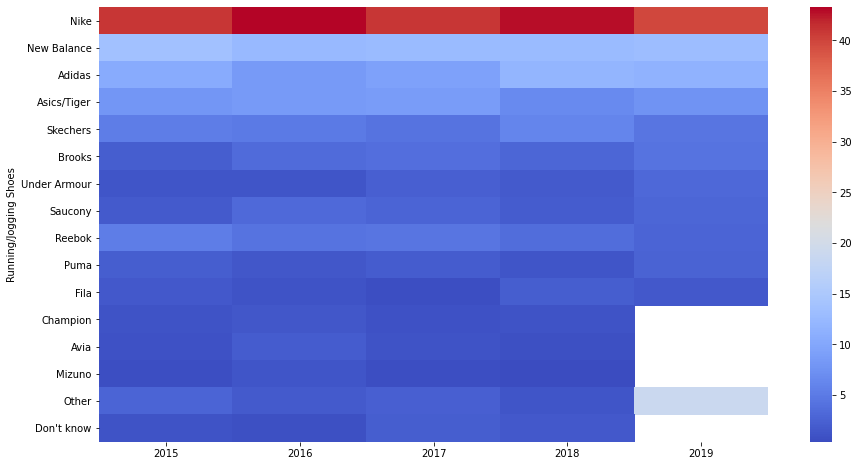

In [124]:
heat_map_generator(running_jogging_shoes_f, 'Running/Jogging Shoes')

## Cross Training/Fitness Shoes

In [125]:
#select the rows in each table that we're interested in. Basketball-NBA: Brand Share-of-Market - Cross Training/Fitness Shoes: % of Fans Wearing Brand Most OftenShare-of-Market - Soft Drinks:% of Fans Drank Most Often in Past 12 Months

cross_train = brand_share.iloc[157:175]
cross_train.reset_index()
cross_train

\
157                                               Nike NaN  NaN   NaN    NaN   
158                                        New Balance NaN  NaN   NaN    NaN   
159                                             Adidas NaN  NaN   NaN    NaN   
160                                           Skechers NaN  NaN   NaN    NaN   
161                                             Reebok NaN  NaN   NaN    NaN   
162                                        Asics/Tiger NaN  NaN   NaN    NaN   
163                                       Under Armour NaN  NaN   NaN    NaN   
164                                            Brooks  NaN  NaN   NaN    NaN   
165                                               Puma NaN  NaN   NaN    NaN   
166                                           Converse NaN  NaN   NaN    NaN   
167                                            Saucony NaN  NaN   NaN    NaN   
168                                               Fila NaN  NaN   NaN    NaN   
169                                               Avia NaN  NaN   NaN    NaN   
170                                           Champion NaN  NaN   NaN    NaN   
171                                               Ryka NaN  NaN   NaN    NaN   
172                                              Other NaN  NaN   NaN    NaN   
173                                         Don't know NaN  NaN   NaN    NaN   
174  Base (No. of fans wearing cross training/fitne... NaN  NaN   NaN    NaN   

                                                                         \
157     NaN        36.4        36.3        39.1        37.4        38.1   
158     NaN        20.1        16.8        14.3        16.8        17.1   
159     NaN         9.0         7.6         9.0        10.4        10.3   
160     NaN         5.9         6.8         4.3         5.6         6.2   
161     NaN         6.8         5.0         6.2         3.7         5.9   
162     NaN         6.7         7.3         7.7         5.1         3.9   
163     NaN         1.9         1.9         2.4         3.2         ---   
164     NaN         1.1         2.2         2.2         3.1         ---   
165     NaN         2.5         2.0         2.5         2.7         ---   
166     NaN         0.8         1.0         0.6         1.5         ---   
167     NaN         1.6         3.0         2.2         1.4         ---   
168     NaN         1.2         1.6         1.5         1.4         ---   
169     NaN         1.4         2.3         0.8         1.0         ---   
170     NaN         0.6         1.2         1.4         0.7         ---   
171     NaN         ---         0.3         0.5         0.3         ---   
172     NaN         2.4         3.3         3.2         3.2        18.5   
173     NaN         1.6         1.4         2.1         2.6         ---   
174     NaN  28,780,000  26,618,000  23,951,000  23,336,000  21,679,000   

                   Unnamed: 12  
157           NaN          NaN  
158           NaN          NaN  
159           NaN          NaN  
160           NaN          NaN  
161           NaN          NaN  
162           NaN          NaN  
163           NaN          NaN  
164           NaN          NaN  
165           NaN          NaN  
166           NaN          NaN  
167           NaN          NaN  
168           NaN          NaN  
169           NaN          NaN  
170           NaN          NaN  
171           NaN          NaN  
172           NaN          NaN  
173           NaN          NaN  
174           NaN          NaN

In [126]:
cross_train.columns = ["Cross Training/Fitness Shoes", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
cross_train
#there are columns with nothing in them so I'm dropping them
cross_train = cross_train.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
cross_train

Cross Training/Fitness Shoes        2015  \
157                                               Nike        36.4   
158                                        New Balance        20.1   
159                                             Adidas         9.0   
160                                           Skechers         5.9   
161                                             Reebok         6.8   
162                                        Asics/Tiger         6.7   
163                                       Under Armour         1.9   
164                                            Brooks          1.1   
165                                               Puma         2.5   
166                                           Converse         0.8   
167                                            Saucony         1.6   
168                                               Fila         1.2   
169                                               Avia         1.4   
170                                           Champion         0.6   
171                                               Ryka         ---   
172                                              Other         2.4   
173                                         Don't know         1.6   
174  Base (No. of fans wearing cross training/fitne...  28,780,000   

           2016        2017        2018        2019  
157        36.3        39.1        37.4        38.1  
158        16.8        14.3        16.8        17.1  
159         7.6         9.0        10.4        10.3  
160         6.8         4.3         5.6         6.2  
161         5.0         6.2         3.7         5.9  
162         7.3         7.7         5.1         3.9  
163         1.9         2.4         3.2         ---  
164         2.2         2.2         3.1         ---  
165         2.0         2.5         2.7         ---  
166         1.0         0.6         1.5         ---  
167         3.0         2.2         1.4         ---  
168         1.6         1.5         1.4         ---  
169         2.3         0.8         1.0         ---  
170         1.2         1.4         0.7         ---  
171         0.3         0.5         0.3         ---  
172         3.3         3.2         3.2        18.5  
173         1.4         2.1         2.6         ---  
174  26,618,000  23,951,000  23,336,000  21,679,000

In [127]:
#turning --- , ---\t, and ... into NaN. 
cross_train_f = cross_train.copy()
cross_train_f["2015"] = cross_train_f["2015"].replace("---", "").replace('', np.NaN)
cross_train_f["2016"] = cross_train_f["2016"].replace("---", "").replace('', np.NaN)
cross_train_f["2017"] = cross_train_f["2017"].replace("---", "").replace('', np.NaN)
cross_train_f["2018"] = cross_train_f["2018"].replace("---", "").replace('', np.NaN)
cross_train_f["2019"] = cross_train_f["2019"].replace("---", "").replace('', np.NaN)
cross_train_f

Cross Training/Fitness Shoes        2015  \
157                                               Nike        36.4   
158                                        New Balance        20.1   
159                                             Adidas         9.0   
160                                           Skechers         5.9   
161                                             Reebok         6.8   
162                                        Asics/Tiger         6.7   
163                                       Under Armour         1.9   
164                                            Brooks          1.1   
165                                               Puma         2.5   
166                                           Converse         0.8   
167                                            Saucony         1.6   
168                                               Fila         1.2   
169                                               Avia         1.4   
170                                           Champion         0.6   
171                                               Ryka         NaN   
172                                              Other         2.4   
173                                         Don't know         1.6   
174  Base (No. of fans wearing cross training/fitne...  28,780,000   

           2016        2017        2018        2019  
157        36.3        39.1        37.4        38.1  
158        16.8        14.3        16.8        17.1  
159         7.6         9.0        10.4        10.3  
160         6.8         4.3         5.6         6.2  
161         5.0         6.2         3.7         5.9  
162         7.3         7.7         5.1         3.9  
163         1.9         2.4         3.2         NaN  
164         2.2         2.2         3.1         NaN  
165         2.0         2.5         2.7         NaN  
166         1.0         0.6         1.5         NaN  
167         3.0         2.2         1.4         NaN  
168         1.6         1.5         1.4         NaN  
169         2.3         0.8         1.0         NaN  
170         1.2         1.4         0.7         NaN  
171         0.3         0.5         0.3         NaN  
172         3.3         3.2         3.2        18.5  
173         1.4         2.1         2.6         NaN  
174  26,618,000  23,951,000  23,336,000  21,679,000

In [128]:
cross_train_f = cross_train_f.replace(',','',regex=True)

In [129]:
#checking data types and converting from object to int
#data.dtypes
cross_train_f["2015"] = cross_train_f["2015"].astype(float)
cross_train_f["2016"] = cross_train_f["2016"].astype(float)
cross_train_f["2017"] = cross_train_f["2017"].astype(float)
cross_train_f["2018"] = cross_train_f["2018"].astype(float)
cross_train_f["2019"] = cross_train_f["2019"].astype(float)
cross_train_f.dtypes

Cross Training/Fitness Shoes     object
2015                            float64
2016                            float64
2017                            float64
2018                            float64
2019                            float64
dtype: object

In [130]:
#shape(), info(), describe()
print(cross_train_f.shape)
print(cross_train_f.info())
print(cross_train_f.describe(include = object))

(18, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 157 to 174
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cross Training/Fitness Shoes  18 non-null     object 
 1   2015                          17 non-null     float64
 2   2016                          18 non-null     float64
 3   2017                          18 non-null     float64
 4   2018                          18 non-null     float64
 5   2019                          8 non-null      float64
dtypes: float64(5), object(1)
memory usage: 996.0+ bytes
None
       Cross Training/Fitness Shoes
count                            18
unique                           18
top                            Fila
freq                              1


In [131]:
cross_train_f.describe()

2015          2016          2017          2018          2019
count  1.700000e+01  1.800000e+01  1.800000e+01  1.800000e+01  8.000000e+00
mean   1.692947e+06  1.478783e+06  1.330617e+06  1.296450e+06  2.709888e+06
std    6.980174e+06  6.273921e+06  5.645303e+06  5.500347e+06  7.664679e+06
min    6.000000e-01  3.000000e-01  5.000000e-01  3.000000e-01  3.900000e+00
25%    1.400000e+00  1.675000e+00  1.650000e+00  1.425000e+00  6.125000e+00
50%    2.400000e+00  2.650000e+00  2.450000e+00  3.150000e+00  1.370000e+01
75%    6.800000e+00  7.175000e+00  7.325000e+00  5.475000e+00  2.340000e+01
max    2.878000e+07  2.661800e+07  2.395100e+07  2.333600e+07  2.167900e+07

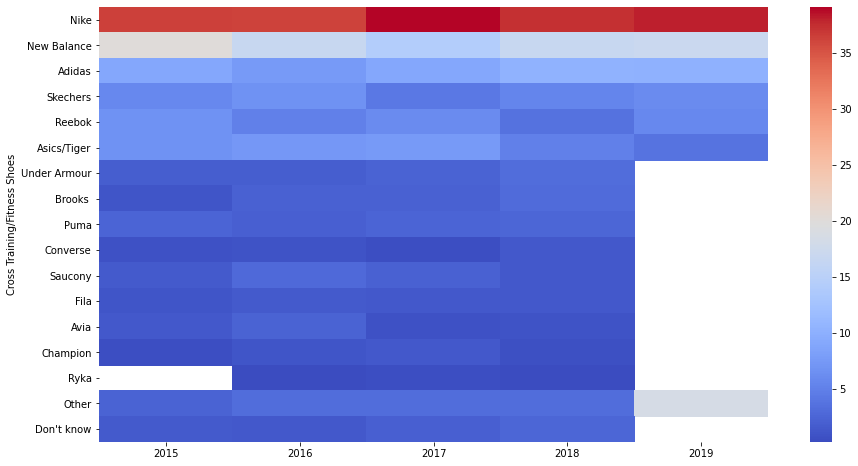

In [132]:
heat_map_generator(cross_train_f, 'Cross Training/Fitness Shoes')

## Basketball Shoes

In [133]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Basketball Shoes % of Fans Wearing Brand Most Often

bball_shoes = brand_share.iloc[180:195]
bball_shoes.reset_index()
bball_shoes

\
180                                         Nike NaN  NaN   NaN    NaN   
181                                       Jordan NaN  NaN   NaN    NaN   
182                                       Adidas NaN  NaN   NaN    NaN   
183                                  New Balance NaN  NaN   NaN    NaN   
184                                     Converse NaN  NaN   NaN    NaN   
185                                 Under Armour NaN  NaN   NaN    NaN   
186                                       Reebok NaN  NaN   NaN    NaN   
187                                         Puma NaN  NaN   NaN    NaN   
188                                         Fila NaN  NaN   NaN    NaN   
189                                     Skechers NaN  NaN   NaN    NaN   
190                               And1 (And One) NaN  NaN   NaN    NaN   
191                                     Champion NaN  NaN   NaN    NaN   
192                                    PF Flyers NaN  NaN   NaN    NaN   
193                                        Other NaN  NaN   NaN    NaN   
194  Base (No. of fans wearing basketball shoes) NaN  NaN   NaN    NaN   

                                                                         \
180     NaN        53.0        46.3        45.2        46.6        53.8   
181     NaN        17.4        20.2        19.6        21.5        15.3   
182     NaN        10.7        10.0        13.2         9.4         8.9   
183     NaN         4.0         6.0         3.1         5.2         4.8   
184     NaN         5.5         2.5         3.6         4.7         3.9   
185     NaN         1.2         3.7         1.7         1.5         3.8   
186     NaN         2.5         3.2         3.4         2.0         2.6   
187     NaN         1.2         0.7         1.0         2.6         1.7   
188     NaN         0.5         1.3         0.9         1.7         1.1   
189     NaN         0.3         0.8         1.9         0.8         1.0   
190     NaN         0.4         1.2         0.9         0.2         0.5   
191     NaN         2.4         2.3         1.8         0.8         ---   
192     NaN         0.2         0.4         ---         ---         ---   
193     NaN         0.6         0.6         0.4         0.8         2.6   
194     NaN  19,453,000  14,915,000  14,837,000  16,618,000  14,231,000   

                   Unnamed: 12  
180           NaN          NaN  
181           NaN          NaN  
182           NaN          NaN  
183           NaN          NaN  
184           NaN          NaN  
185           NaN          NaN  
186           NaN          NaN  
187           NaN          NaN  
188           NaN          NaN  
189           NaN          NaN  
190           NaN          NaN  
191           NaN          NaN  
192           NaN          NaN  
193           NaN          NaN  
194           NaN          NaN

In [134]:
#add column names
bball_shoes.columns = ["Basketball Shoes", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
bball_shoes
#there are columns with nothing in them so I'm dropping them
bball_shoes = bball_shoes.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
bball_shoes

Basketball Shoes        2015        2016  \
180                                         Nike        53.0        46.3   
181                                       Jordan        17.4        20.2   
182                                       Adidas        10.7        10.0   
183                                  New Balance         4.0         6.0   
184                                     Converse         5.5         2.5   
185                                 Under Armour         1.2         3.7   
186                                       Reebok         2.5         3.2   
187                                         Puma         1.2         0.7   
188                                         Fila         0.5         1.3   
189                                     Skechers         0.3         0.8   
190                               And1 (And One)         0.4         1.2   
191                                     Champion         2.4         2.3   
192                                    PF Flyers         0.2         0.4   
193                                        Other         0.6         0.6   
194  Base (No. of fans wearing basketball shoes)  19,453,000  14,915,000   

           2017        2018        2019  
180        45.2        46.6        53.8  
181        19.6        21.5        15.3  
182        13.2         9.4         8.9  
183         3.1         5.2         4.8  
184         3.6         4.7         3.9  
185         1.7         1.5         3.8  
186         3.4         2.0         2.6  
187         1.0         2.6         1.7  
188         0.9         1.7         1.1  
189         1.9         0.8         1.0  
190         0.9         0.2         0.5  
191         1.8         0.8         ---  
192         ---         ---         ---  
193         0.4         0.8         2.6  
194  14,837,000  16,618,000  14,231,000

In [135]:
#turning --- into NaN. 
bball_shoes_f = bball_shoes.copy()
bball_shoes_f["2015"] = bball_shoes_f["2015"].replace("---", "").replace('', np.NaN)
bball_shoes_f["2016"] = bball_shoes_f["2016"].replace("---", "").replace('', np.NaN)
bball_shoes_f["2017"] = bball_shoes_f["2017"].replace("---", "").replace('', np.NaN)
bball_shoes_f["2018"] = bball_shoes_f["2018"].replace("---", "").replace('', np.NaN)
bball_shoes_f["2019"] = bball_shoes_f["2019"].replace("---", "").replace('', np.NaN)
bball_shoes_f

Basketball Shoes        2015        2016  \
180                                         Nike        53.0        46.3   
181                                       Jordan        17.4        20.2   
182                                       Adidas        10.7        10.0   
183                                  New Balance         4.0         6.0   
184                                     Converse         5.5         2.5   
185                                 Under Armour         1.2         3.7   
186                                       Reebok         2.5         3.2   
187                                         Puma         1.2         0.7   
188                                         Fila         0.5         1.3   
189                                     Skechers         0.3         0.8   
190                               And1 (And One)         0.4         1.2   
191                                     Champion         2.4         2.3   
192                                    PF Flyers         0.2         0.4   
193                                        Other         0.6         0.6   
194  Base (No. of fans wearing basketball shoes)  19,453,000  14,915,000   

           2017        2018        2019  
180        45.2        46.6        53.8  
181        19.6        21.5        15.3  
182        13.2         9.4         8.9  
183         3.1         5.2         4.8  
184         3.6         4.7         3.9  
185         1.7         1.5         3.8  
186         3.4         2.0         2.6  
187         1.0         2.6         1.7  
188         0.9         1.7         1.1  
189         1.9         0.8         1.0  
190         0.9         0.2         0.5  
191         1.8         0.8         NaN  
192         NaN         NaN         NaN  
193         0.4         0.8         2.6  
194  14,837,000  16,618,000  14,231,000

In [136]:
bball_shoes_f = bball_shoes_f.replace(',','',regex=True)

In [137]:
#checking data types and converting from object to int
#data.dtypes
bball_shoes_f["2015"] = bball_shoes_f["2015"].astype(float)
bball_shoes_f["2016"] = bball_shoes_f["2016"].astype(float)
bball_shoes_f["2017"] = bball_shoes_f["2017"].astype(float)
bball_shoes_f["2018"] = bball_shoes_f["2018"].astype(float)
bball_shoes_f["2019"] = bball_shoes_f["2019"].astype(float)
bball_shoes_f.dtypes

Basketball Shoes     object
2015                float64
2016                float64
2017                float64
2018                float64
2019                float64
dtype: object

In [138]:
#shape(), info(), describe()
print(bball_shoes_f.shape)
print(bball_shoes_f.info())
print(bball_shoes_f.describe(include = object))
print(bball_shoes_f.describe())

(15, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 180 to 194
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Basketball Shoes  15 non-null     object 
 1   2015              15 non-null     float64
 2   2016              15 non-null     float64
 3   2017              14 non-null     float64
 4   2018              14 non-null     float64
 5   2019              13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 852.0+ bytes
None
       Basketball Shoes
count                15
unique               15
top            Skechers
freq                  1
               2015          2016          2017          2018          2019
count  1.500000e+01  1.500000e+01  1.400000e+01  1.400000e+01  1.300000e+01
mean   1.296873e+06  9.943399e+05  1.059793e+06  1.187007e+06  1.094700e+06
std    5.022741e+06  3.851035e+06  3.965353e+06  4.441345e+06  3.946967e+06
min    2.000000e-01  4.00

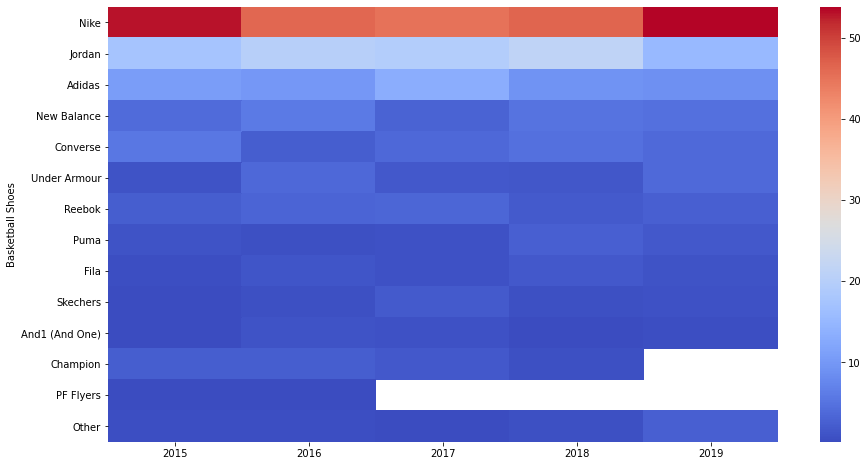

In [139]:
heat_map_generator(bball_shoes_f, 'Basketball Shoes')

## Cell Phone

In [140]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Cell Phone: % of Fans Using Brand Most Often

cell = brand_share.iloc[200:217]
cell.reset_index()
cell

\
200                                 Apple NaN  NaN   NaN    NaN     NaN   
201                               Samsung NaN  NaN   NaN    NaN     NaN   
202                                    LG NaN  NaN   NaN    NaN     NaN   
203                              Motorola NaN  NaN   NaN    NaN     NaN   
204                                Google NaN  NaN   NaN    NaN     NaN   
205                               Alcatel NaN  NaN   NaN    NaN     NaN   
206                                   ZTE NaN  NaN   NaN    NaN     NaN   
207                                   HTC NaN  NaN   NaN    NaN     NaN   
208                                 Nokia NaN  NaN   NaN    NaN     NaN   
209                            Blackberry NaN  NaN   NaN    NaN     NaN   
210                               Kyocera NaN  NaN   NaN    NaN     NaN   
211                         Sony Ericsson NaN  NaN   NaN    NaN     NaN   
212                               Pantech NaN  NaN   NaN    NaN     NaN   
213                                 Nexus NaN  NaN   NaN    NaN     NaN   
214                                 Other NaN  NaN   NaN    NaN     NaN   
215                            Don't know NaN  NaN   NaN    NaN     NaN   
216  Base (No. of fans owning cell phone) NaN  NaN   NaN    NaN     NaN   

                                                                               \
200        37.5        48.4        47.3        50.6        55.0           NaN   
201        30.1        28.0        26.7        26.3        25.4           NaN   
202        13.7         7.9        11.4        10.0         7.1           NaN   
203         5.4         4.2         4.1         3.8         3.5           NaN   
204         ---         ---         0.5         1.2         2.9           NaN   
205         1.3         1.6         1.8         1.5         0.9           NaN   
206         ---         1.6         1.3         1.8         0.6           NaN   
207         2.5         1.3         1.1         0.6         ---           NaN   
208         2.0         1.4         1.2         0.4         ---           NaN   
209         1.2         0.5         0.7         0.3         ---           NaN   
210         0.8         0.6         0.6         0.3         ---           NaN   
211         0.4         0.1         0.1         0.2         ---           NaN   
212         0.4         0.2         0.4         0.1         ---           NaN   
213         0.2         0.3         0.2         ---         ---           NaN   
214         2.7         2.4         1.2         0.9         4.6           NaN   
215         1.9         1.6         1.5         0.8         ---           NaN   
216  82,159,000  79,649,000  74,166,000  73,598,000  68,865,000           NaN   

     Unnamed: 12  
200          NaN  
201          NaN  
202          NaN  
203          NaN  
204          NaN  
205          NaN  
206          NaN  
207          NaN  
208          NaN  
209          NaN  
210          NaN  
211          NaN  
212          NaN  
213          NaN  
214          NaN  
215          NaN  
216          NaN

In [141]:
#add column names
cell.columns = ["Cell Phone", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
cell
#there are columns with nothing in them so I'm dropping them
cell = cell.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
cell

Cell Phone        2015        2016        2017  \
200                                 Apple        37.5        48.4        47.3   
201                               Samsung        30.1        28.0        26.7   
202                                    LG        13.7         7.9        11.4   
203                              Motorola         5.4         4.2         4.1   
204                                Google         ---         ---         0.5   
205                               Alcatel         1.3         1.6         1.8   
206                                   ZTE         ---         1.6         1.3   
207                                   HTC         2.5         1.3         1.1   
208                                 Nokia         2.0         1.4         1.2   
209                            Blackberry         1.2         0.5         0.7   
210                               Kyocera         0.8         0.6         0.6   
211                         Sony Ericsson         0.4         0.1         0.1   
212                               Pantech         0.4         0.2         0.4   
213                                 Nexus         0.2         0.3         0.2   
214                                 Other         2.7         2.4         1.2   
215                            Don't know         1.9         1.6         1.5   
216  Base (No. of fans owning cell phone)  82,159,000  79,649,000  74,166,000   

           2018        2019  
200        50.6        55.0  
201        26.3        25.4  
202        10.0         7.1  
203         3.8         3.5  
204         1.2         2.9  
205         1.5         0.9  
206         1.8         0.6  
207         0.6         ---  
208         0.4         ---  
209         0.3         ---  
210         0.3         ---  
211         0.2         ---  
212         0.1         ---  
213         ---         ---  
214         0.9         4.6  
215         0.8         ---  
216  73,598,000  68,865,000

In [142]:
#turning --- , ---\t, and ... into NaN. 
cell_f = cell.copy()
cell_f["2015"] = cell_f["2015"].replace("---", "").replace('', np.NaN)
cell_f["2016"] = cell_f["2016"].replace("---", "").replace('', np.NaN)
cell_f["2017"] = cell_f["2017"].replace("---", "").replace('', np.NaN)
cell_f["2018"] = cell_f["2018"].replace("---", "").replace('', np.NaN)
cell_f["2019"] = cell_f["2019"].replace("---", "").replace('', np.NaN)
cell_f

Cell Phone        2015        2016        2017  \
200                                 Apple        37.5        48.4        47.3   
201                               Samsung        30.1        28.0        26.7   
202                                    LG        13.7         7.9        11.4   
203                              Motorola         5.4         4.2         4.1   
204                                Google         NaN         NaN         0.5   
205                               Alcatel         1.3         1.6         1.8   
206                                   ZTE         NaN         1.6         1.3   
207                                   HTC         2.5         1.3         1.1   
208                                 Nokia         2.0         1.4         1.2   
209                            Blackberry         1.2         0.5         0.7   
210                               Kyocera         0.8         0.6         0.6   
211                         Sony Ericsson         0.4         0.1         0.1   
212                               Pantech         0.4         0.2         0.4   
213                                 Nexus         0.2         0.3         0.2   
214                                 Other         2.7         2.4         1.2   
215                            Don't know         1.9         1.6         1.5   
216  Base (No. of fans owning cell phone)  82,159,000  79,649,000  74,166,000   

           2018        2019  
200        50.6        55.0  
201        26.3        25.4  
202        10.0         7.1  
203         3.8         3.5  
204         1.2         2.9  
205         1.5         0.9  
206         1.8         0.6  
207         0.6         NaN  
208         0.4         NaN  
209         0.3         NaN  
210         0.3         NaN  
211         0.2         NaN  
212         0.1         NaN  
213         NaN         NaN  
214         0.9         4.6  
215         0.8         NaN  
216  73,598,000  68,865,000

In [143]:
cell_f = cell_f.replace(',','',regex=True)

In [144]:
#checking data types and converting from object to int
#data.dtypes
cell_f["2015"] = cell_f["2015"].astype(float)
cell_f["2016"] = cell_f["2016"].astype(float)
cell_f["2017"] = cell_f["2017"].astype(float)
cell_f["2018"] = cell_f["2018"].astype(float)
cell_f["2019"] = cell_f["2019"].astype(float)
cell_f.dtypes

Cell Phone     object
2015          float64
2016          float64
2017          float64
2018          float64
2019          float64
dtype: object

In [145]:
#shape(), info(), describe()
print(cell_f.shape)
print(cell_f.info())
print(cell_f.describe(include = object))
print(cell_f.describe())

(17, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 200 to 216
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cell Phone  17 non-null     object 
 1   2015        15 non-null     float64
 2   2016        16 non-null     float64
 3   2017        17 non-null     float64
 4   2018        16 non-null     float64
 5   2019        9 non-null      float64
dtypes: float64(5), object(1)
memory usage: 948.0+ bytes
None
       Cell Phone
count          17
unique         17
top       Alcatel
freq            1
               2015          2016          2017          2018          2019
count  1.500000e+01  1.600000e+01  1.700000e+01  1.600000e+01  9.000000e+00
mean   5.477273e+06  4.978069e+06  4.362712e+06  4.599881e+06  7.651678e+06
std    2.121336e+07  1.991225e+07  1.798790e+07  1.839950e+07  2.295500e+07
min    2.000000e-01  1.000000e-01  1.000000e-01  1.000000e-01  6.000000e-01
25%    1.000000e+00  5.7500

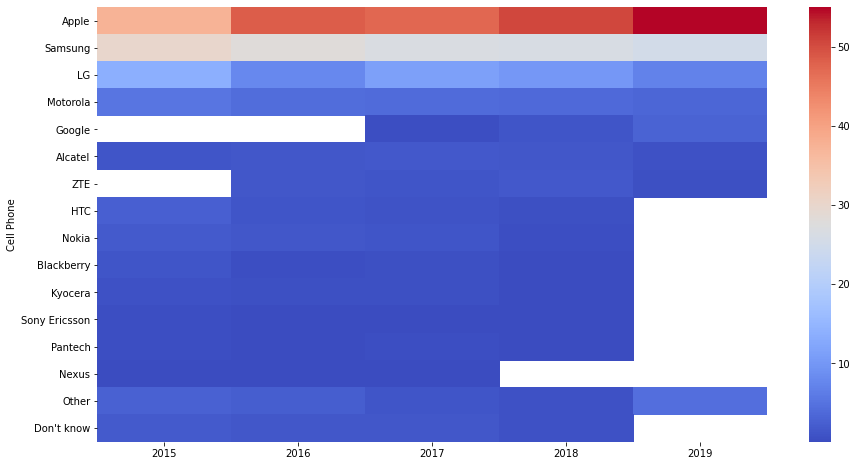

In [146]:
heat_map_generator(cell_f, 'Cell Phone')

## Rental Cars

In [147]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Rental Cars: % of Fans Renting Brand Most Often
rental = brand_share.iloc[222:233]
rental.reset_index()
rental   

\
222                           Enterprise NaN  NaN   NaN    NaN     NaN   
223                                Hertz NaN  NaN   NaN    NaN     NaN   
224                               Budget NaN  NaN   NaN    NaN     NaN   
225                                 Avis NaN  NaN   NaN    NaN     NaN   
226                                Alamo NaN  NaN   NaN    NaN     NaN   
227                               Dollar NaN  NaN   NaN    NaN     NaN   
228                            National  NaN  NaN   NaN    NaN     NaN   
229                              Thrifty NaN  NaN   NaN    NaN     NaN   
230                                Other NaN  NaN   NaN    NaN     NaN   
231                           Don't know NaN  NaN   NaN    NaN     NaN   
232  Base (No. renting car in past year) NaN  NaN   NaN    NaN     NaN   

                                                                               \
222        45.5        34.2        33.5        32.1         NaN           NaN   
223        18.1        21.3        20.2        19.0         NaN           NaN   
224        10.8        10.9        12.9        13.0         NaN           NaN   
225         6.8         8.8         8.8         7.5         NaN           NaN   
226         4.8         6.7         7.0         7.0         NaN           NaN   
227         5.0         6.1         5.0         6.4         NaN           NaN   
228         2.9         4.7         4.7         6.2         NaN           NaN   
229         1.6         2.7         2.2         3.2         NaN           NaN   
230         1.3         2.5         2.5         2.4         NaN           NaN   
231         3.1         2.0         3.0         3.2         NaN           NaN   
232  31,973,000  38,599,000  35,228,000  34,983,000         NaN           NaN   

     Unnamed: 12  
222          NaN  
223          NaN  
224          NaN  
225          NaN  
226          NaN  
227          NaN  
228          NaN  
229          NaN  
230          NaN  
231          NaN  
232          NaN

In [148]:
#add column names
rental.columns = ["Rental Car Company", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
rental
#there are columns with nothing in them so I'm dropping them
rental = rental.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
rental

Rental Car Company        2015        2016        2017  \
222                           Enterprise        45.5        34.2        33.5   
223                                Hertz        18.1        21.3        20.2   
224                               Budget        10.8        10.9        12.9   
225                                 Avis         6.8         8.8         8.8   
226                                Alamo         4.8         6.7         7.0   
227                               Dollar         5.0         6.1         5.0   
228                            National          2.9         4.7         4.7   
229                              Thrifty         1.6         2.7         2.2   
230                                Other         1.3         2.5         2.5   
231                           Don't know         3.1         2.0         3.0   
232  Base (No. renting car in past year)  31,973,000  38,599,000  35,228,000   

           2018 2019  
222        32.1  NaN  
223        19.0  NaN  
224        13.0  NaN  
225         7.5  NaN  
226         7.0  NaN  
227         6.4  NaN  
228         6.2  NaN  
229         3.2  NaN  
230         2.4  NaN  
231         3.2  NaN  
232  34,983,000  NaN

In [149]:
rental_f = rental.replace(',','',regex=True)

In [150]:
#checking data types and converting from object to int
#data.dtypes
rental_f["2015"] = rental_f["2015"].astype(float)
rental_f["2016"] = rental_f["2016"].astype(float)
rental_f["2017"] = rental_f["2017"].astype(float)
rental_f["2018"] = rental_f["2018"].astype(float)
rental_f["2019"] = rental_f["2019"].astype(float)
rental_f.dtypes

Rental Car Company     object
2015                  float64
2016                  float64
2017                  float64
2018                  float64
2019                  float64
dtype: object

In [151]:
#shape(), info(), describe()
print(rental_f.shape)
print(rental_f.info())
print(rental_f.describe(include = object))

(11, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 222 to 232
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rental Car Company  11 non-null     object 
 1   2015                11 non-null     float64
 2   2016                11 non-null     float64
 3   2017                11 non-null     float64
 4   2018                11 non-null     float64
 5   2019                0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 660.0+ bytes
None
       Rental Car Company
count                  11
unique                 11
top                 Other
freq                    1


In [152]:
print(rental_f.describe())

               2015          2016          2017          2018  2019
count  1.100000e+01  1.100000e+01  1.100000e+01  1.100000e+01   0.0
mean   2.906645e+06  3.509009e+06  3.202555e+06  3.180282e+06   NaN
std    9.640219e+06  1.163803e+07  1.062164e+07  1.054777e+07   NaN
min    1.300000e+00  2.000000e+00  2.200000e+00  2.400000e+00   NaN
25%    3.000000e+00  3.700000e+00  3.850000e+00  4.700000e+00   NaN
50%    5.000000e+00  6.700000e+00  7.000000e+00  7.000000e+00   NaN
75%    1.445000e+01  1.610000e+01  1.655000e+01  1.600000e+01   NaN
max    3.197300e+07  3.859900e+07  3.522800e+07  3.498300e+07   NaN


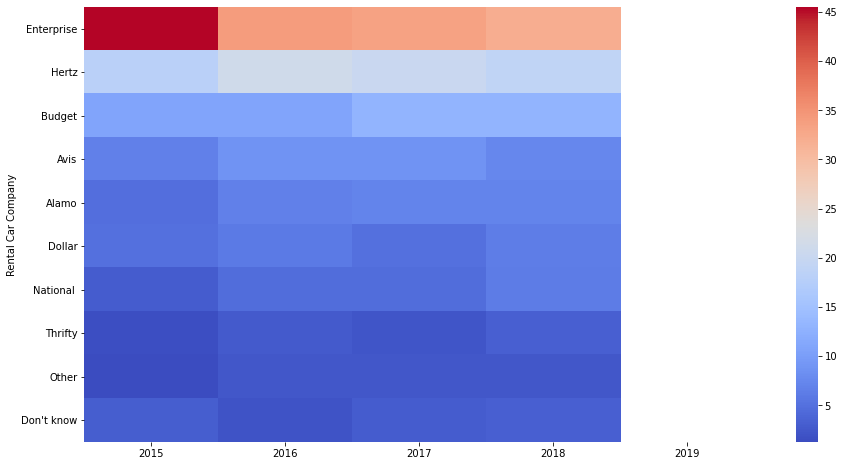

In [153]:
heat_map_generator(rental_f, 'Rental Car Company')

## Phone Service

In [154]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Phone Service for Cell Phone: % of Fans Using Brand Most Often Months

phone_service = brand_share.iloc[238:263]
phone_service.reset_index()
phone_service

\
238                                  AT&T NaN  NaN   NaN    NaN     NaN   
239                      Verizon Wireless NaN  NaN   NaN    NaN     NaN   
240                              T-Mobile NaN  NaN   NaN    NaN     NaN   
241                                Sprint NaN  NaN   NaN    NaN     NaN   
242                              MetroPCS NaN  NaN   NaN    NaN     NaN   
243                              TracFone NaN  NaN   NaN    NaN     NaN   
244                          Boost Mobile NaN  NaN   NaN    NaN     NaN   
245                       Xfinity/Comcast NaN  NaN   NaN    NaN     NaN   
246                               Cricket NaN  NaN   NaN    NaN     NaN   
247                     Consumer Cellular NaN  NaN   NaN    NaN     NaN   
248                         Straight Talk NaN  NaN   NaN    NaN     NaN   
249                         Virgin Mobile NaN  NaN   NaN    NaN     NaN   
250                         U.S. Cellular NaN  NaN   NaN    NaN     NaN   
251                 GreatCall (Jitterbug) NaN  NaN   NaN    NaN     NaN   
252                      Net10 (TracFone) NaN  NaN   NaN    NaN     NaN   
253                     Republic Wireless NaN  NaN   NaN    NaN     NaN   
254                   Project Fi (Google) NaN  NaN   NaN    NaN     NaN   
255                        GoPhone (AT&T) NaN  NaN   NaN    NaN     NaN   
256                          Credo Mobile NaN  NaN   NaN    NaN     NaN   
257                                  Ting NaN  NaN   NaN    NaN     NaN   
258                             Freewheel NaN  NaN   NaN    NaN     NaN   
259                    Page Plus Cellular NaN  NaN   NaN    NaN     NaN   
260                                 Other NaN  NaN   NaN    NaN     NaN   
261                            Don't know NaN  NaN   NaN    NaN     NaN   
262  Base (No. of fans using cell phones) NaN  NaN   NaN    NaN     NaN   

                                                                               \
238        28.7        26.3        29.0        29.0        28.2           NaN   
239        28.1        33.3        28.5        27.6        26.7           NaN   
240        12.7        11.7        14.2        14.5        16.4           NaN   
241         8.9        10.0         8.8         8.7         8.9           NaN   
242         3.4         3.1         3.6         4.0         2.8           NaN   
243         4.4         2.8         2.8         2.7         2.7           NaN   
244         1.4         1.1         1.7         2.7         2.0           NaN   
245         ---         ---         ---         ---         2.0           NaN   
246         2.0         2.0         2.5         2.1         1.7           NaN   
247         1.1         1.5         1.6         1.6         1.4           NaN   
248         2.1         2.1         1.2         1.4         1.3           NaN   
249         2.0         1.8         1.4         1.2         ---           NaN   
250         1.0         1.2         1.2         0.8         ---           NaN   
251         0.4         ---         0.2         0.5         ---           NaN   
252         0.3         0.4         0.1         0.3         ---           NaN   
253         0.1         0.3         0.1         0.2         ---           NaN   
254         0.1         0.1         0.3         0.1         ---           NaN   
255         0.2         0.3         0.2         0.1         ---           NaN   
256         ---         0.2         0.2         ---         ---           NaN   
257         0.1         ---         0.2         ---         ---           NaN   
258         0.1         ---         0.1         ---         ---           NaN   
259         ---         0.1         0.1         ---         ---           NaN   
260         2.1         1.3         1.7         1.8         5.9           NaN   
261         0.7         0.6         0.5         0.7         ---           NaN   
262  82,159,000  79,649,000  74,166,000  73,598,000  68,865,000           NaN   

     Unnamed: 1

In [155]:
#add column names
phone_service.columns = ["Phone Service", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
phone_service
#there are columns with nothing in them so I'm dropping them
phone_service = phone_service.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
phone_service

Phone Service        2015        2016        2017  \
238                                  AT&T        28.7        26.3        29.0   
239                      Verizon Wireless        28.1        33.3        28.5   
240                              T-Mobile        12.7        11.7        14.2   
241                                Sprint         8.9        10.0         8.8   
242                              MetroPCS         3.4         3.1         3.6   
243                              TracFone         4.4         2.8         2.8   
244                          Boost Mobile         1.4         1.1         1.7   
245                       Xfinity/Comcast         ---         ---         ---   
246                               Cricket         2.0         2.0         2.5   
247                     Consumer Cellular         1.1         1.5         1.6   
248                         Straight Talk         2.1         2.1         1.2   
249                         Virgin Mobile         2.0         1.8         1.4   
250                         U.S. Cellular         1.0         1.2         1.2   
251                 GreatCall (Jitterbug)         0.4         ---         0.2   
252                      Net10 (TracFone)         0.3         0.4         0.1   
253                     Republic Wireless         0.1         0.3         0.1   
254                   Project Fi (Google)         0.1         0.1         0.3   
255                        GoPhone (AT&T)         0.2         0.3         0.2   
256                          Credo Mobile         ---         0.2         0.2   
257                                  Ting         0.1         ---         0.2   
258                             Freewheel         0.1         ---         0.1   
259                    Page Plus Cellular         ---         0.1         0.1   
260                                 Other         2.1         1.3         1.7   
261                            Don't know         0.7         0.6         0.5   
262  Base (No. of fans using cell phones)  82,159,000  79,649,000  74,166,000   

           2018        2019  
238        29.0        28.2  
239        27.6        26.7  
240        14.5        16.4  
241         8.7         8.9  
242         4.0         2.8  
243         2.7         2.7  
244         2.7         2.0  
245         ---         2.0  
246         2.1         1.7  
247         1.6         1.4  
248         1.4         1.3  
249         1.2         ---  
250         0.8         ---  
251         0.5         ---  
252         0.3         ---  
253         0.2         ---  
254         0.1         ---  
255         0.1         ---  
256         ---         ---  
257         ---         ---  
258         ---         ---  
259         ---         ---  
260         1.8         5.9  
261         0.7         ---  
262  73,598,000  68,865,000

In [156]:
#turning --- , ---\t, and ... into NaN. 
phone_service_f = phone_service.copy()
phone_service_f["2015"] = phone_service_f["2015"].replace("---", "").replace('', np.NaN)
phone_service_f["2016"] = phone_service_f["2016"].replace("---", "").replace('', np.NaN)
phone_service_f["2017"] = phone_service_f["2017"].replace("---", "").replace('', np.NaN)
phone_service_f["2018"] = phone_service_f["2018"].replace("---", "").replace('', np.NaN)
phone_service_f["2019"] = phone_service_f["2019"].replace("---", "").replace('', np.NaN)
phone_service_f

Phone Service        2015        2016        2017  \
238                                  AT&T        28.7        26.3        29.0   
239                      Verizon Wireless        28.1        33.3        28.5   
240                              T-Mobile        12.7        11.7        14.2   
241                                Sprint         8.9        10.0         8.8   
242                              MetroPCS         3.4         3.1         3.6   
243                              TracFone         4.4         2.8         2.8   
244                          Boost Mobile         1.4         1.1         1.7   
245                       Xfinity/Comcast         NaN         NaN         NaN   
246                               Cricket         2.0         2.0         2.5   
247                     Consumer Cellular         1.1         1.5         1.6   
248                         Straight Talk         2.1         2.1         1.2   
249                         Virgin Mobile         2.0         1.8         1.4   
250                         U.S. Cellular         1.0         1.2         1.2   
251                 GreatCall (Jitterbug)         0.4         NaN         0.2   
252                      Net10 (TracFone)         0.3         0.4         0.1   
253                     Republic Wireless         0.1         0.3         0.1   
254                   Project Fi (Google)         0.1         0.1         0.3   
255                        GoPhone (AT&T)         0.2         0.3         0.2   
256                          Credo Mobile         NaN         0.2         0.2   
257                                  Ting         0.1         NaN         0.2   
258                             Freewheel         0.1         NaN         0.1   
259                    Page Plus Cellular         NaN         0.1         0.1   
260                                 Other         2.1         1.3         1.7   
261                            Don't know         0.7         0.6         0.5   
262  Base (No. of fans using cell phones)  82,159,000  79,649,000  74,166,000   

           2018        2019  
238        29.0        28.2  
239        27.6        26.7  
240        14.5        16.4  
241         8.7         8.9  
242         4.0         2.8  
243         2.7         2.7  
244         2.7         2.0  
245         NaN         2.0  
246         2.1         1.7  
247         1.6         1.4  
248         1.4         1.3  
249         1.2         NaN  
250         0.8         NaN  
251         0.5         NaN  
252         0.3         NaN  
253         0.2         NaN  
254         0.1         NaN  
255         0.1         NaN  
256         NaN         NaN  
257         NaN         NaN  
258         NaN         NaN  
259         NaN         NaN  
260         1.8         5.9  
261         0.7         NaN  
262  73,598,000  68,865,000

In [157]:
phone_service_f = phone_service_f.replace(',','',regex=True)

In [158]:
#checking data types and converting from object to int
#data.dtypes
phone_service_f["2015"] = phone_service_f["2015"].astype(float)
phone_service_f["2016"] = phone_service_f["2016"].astype(float)
phone_service_f["2017"] = phone_service_f["2017"].astype(float)
phone_service_f["2018"] = phone_service_f["2018"].astype(float)
phone_service_f["2019"] = phone_service_f["2019"].astype(float)
phone_service_f

Phone Service        2015        2016        2017  \
238                                  AT&T        28.7        26.3        29.0   
239                      Verizon Wireless        28.1        33.3        28.5   
240                              T-Mobile        12.7        11.7        14.2   
241                                Sprint         8.9        10.0         8.8   
242                              MetroPCS         3.4         3.1         3.6   
243                              TracFone         4.4         2.8         2.8   
244                          Boost Mobile         1.4         1.1         1.7   
245                       Xfinity/Comcast         NaN         NaN         NaN   
246                               Cricket         2.0         2.0         2.5   
247                     Consumer Cellular         1.1         1.5         1.6   
248                         Straight Talk         2.1         2.1         1.2   
249                         Virgin Mobile         2.0         1.8         1.4   
250                         U.S. Cellular         1.0         1.2         1.2   
251                 GreatCall (Jitterbug)         0.4         NaN         0.2   
252                      Net10 (TracFone)         0.3         0.4         0.1   
253                     Republic Wireless         0.1         0.3         0.1   
254                   Project Fi (Google)         0.1         0.1         0.3   
255                        GoPhone (AT&T)         0.2         0.3         0.2   
256                          Credo Mobile         NaN         0.2         0.2   
257                                  Ting         0.1         NaN         0.2   
258                             Freewheel         0.1         NaN         0.1   
259                    Page Plus Cellular         NaN         0.1         0.1   
260                                 Other         2.1         1.3         1.7   
261                            Don't know         0.7         0.6         0.5   
262  Base (No. of fans using cell phones)  82159000.0  79649000.0  74166000.0   

           2018        2019  
238        29.0        28.2  
239        27.6        26.7  
240        14.5        16.4  
241         8.7         8.9  
242         4.0         2.8  
243         2.7         2.7  
244         2.7         2.0  
245         NaN         2.0  
246         2.1         1.7  
247         1.6         1.4  
248         1.4         1.3  
249         1.2         NaN  
250         0.8         NaN  
251         0.5         NaN  
252         0.3         NaN  
253         0.2         NaN  
254         0.1         NaN  
255         0.1         NaN  
256         NaN         NaN  
257         NaN         NaN  
258         NaN         NaN  
259         NaN         NaN  
260         1.8         5.9  
261         0.7         NaN  
262  73598000.0  68865000.0

In [159]:
#shape(), info(), describe()
print(phone_service_f.shape)
print(phone_service_f.info())
print(phone_service_f.describe(include = object))
print(phone_service_f.describe())

(25, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 238 to 262
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone Service  25 non-null     object 
 1   2015           22 non-null     float64
 2   2016           21 non-null     float64
 3   2017           24 non-null     float64
 4   2018           20 non-null     float64
 5   2019           13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.3+ KB
None
            Phone Service
count                  25
unique                 25
top     Republic Wireless
freq                    1
               2015          2016          2017          2018          2019
count  2.200000e+01  2.100000e+01  2.400000e+01  2.000000e+01  1.300000e+01
mean   3.734505e+06  3.792814e+06  3.090254e+06  3.679905e+06  5.297315e+06
std    1.751636e+07  1.738084e+07  1.513907e+07  1.645701e+07  1.909971e+07
min    1.000000e-01  1.000000e-01  1.000000e

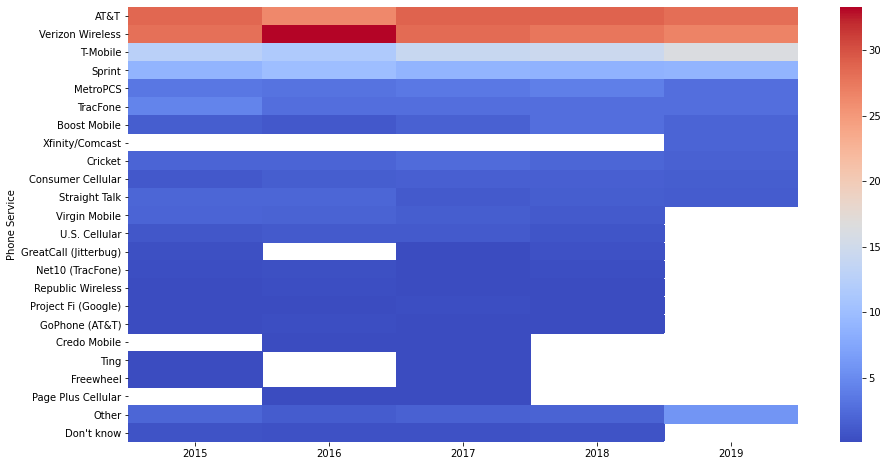

In [160]:
heat_map_generator(phone_service_f, 'Phone Service')

## Automobile/Truck Insurance

In [161]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Automobile/Truck Insurance for Vehicle Used Most Often: % of Fans Using for Automobile/Truck

insurance = brand_share.iloc[268:305]
insurance.reset_index()
insurance

\
268                                       State Farm NaN  NaN   NaN    NaN   
269                                            GEICO NaN  NaN   NaN    NaN   
270                                      Progressive NaN  NaN   NaN    NaN   
271                                         Allstate NaN  NaN   NaN    NaN   
272                                   USAA Insurance NaN  NaN   NaN    NaN   
273                                    AAA Insurance NaN  NaN   NaN    NaN   
274                              Travelers Insurance NaN  NaN   NaN    NaN   
275                                Farmers Insurance NaN  NaN   NaN    NaN   
276                                   Liberty Mutual NaN  NaN   NaN    NaN   
277                                       Nationwide NaN  NaN   NaN    NaN   
278                                           Safeco NaN  NaN   NaN    NaN   
279                               Hartford Insurance NaN  NaN   NaN    NaN   
280                            Farm Bureau Insurance NaN  NaN   NaN    NaN   
281                                   Erie Insurance NaN  NaN   NaN    NaN   
282                                            Amica NaN  NaN   NaN    NaN   
283                       The General Auto Insurance NaN  NaN   NaN    NaN   
284                                          MetLife NaN  NaN   NaN    NaN   
285                                         Mercury  NaN  NaN   NaN    NaN   
286                                         Esurance NaN  NaN   NaN    NaN   
287                            Auto-Owners Insurance NaN  NaN   NaN    NaN   
288       NJM/New Jersey Manufacturers Insurance Co. NaN  NaN   NaN    NaN   
289                                         SafeAuto NaN  NaN   NaN    NaN   
290                                       Ameriprise NaN  NaN   NaN    NaN   
291                                     21st Century NaN  NaN   NaN    NaN   
292                        American Family Insurance NaN  NaN   NaN    NaN   
293                                    AIG Insurance NaN  NaN   NaN    NaN   
294                                Country Financial NaN  NaN   NaN    NaN   
295                                          Hanover NaN  NaN   NaN    NaN   
296                                 Allied Insurance NaN  NaN   NaN    NaN   
297                                            Chubb NaN  NaN   NaN    NaN   
298                           Western Auto Insurance NaN  NaN   NaN    NaN   
299  American National Property And Casualty (ANPAC) NaN  NaN   NaN    NaN   
300                                             GMAC NaN  NaN   NaN    NaN   
301                                        Encompass NaN  NaN   NaN    NaN   
302                                            Other NaN  NaN   NaN    NaN   
303                                       Don't know NaN  NaN   NaN    NaN   
304       Base (No. of fans owning automobile/truck) NaN  NaN   NaN    NaN   

                                                                         \
268     NaN        19.1        19.3        18.7        15.6        19.2   
269     NaN        16.9        14.1        14.7        16.1        17.4   
270     NaN         9.8         7.0         7.1         7.4         9.0   
271     NaN        12.6         8.1         8.8        12.6         8.2   
272     NaN         5.2         6.6         6.9         6.1         6.7   
273     NaN         5.3         6.4         7.3         8.2         5.6   
274     NaN         1.3         1.4         2.2         2.0         2.9   
275     NaN         3.3         3.1         2.8         3.2         2.8   
276     NaN         2.6         3.1         3.3         3.6         2.3   
277     NaN         2.3         2.9         2.8         2.2         2.0   
278     NaN         1.4         2.3         1.6         1.7         1.9   
279     NaN         1.5         3.0          --         1.3         1.6   
280     NaN         ---         1.4         ---         1.4         1.5   
281     NaN         1.4         2.2         1.5         1.4  

In [162]:
#add column names
insurance.columns = ["Automobile/Truck Insurance ", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
insurance
#there are columns with nothing in them so I'm dropping them
insurance = insurance.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
insurance

Automobile/Truck Insurance         2015        2016  \
268                                       State Farm        19.1        19.3   
269                                            GEICO        16.9        14.1   
270                                      Progressive         9.8         7.0   
271                                         Allstate        12.6         8.1   
272                                   USAA Insurance         5.2         6.6   
273                                    AAA Insurance         5.3         6.4   
274                              Travelers Insurance         1.3         1.4   
275                                Farmers Insurance         3.3         3.1   
276                                   Liberty Mutual         2.6         3.1   
277                                       Nationwide         2.3         2.9   
278                                           Safeco         1.4         2.3   
279                               Hartford Insurance         1.5         3.0   
280                            Farm Bureau Insurance         ---         1.4   
281                                   Erie Insurance         1.4         2.2   
282                                            Amica         0.4         1.1   
283                       The General Auto Insurance         0.2         0.3   
284                                          MetLife         1.4         0.8   
285                                         Mercury          0.6         1.0   
286                                         Esurance         0.9         1.0   
287                            Auto-Owners Insurance         0.4         0.3   
288       NJM/New Jersey Manufacturers Insurance Co.         ---         0.8   
289                                         SafeAuto         0.1         ---   
290                                       Ameriprise         0.5         1.2   
291                                     21st Century         1.1         0.6   
292                        American Family Insurance         1.1         1.9   
293                                    AIG Insurance         0.2         0.4   
294                                Country Financial         0.8         0.4   
295                                          Hanover         0.3         0.2   
296                                 Allied Insurance         0.8         0.2   
297                                            Chubb         0.1         0.2   
298                           Western Auto Insurance         0.2         0.1   
299  American National Property And Casualty (ANPAC)         0.1         0.2   
300                                             GMAC         0.3         ---   
301                                        Encompass         0.3         0.2   
302                                            Other         5.8         6.3   
303                                       Don't know         1.5         1.9   
304       Base (No. of fans owning automobile/truck)  70,401,000  70,473,000   

           2017        2018        2019  
268        18.7        15.6        19.2  
269        14.7        16.1        17.4  
270         7.1         7.4         9.0  
271         8.8        12.6         8.2  
272         6.9         6.1         6.7  
273         7.3         8.2         5.6  
274         2.2         2.0         2.9  
275         2.8         3.2         2.8  
276         3.3         3.6         2.3  
277         2.8         2.2         2.0  
278         1.6         1.7         1.9  
279          --         1.3         1.6  
280         ---         1.4         1.5  
281         1.5         1.4         ---  
282         ---         1.4         ---  
283         0.4         0.2         ---  
284         2.0         1.2         ---  
285         0.8         1.0         ---  
286         ---         0.9         ---  
287         ---         0.7         ---  
288         ---         0.7         ---  
289         0.1         0.6         ---  
290         0.8   

In [163]:
#turning --- , ---\t, and ... into NaN. 
insurance_f = insurance.copy()
insurance_f["2015"] = insurance_f["2015"].replace("---", "").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace("---", "").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace("---", "").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace("---", "").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace("---", "").replace('', np.NaN)

insurance_f["2015"] = insurance_f["2015"].replace("--", "").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace("--", "").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace("--", "").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace("--", "").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace("--", "").replace('', np.NaN)

insurance_f["2015"] = insurance_f["2015"].replace(" ---", "").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace(" ---", "").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace(" ---", "").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace(" ---", "").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace(" ---", "").replace('', np.NaN)

insurance_f["2015"] = insurance_f["2015"].replace("--- ", "").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace("--- ", "").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace("--- ", "").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace("--- ", "").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace("--- ", "").replace('', np.NaN)



insurance_f["2015"] = insurance_f["2015"].replace("---\t", "").replace("\\t","").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace("---\t", "").replace("\\t","").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace("---\t", "").replace("\\t","").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace("---\t" "").replace("\\t","").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace("---\t", "").replace("\\t","").replace('', np.NaN)

insurance_f["2015"] = insurance_f["2015"].replace("\t---", "").replace("\\t","").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace("\t---", "").replace("\\t","").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace("\t---", "").replace("\\t","").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace("\t---" "").replace("\\t","").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace("\t---", "").replace("\\t","").replace('', np.NaN)

insurance_f["2015"] = insurance_f["2015"].replace(" \t---", "").replace("\\t","").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace(" \t---", "").replace("\\t","").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace(" \t---", "").replace("\\t","").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace(" \t---" "").replace("\\t","").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace(" \t---", "").replace("\\t","").replace('', np.NaN)

insurance_f["2015"] = insurance_f["2015"].replace("\t--- ", "").replace("\\t","").replace('', np.NaN)
insurance_f["2016"] = insurance_f["2016"].replace("\t--- ", "").replace("\\t","").replace('', np.NaN)
insurance_f["2017"] = insurance_f["2017"].replace("\t--- ", "").replace("\\t","").replace('', np.NaN)
insurance_f["2018"] = insurance_f["2018"].replace("\t--- " "").replace("\\t","").replace('', np.NaN)
insurance_f["2019"] = insurance_f["2019"].replace("\t--- ", "").replace("\\t","").replace('', np.NaN)



insurance_f


Automobile/Truck Insurance         2015        2016  \
268                                       State Farm        19.1        19.3   
269                                            GEICO        16.9        14.1   
270                                      Progressive         9.8         7.0   
271                                         Allstate        12.6         8.1   
272                                   USAA Insurance         5.2         6.6   
273                                    AAA Insurance         5.3         6.4   
274                              Travelers Insurance         1.3         1.4   
275                                Farmers Insurance         3.3         3.1   
276                                   Liberty Mutual         2.6         3.1   
277                                       Nationwide         2.3         2.9   
278                                           Safeco         1.4         2.3   
279                               Hartford Insurance         1.5         3.0   
280                            Farm Bureau Insurance         NaN         1.4   
281                                   Erie Insurance         1.4         2.2   
282                                            Amica         0.4         1.1   
283                       The General Auto Insurance         0.2         0.3   
284                                          MetLife         1.4         0.8   
285                                         Mercury          0.6         1.0   
286                                         Esurance         0.9         1.0   
287                            Auto-Owners Insurance         0.4         0.3   
288       NJM/New Jersey Manufacturers Insurance Co.         NaN         0.8   
289                                         SafeAuto         0.1         NaN   
290                                       Ameriprise         0.5         1.2   
291                                     21st Century         1.1         0.6   
292                        American Family Insurance         1.1         1.9   
293                                    AIG Insurance         0.2         0.4   
294                                Country Financial         0.8         0.4   
295                                          Hanover         0.3         0.2   
296                                 Allied Insurance         0.8         0.2   
297                                            Chubb         0.1         0.2   
298                           Western Auto Insurance         0.2         0.1   
299  American National Property And Casualty (ANPAC)         0.1         0.2   
300                                             GMAC         0.3         NaN   
301                                        Encompass         0.3         0.2   
302                                            Other         5.8         6.3   
303                                       Don't know         1.5         1.9   
304       Base (No. of fans owning automobile/truck)  70,401,000  70,473,000   

           2017        2018        2019  
268        18.7        15.6        19.2  
269        14.7        16.1        17.4  
270         7.1         7.4         9.0  
271         8.8        12.6         8.2  
272         6.9         6.1         6.7  
273         7.3         8.2         5.6  
274         2.2         2.0         2.9  
275         2.8         3.2         2.8  
276         3.3         3.6         2.3  
277         2.8         2.2         2.0  
278         1.6         1.7         1.9  
279         NaN         1.3         1.6  
280         NaN         1.4         1.5  
281         1.5         1.4         NaN  
282         NaN         1.4         NaN  
283         0.4         0.2         NaN  
284         2.0         1.2         NaN  
285         0.8         1.0         NaN  
286         NaN         0.9         NaN  
287         NaN         0.7         NaN  
288         NaN         0.7         NaN  
289         0.1         0.6         NaN  
290         0.8   

In [164]:
insurance_f = insurance_f.replace(',','',regex=True)

In [165]:
#checking data types and converting from object to int
#data.dtypes
insurance_f["2015"] = insurance_f["2015"].astype(float)
insurance_f["2016"] = insurance_f["2016"].astype(float)
insurance_f["2017"] = insurance_f["2017"].astype(float)
insurance_f["2018"] = insurance_f["2018"].astype(float)
insurance_f["2019"] = insurance_f["2019"].astype(float)
insurance_f.dtypes

Automobile/Truck Insurance      object
2015                           float64
2016                           float64
2017                           float64
2018                           float64
2019                           float64
dtype: object

In [166]:
#shape(), info(), describe()
print(insurance_f.shape)
print(insurance_f.info())
print(insurance_f.describe(include = object))
print(insurance_f.describe())

(37, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 268 to 304
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Automobile/Truck Insurance   37 non-null     object 
 1   2015                         35 non-null     float64
 2   2016                         35 non-null     float64
 3   2017                         25 non-null     float64
 4   2018                         35 non-null     float64
 5   2019                         15 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB
None
       Automobile/Truck Insurance 
count                           37
unique                          37
top         Western Auto Insurance
freq                             1
               2015          2016          2017          2018          2019
count  3.500000e+01  3.500000e+01  2.500000e+01  3.500000e+01  1.500000e+01
mean   2.011460e+06  2.013517e+06  2.56

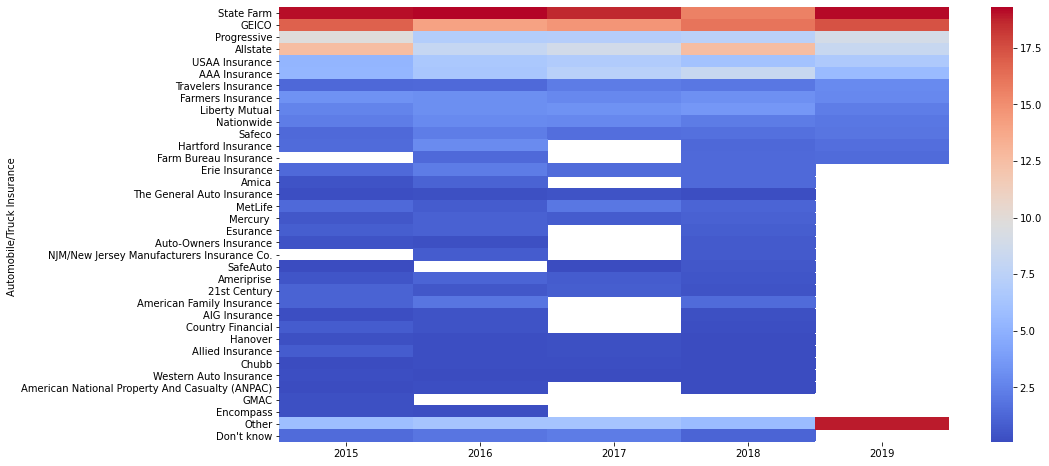

In [167]:
heat_map_generator(insurance_f, 'Automobile/Truck Insurance ')

## Credit Cards

In [168]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Credit Cards: % of Fans Using Brand Most Often
credit_card = brand_share.iloc[310:318]
credit_card.reset_index()
credit_card

\
310                                               Visa NaN  NaN   NaN    NaN   
311                                         MasterCard NaN  NaN   NaN    NaN   
312                                   American Express NaN  NaN   NaN    NaN   
313                                           Discover NaN  NaN   NaN    NaN   
314  Store branded credit card with no network iden... NaN  NaN   NaN    NaN   
315                                              Other NaN  NaN   NaN    NaN   
316                                         Don't know NaN  NaN   NaN    NaN   
317                      Base (No. using credit cards) NaN  NaN   NaN    NaN   

                                                                         \
310     NaN        55.9        58.8        57.1        55.8         NaN   
311     NaN        24.5        22.7        23.0        23.7         NaN   
312     NaN         9.4         9.7        11.8        12.6         NaN   
313     NaN         7.8         6.3         5.6         6.3         NaN   
314     NaN         1.2         0.9         0.9         0.6         NaN   
315     NaN         0.2         0.5         ---         ---         NaN   
316     NaN         0.9         1.0         1.7         1.1         NaN   
317     NaN  62,965,000  65,115,000  61,105,000  60,433,000         NaN   

                   Unnamed: 12  
310           NaN          NaN  
311           NaN          NaN  
312           NaN          NaN  
313           NaN          NaN  
314           NaN          NaN  
315           NaN          NaN  
316           NaN          NaN  
317           NaN          NaN

In [169]:
#add column names
credit_card .columns = ["Credit Card", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
credit_card 
#there are columns with nothing in them so I'm dropping them
credit_card  = credit_card.drop(["2010", "2011", "2012","2013", "2014", "2019","2020", "?"], axis =1)
credit_card 

Credit Card        2015  \
310                                               Visa        55.9   
311                                         MasterCard        24.5   
312                                   American Express         9.4   
313                                           Discover         7.8   
314  Store branded credit card with no network iden...         1.2   
315                                              Other         0.2   
316                                         Don't know         0.9   
317                      Base (No. using credit cards)  62,965,000   

           2016        2017        2018  
310        58.8        57.1        55.8  
311        22.7        23.0        23.7  
312         9.7        11.8        12.6  
313         6.3         5.6         6.3  
314         0.9         0.9         0.6  
315         0.5         ---         ---  
316         1.0         1.7         1.1  
317  65,115,000  61,105,000  60,433,000

In [170]:
#turning --- into NaN. 
credit_card_f = credit_card.copy()



credit_card_f["2015"] = credit_card_f["2015"].replace("--", "").replace('', np.NaN)
credit_card_f["2016"] = credit_card_f["2016"].replace("--", "").replace('', np.NaN)
credit_card_f["2017"] = credit_card_f["2017"].replace("--", "").replace('', np.NaN)
credit_card_f["2018"] = credit_card_f["2018"].replace("--", "").replace('', np.NaN)

credit_card_f["2018"] = credit_card_f["2018"].replace("--", "").replace('', np.NaN)


credit_card_f["2015"] = credit_card_f["2015"].replace(" ---", "").replace('', np.NaN)
credit_card_f["2016"] = credit_card_f["2016"].replace(" ---", "").replace('', np.NaN)
credit_card_f["2017"] = credit_card_f["2017"].replace(" ---", "").replace('', np.NaN)
credit_card_f["2018"] = credit_card_f["2018"].replace(" ---", "").replace('', np.NaN)


credit_card_f["2015"] = credit_card_f["2015"].replace("--- ", "").replace('', np.NaN)
credit_card_f["2016"] = credit_card_f["2016"].replace("--- ", "").replace('', np.NaN)
credit_card_f["2017"] = credit_card_f["2017"].replace("--- ", "").replace('', np.NaN)
credit_card_f["2018"] = credit_card_f["2018"].replace("--- ", "").replace('', np.NaN)

credit_card_f["2017"] = credit_card_f["2017"].replace("--- ", "").replace('', np.NaN)
credit_card_f["2018"] = credit_card_f["2018"].replace("--- ", "").replace('', np.NaN)

credit_card_f["2017"] = credit_card_f["2017"].replace("---", "").replace('', np.NaN)
credit_card_f["2018"] = credit_card_f["2018"].replace("---", "").replace('', np.NaN)

credit_card_f

Credit Card        2015  \
310                                               Visa        55.9   
311                                         MasterCard        24.5   
312                                   American Express         9.4   
313                                           Discover         7.8   
314  Store branded credit card with no network iden...         1.2   
315                                              Other         0.2   
316                                         Don't know         0.9   
317                      Base (No. using credit cards)  62,965,000   

           2016        2017        2018  
310        58.8        57.1        55.8  
311        22.7        23.0        23.7  
312         9.7        11.8        12.6  
313         6.3         5.6         6.3  
314         0.9         0.9         0.6  
315         0.5         NaN         NaN  
316         1.0         1.7         1.1  
317  65,115,000  61,105,000  60,433,000

In [171]:
credit_card_f = credit_card_f.replace(',','',regex=True)

In [172]:
#checking data types and converting from object to int
#data.dtypes

credit_card_f["2015"] = credit_card_f["2015"].astype(float)
credit_card_f["2016"] = credit_card_f["2016"].astype(float)
credit_card_f["2017"] = credit_card_f["2017"].astype(float)
credit_card_f["2018"] = credit_card_f["2018"].astype(float)

credit_card_f.dtypes

Credit Card     object
2015           float64
2016           float64
2017           float64
2018           float64
dtype: object

In [173]:
#shape(), info(), describe()
print(credit_card_f.shape)
print(credit_card_f.info())
print(credit_card_f.describe(include = object))
print(credit_card_f.describe())

(8, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 310 to 317
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Credit Card  8 non-null      object 
 1   2015         8 non-null      float64
 2   2016         8 non-null      float64
 3   2017         7 non-null      float64
 4   2018         7 non-null      float64
dtypes: float64(4), object(1)
memory usage: 452.0+ bytes
None
                          Credit Card
count                               8
unique                              8
top     Base (No. using credit cards)
freq                                1
               2015          2016          2017          2018
count  8.000000e+00  8.000000e+00  7.000000e+00  7.000000e+00
mean   7.870637e+06  8.139387e+06  8.729300e+06  8.633300e+06
std    2.226148e+07  2.302162e+07  2.309551e+07  2.284152e+07
min    2.000000e-01  5.000000e-01  9.000000e-01  6.000000e-01
25%    1.125000e+00  9.750000e-01

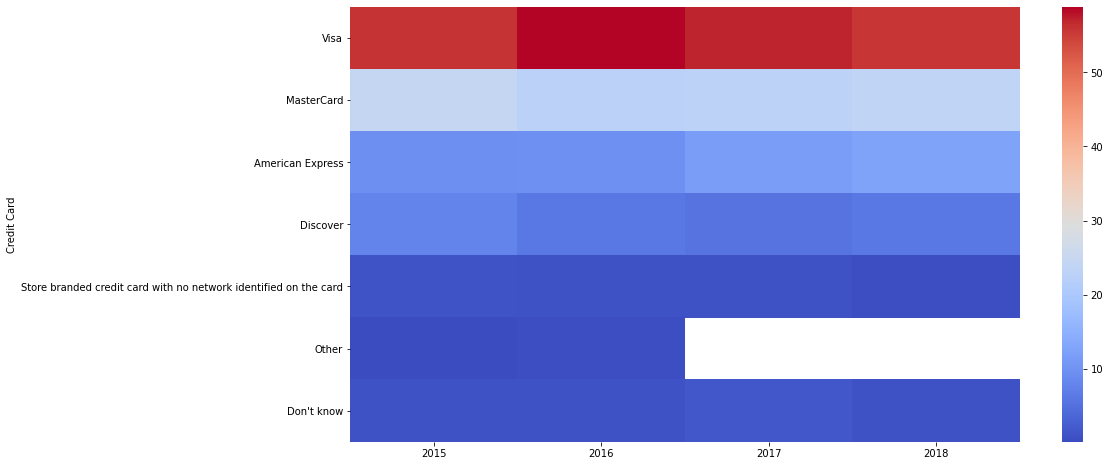

In [174]:
heat_map_generator(credit_card_f, 'Credit Card')

## Airlines

In [175]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Airlines: % of Fans Flew Most Often in Past 12 Months

airlines = brand_share.iloc[323:337]
airlines .reset_index()
airlines 

\
323                                 Southwest Airlines NaN  NaN   NaN    NaN   
324                       American Airlines/US Ariways NaN  NaN   NaN    NaN   
325                                     Delta Airlines NaN  NaN   NaN    NaN   
326                                    United Airlines NaN  NaN   NaN    NaN   
327                                  Jet Blue Airlines NaN  NaN   NaN    NaN   
328                                  Alaska Airlines\t NaN  NaN   NaN    NaN   
329                                    Spirit Airlines NaN  NaN   NaN    NaN   
330                                  Frontier Airlines NaN  NaN   NaN    NaN   
331                                      Allegiant Air NaN  NaN   NaN    NaN   
332                                   Hawiian Arilines NaN  NaN   NaN    NaN   
333                            Virgin America Airlines NaN  NaN   NaN    NaN   
334                                              Other NaN  NaN   NaN    NaN   
335                                         Don't know NaN  NaN   NaN    NaN   
336  Base: Number of fans who have flown on domesti... NaN  NaN   NaN    NaN   

                                                                         \
323     NaN        28.4        31.4        28.4        27.4        36.8   
324     NaN        14.5        19.0        19.5        20.1        19.0   
325     NaN        21.8        17.9        16.0        16.9        12.9   
326     NaN        13.0        13.6        14.9        14.6        11.5   
327     NaN         8.4         7.4         7.8         8.6         7.0   
328     NaN         3.7         3.4         5.0         3.6         4.0   
329     NaN         1.1         2.3         1.8         1.8         2.3   
330     NaN         1.3         1.4         1.5         2.0         1.5   
331     NaN         ---         1.3         1.1         1.4         1.2   
332     NaN         0.8         0.2         1.1         1.0         ---   
333     NaN         0.4         1.3         0.8         0.8         ---   
334     NaN         1.5         ---         0.3         0.4         3.8   
335     NaN         1.4         0.7         1.6         1.4         ---   
336     NaN  47,073,000  54,827,000  51,440,000  51,810,000  53,184,000   

                   Unnamed: 12  
323           NaN          NaN  
324           NaN          NaN  
325           NaN          NaN  
326           NaN          NaN  
327           NaN          NaN  
328           NaN          NaN  
329           NaN          NaN  
330           NaN          NaN  
331           NaN          NaN  
332           NaN          NaN  
333           NaN          NaN  
334           NaN          NaN  
335           NaN          NaN  
336           NaN          NaN

In [176]:
#add column names
airlines.columns = ["Airlines", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
airlines
#there are columns with nothing in them so I'm dropping them
airlines = airlines.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
airlines

Airlines        2015  \
323                                 Southwest Airlines        28.4   
324                       American Airlines/US Ariways        14.5   
325                                     Delta Airlines        21.8   
326                                    United Airlines        13.0   
327                                  Jet Blue Airlines         8.4   
328                                  Alaska Airlines\t         3.7   
329                                    Spirit Airlines         1.1   
330                                  Frontier Airlines         1.3   
331                                      Allegiant Air         ---   
332                                   Hawiian Arilines         0.8   
333                            Virgin America Airlines         0.4   
334                                              Other         1.5   
335                                         Don't know         1.4   
336  Base: Number of fans who have flown on domesti...  47,073,000   

           2016        2017        2018        2019  
323        31.4        28.4        27.4        36.8  
324        19.0        19.5        20.1        19.0  
325        17.9        16.0        16.9        12.9  
326        13.6        14.9        14.6        11.5  
327         7.4         7.8         8.6         7.0  
328         3.4         5.0         3.6         4.0  
329         2.3         1.8         1.8         2.3  
330         1.4         1.5         2.0         1.5  
331         1.3         1.1         1.4         1.2  
332         0.2         1.1         1.0         ---  
333         1.3         0.8         0.8         ---  
334         ---         0.3         0.4         3.8  
335         0.7         1.6         1.4         ---  
336  54,827,000  51,440,000  51,810,000  53,184,000

In [177]:
airlines_f= airlines.copy()
airlines_f["2015"] = airlines_f["2015"].replace("---", "").replace('', np.NaN)
airlines_f["2016"] = airlines_f["2016"].replace("---", "").replace('', np.NaN)
airlines_f["2017"] = airlines_f["2017"].replace("---", "").replace('', np.NaN)
airlines_f["2018"] = airlines_f["2018"].replace("---", "").replace('', np.NaN)
airlines_f["2019"] = airlines_f["2019"].replace("---", "").replace('', np.NaN)

airlines_f["2015"] = airlines_f["2015"].replace("--", "").replace('', np.NaN)
airlines_f["2016"] = airlines_f["2016"].replace("--", "").replace('', np.NaN)
airlines_f["2017"] = airlines_f["2017"].replace("--", "").replace('', np.NaN)
airlines_f["2018"] = airlines_f["2018"].replace("--", "").replace('', np.NaN)
airlines_f["2019"] = airlines_f["2019"].replace("--", "").replace('', np.NaN)

airlines_f["2015"] = airlines_f["2015"].replace(" ---", "").replace('', np.NaN)
airlines_f["2016"] = airlines_f["2016"].replace(" ---", "").replace('', np.NaN)
airlines_f["2017"] = airlines_f["2017"].replace(" ---", "").replace('', np.NaN)
airlines_f["2018"] = airlines_f["2018"].replace(" ---", "").replace('', np.NaN)
airlines_f["2019"] = airlines_f["2019"].replace(" ---", "").replace('', np.NaN)

airlines_f["2015"] = airlines_f["2015"].replace("--- ", "").replace('', np.NaN)
airlines_f["2016"] = airlines_f["2016"].replace("--- ", "").replace('', np.NaN)
airlines_f["2017"] = airlines_f["2017"].replace("--- ", "").replace('', np.NaN)
airlines_f["2018"] = airlines_f["2018"].replace("--- ", "").replace('', np.NaN)
airlines_f["2019"] = airlines_f["2019"].replace("--- ", "").replace('', np.NaN)
airlines_f["2018"] = insurance_f["2018"].replace("..." "").replace('', np.NaN)
airlines_f["2019"] = insurance_f["2019"].replace("...", "").replace('', np.NaN)

airlines_f

Airlines        2015  \
323                                 Southwest Airlines        28.4   
324                       American Airlines/US Ariways        14.5   
325                                     Delta Airlines        21.8   
326                                    United Airlines        13.0   
327                                  Jet Blue Airlines         8.4   
328                                  Alaska Airlines\t         3.7   
329                                    Spirit Airlines         1.1   
330                                  Frontier Airlines         1.3   
331                                      Allegiant Air         NaN   
332                                   Hawiian Arilines         0.8   
333                            Virgin America Airlines         0.4   
334                                              Other         1.5   
335                                         Don't know         1.4   
336  Base: Number of fans who have flown on domesti...  47,073,000   

           2016        2017  2018  2019  
323        31.4        28.4   NaN   NaN  
324        19.0        19.5   NaN   NaN  
325        17.9        16.0   NaN   NaN  
326        13.6        14.9   NaN   NaN  
327         7.4         7.8   NaN   NaN  
328         3.4         5.0   NaN   NaN  
329         2.3         1.8   NaN   NaN  
330         1.4         1.5   NaN   NaN  
331         1.3         1.1   NaN   NaN  
332         0.2         1.1   NaN   NaN  
333         1.3         0.8   NaN   NaN  
334         NaN         0.3   NaN   NaN  
335         0.7         1.6   NaN   NaN  
336  54,827,000  51,440,000   NaN   NaN

In [178]:
airlines_f = airlines_f.replace(',','',regex=True)

In [179]:
#checking data types and converting from object to int
#data.dtypes
airlines_f["2015"] = airlines_f["2015"].astype(float)
airlines_f["2016"] = airlines_f["2016"].astype(float)
airlines_f["2017"] = airlines_f["2017"].astype(float)
airlines_f["2018"] = airlines_f["2018"].astype(float)
airlines_f["2019"] = airlines_f["2019"].astype(float)
airlines_f.dtypes

Airlines     object
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
dtype: object

In [180]:
#shape(), info(), describe()
print(airlines_f.shape)
print(airlines_f.info())
print(airlines_f.describe(include = object))
print(airlines_f.describe())

(14, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 323 to 336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Airlines  14 non-null     object 
 1   2015      13 non-null     float64
 2   2016      13 non-null     float64
 3   2017      14 non-null     float64
 4   2018      0 non-null      float64
 5   2019      0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 804.0+ bytes
None
                 Airlines
count                  14
unique                 14
top     Frontier Airlines
freq                    1
               2015          2016          2017  2018  2019
count  1.300000e+01  1.300000e+01  1.400000e+01   0.0   0.0
mean   3.621007e+06  4.217469e+06  3.674293e+06   NaN   NaN
std    1.305570e+07  1.520627e+07  1.374792e+07   NaN   NaN
min    4.000000e-01  2.000000e-01  3.000000e-01   NaN   NaN
25%    1.300000e+00  1.300000e+00  1.200000e+00   NaN   NaN
50%    3.700000e+00  3.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


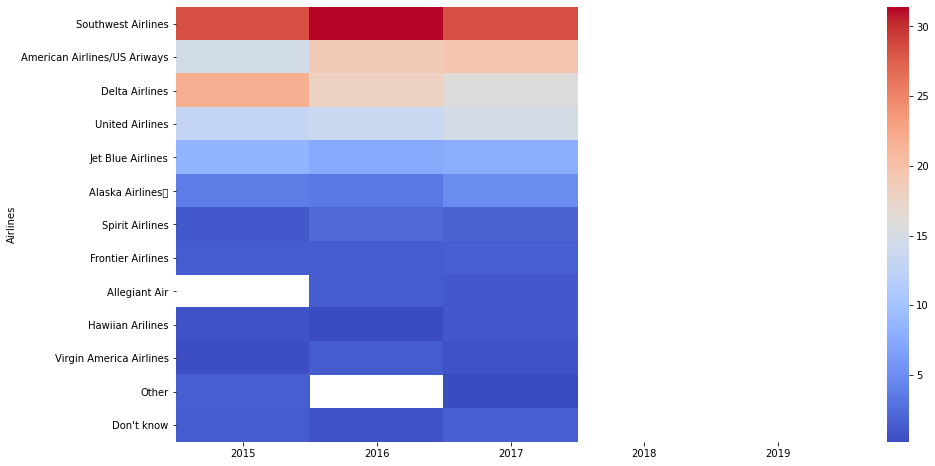

In [181]:
heat_map_generator(airlines_f, 'Airlines')

## Brokerage Firms

In [182]:
#select the rows in each table that we're interested in. I'm pulling Basketball-NBA: Brand Share-of-Market - Brokerage Firms: % of Fans Used Most Often in Past 12 Months

brokerage = brand_share.iloc[342:363]
brokerage.reset_index()
brokerage

\
342                        Fidelity Investments NaN  NaN   NaN    NaN     NaN   
343                              Charles Schwab NaN  NaN   NaN    NaN     NaN   
344                                    Vanguard NaN  NaN   NaN    NaN     NaN   
345                   Wells Fargo (Wells Trade) NaN  NaN   NaN    NaN     NaN   
346                                Edward Jones NaN  NaN   NaN    NaN     NaN   
347                               TD Ameritrade NaN  NaN   NaN    NaN     NaN   
348                Merrill Lynch (Merrill Edge) NaN  NaN   NaN    NaN     NaN   
349                                     E*trade NaN  NaN   NaN    NaN     NaN   
350                                   Scottrade NaN  NaN   NaN    NaN     NaN   
351                 Morgan Stanley Smith Barney NaN  NaN   NaN    NaN     NaN   
352                              USAA Brokerage NaN  NaN   NaN    NaN     NaN   
353                               T. Rowe Price NaN  NaN   NaN    NaN     NaN   
354                                         UBS NaN  NaN   NaN    NaN     NaN   
355                               Raymond James NaN  NaN   NaN    NaN     NaN   
356                        Ameriprise Financial NaN  NaN   NaN    NaN     NaN   
357                                Choice Trade NaN  NaN   NaN    NaN     NaN   
358                                   Tradeking NaN  NaN   NaN    NaN     NaN   
359                                TradeStation NaN  NaN   NaN    NaN     NaN   
360                                       Other NaN  NaN   NaN    NaN     NaN   
361                                  Don't Know NaN  NaN   NaN    NaN     NaN   
362  Base (No. of fans using a Brokerage Firm)) NaN  NaN   NaN    NaN     NaN   

                                                                              \
342        23.6        20.8        22.8        NaN         NaN           NaN   
343         9.4        10.0         9.5        NaN         NaN           NaN   
344         ---         ---         7.7        NaN         NaN           NaN   
345         6.3         8.9         7.3        NaN         NaN           NaN   
346         6.1         5.8         6.6        NaN         NaN           NaN   
347         5.9         5.6         6.6        NaN         NaN           NaN   
348         6.0         6.5         5.1        NaN         NaN           NaN   
349         8.8         7.0         4.6        NaN         NaN           NaN   
350         4.7         3.6         3.3        NaN         NaN           NaN   
351         3.5         3.2         2.3        NaN         NaN           NaN   
352         1.5         2.2         2.1        NaN         NaN           NaN   
353         2.1         2.0         2.0        NaN         NaN           NaN   
354         2.0         1.5         1.9        NaN         NaN           NaN   
355         2.4         1.9         1.7        NaN         NaN           NaN   
356         ---         ---         0.9        NaN         NaN           NaN   
357         0.1         0.3         0.3        NaN         NaN           NaN   
358         0.6         0.9         0.3        NaN         NaN           NaN   
359         0.5         0.3         ---        NaN         NaN           NaN   
360        11.0        14.4         9.5        NaN         NaN           NaN   
361         5.6         5.3         5.7        NaN         NaN           NaN   
362  36,524,000  38,463,000  38,037,000        NaN         NaN           NaN   

     Unnamed: 12  
342          NaN  
343          NaN  
344          NaN  
345          NaN  
346          NaN  
347          NaN  
348          NaN  
349          NaN  
350          NaN  
351          NaN  
352          NaN  
353          NaN  
354          NaN  
355          NaN  
356          NaN  
357          NaN  
358          NaN  
359          NaN  
360          NaN  
361          NaN  
362          NaN

In [183]:
#add column names
brokerage.columns = ["Brokerage Firm", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
brokerage
#there are columns with nothing in them so I'm dropping them
brokerage = brokerage.drop(["2010", "2011", "2012","2013", "2014", "2018", "2019", "2020", "?"], axis =1)
brokerage

Brokerage Firm        2015        2016  \
342                        Fidelity Investments        23.6        20.8   
343                              Charles Schwab         9.4        10.0   
344                                    Vanguard         ---         ---   
345                   Wells Fargo (Wells Trade)         6.3         8.9   
346                                Edward Jones         6.1         5.8   
347                               TD Ameritrade         5.9         5.6   
348                Merrill Lynch (Merrill Edge)         6.0         6.5   
349                                     E*trade         8.8         7.0   
350                                   Scottrade         4.7         3.6   
351                 Morgan Stanley Smith Barney         3.5         3.2   
352                              USAA Brokerage         1.5         2.2   
353                               T. Rowe Price         2.1         2.0   
354                                         UBS         2.0         1.5   
355                               Raymond James         2.4         1.9   
356                        Ameriprise Financial         ---         ---   
357                                Choice Trade         0.1         0.3   
358                                   Tradeking         0.6         0.9   
359                                TradeStation         0.5         0.3   
360                                       Other        11.0        14.4   
361                                  Don't Know         5.6         5.3   
362  Base (No. of fans using a Brokerage Firm))  36,524,000  38,463,000   

           2017  
342        22.8  
343         9.5  
344         7.7  
345         7.3  
346         6.6  
347         6.6  
348         5.1  
349         4.6  
350         3.3  
351         2.3  
352         2.1  
353         2.0  
354         1.9  
355         1.7  
356         0.9  
357         0.3  
358         0.3  
359         ---  
360         9.5  
361         5.7  
362  38,037,000

In [184]:
brokerage_f = brokerage.copy()
brokerage_f["2015"] = brokerage_f["2015"].replace("---", "").replace('', np.NaN)
brokerage_f["2016"] = brokerage_f["2016"].replace("---", "").replace('', np.NaN)
brokerage_f["2017"] = brokerage_f["2017"].replace("---", "").replace('', np.NaN)


brokerage_f["2015"] = brokerage_f["2015"].replace("--", "").replace('', np.NaN)
brokerage_f["2016"] = brokerage_f["2016"].replace("--", "").replace('', np.NaN)
brokerage_f["2017"] = brokerage_f["2017"].replace("--", "").replace('', np.NaN)


brokerage_f["2015"] = brokerage_f["2015"].replace(" ---", "").replace('', np.NaN)
brokerage_f["2016"] = brokerage_f["2016"].replace(" ---", "").replace('', np.NaN)
brokerage_f["2017"] = brokerage_f["2017"].replace(" ---", "").replace('', np.NaN)


brokerage_f["2015"] = brokerage_f["2015"].replace("--- ", "").replace('', np.NaN)
brokerage_f["2016"] = brokerage_f["2016"].replace("--- ", "").replace('', np.NaN)
brokerage_f["2017"] = brokerage_f["2017"].replace("--- ", "").replace('', np.NaN)

brokerage_f

Brokerage Firm        2015        2016  \
342                        Fidelity Investments        23.6        20.8   
343                              Charles Schwab         9.4        10.0   
344                                    Vanguard         NaN         NaN   
345                   Wells Fargo (Wells Trade)         6.3         8.9   
346                                Edward Jones         6.1         5.8   
347                               TD Ameritrade         5.9         5.6   
348                Merrill Lynch (Merrill Edge)         6.0         6.5   
349                                     E*trade         8.8         7.0   
350                                   Scottrade         4.7         3.6   
351                 Morgan Stanley Smith Barney         3.5         3.2   
352                              USAA Brokerage         1.5         2.2   
353                               T. Rowe Price         2.1         2.0   
354                                         UBS         2.0         1.5   
355                               Raymond James         2.4         1.9   
356                        Ameriprise Financial         NaN         NaN   
357                                Choice Trade         0.1         0.3   
358                                   Tradeking         0.6         0.9   
359                                TradeStation         0.5         0.3   
360                                       Other        11.0        14.4   
361                                  Don't Know         5.6         5.3   
362  Base (No. of fans using a Brokerage Firm))  36,524,000  38,463,000   

           2017  
342        22.8  
343         9.5  
344         7.7  
345         7.3  
346         6.6  
347         6.6  
348         5.1  
349         4.6  
350         3.3  
351         2.3  
352         2.1  
353         2.0  
354         1.9  
355         1.7  
356         0.9  
357         0.3  
358         0.3  
359         NaN  
360         9.5  
361         5.7  
362  38,037,000

In [185]:
brokerage_f = brokerage_f.replace(',','',regex=True)

In [186]:
#checking data types and converting from object to int
#data.dtypes
brokerage_f["2015"] = brokerage_f["2015"].astype(float)
brokerage_f["2016"] = brokerage_f["2016"].astype(float)
brokerage_f["2017"] = brokerage_f["2017"].astype(float)
brokerage_f.dtypes

Brokerage Firm     object
2015              float64
2016              float64
2017              float64
dtype: object

In [187]:
#shape(), info(), describe()
print(brokerage_f.shape)
print(brokerage_f.info())
print(brokerage_f.describe(include = object))
print(brokerage_f.describe())

(21, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 342 to 362
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brokerage Firm  21 non-null     object 
 1   2015            19 non-null     float64
 2   2016            19 non-null     float64
 3   2017            20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 804.0+ bytes
None
        Brokerage Firm
count               21
unique              21
top     USAA Brokerage
freq                 1
               2015          2016          2017
count  1.900000e+01  1.900000e+01  2.000000e+01
mean   1.922321e+06  2.024374e+06  1.901855e+06
std    8.379179e+06  8.824016e+06  8.505331e+06
min    1.000000e-01  3.000000e-01  3.000000e-01
25%    2.050000e+00  1.950000e+00  1.975000e+00
50%    5.600000e+00  5.300000e+00  4.850000e+00
75%    7.550000e+00  7.950000e+00  7.400000e+00
max    3.652400e+07  3.846300e+07  3.803700e+07


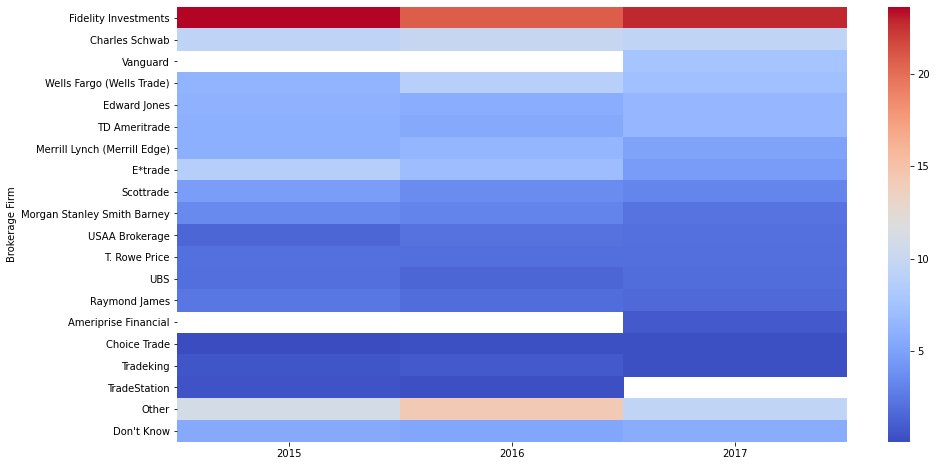

In [188]:
heat_map_generator(brokerage_f, 'Brokerage Firm')

## Tablet

In [189]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Tablet: % of Fans That Own a Tablet
tablet = brand_share.iloc[368:392]
tablet.reset_index()
tablet

\
368                                              Apple NaN  NaN   NaN    NaN   
369                                            Samsung NaN  NaN   NaN    NaN   
370                                             Amazon NaN  NaN   NaN    NaN   
371                                                 HP NaN  NaN   NaN    NaN   
372                                               Dell NaN  NaN   NaN    NaN   
373                                          Microsoft NaN  NaN   NaN    NaN   
374                                             Lenova NaN  NaN   NaN    NaN   
375                                                 LG NaN  NaN   NaN    NaN   
376                                               Asus NaN  NaN   NaN    NaN   
377                                             AT&T\t NaN  NaN   NaN    NaN   
378                                               Acer NaN  NaN   NaN    NaN   
379                                            Verizon NaN  NaN   NaN    NaN   
380                                                RCA NaN  NaN   NaN    NaN   
381                                               Sony NaN  NaN   NaN    NaN   
382                                              Nexus NaN  NaN   NaN    NaN   
383                                            Alcatel NaN  NaN   NaN    NaN   
384                                           Nextbook NaN  NaN   NaN    NaN   
385                                             Huawei NaN  NaN   NaN    NaN   
386                                              Nokia NaN  NaN   NaN    NaN   
387                                            RealPad NaN  NaN   NaN    NaN   
388                                             Nvidia NaN  NaN   NaN    NaN   
389                                              Other NaN  NaN   NaN    NaN   
390                                         Don't know NaN  NaN   NaN    NaN   
391  Base (No. that used tablet in the past 12 months) NaN  NaN   NaN    NaN   

                                                                         \
368     NaN        43.4        47.9        45.7        48.0         NaN   
369     NaN        15.3        14.6        16.0        16.8         NaN   
370     NaN        12.5         8.9        10.0         9.9         NaN   
371     NaN         2.9         3.3         2.7         3.8         NaN   
372     NaN         3.5         2.7         2.6         3.3         NaN   
373     NaN         3.7         3.9         4.7         3.2         NaN   
374     NaN         1.5         1.2         2.2         1.9         NaN   
375     NaN         1.7         1.6         2.4         1.7         NaN   
376     NaN         2.9         2.4         1.7         1.7         NaN   
377     NaN         0.2         1.3         1.1         1.7         NaN   
378     NaN         2.0         1.7         3.0         1.5         NaN   
379     NaN         1.4         1.3         1.1         1.0         NaN   
380     NaN         0.8         1.2         1.0         0.9         NaN   
381     NaN         1.1         1.1         0.6         0.6         NaN   
382     NaN         1.9         2.2         1.0         0.4         NaN   
383     NaN         0.2         0.3         0.3         0.3         NaN   
384     NaN         0.4         0.6         0.3         0.2         NaN   
385     NaN         ---         0.2         0.2         0.1         NaN   
386     NaN         0.4         0.3         0.2         ---         NaN   
387     NaN         0.1         ---         0.1         ---         NaN   
388     NaN         0.3         0.1         0.1         ---         NaN   
389     NaN         1.9         2.4         1.2         1.1         NaN   
390     NaN         1.7         1.0         1.8         2.1         NaN   
391     NaN  58,678,000  57,611,000  56,625,000  54,441,000         NaN   

                   Unnamed: 12  
368           NaN          NaN  
369           NaN          NaN  
370           NaN          NaN  
371           NaN          NaN  
372           NaN          NaN  
373

In [190]:
#add column names
tablet.columns = ["Tablet", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
tablet
#there are columns with nothing in them so I'm dropping them
tablet = tablet.drop(["2010", "2011", "2012","2013", "2014", "2019","2020", "?"], axis =1)
tablet

Tablet        2015  \
368                                              Apple        43.4   
369                                            Samsung        15.3   
370                                             Amazon        12.5   
371                                                 HP         2.9   
372                                               Dell         3.5   
373                                          Microsoft         3.7   
374                                             Lenova         1.5   
375                                                 LG         1.7   
376                                               Asus         2.9   
377                                             AT&T\t         0.2   
378                                               Acer         2.0   
379                                            Verizon         1.4   
380                                                RCA         0.8   
381                                               Sony         1.1   
382                                              Nexus         1.9   
383                                            Alcatel         0.2   
384                                           Nextbook         0.4   
385                                             Huawei         ---   
386                                              Nokia         0.4   
387                                            RealPad         0.1   
388                                             Nvidia         0.3   
389                                              Other         1.9   
390                                         Don't know         1.7   
391  Base (No. that used tablet in the past 12 months)  58,678,000   

           2016        2017        2018  
368        47.9        45.7        48.0  
369        14.6        16.0        16.8  
370         8.9        10.0         9.9  
371         3.3         2.7         3.8  
372         2.7         2.6         3.3  
373         3.9         4.7         3.2  
374         1.2         2.2         1.9  
375         1.6         2.4         1.7  
376         2.4         1.7         1.7  
377         1.3         1.1         1.7  
378         1.7         3.0         1.5  
379         1.3         1.1         1.0  
380         1.2         1.0         0.9  
381         1.1         0.6         0.6  
382         2.2         1.0         0.4  
383         0.3         0.3         0.3  
384         0.6         0.3         0.2  
385         0.2         0.2         0.1  
386         0.3         0.2         ---  
387         ---         0.1         ---  
388         0.1         0.1         ---  
389         2.4         1.2         1.1  
390         1.0         1.8         2.1  
391  57,611,000  56,625,000  54,441,000

In [191]:
tablet_f = tablet.copy()
tablet_f["2015"] = tablet_f["2015"].replace("---", "").replace('', np.NaN)
tablet_f["2016"] = tablet_f["2016"].replace("---", "").replace('', np.NaN)
tablet_f["2017"] = tablet_f["2017"].replace("---", "").replace('', np.NaN)
tablet_f["2018"] = tablet_f["2018"].replace("---", "").replace('', np.NaN)


tablet_f["2015"] = tablet_f["2015"].replace("--", "").replace('', np.NaN)
tablet_f["2016"] = tablet_f["2016"].replace("--", "").replace('', np.NaN)
tablet_f["2017"] = tablet_f["2017"].replace("--", "").replace('', np.NaN)
tablet_f["2018"] = tablet_f["2018"].replace("--", "").replace('', np.NaN)


tablet_f["2015"] = tablet_f["2015"].replace(" ---", "").replace('', np.NaN)
tablet_f["2016"] = tablet_f["2016"].replace(" ---", "").replace('', np.NaN)
tablet_f["2017"] = tablet_f["2017"].replace(" ---", "").replace('', np.NaN)
tablet_f["2018"] = tablet_f["2018"].replace(" ---", "").replace('', np.NaN)


tablet_f["2015"] = tablet_f["2015"].replace("--- ", "").replace('', np.NaN)
tablet_f["2016"] = tablet_f["2016"].replace("--- ", "").replace('', np.NaN)
tablet_f["2017"] = tablet_f["2017"].replace("--- ", "").replace('', np.NaN)
tablet_f["2018"] = tablet_f["2018"].replace("--- ", "").replace('', np.NaN)
tablet_f["2018"] = tablet_f["2018"].replace("..." "").replace('', np.NaN)

tablet_f

Tablet        2015  \
368                                              Apple        43.4   
369                                            Samsung        15.3   
370                                             Amazon        12.5   
371                                                 HP         2.9   
372                                               Dell         3.5   
373                                          Microsoft         3.7   
374                                             Lenova         1.5   
375                                                 LG         1.7   
376                                               Asus         2.9   
377                                             AT&T\t         0.2   
378                                               Acer         2.0   
379                                            Verizon         1.4   
380                                                RCA         0.8   
381                                               Sony         1.1   
382                                              Nexus         1.9   
383                                            Alcatel         0.2   
384                                           Nextbook         0.4   
385                                             Huawei         NaN   
386                                              Nokia         0.4   
387                                            RealPad         0.1   
388                                             Nvidia         0.3   
389                                              Other         1.9   
390                                         Don't know         1.7   
391  Base (No. that used tablet in the past 12 months)  58,678,000   

           2016        2017        2018  
368        47.9        45.7        48.0  
369        14.6        16.0        16.8  
370         8.9        10.0         9.9  
371         3.3         2.7         3.8  
372         2.7         2.6         3.3  
373         3.9         4.7         3.2  
374         1.2         2.2         1.9  
375         1.6         2.4         1.7  
376         2.4         1.7         1.7  
377         1.3         1.1         1.7  
378         1.7         3.0         1.5  
379         1.3         1.1         1.0  
380         1.2         1.0         0.9  
381         1.1         0.6         0.6  
382         2.2         1.0         0.4  
383         0.3         0.3         0.3  
384         0.6         0.3         0.2  
385         0.2         0.2         0.1  
386         0.3         0.2         NaN  
387         NaN         0.1         NaN  
388         0.1         0.1         NaN  
389         2.4         1.2         1.1  
390         1.0         1.8         2.1  
391  57,611,000  56,625,000  54,441,000

In [192]:
tablet_f = tablet_f.replace(',','',regex=True)

In [193]:
#checking data types and converting from object to int
#data.dtypes
tablet_f["2015"] = tablet_f["2015"].astype(float)
tablet_f["2016"] = tablet_f["2016"].astype(float)
tablet_f["2017"] = tablet_f["2017"].astype(float)
tablet_f["2018"] = tablet_f["2018"].astype(float)
tablet_f.dtypes

Tablet     object
2015      float64
2016      float64
2017      float64
2018      float64
dtype: object

In [194]:
#shape(), info(), describe()
print(tablet_f.shape)
print(tablet_f.info())
print(tablet_f.describe(include = object))
print(tablet_f.describe())

(24, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 368 to 391
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tablet  24 non-null     object 
 1   2015    23 non-null     float64
 2   2016    23 non-null     float64
 3   2017    24 non-null     float64
 4   2018    21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB
None
           Tablet
count          24
unique         24
top     Microsoft
freq            1
               2015          2016          2017          2018
count  2.300000e+01  2.300000e+01  2.400000e+01  2.100000e+01
mean   2.551222e+06  2.504830e+06  2.359379e+06  2.592433e+06
std    1.223521e+07  1.201272e+07  1.155853e+07  1.188000e+07
min    1.000000e-01  1.000000e-01  1.000000e-01  1.000000e-01
25%    6.000000e-01  1.050000e+00  5.250000e-01  9.000000e-01
50%    1.700000e+00  1.600000e+00  1.450000e+00  1.700000e+00
75%    3.200000e+00  3.000000e+00  2.775000e+00

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


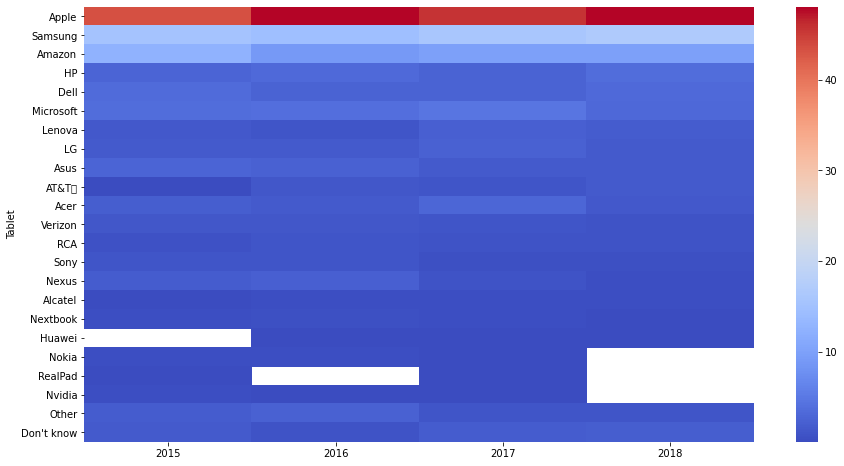

In [195]:
heat_map_generator(tablet_f, 'Tablet')

## Quick Service/Fast Food Restaurants

In [196]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Quick Service/Fast Food Restaurants: % of Fans Used Most Often in Past 12 Months

fast_food = brand_share.iloc[397:420]
fast_food.reset_index()
fast_food

\
397                                         McDonald's NaN  NaN   NaN    NaN   
398                                        Chick-fil-A NaN  NaN   NaN    NaN   
399                                         Starbuck's NaN  NaN   NaN    NaN   
400                                        Burger King NaN  NaN   NaN    NaN   
401                                            Wendy's NaN  NaN   NaN    NaN   
402                                           Chipotle NaN  NaN   NaN    NaN   
403                                             Subway NaN  NaN   NaN    NaN   
404                                          Taco Bell NaN  NaN   NaN    NaN   
405                                       Panera Bread NaN  NaN   NaN    NaN   
406                                     Dunkin' Donuts NaN  NaN   NaN    NaN   
407                                                KFC NaN  NaN   NaN    NaN   
408                                     Domino's Pizza NaN  NaN   NaN    NaN   
409                                          Pizza Hut NaN  NaN   NaN    NaN   
410                                    Jack-in-the-Box NaN  NaN   NaN    NaN   
411                                             Arby's NaN  NaN   NaN    NaN   
412                                     Sonic Drive-In NaN  NaN   NaN    NaN   
413                                    Little Caesar's NaN  NaN   NaN    NaN   
414                                        Dairy Queen NaN  NaN   NaN    NaN   
415                                           Popeye's NaN  NaN   NaN    NaN   
416                                        Papa John's NaN  NaN   NaN    NaN   
417                                         Don't know NaN  NaN   NaN    NaN   
418                                              Other NaN  NaN   NaN    NaN   
419  Have visited/had food from a quick service res... NaN  NaN   NaN    NaN   

                                                                     \
397     NaN     NaN        23.5        24.3        24.9        22.8   
398     NaN     NaN         9.2         8.8        10.8        14.2   
399     NaN     NaN         9.6         8.6         8.7         8.7   
400     NaN     NaN         5.0         7.0         6.8         6.5   
401     NaN     NaN         5.9         6.0         5.7         6.0   
402     NaN     NaN         5.2         4.8         3.8         5.8   
403     NaN     NaN        10.7         7.8         5.6         5.0   
404     NaN     NaN         6.1         5.6         4.2         4.5   
405     NaN     NaN         NaN         NaN         ---         4.1   
406     NaN     NaN         3.3         3.5         4.6         3.4   
407     NaN     NaN         1.9         2.0         2.3         ---   
408     NaN     NaN         2.0         2.1         2.2         ---   
409     NaN     NaN         1.8         1.9         1.8         ---   
410     NaN     NaN         2.0         1.6         1.7         ---   
411     NaN     NaN         2.2         1.8         1.4         ---   
412     NaN     NaN         2.1         1.7         1.1         ---   
413     NaN     NaN         1.2         2.4         1.0         ---   
414     NaN     NaN         1.2         1.8         0.7         ---   
415     NaN     NaN         1.0         1.5         0.7         ---   
416     NaN     NaN         1.3         1.4         0.7         ---   
417     NaN     NaN         0.9         0.8         1.3         ---   
418     NaN     NaN         4.0         4.7         2.5        19.0   
419     NaN     NaN  77,773,000  71,945,000  70,943,000  66,587,000   

                   Unnamed: 12  
397           NaN          NaN  
398           NaN          NaN  
399           NaN          NaN  
400           NaN          NaN  
401           NaN          NaN  
402           NaN          NaN  
403           NaN          NaN  
404           NaN          NaN  
405           NaN          NaN  
406           NaN          NaN  
407           NaN          NaN  
408           NaN          NaN  
409           NaN      

In [197]:
#add column names
fast_food.columns = ["Quick Service/Fast Food", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
fast_food
#there are columns with nothing in them so I'm dropping them
fast_food = fast_food.drop(["2010", "2011", "2012","2013", "2014", "2020", "?"], axis =1)
fast_food

Quick Service/Fast Food 2015        2016  \
397                                         McDonald's  NaN        23.5   
398                                        Chick-fil-A  NaN         9.2   
399                                         Starbuck's  NaN         9.6   
400                                        Burger King  NaN         5.0   
401                                            Wendy's  NaN         5.9   
402                                           Chipotle  NaN         5.2   
403                                             Subway  NaN        10.7   
404                                          Taco Bell  NaN         6.1   
405                                       Panera Bread  NaN         NaN   
406                                     Dunkin' Donuts  NaN         3.3   
407                                                KFC  NaN         1.9   
408                                     Domino's Pizza  NaN         2.0   
409                                          Pizza Hut  NaN         1.8   
410                                    Jack-in-the-Box  NaN         2.0   
411                                             Arby's  NaN         2.2   
412                                     Sonic Drive-In  NaN         2.1   
413                                    Little Caesar's  NaN         1.2   
414                                        Dairy Queen  NaN         1.2   
415                                           Popeye's  NaN         1.0   
416                                        Papa John's  NaN         1.3   
417                                         Don't know  NaN         0.9   
418                                              Other  NaN         4.0   
419  Have visited/had food from a quick service res...  NaN  77,773,000   

           2017        2018        2019  
397        24.3        24.9        22.8  
398         8.8        10.8        14.2  
399         8.6         8.7         8.7  
400         7.0         6.8         6.5  
401         6.0         5.7         6.0  
402         4.8         3.8         5.8  
403         7.8         5.6         5.0  
404         5.6         4.2         4.5  
405         NaN         ---         4.1  
406         3.5         4.6         3.4  
407         2.0         2.3         ---  
408         2.1         2.2         ---  
409         1.9         1.8         ---  
410         1.6         1.7         ---  
411         1.8         1.4         ---  
412         1.7         1.1         ---  
413         2.4         1.0         ---  
414         1.8         0.7         ---  
415         1.5         0.7         ---  
416         1.4         0.7         ---  
417         0.8         1.3         ---  
418         4.7         2.5        19.0  
419  71,945,000  70,943,000  66,587,000

In [198]:
fast_food_f= fast_food.copy()
fast_food_f["2015"] = fast_food_f["2015"].replace("---", "").replace('', np.NaN)
fast_food_f["2016"] = fast_food_f["2016"].replace("---", "").replace('', np.NaN)
fast_food_f["2017"] = fast_food_f["2017"].replace("---", "").replace('', np.NaN)
fast_food_f["2018"] = fast_food_f["2018"].replace("---", "").replace('', np.NaN)
fast_food_f["2019"] = fast_food_f["2019"].replace("---", "").replace('', np.NaN)

fast_food_f["2015"] = fast_food_f["2015"].replace("--", "").replace('', np.NaN)
fast_food_f["2016"] = fast_food_f["2016"].replace("--", "").replace('', np.NaN)
fast_food_f["2017"] = fast_food_f["2017"].replace("--", "").replace('', np.NaN)
fast_food_f["2018"] = fast_food_f["2018"].replace("--", "").replace('', np.NaN)
fast_food_f["2019"] = fast_food_f["2019"].replace("--", "").replace('', np.NaN)

fast_food_f["2015"] = fast_food_f["2015"].replace(" ---", "").replace('', np.NaN)
fast_food_f["2016"] = fast_food_f["2016"].replace(" ---", "").replace('', np.NaN)
fast_food_f["2017"] = fast_food_f["2017"].replace(" ---", "").replace('', np.NaN)
fast_food_f["2018"] = fast_food_f["2018"].replace(" ---", "").replace('', np.NaN)
fast_food_f["2019"] = fast_food_f["2019"].replace(" ---", "").replace('', np.NaN)

fast_food_f["2015"] = fast_food_f["2015"].replace("--- ", "").replace('', np.NaN)
fast_food_f["2016"] = fast_food_f["2016"].replace("--- ", "").replace('', np.NaN)
fast_food_f["2017"] = fast_food_f["2017"].replace("--- ", "").replace('', np.NaN)
fast_food_f["2018"] = fast_food_f["2018"].replace("--- ", "").replace('', np.NaN)
fast_food_f["2019"] = fast_food_f["2019"].replace("--- ", "").replace('', np.NaN)
fast_food_f["2018"] = fast_food_f["2018"].replace("..." "").replace('', np.NaN)
fast_food_f["2019"] = fast_food_f["2019"].replace("...", "").replace('', np.NaN)

fast_food_f

Quick Service/Fast Food  2015        2016  \
397                                         McDonald's   NaN        23.5   
398                                        Chick-fil-A   NaN         9.2   
399                                         Starbuck's   NaN         9.6   
400                                        Burger King   NaN         5.0   
401                                            Wendy's   NaN         5.9   
402                                           Chipotle   NaN         5.2   
403                                             Subway   NaN        10.7   
404                                          Taco Bell   NaN         6.1   
405                                       Panera Bread   NaN         NaN   
406                                     Dunkin' Donuts   NaN         3.3   
407                                                KFC   NaN         1.9   
408                                     Domino's Pizza   NaN         2.0   
409                                          Pizza Hut   NaN         1.8   
410                                    Jack-in-the-Box   NaN         2.0   
411                                             Arby's   NaN         2.2   
412                                     Sonic Drive-In   NaN         2.1   
413                                    Little Caesar's   NaN         1.2   
414                                        Dairy Queen   NaN         1.2   
415                                           Popeye's   NaN         1.0   
416                                        Papa John's   NaN         1.3   
417                                         Don't know   NaN         0.9   
418                                              Other   NaN         4.0   
419  Have visited/had food from a quick service res...   NaN  77,773,000   

           2017        2018        2019  
397        24.3        24.9        22.8  
398         8.8        10.8        14.2  
399         8.6         8.7         8.7  
400         7.0         6.8         6.5  
401         6.0         5.7         6.0  
402         4.8         3.8         5.8  
403         7.8         5.6         5.0  
404         5.6         4.2         4.5  
405         NaN         NaN         4.1  
406         3.5         4.6         3.4  
407         2.0         2.3         NaN  
408         2.1         2.2         NaN  
409         1.9         1.8         NaN  
410         1.6         1.7         NaN  
411         1.8         1.4         NaN  
412         1.7         1.1         NaN  
413         2.4         1.0         NaN  
414         1.8         0.7         NaN  
415         1.5         0.7         NaN  
416         1.4         0.7         NaN  
417         0.8         1.3         NaN  
418         4.7         2.5        19.0  
419  71,945,000  70,943,000  66,587,000

In [199]:
fast_food_f = fast_food_f.replace(',','',regex=True)

In [200]:
#checking data types and converting from object to int
#data.dtypes
fast_food_f["2015"] = fast_food_f["2015"].astype(float)
fast_food_f["2016"] = fast_food_f["2016"].astype(float)
fast_food_f["2017"] = fast_food_f["2017"].astype(float)
fast_food_f["2018"] = fast_food_f["2018"].astype(float)
fast_food_f["2019"] = fast_food_f["2019"].astype(float)
fast_food_f.dtypes

Quick Service/Fast Food     object
2015                       float64
2016                       float64
2017                       float64
2018                       float64
2019                       float64
dtype: object

In [201]:
#shape(), info(), describe()
print(fast_food_f.shape)
print(fast_food_f.info())
print(fast_food_f.describe(include = object))
print(fast_food_f.describe())

(23, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 397 to 419
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quick Service/Fast Food  23 non-null     object 
 1   2015                     0 non-null      float64
 2   2016                     22 non-null     float64
 3   2017                     22 non-null     float64
 4   2018                     22 non-null     float64
 5   2019                     12 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.2+ KB
None
       Quick Service/Fast Food
count                       23
unique                      23
top                     Subway
freq                         1
       2015          2016          2017          2018          2019
count   0.0  2.200000e+01  2.200000e+01  2.200000e+01  1.200000e+01
mean    NaN  3.535141e+06  3.270232e+06  3.224686e+06  5.548925e+06
std     NaN  1.658126e+07  1.533872e+07

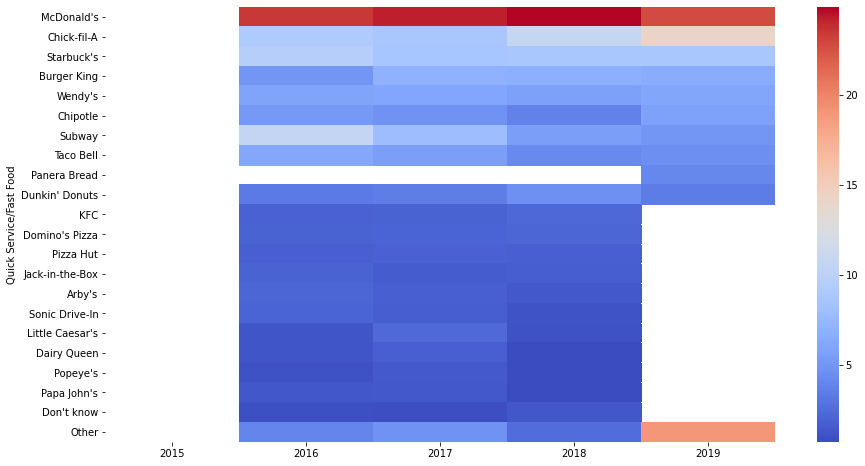

In [202]:
heat_map_generator(fast_food_f, 'Quick Service/Fast Food')

## Personal Banking

In [203]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Personal Banking: % of Fans Used Personal Bank in Past 12 Months

banking = brand_share.iloc[425:446]
banking.reset_index()
banking

\
425                                  Bank of America NaN  NaN   NaN    NaN   
426                     Chase (JP Morgan Chase Bank) NaN  NaN   NaN    NaN   
427                                      Wells Fargo NaN  NaN   NaN    NaN   
428                                              PNC NaN  NaN   NaN    NaN   
429                                      Capital One NaN  NaN   NaN    NaN   
430                                          US Bank NaN  NaN   NaN    NaN   
431                                         Citibank NaN  NaN   NaN    NaN   
432                                        USAA Bank NaN  NaN   NaN    NaN   
433                                        BB&T Bank NaN  NaN   NaN    NaN   
434                                          TD Bank NaN  NaN   NaN    NaN   
435                                    Citizens Bank NaN  NaN   NaN    NaN   
436                                      Fifth Third NaN  NaN   NaN    NaN   
437                                     Regions Bank NaN  NaN   NaN    NaN   
438                                         SunTrust NaN  NaN   NaN    NaN   
439                                             Ally NaN  NaN   NaN    NaN   
440                                          Keybank NaN  NaN   NaN    NaN   
441                              Charles Schwab Bank NaN  NaN   NaN    NaN   
442                                             HSBC NaN  NaN   NaN    NaN   
443                                            Other NaN  NaN   NaN    NaN   
444                                       Don't know NaN  NaN   NaN    NaN   
445  Base (No. used personal bank in past 12 months) NaN  NaN   NaN    NaN   

                                                                    \
425     NaN     NaN        16.7        18.1        NaN         NaN   
426     NaN     NaN        16.1        16.4        NaN         NaN   
427     NaN     NaN        13.3        12.5        NaN         NaN   
428     NaN     NaN         3.5         3.8        NaN         NaN   
429     NaN     NaN         3.5         3.7        NaN         NaN   
430     NaN     NaN         4.3         3.4        NaN         NaN   
431     NaN     NaN         3.1         2.8        NaN         NaN   
432     NaN     NaN         ---         2.3        NaN         NaN   
433     NaN     NaN         ---         1.6        NaN         NaN   
434     NaN     NaN         2.5         1.6        NaN         NaN   
435     NaN     NaN         1.8         1.5        NaN         NaN   
436     NaN     NaN         1.5         1.5        NaN         NaN   
437     NaN     NaN         ---         1.3        NaN         NaN   
438     NaN     NaN         1.3         1.2        NaN         NaN   
439     NaN     NaN         1.0         0.9        NaN         NaN   
440     NaN     NaN         0.6         0.6        NaN         NaN   
441     NaN     NaN         0.5         0.5        NaN         NaN   
442     NaN     NaN         0.8         0.5        NaN         NaN   
443     NaN     NaN        27.6        23.2        NaN         NaN   
444     NaN     NaN         2.0         2.6        NaN         NaN   
445     NaN     NaN  75,950,000  69,824,000        NaN         NaN   

                   Unnamed: 12  
425           NaN          NaN  
426           NaN          NaN  
427           NaN          NaN  
428           NaN          NaN  
429           NaN          NaN  
430           NaN          NaN  
431           NaN          NaN  
432           NaN          NaN  
433           NaN          NaN  
434           NaN          NaN  
435           NaN          NaN  
436           NaN          NaN  
437           NaN          NaN  
438           NaN          NaN  
439           NaN          NaN  
440           NaN          NaN  
441           NaN          NaN  
442           NaN          NaN  
443           NaN          NaN  
444           NaN          NaN  
445           NaN          NaN

In [204]:
#add column names
banking.columns = ["Personal Bank", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
banking
#there are columns with nothing in them so I'm dropping them
banking = banking.drop(["2010", "2011", "2012","2013", "2014", "2015", "2018", "2019", "2020", "?"], axis =1)
banking

Personal Bank        2016        2017
425                                  Bank of America        16.7        18.1
426                     Chase (JP Morgan Chase Bank)        16.1        16.4
427                                      Wells Fargo        13.3        12.5
428                                              PNC         3.5         3.8
429                                      Capital One         3.5         3.7
430                                          US Bank         4.3         3.4
431                                         Citibank         3.1         2.8
432                                        USAA Bank         ---         2.3
433                                        BB&T Bank         ---         1.6
434                                          TD Bank         2.5         1.6
435                                    Citizens Bank         1.8         1.5
436                                      Fifth Third         1.5         1.5
437                                     Regions Bank         ---         1.3
438                                         SunTrust         1.3         1.2
439                                             Ally         1.0         0.9
440                                          Keybank         0.6         0.6
441                              Charles Schwab Bank         0.5         0.5
442                                             HSBC         0.8         0.5
443                                            Other        27.6        23.2
444                                       Don't know         2.0         2.6
445  Base (No. used personal bank in past 12 months)  75,950,000  69,824,000

In [205]:
banking_f= banking.copy()
banking_f["2016"] = banking_f["2016"].replace("---", "").replace('', np.NaN)
banking_f["2017"] = banking_f["2017"].replace("---", "").replace('', np.NaN)

banking_f["2016"] = banking_f["2016"].replace("--", "").replace('', np.NaN)
banking_f["2017"] = banking_f["2017"].replace("--", "").replace('', np.NaN)

banking_f["2016"] = banking_f["2016"].replace(" ---", "").replace('', np.NaN)
banking_f["2017"] = banking_f["2017"].replace(" ---", "").replace('', np.NaN)

banking_f["2016"] = banking_f["2016"].replace("--- ", "").replace('', np.NaN)
banking_f["2017"] = banking_f["2017"].replace("--- ", "").replace('', np.NaN)

banking_f

Personal Bank        2016        2017
425                                  Bank of America        16.7        18.1
426                     Chase (JP Morgan Chase Bank)        16.1        16.4
427                                      Wells Fargo        13.3        12.5
428                                              PNC         3.5         3.8
429                                      Capital One         3.5         3.7
430                                          US Bank         4.3         3.4
431                                         Citibank         3.1         2.8
432                                        USAA Bank         NaN         2.3
433                                        BB&T Bank         NaN         1.6
434                                          TD Bank         2.5         1.6
435                                    Citizens Bank         1.8         1.5
436                                      Fifth Third         1.5         1.5
437                                     Regions Bank         NaN         1.3
438                                         SunTrust         1.3         1.2
439                                             Ally         1.0         0.9
440                                          Keybank         0.6         0.6
441                              Charles Schwab Bank         0.5         0.5
442                                             HSBC         0.8         0.5
443                                            Other        27.6        23.2
444                                       Don't know         2.0         2.6
445  Base (No. used personal bank in past 12 months)  75,950,000  69,824,000

In [206]:
banking_f = banking_f.replace(',','',regex=True)

In [207]:
#checking data types and converting from object to int
#data.dtypes
banking_f["2016"] = banking_f["2016"].astype(float)
banking_f["2017"] = banking_f["2017"].astype(float)

banking_f.dtypes

Personal Bank     object
2016             float64
2017             float64
dtype: object

In [208]:
#shape(), info(), describe()
print(banking_f.shape)
print(banking_f.info())
print(banking_f.describe(include = object))
print(banking_f.describe())

(21, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 425 to 445
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Personal Bank  21 non-null     object 
 1   2016           18 non-null     float64
 2   2017           21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 636.0+ bytes
None
       Personal Bank
count             21
unique            21
top      Fifth Third
freq               1
               2016          2017
count  1.800000e+01  2.100000e+01
mean   4.219450e+06  3.324957e+06
std    1.790159e+07  1.523684e+07
min    5.000000e-01  5.000000e-01
25%    1.350000e+00  1.300000e+00
50%    2.800000e+00  2.300000e+00
75%    1.105000e+01  3.800000e+00
max    7.595000e+07  6.982400e+07


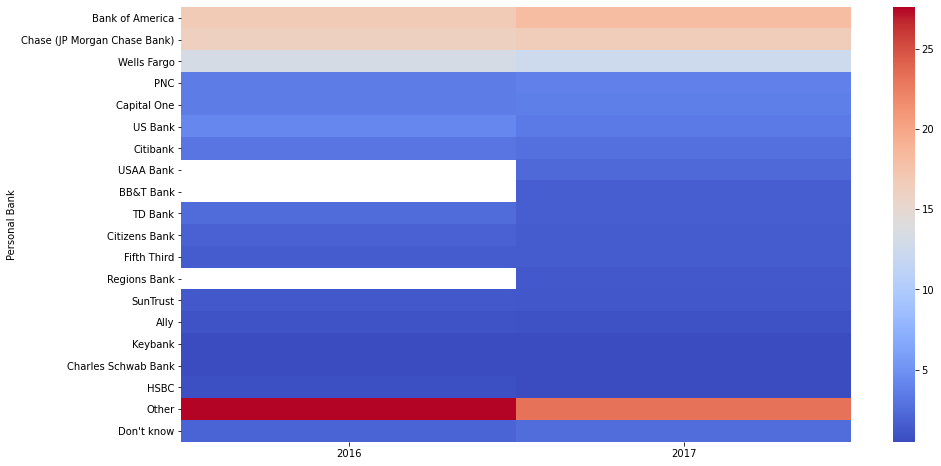

In [209]:
heat_map_generator(banking_f, 'Personal Bank')

## Beer

In [210]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Beer: % of Fans Drank Most Often in Past 12 Months

beer = brand_share.iloc[451:499]
beer.reset_index()
beer

\
451                                         Bud Light NaN  NaN   NaN    NaN   
452                                       Coors Light NaN  NaN   NaN    NaN   
453                                         Blue Moon NaN  NaN   NaN    NaN   
454                                       Miller Lite NaN  NaN   NaN    NaN   
455                                      Samuel Adams NaN  NaN   NaN    NaN   
456                                          Heineken NaN  NaN   NaN    NaN   
457                                      Corona Extra NaN  NaN   NaN    NaN   
458                                         Budweiser NaN  NaN   NaN    NaN   
459                                     Stella Artois NaN  NaN   NaN    NaN   
460                                         Yuengling NaN  NaN   NaN    NaN   
461                                    Michelob Ultra NaN  NaN   NaN    NaN   
462                                      Corona Light NaN  NaN   NaN    NaN   
463                                          Guinness NaN  NaN   NaN    NaN   
464                                         Dos Equis NaN  NaN   NaN    NaN   
465                             Modelo (Negra Modelo) NaN  NaN   NaN    NaN   
466                                  Miller High Life NaN  NaN   NaN    NaN   
467                                  Other Craft Beer NaN  NaN   NaN    NaN   
468                                           Corona* NaN  NaN   NaN    NaN   
469                                    Corona Premier NaN  NaN   NaN    NaN   
470                                       Busch Light NaN  NaN   NaN    NaN   
471                                            Shiner NaN  NaN   NaN    NaN   
472                                             Busch NaN  NaN   NaN    NaN   
473                                          Michelob NaN  NaN   NaN    NaN   
474                                      Amstel Light NaN  NaN   NaN    NaN   
475                                      Goose Island NaN  NaN   NaN    NaN   
476                              Miller Genuine Draft NaN  NaN   NaN    NaN   
477                                 Pabst Blue Ribbon NaN  NaN   NaN    NaN   
478                                     Coors Banquet NaN  NaN   NaN    NaN   
479                                    Keystone Light NaN  NaN   NaN    NaN   
480                                     Leinenkugel’s NaN  NaN   NaN    NaN   
481                                            Beck's NaN  NaN   NaN    NaN   
482                                            Labatt NaN  NaN   NaN    NaN   
483                                     Natural Light NaN  NaN   NaN    NaN   
484                                            Tecate NaN  NaN   NaN    NaN   
485                                        Red Stripe NaN  NaN   NaN    NaN   
486                                      Carta Blanca NaN  NaN   NaN    NaN   
487                                            Molson NaN  NaN   NaN    NaN   
488                                   Landshark Lager NaN  NaN   NaN    NaN   
489                                           Pacfico NaN  NaN   NaN    NaN   
490                                          Foster's NaN  NaN   NaN    NaN   
491                                          Keystone NaN  NaN   NaN    NaN   
492                                              Harp NaN  NaN   NaN    NaN   
493                                         Lone Star NaN  NaN   NaN    NaN   
494                                         Old Style NaN  NaN   NaN    NaN   
495                                             Other NaN  NaN   NaN    NaN   
496                                        Don't Know NaN  NaN   NaN    NaN   
497  Have not had beer to drink in the past 12 months NaN  NaN   NaN    NaN   
498                Base (No. of fans that drank beer) NaN  NaN   NaN    NaN   

                                                                  \
451     NaN     NaN      NaN        12.7        14.8        13.4   
452     NaN     NaN      NaN         7.2         6.7         7.5   
4

In [211]:
#add column names
beer.columns = ["Beer", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
beer
#there are columns with nothing in them so I'm dropping them
beer = beer.drop(["2010", "2011", "2012","2013", "2014", "2015", "2016", "2020", "?"], axis =1)
beer

Beer        2017        2018  \
451                                         Bud Light        12.7        14.8   
452                                       Coors Light         7.2         6.7   
453                                         Blue Moon         5.8         7.9   
454                                       Miller Lite         6.8         4.5   
455                                      Samuel Adams         6.2         3.4   
456                                          Heineken         5.5         4.2   
457                                      Corona Extra         NaN         1.7   
458                                         Budweiser         5.2         7.7   
459                                     Stella Artois         4.6         4.7   
460                                         Yuengling         NaN         2.7   
461                                    Michelob Ultra         3.3         2.5   
462                                      Corona Light         NaN         3.3   
463                                          Guinness         2.5         1.7   
464                                         Dos Equis         1.5         1.3   
465                             Modelo (Negra Modelo)         2.1         1.5   
466                                  Miller High Life         1.3         0.7   
467                                  Other Craft Beer         7.1         6.1   
468                                           Corona*         8.2         5.3   
469                                    Corona Premier         NaN         0.8   
470                                       Busch Light         0.8         0.7   
471                                            Shiner         1.2         0.7   
472                                             Busch         0.5         0.7   
473                                          Michelob         0.2         0.7   
474                                      Amstel Light         1.0         0.6   
475                                      Goose Island         0.5         0.5   
476                              Miller Genuine Draft         1.2         0.5   
477                                 Pabst Blue Ribbon         0.6         0.4   
478                                     Coors Banquet         0.5         0.4   
479                                    Keystone Light         0.4         0.4   
480                                     Leinenkugel’s         1.4         0.3   
481                                            Beck's         1.0         0.3   
482                                            Labatt         0.6         0.3   
483                                     Natural Light         0.6         0.3   
484                                            Tecate         0.3         0.3   
485                                        Red Stripe         0.1         0.3   
486                                      Carta Blanca         0.2         0.3   
487                                            Molson         0.2         0.2   
488                                   Landshark Lager         ---         0.2   
489                                           Pacfico         0.5         0.1   
490                                          Foster's         0.1         0.1   
491                                          Keystone         0.1         0.1   
492                                              Harp         0.1         ---   
493                                         Lone Star         0.3         ---   
494                                         Old Style         0.1         ---   
495                                             Other         5.2         3.1   
496                                        Don't Know         2.2         4.9   
497  Have not had beer to drink in the past 12 months        34.3        31.6   
498                Base (No. of fans that drank beer)  44,525,000  46,520,000   

           2019  
451        13.4  
452         7.5  
453         6.3  
454    

In [212]:
beer_f= beer.copy()

beer_f["2017"] = beer_f["2017"].replace("---", "").replace('', np.NaN)
beer_f["2018"] = beer_f["2018"].replace("---", "").replace('', np.NaN)
beer_f["2019"] = beer_f["2019"].replace("---", "").replace('', np.NaN)


beer_f["2017"] = beer_f["2017"].replace("--", "").replace('', np.NaN)
beer_f["2018"] = beer_f["2018"].replace("--", "").replace('', np.NaN)
beer_f["2019"] = beer_f["2019"].replace("--", "").replace('', np.NaN)


beer_f["2017"] = beer_f["2017"].replace(" ---", "").replace('', np.NaN)
beer_f["2018"] = beer_f["2018"].replace(" ---", "").replace('', np.NaN)
beer_f["2019"] = beer_f["2019"].replace(" ---", "").replace('', np.NaN)


beer_f["2017"] = beer_f["2017"].replace("--- ", "").replace('', np.NaN)
beer_f["2018"] = beer_f["2018"].replace("--- ", "").replace('', np.NaN)
beer_f["2019"] = beer_f["2019"].replace("--- ", "").replace('', np.NaN)

beer_f["2017"] = beer_f["2017"].replace("..." "").replace('', np.NaN)
beer_f["2018"] = beer_f["2018"].replace("..." "").replace('', np.NaN)
beer_f["2019"] = beer_f["2019"].replace("...", "").replace('', np.NaN)

beer_f

Beer        2017        2018  \
451                                         Bud Light        12.7        14.8   
452                                       Coors Light         7.2         6.7   
453                                         Blue Moon         5.8         7.9   
454                                       Miller Lite         6.8         4.5   
455                                      Samuel Adams         6.2         3.4   
456                                          Heineken         5.5         4.2   
457                                      Corona Extra         NaN         1.7   
458                                         Budweiser         5.2         7.7   
459                                     Stella Artois         4.6         4.7   
460                                         Yuengling         NaN         2.7   
461                                    Michelob Ultra         3.3         2.5   
462                                      Corona Light         NaN         3.3   
463                                          Guinness         2.5         1.7   
464                                         Dos Equis         1.5         1.3   
465                             Modelo (Negra Modelo)         2.1         1.5   
466                                  Miller High Life         1.3         0.7   
467                                  Other Craft Beer         7.1         6.1   
468                                           Corona*         8.2         5.3   
469                                    Corona Premier         NaN         0.8   
470                                       Busch Light         0.8         0.7   
471                                            Shiner         1.2         0.7   
472                                             Busch         0.5         0.7   
473                                          Michelob         0.2         0.7   
474                                      Amstel Light         1.0         0.6   
475                                      Goose Island         0.5         0.5   
476                              Miller Genuine Draft         1.2         0.5   
477                                 Pabst Blue Ribbon         0.6         0.4   
478                                     Coors Banquet         0.5         0.4   
479                                    Keystone Light         0.4         0.4   
480                                     Leinenkugel’s         1.4         0.3   
481                                            Beck's         1.0         0.3   
482                                            Labatt         0.6         0.3   
483                                     Natural Light         0.6         0.3   
484                                            Tecate         0.3         0.3   
485                                        Red Stripe         0.1         0.3   
486                                      Carta Blanca         0.2         0.3   
487                                            Molson         0.2         0.2   
488                                   Landshark Lager         NaN         0.2   
489                                           Pacfico         0.5         0.1   
490                                          Foster's         0.1         0.1   
491                                          Keystone         0.1         0.1   
492                                              Harp         0.1         NaN   
493                                         Lone Star         0.3         NaN   
494                                         Old Style         0.1         NaN   
495                                             Other         5.2         3.1   
496                                        Don't Know         2.2         4.9   
497  Have not had beer to drink in the past 12 months        34.3        31.6   
498                Base (No. of fans that drank beer)  44,525,000  46,520,000   

           2019  
451        13.4  
452         7.5  
453         6.3  
454    

In [213]:
beer_f = beer_f.replace(',','',regex=True)

In [214]:
#checking data types and converting from object to int
#data.dtypes
beer_f["2017"] = beer_f["2017"].astype(float)
beer_f["2018"] = beer_f["2018"].astype(float)
beer_f["2019"] = beer_f["2019"].astype(float)
beer_f.dtypes

Beer     object
2017    float64
2018    float64
2019    float64
dtype: object

In [215]:
#shape(), info(), describe()
print(beer_f.shape)
print(beer_f.info())
print(beer_f.describe(include = object))
print(beer_f.describe())

(48, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 451 to 498
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Beer    48 non-null     object 
 1   2017    43 non-null     float64
 2   2018    45 non-null     float64
 3   2019    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
None
                     Beer
count                  48
unique                 48
top     Pabst Blue Ribbon
freq                    1
               2017          2018          2019
count  4.300000e+01  4.500000e+01  1.800000e+01
mean   1.035468e+06  1.033781e+06  2.342672e+06
std    6.789998e+06  6.934792e+06  9.939092e+06
min    1.000000e-01  1.000000e-01  9.000000e-01
25%    4.500000e-01  3.000000e-01  2.950000e+00
50%    1.200000e+00  7.000000e-01  4.300000e+00
75%    5.200000e+00  4.200000e+00  6.175000e+00
max    4.452500e+07  4.652000e+07  4.216800e+07


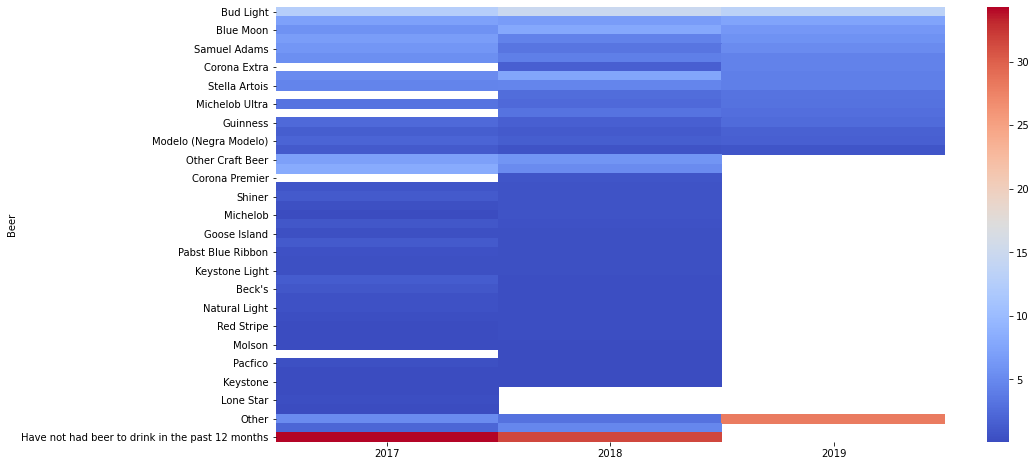

In [216]:
heat_map_generator(beer_f, 'Beer')

## Chips (Potato/Corn/Tortilla/Vegetable)

In [217]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Chips (Potato/Corn/Tortilla/Vegetable): % of Fans Have Eaten Most Often in Past 12 Months
chips = brand_share.iloc[505:534]
chips.reset_index()
chips

\
505                                   Lays (All Types) NaN  NaN   NaN    NaN   
506                                            Doritos NaN  NaN   NaN    NaN   
507                                           Tostitos NaN  NaN   NaN    NaN   
508                                       Kettle Brand NaN  NaN   NaN    NaN   
509                                            Ruffles NaN  NaN   NaN    NaN   
510                                             Fritos NaN  NaN   NaN    NaN   
511                                           Pringles NaN  NaN   NaN    NaN   
512                                           Cape Cod NaN  NaN   NaN    NaN   
513                                          Sun Chips NaN  NaN   NaN    NaN   
514                                            Mission NaN  NaN   NaN    NaN   
515                                      On the Border NaN  NaN   NaN    NaN   
516                                               Wise NaN  NaN   NaN    NaN   
517                                                Utz NaN  NaN   NaN    NaN   
518                                           Santitas NaN  NaN   NaN    NaN   
519                                               Herr NaN  NaN   NaN    NaN   
520                                     Takis (Barcel) NaN  NaN   NaN    NaN   
521                                           Popchips NaN  NaN   NaN    NaN   
522                                  Sensible Portions NaN  NaN   NaN    NaN   
523                                        Good Health NaN  NaN   NaN    NaN   
524                                              Terra NaN  NaN   NaN    NaN   
525                                               Jays NaN  NaN   NaN    NaN   
526                                             Bugles NaN  NaN   NaN    NaN   
527                                           Sabritas NaN  NaN   NaN    NaN   
528                                              Zapps NaN  NaN   NaN    NaN   
529                                          Krunchers NaN  NaN   NaN    NaN   
530                                              Other NaN  NaN   NaN    NaN   
531                                         Don't Know NaN  NaN   NaN    NaN   
532  Have not had Potato/Corn/Tortilla/Vegetable ch... NaN  NaN   NaN    NaN   
533  Total: Have had Potato/Corn/Tortilla/Vegetable... NaN  NaN   NaN    NaN   

                                                                  \
505     NaN     NaN      NaN        19.9        19.6        21.1   
506     NaN     NaN      NaN        19.2        21.9        19.3   
507     NaN     NaN      NaN        10.5         9.9        10.6   
508     NaN     NaN      NaN         5.1         5.1         4.8   
509     NaN     NaN      NaN         3.7         4.1         4.3   
510     NaN     NaN      NaN         5.4         5.0         4.1   
511     NaN     NaN      NaN         5.9         4.4         3.4   
512     NaN     NaN      NaN         3.3         3.7         3.1   
513     NaN     NaN      NaN         4.4         3.2         3.1   
514     NaN     NaN      NaN         2.1         2.7         2.2   
515     NaN     NaN      NaN         1.2         1.3         1.6   
516     NaN     NaN      NaN         0.7         0.7         1.5   
517     NaN     NaN      NaN         1.8         1.3         1.2   
518     NaN     NaN      NaN         1.9         1.5         0.9   
519     NaN     NaN      NaN         0.8         1.0         ---   
520     NaN     NaN      NaN         1.3         0.8         ---   
521     NaN     NaN      NaN         0.6         0.8         ---   
522     NaN     NaN      NaN         0.3         0.7         ---   
523     NaN     NaN      NaN         0.5         0.7         ---   
524     NaN     NaN      NaN         0.5         0.7         ---   
525     NaN     NaN      NaN         0.5         0.6         ---   
526     NaN     NaN      NaN         1.0         0.4         ---   
527     NaN     NaN      NaN         0.2         0.3         ---   
528     NaN     NaN      NaN         0.2     

In [218]:
#add column names
chips.columns = ["Chips", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
chips
#there are columns with nothing in them so I'm dropping them
chips = chips.drop(["2010", "2011", "2012","2013", "2014", "2015", "2016", "2020", "?"], axis =1)
chips

Chips        2017  \
505                                   Lays (All Types)        19.9   
506                                            Doritos        19.2   
507                                           Tostitos        10.5   
508                                       Kettle Brand         5.1   
509                                            Ruffles         3.7   
510                                             Fritos         5.4   
511                                           Pringles         5.9   
512                                           Cape Cod         3.3   
513                                          Sun Chips         4.4   
514                                            Mission         2.1   
515                                      On the Border         1.2   
516                                               Wise         0.7   
517                                                Utz         1.8   
518                                           Santitas         1.9   
519                                               Herr         0.8   
520                                     Takis (Barcel)         1.3   
521                                           Popchips         0.6   
522                                  Sensible Portions         0.3   
523                                        Good Health         0.5   
524                                              Terra         0.5   
525                                               Jays         0.5   
526                                             Bugles         1.0   
527                                           Sabritas         0.2   
528                                              Zapps         0.2   
529                                          Krunchers         0.3   
530                                              Other         4.9   
531                                         Don't Know         3.9   
532  Have not had Potato/Corn/Tortilla/Vegetable ch...         8.5   
533  Total: Have had Potato/Corn/Tortilla/Vegetable...  69,095,000   

           2018        2019  
505        19.6        21.1  
506        21.9        19.3  
507         9.9        10.6  
508         5.1         4.8  
509         4.1         4.3  
510         5.0         4.1  
511         4.4         3.4  
512         3.7         3.1  
513         3.2         3.1  
514         2.7         2.2  
515         1.3         1.6  
516         0.7         1.5  
517         1.3         1.2  
518         1.5         0.9  
519         1.0         ---  
520         0.8         ---  
521         0.8         ---  
522         0.7         ---  
523         0.7         ---  
524         0.7         ---  
525         0.6         ---  
526         0.4         ---  
527         0.3         ---  
528         0.2         ---  
529         0.1         ---  
530         4.4        18.8  
531         4.8         ---  
532        10.1         ---  
533  67,722,000  64,021,000

In [219]:
chips_f= chips.copy()

chips_f["2017"] = chips_f["2017"].replace("---", "").replace('', np.NaN)
chips_f["2018"] = chips_f["2018"].replace("---", "").replace('', np.NaN)
chips_f["2019"] = chips_f["2019"].replace("---", "").replace('', np.NaN)


chips_f["2017"] = chips_f["2017"].replace("--", "").replace('', np.NaN)
chips_f["2018"] = chips_f["2018"].replace("--", "").replace('', np.NaN)
chips_f["2019"] = chips_f["2019"].replace("--", "").replace('', np.NaN)

chips_f["2017"] = chips_f["2017"].replace(" ---", "").replace('', np.NaN)
chips_f["2018"] = chips_f["2018"].replace(" ---", "").replace('', np.NaN)
chips_f["2019"] = chips_f["2019"].replace(" ---", "").replace('', np.NaN)


chips_f["2017"] = chips_f["2017"].replace("--- ", "").replace('', np.NaN)
chips_f["2018"] = chips_f["2018"].replace("--- ", "").replace('', np.NaN)
chips_f["2019"] = chips_f["2019"].replace("--- ", "").replace('', np.NaN)


chips_f

Chips        2017  \
505                                   Lays (All Types)        19.9   
506                                            Doritos        19.2   
507                                           Tostitos        10.5   
508                                       Kettle Brand         5.1   
509                                            Ruffles         3.7   
510                                             Fritos         5.4   
511                                           Pringles         5.9   
512                                           Cape Cod         3.3   
513                                          Sun Chips         4.4   
514                                            Mission         2.1   
515                                      On the Border         1.2   
516                                               Wise         0.7   
517                                                Utz         1.8   
518                                           Santitas         1.9   
519                                               Herr         0.8   
520                                     Takis (Barcel)         1.3   
521                                           Popchips         0.6   
522                                  Sensible Portions         0.3   
523                                        Good Health         0.5   
524                                              Terra         0.5   
525                                               Jays         0.5   
526                                             Bugles         1.0   
527                                           Sabritas         0.2   
528                                              Zapps         0.2   
529                                          Krunchers         0.3   
530                                              Other         4.9   
531                                         Don't Know         3.9   
532  Have not had Potato/Corn/Tortilla/Vegetable ch...         8.5   
533  Total: Have had Potato/Corn/Tortilla/Vegetable...  69,095,000   

           2018        2019  
505        19.6        21.1  
506        21.9        19.3  
507         9.9        10.6  
508         5.1         4.8  
509         4.1         4.3  
510         5.0         4.1  
511         4.4         3.4  
512         3.7         3.1  
513         3.2         3.1  
514         2.7         2.2  
515         1.3         1.6  
516         0.7         1.5  
517         1.3         1.2  
518         1.5         0.9  
519         1.0         NaN  
520         0.8         NaN  
521         0.8         NaN  
522         0.7         NaN  
523         0.7         NaN  
524         0.7         NaN  
525         0.6         NaN  
526         0.4         NaN  
527         0.3         NaN  
528         0.2         NaN  
529         0.1         NaN  
530         4.4        18.8  
531         4.8         NaN  
532        10.1         NaN  
533  67,722,000  64,021,000

In [220]:
chips_f = chips_f.replace(',','',regex=True)

In [221]:
#checking data types and converting from object to int
#data.dtypes
chips_f["2017"] = chips_f["2017"].astype(float)
chips_f["2018"] = chips_f["2018"].astype(float)
chips_f["2019"] = chips_f["2019"].astype(float)
chips_f.dtypes

Chips     object
2017     float64
2018     float64
2019     float64
dtype: object

In [222]:
#shape(), info(), describe()
print(chips_f.shape)
print(chips_f.info())
print(chips_f.describe(include = object))
print(chips_f.describe())

(29, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 505 to 533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chips   29 non-null     object 
 1   2017    29 non-null     float64
 2   2018    29 non-null     float64
 3   2019    16 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB
None
             Chips
count           29
unique          29
top     Don't Know
freq             1
               2017          2018          2019
count  2.900000e+01  2.900000e+01  1.600000e+01
mean   2.382590e+06  2.335245e+06  4.001319e+06
std    1.283062e+07  1.257566e+07  1.600525e+07
min    2.000000e-01  1.000000e-01  9.000000e-01
25%    6.000000e-01  7.000000e-01  2.050000e+00
50%    1.900000e+00  1.500000e+00  3.750000e+00
75%    5.100000e+00  4.800000e+00  1.265000e+01
max    6.909500e+07  6.772200e+07  6.402100e+07


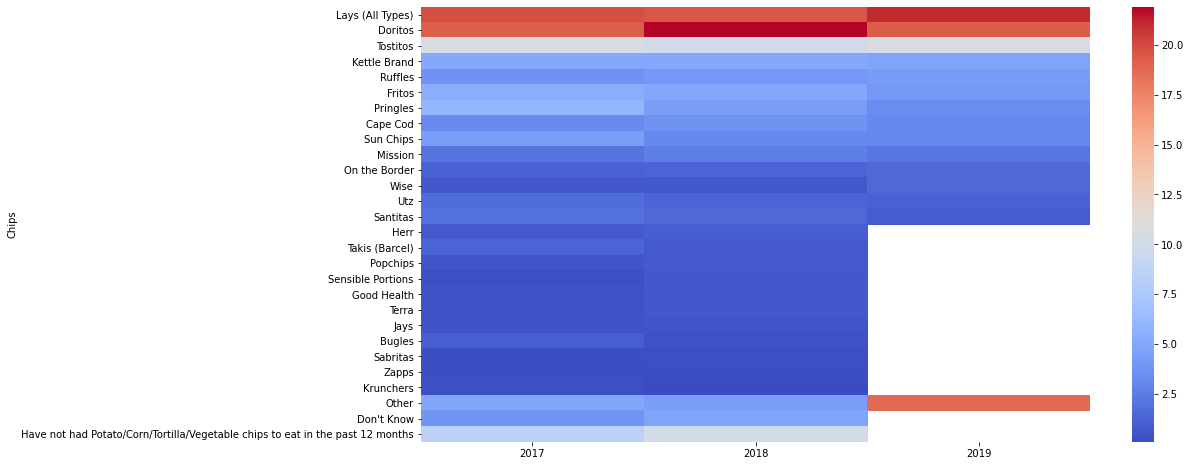

In [223]:
heat_map_generator(chips_f, 'Chips')

## Hotels/Motels: Commercial Travel

In [224]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Hotels/Motels: Commercial Travel: % of Fans Stayed Most Often in Past 12 Months

hotel_motel = brand_share.iloc[539:565]
hotel_motel.reset_index()
hotel_motel

\
539                                            Hilton  NaN  NaN   NaN    NaN   
540                                          Marriott  NaN  NaN   NaN    NaN   
541                    Holiday Inn Holiday Inn Express NaN  NaN   NaN    NaN   
542                   Hampton Inn, Hampton Inn Suites  NaN  NaN   NaN    NaN   
543                                 Hyatt Hotel (any)  NaN  NaN   NaN    NaN   
544                                        Comfort Inn NaN  NaN   NaN    NaN   
545                                 Best Western (any) NaN  NaN   NaN    NaN   
546                             Courtyard by Marriott  NaN  NaN   NaN    NaN   
547                                         La Quinta  NaN  NaN   NaN    NaN   
548                                            Westin  NaN  NaN   NaN    NaN   
549                                    Embassy Suites  NaN  NaN   NaN    NaN   
550                                Country Inn Suites  NaN  NaN   NaN    NaN   
551                                   Homewood Suites  NaN  NaN   NaN    NaN   
552                          Residence Inn by Marriott NaN  NaN   NaN    NaN   
553                                          Sheraton  NaN  NaN   NaN    NaN   
554                                         DoubleTree NaN  NaN   NaN    NaN   
555                               Quality, Quality Inn NaN  NaN   NaN    NaN   
556                                          Days Inn  NaN  NaN   NaN    NaN   
557                              Fairfield Inn Suites  NaN  NaN   NaN    NaN   
558                                            Super 8 NaN  NaN   NaN    NaN   
559                                 Hilton Garden Inn  NaN  NaN   NaN    NaN   
560                                    Comfort Suites  NaN  NaN   NaN    NaN   
561                                Wyndham Hotel (any) NaN  NaN   NaN    NaN   
562                                              Other NaN  NaN   NaN    NaN   
563                                         Don't Know NaN  NaN   NaN    NaN   
564  Base: Number having stayed at hotel for commer... NaN  NaN   NaN    NaN   

                                                                              \
539     NaN     NaN      NaN       NaN        12.2        16.3           NaN   
540     NaN     NaN      NaN       NaN        14.9        14.4           NaN   
541     NaN     NaN      NaN       NaN         7.4         7.8           NaN   
542     NaN     NaN      NaN       NaN         8.4         5.7           NaN   
543     NaN     NaN      NaN       NaN         2.9         3.9           NaN   
544     NaN     NaN      NaN       NaN         3.5         3.6           NaN   
545     NaN     NaN      NaN       NaN         4.9         3.4           NaN   
546     NaN     NaN      NaN       NaN         3.3         2.9           NaN   
547     NaN     NaN      NaN       NaN         2.1         2.7           NaN   
548     NaN     NaN      NaN       NaN         1.4         2.3           NaN   
549     NaN     NaN      NaN       NaN         3.1         2.1           NaN   
550     NaN     NaN      NaN       NaN         1.7         1.7           NaN   
551     NaN     NaN      NaN       NaN         1.3         1.5           NaN   
552     NaN     NaN      NaN       NaN         ---         1.5           NaN   
553     NaN     NaN      NaN       NaN         1.2         1.3           NaN   
554     NaN     NaN      NaN       NaN         ---         1.2           NaN   
555     NaN     NaN      NaN       NaN         ---         1.2           NaN   
556     NaN     NaN      NaN       NaN         1.9         0.9           NaN   
557     NaN     NaN      NaN       NaN         1.2         0.7           NaN   
558     NaN     NaN      NaN       NaN         1.3         0.3           NaN   
559     NaN     NaN      NaN       NaN         4.9         ---           NaN   
560     NaN     NaN      NaN       NaN         1.9         ---           NaN   
561     NaN     NaN      NaN       NaN         1.7         ---           NaN 

In [225]:
#add column names
hotel_motel.columns = ["Hotel/Motel (Commercial Travel)", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
hotel_motel
#there are columns with nothing in them so I'm dropping them
hotel_motel = hotel_motel.drop(["2010", "2011", "2012","2013", "2014", "2015", "2016", "2017", "2020", "?"], axis =1)
hotel_motel 

Hotel/Motel (Commercial Travel)        2018        2019
539                                            Hilton         12.2        16.3
540                                          Marriott         14.9        14.4
541                    Holiday Inn Holiday Inn Express         7.4         7.8
542                   Hampton Inn, Hampton Inn Suites          8.4         5.7
543                                 Hyatt Hotel (any)          2.9         3.9
544                                        Comfort Inn         3.5         3.6
545                                 Best Western (any)         4.9         3.4
546                             Courtyard by Marriott          3.3         2.9
547                                         La Quinta          2.1         2.7
548                                            Westin          1.4         2.3
549                                    Embassy Suites          3.1         2.1
550                                Country Inn Suites          1.7         1.7
551                                   Homewood Suites          1.3         1.5
552                          Residence Inn by Marriott         ---         1.5
553                                          Sheraton          1.2         1.3
554                                         DoubleTree         ---         1.2
555                               Quality, Quality Inn         ---         1.2
556                                          Days Inn          1.9         0.9
557                              Fairfield Inn Suites          1.2         0.7
558                                            Super 8         1.3         0.3
559                                 Hilton Garden Inn          4.9         ---
560                                    Comfort Suites          1.9         ---
561                                Wyndham Hotel (any)         1.7         ---
562                                              Other        14.9        24.6
563                                         Don't Know         3.9         ---
564  Base: Number having stayed at hotel for commer...  42,511,000  41,306,000

In [226]:
hotel_motel_f= hotel_motel.copy()

hotel_motel_f["2018"] = hotel_motel_f["2018"].replace("---", "").replace('', np.NaN)
hotel_motel_f["2019"] = hotel_motel_f["2019"].replace("---", "").replace('', np.NaN)


hotel_motel_f["2018"] = hotel_motel_f["2018"].replace("--", "").replace('', np.NaN)
hotel_motel_f["2019"] = hotel_motel_f["2019"].replace("--", "").replace('', np.NaN)


hotel_motel_f["2018"] = hotel_motel_f["2018"].replace(" ---", "").replace('', np.NaN)
hotel_motel_f["2019"] = hotel_motel_f["2019"].replace(" ---", "").replace('', np.NaN)


hotel_motel_f["2018"] = hotel_motel_f["2018"].replace("--- ", "").replace('', np.NaN)
hotel_motel_f["2019"] = hotel_motel_f["2019"].replace("--- ", "").replace('', np.NaN)

hotel_motel_f["2018"] = hotel_motel_f["2018"].replace("..." "").replace('', np.NaN)
hotel_motel_f["2019"] = hotel_motel_f["2019"].replace("...", "").replace('', np.NaN)

hotel_motel_f

Hotel/Motel (Commercial Travel)        2018        2019
539                                            Hilton         12.2        16.3
540                                          Marriott         14.9        14.4
541                    Holiday Inn Holiday Inn Express         7.4         7.8
542                   Hampton Inn, Hampton Inn Suites          8.4         5.7
543                                 Hyatt Hotel (any)          2.9         3.9
544                                        Comfort Inn         3.5         3.6
545                                 Best Western (any)         4.9         3.4
546                             Courtyard by Marriott          3.3         2.9
547                                         La Quinta          2.1         2.7
548                                            Westin          1.4         2.3
549                                    Embassy Suites          3.1         2.1
550                                Country Inn Suites          1.7         1.7
551                                   Homewood Suites          1.3         1.5
552                          Residence Inn by Marriott         NaN         1.5
553                                          Sheraton          1.2         1.3
554                                         DoubleTree         NaN         1.2
555                               Quality, Quality Inn         NaN         1.2
556                                          Days Inn          1.9         0.9
557                              Fairfield Inn Suites          1.2         0.7
558                                            Super 8         1.3         0.3
559                                 Hilton Garden Inn          4.9         NaN
560                                    Comfort Suites          1.9         NaN
561                                Wyndham Hotel (any)         1.7         NaN
562                                              Other        14.9        24.6
563                                         Don't Know         3.9         NaN
564  Base: Number having stayed at hotel for commer...  42,511,000  41,306,000

In [227]:
hotel_motel_f = hotel_motel_f.replace(',','',regex=True)

In [228]:
#checking data types and converting from object to int
#data.dtypes
hotel_motel_f["2018"] = hotel_motel_f["2018"].astype(float)
hotel_motel_f["2019"] = hotel_motel_f["2019"].astype(float)
hotel_motel_f.dtypes

Hotel/Motel (Commercial Travel)     object
2018                               float64
2019                               float64
dtype: object

In [229]:
#shape(), info(), describe()
print(hotel_motel_f.shape)
print(hotel_motel_f.info())
print(hotel_motel_f.describe(include = object))
print(hotel_motel_f.describe())

(26, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 539 to 564
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hotel/Motel (Commercial Travel)  26 non-null     object 
 1   2018                             23 non-null     float64
 2   2019                             22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 756.0+ bytes
None
       Hotel/Motel (Commercial Travel)
count                               26
unique                              26
top                            Hilton 
freq                                 1
               2018          2019
count  2.300000e+01  2.200000e+01
mean   1.848309e+06  1.877550e+06
std    8.864155e+06  8.806468e+06
min    1.200000e+00  3.000000e-01
25%    1.700000e+00  1.350000e+00
50%    3.100000e+00  2.500000e+00
75%    6.150000e+00  5.250000e+00
max    4.251100e+07  4.130600e+07


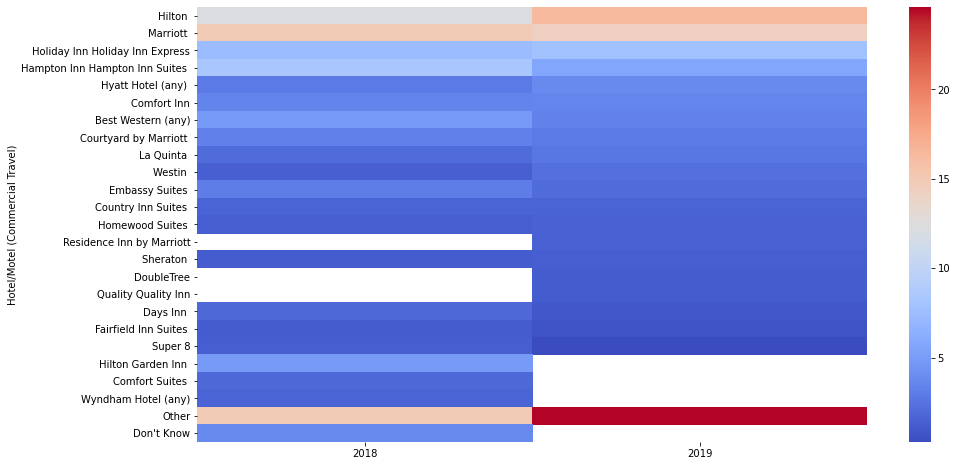

In [230]:
heat_map_generator(hotel_motel_f, 'Hotel/Motel (Commercial Travel)')

## Hotels/Motels: Leisure Travel

In [231]:
#select the rows in each table that we're interested in. I'm pulling Brand Share-of-Market - Hotels/Motels: Leisure Travel: % of Fans Stayed Most Often in Past 12 Months
hotel_motel_l = brand_share.iloc[570:598]
hotel_motel_l.reset_index()
hotel_motel_l

\
570                                          Marriott  NaN  NaN   NaN    NaN   
571                                            Hilton  NaN  NaN   NaN    NaN   
572                    Holiday Inn Holiday Inn Express NaN  NaN   NaN    NaN   
573                   Hampton Inn, Hampton Inn Suites  NaN  NaN   NaN    NaN   
574                                        Comfort Inn NaN  NaN   NaN    NaN   
575                                Wyndham Hotel (any) NaN  NaN   NaN    NaN   
576                                 Best Western (any) NaN  NaN   NaN    NaN   
577                                 Hyatt Hotel (any)  NaN  NaN   NaN    NaN   
578                                         La Quinta  NaN  NaN   NaN    NaN   
579                                    Comfort Suites  NaN  NaN   NaN    NaN   
580                                 Hilton Garden Inn  NaN  NaN   NaN    NaN   
581                             Courtyard by Marriott  NaN  NaN   NaN    NaN   
582                                    Embassy Suites  NaN  NaN   NaN    NaN   
583                                         DoubleTree NaN  NaN   NaN    NaN   
584                               Quality, Quality Inn NaN  NaN   NaN    NaN   
585                                             Westin NaN  NaN   NaN    NaN   
586                                   Homewood Suites  NaN  NaN   NaN    NaN   
587                               Country Inn & Suites NaN  NaN   NaN    NaN   
588                         Residence Inn by Marriott  NaN  NaN   NaN    NaN   
589                                          Days Inn  NaN  NaN   NaN    NaN   
590                              Fairfield Inn Suites  NaN  NaN   NaN    NaN   
591                                            Motel 6 NaN  NaN   NaN    NaN   
592                                            Super 8 NaN  NaN   NaN    NaN   
593                                          Sheraton  NaN  NaN   NaN    NaN   
594                                              Other NaN  NaN   NaN    NaN   
595                                         Don't Know NaN  NaN   NaN    NaN   
596                                              Total NaN  NaN   NaN    NaN   
597  Base (No. Using a Hotel/Motel for Leisure Trav... NaN  NaN   NaN    NaN   

                                                                              \
570     NaN     NaN      NaN       NaN        12.9        12.5           NaN   
571     NaN     NaN      NaN       NaN        11.3        12.1           NaN   
572     NaN     NaN      NaN       NaN         8.3         8.8           NaN   
573     NaN     NaN      NaN       NaN         7.5         6.6           NaN   
574     NaN     NaN      NaN       NaN         4.6         4.4           NaN   
575     NaN     NaN      NaN       NaN         2.1         3.9           NaN   
576     NaN     NaN      NaN       NaN         4.4         3.1           NaN   
577     NaN     NaN      NaN       NaN         2.9         3.1           NaN   
578     NaN     NaN      NaN       NaN         2.8         3.1           NaN   
579     NaN     NaN      NaN       NaN         2.4         3.0           NaN   
580     NaN     NaN      NaN       NaN         4.6         2.9           NaN   
581     NaN     NaN      NaN       NaN         2.8         2.2           NaN   
582     NaN     NaN      NaN       NaN         3.2         2.1           NaN   
583     NaN     NaN      NaN       NaN         1.3         2.0           NaN   
584     NaN     NaN      NaN       NaN         ---         2.0           NaN   
585     NaN     NaN      NaN       NaN         ---         1.6           NaN   
586     NaN     NaN      NaN       NaN         1.3         1.4           NaN   
587     NaN     NaN      NaN       NaN         ---         1.3           NaN   
588     NaN     NaN      NaN       NaN         1.5         1.2           NaN   
589     NaN     NaN      NaN       NaN         2.3         1.1           NaN   
590     NaN     NaN      NaN       NaN         1.9         1.1           NaN 

In [232]:
#add column names
hotel_motel_l.columns = ["Hotel/Motel (Leisure) ", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
hotel_motel_l
#there are columns with nothing in them so I'm dropping them
hotel_motel_l = hotel_motel_l.drop(["2010", "2011", "2012","2013", "2014", "2015", "2016", "2017", "2020", "?"], axis =1)
hotel_motel_l

Hotel/Motel (Leisure)         2018        2019
570                                          Marriott         12.9        12.5
571                                            Hilton         11.3        12.1
572                    Holiday Inn Holiday Inn Express         8.3         8.8
573                   Hampton Inn, Hampton Inn Suites          7.5         6.6
574                                        Comfort Inn         4.6         4.4
575                                Wyndham Hotel (any)         2.1         3.9
576                                 Best Western (any)         4.4         3.1
577                                 Hyatt Hotel (any)          2.9         3.1
578                                         La Quinta          2.8         3.1
579                                    Comfort Suites          2.4         3.0
580                                 Hilton Garden Inn          4.6         2.9
581                             Courtyard by Marriott          2.8         2.2
582                                    Embassy Suites          3.2         2.1
583                                         DoubleTree         1.3         2.0
584                               Quality, Quality Inn         ---         2.0
585                                             Westin         ---         1.6
586                                   Homewood Suites          1.3         1.4
587                               Country Inn & Suites         ---         1.3
588                         Residence Inn by Marriott          1.5         1.2
589                                          Days Inn          2.3         1.1
590                              Fairfield Inn Suites          1.9         1.1
591                                            Motel 6         ---         1.1
592                                            Super 8         1.1         1.1
593                                          Sheraton          1.2         ---
594                                              Other        15.1        18.3
595                                         Don't Know         4.4         ---
596                                              Total       100.0       100.0
597  Base (No. Using a Hotel/Motel for Leisure Trav...  54,130,000  52,768,000

In [233]:
hotel_motel_l_f= hotel_motel_l.copy()

hotel_motel_l_f["2018"] = hotel_motel_l_f["2018"].replace("---", "").replace('', np.NaN)
hotel_motel_l_f["2019"] = hotel_motel_l_f["2019"].replace("---", "").replace('', np.NaN)


hotel_motel_l_f["2018"] = hotel_motel_l_f["2018"].replace("--", "").replace('', np.NaN)
hotel_motel_l_f["2019"] = hotel_motel_l_f["2019"].replace("--", "").replace('', np.NaN)

hotel_motel_l_f["2018"] = hotel_motel_l_f["2018"].replace(" ---", "").replace('', np.NaN)
hotel_motel_l_f["2019"] = hotel_motel_l_f["2019"].replace(" ---", "").replace('', np.NaN)


hotel_motel_l_f ["2018"] = hotel_motel_l_f["2018"].replace("..." "").replace('', np.NaN)
hotel_motel_l_f["2019"] = hotel_motel_l_f["2019"].replace("...", "").replace('', np.NaN)

hotel_motel_l_f

Hotel/Motel (Leisure)         2018        2019
570                                          Marriott         12.9        12.5
571                                            Hilton         11.3        12.1
572                    Holiday Inn Holiday Inn Express         8.3         8.8
573                   Hampton Inn, Hampton Inn Suites          7.5         6.6
574                                        Comfort Inn         4.6         4.4
575                                Wyndham Hotel (any)         2.1         3.9
576                                 Best Western (any)         4.4         3.1
577                                 Hyatt Hotel (any)          2.9         3.1
578                                         La Quinta          2.8         3.1
579                                    Comfort Suites          2.4         3.0
580                                 Hilton Garden Inn          4.6         2.9
581                             Courtyard by Marriott          2.8         2.2
582                                    Embassy Suites          3.2         2.1
583                                         DoubleTree         1.3         2.0
584                               Quality, Quality Inn         NaN         2.0
585                                             Westin         NaN         1.6
586                                   Homewood Suites          1.3         1.4
587                               Country Inn & Suites         NaN         1.3
588                         Residence Inn by Marriott          1.5         1.2
589                                          Days Inn          2.3         1.1
590                              Fairfield Inn Suites          1.9         1.1
591                                            Motel 6         NaN         1.1
592                                            Super 8         1.1         1.1
593                                          Sheraton          1.2         NaN
594                                              Other        15.1        18.3
595                                         Don't Know         4.4         NaN
596                                              Total       100.0       100.0
597  Base (No. Using a Hotel/Motel for Leisure Trav...  54,130,000  52,768,000

In [234]:
hotel_motel_l_f = hotel_motel_l_f.replace(',','',regex =True)

In [235]:
#checking data types and converting from object to int
#data.dtypes
hotel_motel_l_f["2018"] = hotel_motel_l_f["2018"].astype(float)
hotel_motel_l_f["2019"] = hotel_motel_l_f["2019"].astype(float)
hotel_motel_l_f.dtypes

Hotel/Motel (Leisure)      object
2018                      float64
2019                      float64
dtype: object

In [236]:
#shape(), info(), describe()
print(hotel_motel_l_f.shape)
print(hotel_motel_l_f.info())
print(hotel_motel_l_f.describe(include = object))
print(hotel_motel_l_f.describe())

(28, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 570 to 597
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hotel/Motel (Leisure)   28 non-null     object 
 1   2018                    24 non-null     float64
 2   2019                    26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 804.0+ bytes
None
       Hotel/Motel (Leisure) 
count                      28
unique                     28
top                   Hilton 
freq                        1
               2018          2019
count  2.400000e+01  2.600000e+01
mean   2.255425e+06  2.029546e+06
std    1.104924e+07  1.034865e+07
min    1.100000e+00  1.100000e+00
25%    2.050000e+00  1.450000e+00
50%    3.050000e+00  2.950000e+00
75%    7.700000e+00  6.050000e+00
max    5.413000e+07  5.276800e+07


In [237]:
hotel_motel_l_f = hotel_motel_l_f.iloc[0:27,:]
hotel_motel_l_f.tail()

Hotel/Motel (Leisure)    2018   2019
592                Super 8    1.1    1.1
593              Sheraton     1.2    NaN
594                  Other   15.1   18.3
595             Don't Know    4.4    NaN
596                  Total  100.0  100.0

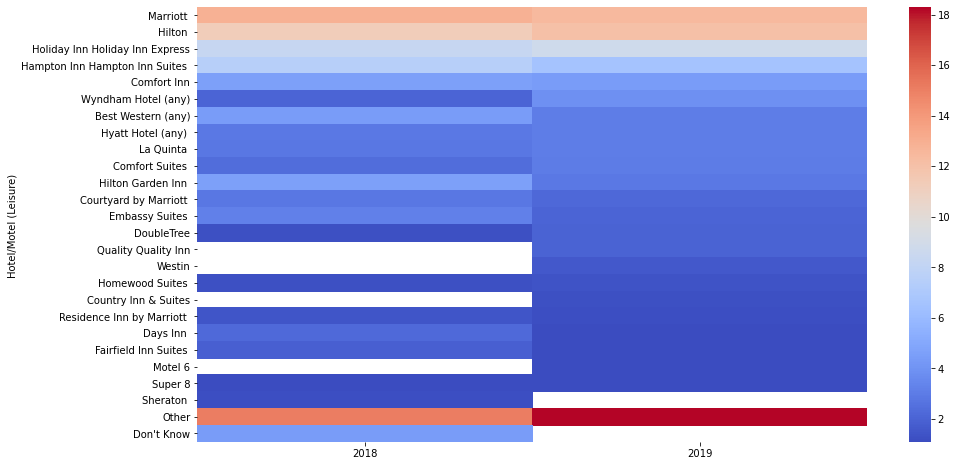

In [238]:
heat_map_generator(hotel_motel_l_f, 'Hotel/Motel (Leisure) ')

## Energy/Nutrition/Performance or Protein Bars

In [239]:
#select the rows in each table that we're interested in. Brand Share-of-Market - Energy/Nutrition/Performance or Protein Bars: % of Fans Have Eaten Most Often in Past 12 Months
protein_bar = brand_share.iloc[603:613]
protein_bar.reset_index()
protein_bar

\
603                                           CLIF Bar NaN  NaN   NaN    NaN   
604                                      Nature Valley NaN  NaN   NaN    NaN   
605                                               KIND NaN  NaN   NaN    NaN   
606                              Kellogg's (Special K) NaN  NaN   NaN    NaN   
607                                             Atkins NaN  NaN   NaN    NaN   
608                                            Larabar NaN  NaN   NaN    NaN   
609                                              Quest NaN  NaN   NaN    NaN   
610                                          All Other NaN  NaN   NaN    NaN   
611                                              Total NaN  NaN   NaN    NaN   
612  Base: Number Having had Energy/Nutrition/Perfo... NaN  NaN   NaN    NaN   

                                                                             \
603     NaN     NaN      NaN       NaN        NaN        16.9           NaN   
604     NaN     NaN      NaN       NaN        NaN        11.2           NaN   
605     NaN     NaN      NaN       NaN        NaN        10.0           NaN   
606     NaN     NaN      NaN       NaN        NaN         5.6           NaN   
607     NaN     NaN      NaN       NaN        NaN         4.7           NaN   
608     NaN     NaN      NaN       NaN        NaN         3.4           NaN   
609     NaN     NaN      NaN       NaN        NaN         3.0           NaN   
610     NaN     NaN      NaN       NaN        NaN        42.7           NaN   
611     NaN     NaN      NaN       NaN        NaN       100.0           NaN   
612     NaN     NaN      NaN       NaN        NaN  22,460,000           NaN   

     Unnamed: 12  
603          NaN  
604          NaN  
605          NaN  
606          NaN  
607          NaN  
608          NaN  
609          NaN  
610          NaN  
611          NaN  
612          NaN

In [240]:
#add column names
protein_bar.columns = ["Protein Bars ", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
protein_bar
#there are columns with nothing in them so I'm dropping them
protein_bar = protein_bar.drop(["2010", "2011", "2012","2013", "2014", "2015", "2016", "2017","2018","2020", "?"], axis =1)
protein_bar

Protein Bars         2019
603                                           CLIF Bar        16.9
604                                      Nature Valley        11.2
605                                               KIND        10.0
606                              Kellogg's (Special K)         5.6
607                                             Atkins         4.7
608                                            Larabar         3.4
609                                              Quest         3.0
610                                          All Other        42.7
611                                              Total       100.0
612  Base: Number Having had Energy/Nutrition/Perfo...  22,460,000

In [241]:
protein_bar_f= protein_bar.copy()

protein_bar_f["2019"] = protein_bar_f["2019"].replace("---", "").replace('', np.NaN)

protein_bar_f["2019"] = protein_bar_f["2019"].replace("--", "").replace('', np.NaN)

protein_bar_f["2019"] = protein_bar_f["2019"].replace(" ---", "").replace('', np.NaN)

protein_bar_f["2019"] = protein_bar_f["2019"].replace("--- ", "").replace('', np.NaN)

protein_bar_f["2019"] = protein_bar_f["2019"].replace("...", "").replace('', np.NaN)

protein_bar_f

Protein Bars         2019
603                                           CLIF Bar        16.9
604                                      Nature Valley        11.2
605                                               KIND        10.0
606                              Kellogg's (Special K)         5.6
607                                             Atkins         4.7
608                                            Larabar         3.4
609                                              Quest         3.0
610                                          All Other        42.7
611                                              Total       100.0
612  Base: Number Having had Energy/Nutrition/Perfo...  22,460,000

In [242]:
protein_bar_f = protein_bar_f.replace(',','',regex =True)

In [243]:
#checking data types and converting from object to int
#data.dtypes
protein_bar_f["2019"] = protein_bar_f["2019"].astype(float)
protein_bar_f.dtypes

Protein Bars      object
2019             float64
dtype: object

In [244]:
#shape(), info(), describe()
print(protein_bar_f.shape)
print(protein_bar_f.info())
print(protein_bar_f.describe(include = object))
print(protein_bar_f.describe())

(10, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 603 to 612
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Protein Bars   10 non-null     object 
 1   2019           10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes
None
       Protein Bars 
count             10
unique            10
top           Atkins
freq               1
               2019
count  1.000000e+01
mean   2.246020e+06
std    7.102469e+06
min    3.000000e+00
25%    4.925000e+00
50%    1.060000e+01
75%    3.625000e+01
max    2.246000e+07


In [245]:
protein_bar_f.shape

(10, 2)

In [246]:
protein_bar_f.iloc[0:9,:]

Protein Bars    2019
603               CLIF Bar   16.9
604          Nature Valley   11.2
605                   KIND   10.0
606  Kellogg's (Special K)    5.6
607                 Atkins    4.7
608                Larabar    3.4
609                  Quest    3.0
610              All Other   42.7
611                  Total  100.0

In [247]:
protein_bar_f = protein_bar_f.iloc[0:9,:]
protein_bar_f.tail()

Protein Bars    2019
607        Atkins    4.7
608       Larabar    3.4
609         Quest    3.0
610     All Other   42.7
611         Total  100.0

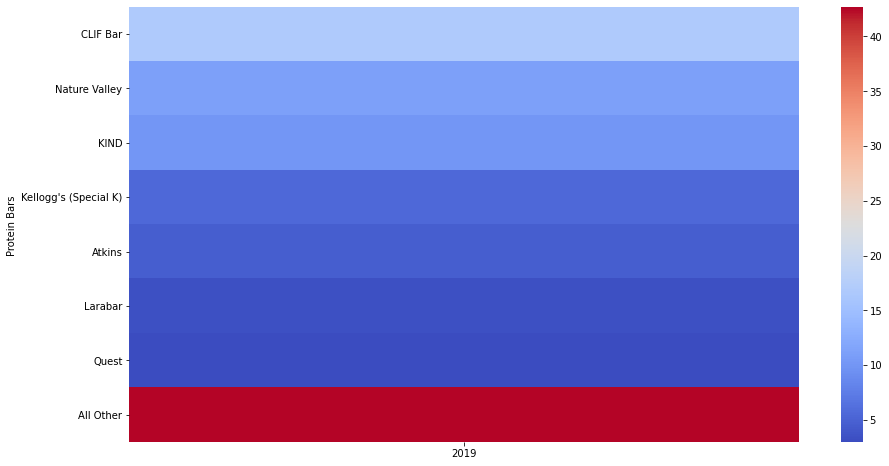

In [248]:
heat_map_generator(protein_bar_f, 'Protein Bars ')

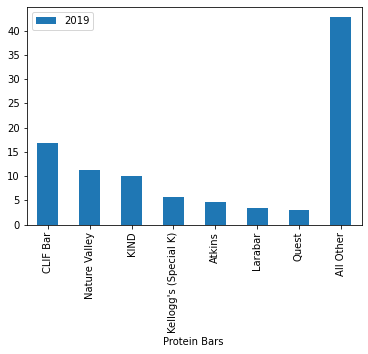

In [249]:
protein_bar_f.set_index('Protein Bars ').iloc[0:8,:].plot(kind='bar')
plt.show()

# 2018-2019 Player Advanced (Basketball Reference)

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
#player_advanced = pd.read_excel('filename.xlsx')


player_advanced = pd.read_csv('data/2018_2019 Player Advanced.csv')

In [252]:
player_advanced

Rk                  Player Pos  Age   Tm   G    MP   PER    TS%   3PAr  \
0      1  Álex Abrines\abrinal01  SG   25  OKC  31   588   6.3  0.507  0.809   
1      2      Quincy Acy\acyqu01  PF   28  PHO  10   123   2.9  0.379  0.833   
2      3  Jaylen Adams\adamsja01  PG   22  ATL  34   428   7.6  0.474  0.673   
3      4  Steven Adams\adamsst01   C   25  OKC  80  2669  18.5  0.591  0.002   
4      5   Bam Adebayo\adebaba01   C   21  MIA  82  1913  17.9  0.623  0.031   
..   ...                     ...  ..  ...  ...  ..   ...   ...    ...    ...   
703  528  Tyler Zeller\zellety01   C   29  MEM   4    82  19.4  0.640  0.000   
704  529    Ante Žižić\zizican01   C   22  CLE  59  1082  16.2  0.590  0.000   
705  530   Ivica Zubac\zubaciv01   C   21  TOT  59  1040  18.9  0.604  0.000   
706  530   Ivica Zubac\zubaciv01   C   21  LAL  33   516  19.5  0.633  0.000   
707  530   Ivica Zubac\zubaciv01   C   21  LAC  26   524  18.3  0.574  0.000   

     ...  Unnamed: 19  OWS  DWS   WS  WS/48  Unnamed: 24  OBPM  DBPM  BPM  \
0    ...          NaN  0.1  0.6  0.6  0.053          NaN  -3.7   0.4 -3.3   
1    ...          NaN -0.1  0.0 -0.1 -0.022          NaN  -7.6  -0.5 -8.1   
2    ...          NaN -0.1  0.2  0.1  0.011          NaN  -3.8  -0.5 -4.3   
3    ...          NaN  5.1  4.0  9.1  0.163          NaN   0.7   0.4  1.1   
4    ...          NaN  3.4  3.4  6.8  0.171          NaN  -0.4   2.2  1.8   
..   ...          ...  ...  ...  ...    ...          ...   ...   ...  ...   
703  ...          NaN  0.2  0.1  0.3  0.191          NaN  -2.3  -1.9 -4.3   
704  ...          NaN  1.7  0.3  2.0  0.087          NaN  -1.1  -2.1 -3.2   
705  ...          NaN  1.9  1.3  3.2  0.148          NaN  -0.2  -0.2 -0.5   
706  ...          NaN  1.1  0.6  1.8  0.165          NaN  -0.3   0.1 -0.2   
707  ...          NaN  0.7  0.7  1.4  0.132          NaN  -0.2  -0.5 -0.7   

     VORP  
0    -0.2  
1    -0.2  
2    -0.2  
3     2.1  
4     1.8  
..    ...  
703   0.0  
704  -0.3  
705   0.4  
706   0.2  
707   0.2  

[708 rows x 29 columns]

In [253]:
#there are columns with nothing in them so I'm dropping them
player = player_advanced.drop(["Unnamed: 19", "Unnamed: 24"], axis =1)
player.head()

Rk                  Player Pos  Age   Tm   G    MP   PER    TS%   3PAr  \
0   1  Álex Abrines\abrinal01  SG   25  OKC  31   588   6.3  0.507  0.809   
1   2      Quincy Acy\acyqu01  PF   28  PHO  10   123   2.9  0.379  0.833   
2   3  Jaylen Adams\adamsja01  PG   22  ATL  34   428   7.6  0.474  0.673   
3   4  Steven Adams\adamsst01   C   25  OKC  80  2669  18.5  0.591  0.002   
4   5   Bam Adebayo\adebaba01   C   21  MIA  82  1913  17.9  0.623  0.031   

   ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  ...   7.9  12.2  0.1  0.6  0.6  0.053  -3.7   0.4 -3.3  -0.2  
1  ...  15.2   9.2 -0.1  0.0 -0.1 -0.022  -7.6  -0.5 -8.1  -0.2  
2  ...  19.7  13.5 -0.1  0.2  0.1  0.011  -3.8  -0.5 -4.3  -0.2  
3  ...  12.6  16.4  5.1  4.0  9.1  0.163   0.7   0.4  1.1   2.1  
4  ...  17.1  15.8  3.4  3.4  6.8  0.171  -0.4   2.2  1.8   1.8  

[5 rows x 27 columns]

In [254]:
player.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [255]:
#shape(), info(), describe()
print(player.shape)
print(player.info())
print(player.describe(include = object))

(708, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      708 non-null    int64  
 1   Player  708 non-null    object 
 2   Pos     708 non-null    object 
 3   Age     708 non-null    int64  
 4   Tm      708 non-null    object 
 5   G       708 non-null    int64  
 6   MP      708 non-null    int64  
 7   PER     708 non-null    float64
 8   TS%     702 non-null    float64
 9   3PAr    702 non-null    float64
 10  FTr     702 non-null    float64
 11  ORB%    708 non-null    float64
 12  DRB%    708 non-null    float64
 13  TRB%    708 non-null    float64
 14  AST%    708 non-null    float64
 15  STL%    708 non-null    float64
 16  BLK%    708 non-null    float64
 17  TOV%    702 non-null    float64
 18  USG%    708 non-null    float64
 19  OWS     708 non-null    float64
 20  DWS     708 non-null    float64
 21  WS      708 non-null    float

In [256]:
player_f = player.set_index('Player')
player_f.head()

Rk Pos  Age   Tm   G    MP   PER    TS%   3PAr    FTr  \
Player                                                                          
Álex Abrines\abrinal01   1  SG   25  OKC  31   588   6.3  0.507  0.809  0.083   
Quincy Acy\acyqu01       2  PF   28  PHO  10   123   2.9  0.379  0.833  0.556   
Jaylen Adams\adamsja01   3  PG   22  ATL  34   428   7.6  0.474  0.673  0.082   
Steven Adams\adamsst01   4   C   25  OKC  80  2669  18.5  0.591  0.002  0.361   
Bam Adebayo\adebaba01    5   C   21  MIA  82  1913  17.9  0.623  0.031  0.465   

                        ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  \
Player                  ...                                                 
Álex Abrines\abrinal01  ...   7.9  12.2  0.1  0.6  0.6  0.053  -3.7   0.4   
Quincy Acy\acyqu01      ...  15.2   9.2 -0.1  0.0 -0.1 -0.022  -7.6  -0.5   
Jaylen Adams\adamsja01  ...  19.7  13.5 -0.1  0.2  0.1  0.011  -3.8  -0.5   
Steven Adams\adamsst01  ...  12.6  16.4  5.1  4.0  9.1  0.163   0.7   0.4   
Bam Adebayo\adebaba01   ...  17.1  15.8  3.4  3.4  6.8  0.171  -0.4   2.2   

                        BPM  VORP  
Player                             
Álex Abrines\abrinal01 -3.3  -0.2  
Quincy Acy\acyqu01     -8.1  -0.2  
Jaylen Adams\adamsja01 -4.3  -0.2  
Steven Adams\adamsst01  1.1   2.1  
Bam Adebayo\adebaba01   1.8   1.8  

[5 rows x 26 columns]

In [257]:
player_f.shape

(708, 26)

In [258]:
#plot only the numerical columns that are percentages so they're the same magnitude
player_f_num = player_f.drop(['Rk','Pos','Tm','Age','G','MP'],axis=1)
player_f_num.head()

PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
Player                                                                      
Álex Abrines\abrinal01   6.3  0.507  0.809  0.083   0.9   7.8   4.2   4.3   
Quincy Acy\acyqu01       2.9  0.379  0.833  0.556   2.7  20.1  11.3   8.2   
Jaylen Adams\adamsja01   7.6  0.474  0.673  0.082   2.6  12.3   7.4  19.8   
Steven Adams\adamsst01  18.5  0.591  0.002  0.361  14.7  14.8  14.7   6.6   
Bam Adebayo\adebaba01   17.9  0.623  0.031  0.465   9.2  24.0  16.6  14.2   

                        STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  \
Player                                                                       
Álex Abrines\abrinal01   1.3   0.9   7.9  12.2  0.1  0.6  0.6  0.053  -3.7   
Quincy Acy\acyqu01       0.4   2.7  15.2   9.2 -0.1  0.0 -0.1 -0.022  -7.6   
Jaylen Adams\adamsja01   1.5   1.0  19.7  13.5 -0.1  0.2  0.1  0.011  -3.8   
Steven Adams\adamsst01   2.0   2.4  12.6  16.4  5.1  4.0  9.1  0.163   0.7   
Bam Adebayo\adebaba01    1.8   3.0  17.1  15.8  3.4  3.4  6.8  0.171  -0.4   

                        DBPM  BPM  VORP  
Player                                   
Álex Abrines\abrinal01   0.4 -3.3  -0.2  
Quincy Acy\acyqu01      -0.5 -8.1  -0.2  
Jaylen Adams\adamsja01  -0.5 -4.3  -0.2  
Steven Adams\adamsst01   0.4  1.1   2.1  
Bam Adebayo\adebaba01    2.2  1.8   1.8

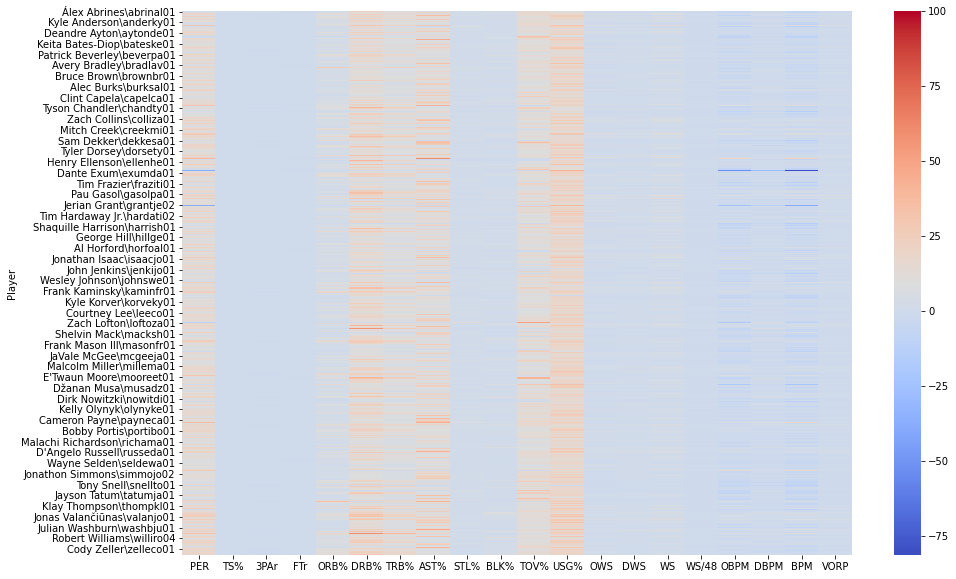

In [259]:
import seaborn as sns
plt.figure(figsize=(15,10))
plot = sns.heatmap(player_f_num, cmap='coolwarm')

plt.show()

#there may be too many ata points to graph all of the layers accurately

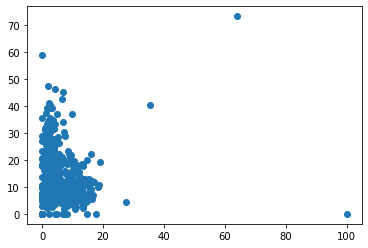

In [260]:
plt.scatter(data=player_f, x='ORB%', y='AST%')

# Expenditure Disagg

In [261]:
#import file
raw_data_disagg = pd.read_csv('data/Sports_Apparel_Summary and Expenditure_Disagg.csv')
raw_data_disagg

\
0    Basketball (NBA) Sports Logo Apparel: Summary ...     NaN     NaN   
1                                                  NaN     NaN     NaN   
2                                                 Item  2010.0    2011   
3                               Total Buyers (add 000)     NaN  14,856   
4                            Buyers as % of Total Fans     NaN   19.1%   
..                                                 ...     ...     ...   
139                                                NaN     NaN     NaN   
140                                                NaN     NaN     NaN   
141                                                NaN     NaN     NaN   
142                                                NaN     NaN     NaN   
143                                                NaN     NaN     NaN   

                                                                               \
0       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
1       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
2      2012    2013    2014    2015     2016      2017       2018        2019   
3    14,139  13,399  14,530  20,053   16,509    15,782     20,026      13,481   
4     16.5%   18.1%   19.1%   23.9%    20.3%     21.1%      26.9%       19.2%   
..      ...     ...     ...     ...      ...       ...        ...         ...   
139     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
140     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
141     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
142     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
143     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   

                  Unnamed: 12  
0            NaN          NaN  
1            NaN          NaN  
2           2020          NaN  
3         18,666          NaN  
4          27.4%          NaN  
..           ...          ...  
139          NaN          NaN  
140          NaN          NaN  
141          NaN          NaN  
142          NaN          NaN  
143          NaN          NaN  

[144 rows x 13 columns]

In [262]:
raw_data_disagg.shape

(144, 13)

In [263]:
exp_disagg = raw_data_disagg.iloc[83:]
exp_disagg

\
83                                 --------% OF BUYERS NaN  NaN   NaN   NaN   
84                                       Stadium/Arena NaN  NaN   8.7   9.5   
85   Fan shop/specialty sports store (Fanatics, tea... NaN  NaN   NaN   NaN   
86   Full-line sporting goods store (Dick's Sportin... NaN  NaN  27.6  26.4   
87                  Specialty Athletic Footwear Stores NaN  NaN   6.1   5.7   
..                                                 ...  ..  ...   ...   ...   
139                                                NaN NaN  NaN   NaN   NaN   
140                                                NaN NaN  NaN   NaN   NaN   
141                                                NaN NaN  NaN   NaN   NaN   
142                                                NaN NaN  NaN   NaN   NaN   
143                                                NaN NaN  NaN   NaN   NaN   

                                                                           \
83     NaN     NaN      NaN       NaN        NaN         NaN          NaN   
84    14.9     8.5      5.3       NaN        NaN         NaN          5.9   
85     NaN     NaN      NaN       NaN        NaN         NaN         23.1   
86    28.3    31.1     28.3       NaN        NaN         NaN         18.6   
87     4.8     9.4      5.5       NaN        NaN         NaN          ---   
..     ...     ...      ...       ...        ...         ...          ...   
139    NaN     NaN      NaN       NaN        NaN         NaN          NaN   
140    NaN     NaN      NaN       NaN        NaN         NaN          NaN   
141    NaN     NaN      NaN       NaN        NaN         NaN          NaN   
142    NaN     NaN      NaN       NaN        NaN         NaN          NaN   
143    NaN     NaN      NaN       NaN        NaN         NaN          NaN   

     Unnamed: 12  
83           NaN  
84           NaN  
85           NaN  
86           NaN  
87           NaN  
..           ...  
139          NaN  
140          NaN  
141          NaN  
142          NaN  
143          NaN  

[61 rows x 13 columns]

In [264]:
exp_disagg.columns = ['Item', '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','Unnamed']

In [265]:
exp_disagg

Item  2010 2011  2012  2013  \
83                                 --------% OF BUYERS   NaN  NaN   NaN   NaN   
84                                       Stadium/Arena   NaN  NaN   8.7   9.5   
85   Fan shop/specialty sports store (Fanatics, tea...   NaN  NaN   NaN   NaN   
86   Full-line sporting goods store (Dick's Sportin...   NaN  NaN  27.6  26.4   
87                  Specialty Athletic Footwear Stores   NaN  NaN   6.1   5.7   
..                                                 ...   ...  ...   ...   ...   
139                                                NaN   NaN  NaN   NaN   NaN   
140                                                NaN   NaN  NaN   NaN   NaN   
141                                                NaN   NaN  NaN   NaN   NaN   
142                                                NaN   NaN  NaN   NaN   NaN   
143                                                NaN   NaN  NaN   NaN   NaN   

     2014  2015  2016 2017 2018 2019  2020  Unnamed  
83    NaN   NaN   NaN  NaN  NaN  NaN   NaN      NaN  
84   14.9   8.5   5.3  NaN  NaN  NaN   5.9      NaN  
85    NaN   NaN   NaN  NaN  NaN  NaN  23.1      NaN  
86   28.3  31.1  28.3  NaN  NaN  NaN  18.6      NaN  
87    4.8   9.4   5.5  NaN  NaN  NaN   ---      NaN  
..    ...   ...   ...  ...  ...  ...   ...      ...  
139   NaN   NaN   NaN  NaN  NaN  NaN   NaN      NaN  
140   NaN   NaN   NaN  NaN  NaN  NaN   NaN      NaN  
141   NaN   NaN   NaN  NaN  NaN  NaN   NaN      NaN  
142   NaN   NaN   NaN  NaN  NaN  NaN   NaN      NaN  
143   NaN   NaN   NaN  NaN  NaN  NaN   NaN      NaN  

[61 rows x 13 columns]

In [266]:
exp_disagg = exp_disagg.set_index('Item')

In [267]:
exp_disagg.head()

2010 2011  2012  2013  \
Item                                                                        
--------% OF BUYERS                                  NaN  NaN   NaN   NaN   
Stadium/Arena                                        NaN  NaN   8.7   9.5   
Fan shop/specialty sports store (Fanatics, team...   NaN  NaN   NaN   NaN   
Full-line sporting goods store (Dick's Sporting...   NaN  NaN  27.6  26.4   
Specialty Athletic Footwear Stores                   NaN  NaN   6.1   5.7   

                                                    2014  2015  2016 2017  \
Item                                                                        
--------% OF BUYERS                                  NaN   NaN   NaN  NaN   
Stadium/Arena                                       14.9   8.5   5.3  NaN   
Fan shop/specialty sports store (Fanatics, team...   NaN   NaN   NaN  NaN   
Full-line sporting goods store (Dick's Sporting...  28.3  31.1  28.3  NaN   
Specialty Athletic Footwear Stores                   4.8   9.4   5.5  NaN   

                                                   2018 2019  2020  Unnamed  
Item                                                                         
--------% OF BUYERS                                 NaN  NaN   NaN      NaN  
Stadium/Arena                                       NaN  NaN   5.9      NaN  
Fan shop/specialty sports store (Fanatics, team...  NaN  NaN  23.1      NaN  
Full-line sporting goods store (Dick's Sporting...  NaN  NaN  18.6      NaN  
Specialty Athletic Footwear Stores                  NaN  NaN   ---      NaN

In [268]:
#columns '2010' and '2011' are empty so I'll drop them
exp_disagg = exp_disagg.drop(columns=['2010','2011'])

In [269]:
exp_disagg.head()

2012  2013  2014  2015  \
Item                                                                         
--------% OF BUYERS                                  NaN   NaN   NaN   NaN   
Stadium/Arena                                        8.7   9.5  14.9   8.5   
Fan shop/specialty sports store (Fanatics, team...   NaN   NaN   NaN   NaN   
Full-line sporting goods store (Dick's Sporting...  27.6  26.4  28.3  31.1   
Specialty Athletic Footwear Stores                   6.1   5.7   4.8   9.4   

                                                    2016 2017 2018 2019  2020  \
Item                                                                            
--------% OF BUYERS                                  NaN  NaN  NaN  NaN   NaN   
Stadium/Arena                                        5.3  NaN  NaN  NaN   5.9   
Fan shop/specialty sports store (Fanatics, team...   NaN  NaN  NaN  NaN  23.1   
Full-line sporting goods store (Dick's Sporting...  28.3  NaN  NaN  NaN  18.6   
Specialty Athletic Footwear Stores                   5.5  NaN  NaN  NaN   ---   

                                                    Unnamed  
Item                                                         
--------% OF BUYERS                                     NaN  
Stadium/Arena                                           NaN  
Fan shop/specialty sports store (Fanatics, team...      NaN  
Full-line sporting goods store (Dick's Sporting...      NaN  
Specialty Athletic Footwear Stores                      NaN

In [270]:
exp_disagg.tail(17)

2012 2013 2014 2015 2016  \
Item                                                                        
Source: SBRnet, Inc., 2021. All Rights Reserved.  NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   
NaN                                               NaN  NaN  NaN  NaN  NaN   

                                                 2017 2018 2019 2020  Unnamed  
Item                                                                           
Source: SBRnet, Inc., 2021. All Rights Reserved.  NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN  
NaN                                               NaN  NaN  NaN  NaN      NaN

In [271]:
#the last 17 rows are empty, so I'll drop them from the dataframe
exp_disagg = exp_disagg.reset_index().dropna(subset=['Item']).set_index('Item')
exp_disagg

2012      2013  \
Item                                                                     
--------% OF BUYERS                                      NaN       NaN   
Stadium/Arena                                            8.7       9.5   
Fan shop/specialty sports store (Fanatics, team...       NaN       NaN   
Full-line sporting goods store (Dick's Sporting...      27.6      26.4   
Specialty Athletic Footwear Stores                       6.1       5.7   
League/Team Store                                        9.3       6.5   
Specialty Apparel Stores                                 3.8       2.1   
Discount/Department/Warehouse Store (Walmart, T...      18.3      19.6   
Company/ Brand Store/Outlet                              2.1       2.5   
Online Retailers (Amazon, eBay, or other online...      13.8      18.9   
Other                                                    1.2       ---   
Don't Know                                               9.1       8.8   
Total                                                  100.0     100.0   
Base (No. of Buyers - add 000)                        14,139    13,399   
--------% OF $ EXPENDITURES                              NaN       NaN   
Sporting Goods/Sports Specialty Stores                  24.8      23.2   
Specialty Athletic Footwear Stores                       7.9      15.0   
Department/Discount Stores                              10.5      12.0   
Online Retailers                                        19.8      19.9   
Other                                                   30.4      21.7   
Don't Know                                               6.6       8.1   
Total                                                  100.0     100.0   
Base (Expenditures - add 000)                       $960,616  $902,121   
---------% OF BUYERS VS. EXPENDITURES, IN-STORE...       NaN       NaN   
% OF BUYERS                                              NaN       NaN   
In-Store                                                59.9      45.6   
Online                                                  32.8      45.3   
Don't Know                                               7.4       9.1   
Total                                                  100.0     100.0   
Base (No. of buyers - add 000)                        14,139    13,399   
% OF EXPENDITURES                                        NaN       NaN   
In-Store                                                52.5      48.0   
Online                                                  42.5      50.1   
Don't Know                                               5.0       1.9   
Total                                                  100.0     100.0   
Base (Expenditures - add 000)                       $960,616  $902,121   
IF PURCHASED ONLINE, % OF BUYERS BY TYPE OF DEV...       NaN       NaN   
Computer/Laptop                                          NaN      69.8   
Tablet                                                   NaN      12.4   
Smartphone                                               NaN       8.5   
Don't Know/Don't Remember                                NaN       9.3   
Total                                                    NaN     100.0   
 Base (No. of Buyers Who Purchased Online - add...       NaN     6,074   
Source: SBRnet, Inc., 2021. All Rights Reserved.         NaN       NaN   

                                                          2014        2015  \
Item                                                                         
--------% OF BUYERS                                        NaN         NaN   
Stadium/Arena                                             14.9         8.5   
Fan shop/specialty sports store (Fanatics, team...         NaN         NaN   
Full-line sporting goods store (Dick's Sporting...        28.3        31.1   
Specialty Athletic Footwear Stores                         4.8         9.4   
League/Team Store                                         10.2         3.1   
Specialty Apparel Stores   

### % Buyers

In [272]:
exp_disagg_pct_buyers = exp_disagg.iloc[1:14]
exp_disagg_pct_buyers

2012    2013    2014  \
Item                                                                         
Stadium/Arena                                          8.7     9.5    14.9   
Fan shop/specialty sports store (Fanatics, team...     NaN     NaN     NaN   
Full-line sporting goods store (Dick's Sporting...    27.6    26.4    28.3   
Specialty Athletic Footwear Stores                     6.1     5.7     4.8   
League/Team Store                                      9.3     6.5    10.2   
Specialty Apparel Stores                               3.8     2.1     1.9   
Discount/Department/Warehouse Store (Walmart, T...    18.3    19.6    13.0   
Company/ Brand Store/Outlet                            2.1     2.5     1.8   
Online Retailers (Amazon, eBay, or other online...    13.8    18.9    18.8   
Other                                                  1.2     ---     2.4   
Don't Know                                             9.1     8.8     3.1   
Total                                                100.0   100.0   100.0   
Base (No. of Buyers - add 000)                      14,139  13,399  14,530   

                                                      2015    2016 2017 2018  \
Item                                                                           
Stadium/Arena                                          8.5     5.3  NaN  NaN   
Fan shop/specialty sports store (Fanatics, team...     NaN     NaN  NaN  NaN   
Full-line sporting goods store (Dick's Sporting...    31.1    28.3  NaN  NaN   
Specialty Athletic Footwear Stores                     9.4     5.5  NaN  NaN   
League/Team Store                                      3.1     7.8  NaN  NaN   
Specialty Apparel Stores                               1.7     1.9  NaN  NaN   
Discount/Department/Warehouse Store (Walmart, T...    20.0    17.9  NaN  NaN   
Company/ Brand Store/Outlet                            1.3     6.3  NaN  NaN   
Online Retailers (Amazon, eBay, or other online...    20.6    19.5  NaN  NaN   
Other                                                  0.3     1.8  NaN  NaN   
Don't Know                                             4.0     5.8  NaN  NaN   
Total                                                100.0   100.0  NaN  NaN   
Base (No. of Buyers - add 000)                      20,053  16,509  NaN  NaN   

                                                   2019    2020  Unnamed  
Item                                                                      
Stadium/Arena                                       NaN     5.9      NaN  
Fan shop/specialty sports store (Fanatics, team...  NaN    23.1      NaN  
Full-line sporting goods store (Dick's Sporting...  NaN    18.6      NaN  
Specialty Athletic Footwear Stores                  NaN     ---      NaN  
League/Team Store                                   NaN     ---      NaN  
Specialty Apparel Stores                            NaN     ---      NaN  
Discount/Department/Warehouse Store (Walmart, T...  NaN    20.4      NaN  
Company/ Brand Store/Outlet                         NaN     NaN      NaN  
Online Retailers (Amazon, eBay, or other online...  NaN    25.4      NaN  
Other                                               NaN     3.9      NaN  
Don't Know                                          NaN     2.6      NaN  
Total                                               NaN   100.0      NaN  
Base (No. of Buyers - add 000)                      NaN  18,666      NaN

In [273]:
import numpy as np
exp_disagg_pct_buyers['2020'] = exp_disagg_pct_buyers['2020'].str.replace('---', '').replace('',np.NaN)
exp_disagg_pct_buyers

<ipython-input-273-ddb74f5d999a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_disagg_pct_buyers['2020'] = exp_disagg_pct_buyers['2020'].str.replace('---', '').replace('',np.NaN)


2012    2013    2014  \
Item                                                                         
Stadium/Arena                                          8.7     9.5    14.9   
Fan shop/specialty sports store (Fanatics, team...     NaN     NaN     NaN   
Full-line sporting goods store (Dick's Sporting...    27.6    26.4    28.3   
Specialty Athletic Footwear Stores                     6.1     5.7     4.8   
League/Team Store                                      9.3     6.5    10.2   
Specialty Apparel Stores                               3.8     2.1     1.9   
Discount/Department/Warehouse Store (Walmart, T...    18.3    19.6    13.0   
Company/ Brand Store/Outlet                            2.1     2.5     1.8   
Online Retailers (Amazon, eBay, or other online...    13.8    18.9    18.8   
Other                                                  1.2     ---     2.4   
Don't Know                                             9.1     8.8     3.1   
Total                                                100.0   100.0   100.0   
Base (No. of Buyers - add 000)                      14,139  13,399  14,530   

                                                      2015    2016 2017 2018  \
Item                                                                           
Stadium/Arena                                          8.5     5.3  NaN  NaN   
Fan shop/specialty sports store (Fanatics, team...     NaN     NaN  NaN  NaN   
Full-line sporting goods store (Dick's Sporting...    31.1    28.3  NaN  NaN   
Specialty Athletic Footwear Stores                     9.4     5.5  NaN  NaN   
League/Team Store                                      3.1     7.8  NaN  NaN   
Specialty Apparel Stores                               1.7     1.9  NaN  NaN   
Discount/Department/Warehouse Store (Walmart, T...    20.0    17.9  NaN  NaN   
Company/ Brand Store/Outlet                            1.3     6.3  NaN  NaN   
Online Retailers (Amazon, eBay, or other online...    20.6    19.5  NaN  NaN   
Other                                                  0.3     1.8  NaN  NaN   
Don't Know                                             4.0     5.8  NaN  NaN   
Total                                                100.0   100.0  NaN  NaN   
Base (No. of Buyers - add 000)                      20,053  16,509  NaN  NaN   

                                                   2019    2020  Unnamed  
Item                                                                      
Stadium/Arena                                       NaN     5.9      NaN  
Fan shop/specialty sports store (Fanatics, team...  NaN    23.1      NaN  
Full-line sporting goods store (Dick's Sporting...  NaN    18.6      NaN  
Specialty Athletic Footwear Stores                  NaN     NaN      NaN  
League/Team Store                                   NaN     NaN      NaN  
Specialty Apparel Stores                            NaN     NaN      NaN  
Discount/Department/Warehouse Store (Walmart, T...  NaN    20.4      NaN  
Company/ Brand Store/Outlet                         NaN     NaN      NaN  
Online Retailers (Amazon, eBay, or other online...  NaN    25.4      NaN  
Other                                               NaN     3.9      NaN  
Don't Know                                          NaN     2.6      NaN  
Total                                               NaN   100.0      NaN  
Base (No. of Buyers - add 000)                      NaN  18,666      NaN

In [274]:
exp_disagg_pct_buyers['2013'] = exp_disagg_pct_buyers['2013'].str.replace('---', '').replace('', np.NaN)

<ipython-input-274-6cc7e7fb8cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_disagg_pct_buyers['2013'] = exp_disagg_pct_buyers['2013'].str.replace('---', '').replace('', np.NaN)


In [275]:
#remove the total and base rows for now
exp_disagg_pct_buyers_new = exp_disagg_pct_buyers.iloc[0:-2]
exp_disagg_pct_buyers_new.dtypes

2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
Unnamed    float64
dtype: object

In [276]:
for col in exp_disagg_pct_buyers_new.columns:
    exp_disagg_pct_buyers_new[col] = exp_disagg_pct_buyers_new[col].astype(float)

<ipython-input-276-841234d46e24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_disagg_pct_buyers_new[col] = exp_disagg_pct_buyers_new[col].astype(float)


In [277]:
exp_disagg_pct_buyers_new.dtypes

2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
Unnamed    float64
dtype: object

In [278]:
#Summary statistics
exp_disagg_pct_buyers_new.describe()

2012       2013       2014       2015       2016  2017  2018  \
count  10.000000   9.000000  10.000000  10.000000  10.000000   0.0   0.0   
mean   10.000000  11.111111   9.920000  10.000000  10.010000   NaN   NaN   
std     8.093756   8.516960   8.885544  10.448073   8.812296   NaN   NaN   
min     1.200000   2.100000   1.800000   0.300000   1.800000   NaN   NaN   
25%     4.375000   5.700000   2.575000   2.050000   5.350000   NaN   NaN   
50%     8.900000   8.800000   7.500000   6.250000   6.050000   NaN   NaN   
75%    12.675000  18.900000  14.425000  17.350000  15.375000   NaN   NaN   
max    27.600000  26.400000  28.300000  31.100000  28.300000   NaN   NaN   

       2019       2020  Unnamed  
count   0.0   7.000000      0.0  
mean    NaN  14.271429      NaN  
std     NaN   9.763489      NaN  
min     NaN   2.600000      NaN  
25%     NaN   4.900000      NaN  
50%     NaN  18.600000      NaN  
75%     NaN  21.750000      NaN  
max     NaN  25.400000      NaN

In [279]:
exp_disagg_pct_buyers_new_f = exp_disagg_pct_buyers_new.drop(['Unnamed','2017','2018','2019'], axis=1)
exp_disagg_pct_buyers_new_f.head()

2012  2013  2014  2015  \
Item                                                                         
Stadium/Arena                                        8.7   9.5  14.9   8.5   
Fan shop/specialty sports store (Fanatics, team...   NaN   NaN   NaN   NaN   
Full-line sporting goods store (Dick's Sporting...  27.6  26.4  28.3  31.1   
Specialty Athletic Footwear Stores                   6.1   5.7   4.8   9.4   
League/Team Store                                    9.3   6.5  10.2   3.1   

                                                    2016  2020  
Item                                                            
Stadium/Arena                                        5.3   5.9  
Fan shop/specialty sports store (Fanatics, team...   NaN  23.1  
Full-line sporting goods store (Dick's Sporting...  28.3  18.6  
Specialty Athletic Footwear Stores                   5.5   NaN  
League/Team Store                                    7.8   NaN

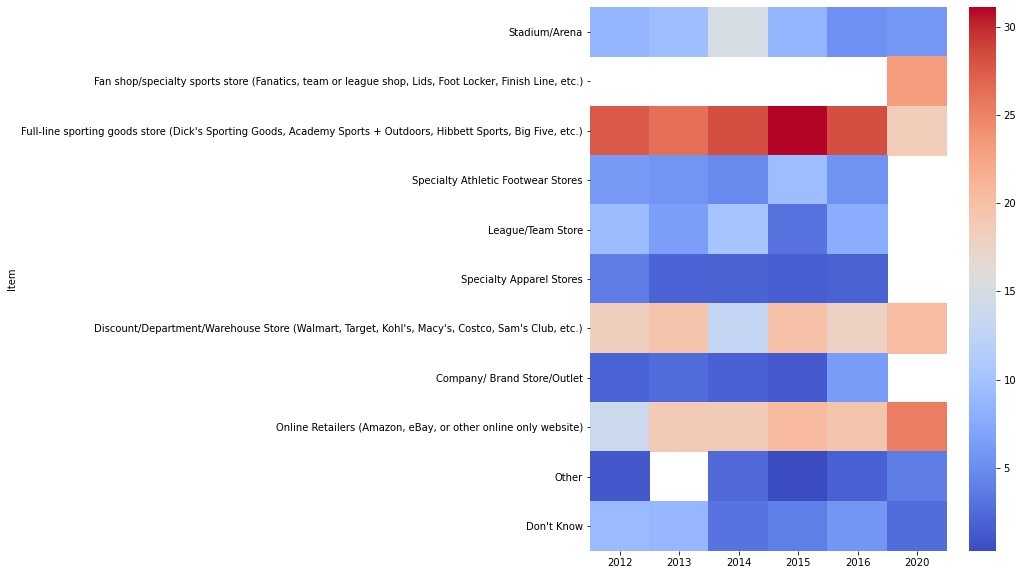

In [280]:
import seaborn as sns
plt.figure(figsize=(8,10))
plot = sns.heatmap(exp_disagg_pct_buyers_new_f, cmap='coolwarm')

plt.show()

### % Of Dollar Expenditures

In [281]:
exp_disagg_expenditures = exp_disagg.iloc[15:23]
exp_disagg_expenditures

2012      2013        2014  \
Item                                                                     
Sporting Goods/Sports Specialty Stores      24.8      23.2        24.4   
Specialty Athletic Footwear Stores           7.9      15.0         5.9   
Department/Discount Stores                  10.5      12.0         8.4   
Online Retailers                            19.8      19.9        21.8   
Other                                       30.4      21.7        36.1   
Don't Know                                   6.6       8.1         3.4   
Total                                      100.0     100.0       100.0   
Base (Expenditures - add 000)           $960,616  $902,121  $1,126,583   

                                              2015        2016 2017 2018 2019  \
Item                                                                            
Sporting Goods/Sports Specialty Stores        29.6        26.4  NaN  NaN  NaN   
Specialty Athletic Footwear Stores            13.5         6.1  NaN  NaN  NaN   
Department/Discount Stores                    12.3        15.9  NaN  NaN  NaN   
Online Retailers                              22.3        16.7  NaN  NaN  NaN   
Other                                         19.1        24.8  NaN  NaN  NaN   
Don't Know                                     3.1        10.0  NaN  NaN  NaN   
Total                                        100.0       100.0  NaN  NaN  NaN   
Base (Expenditures - add 000)           $1,272,370  $1,127,701  NaN  NaN  NaN   

                                       2020  Unnamed  
Item                                                  
Sporting Goods/Sports Specialty Stores  NaN      NaN  
Specialty Athletic Footwear Stores      NaN      NaN  
Department/Discount Stores              NaN      NaN  
Online Retailers                        NaN      NaN  
Other                                   NaN      NaN  
Don't Know                              NaN      NaN  
Total                                   NaN      NaN  
Base (Expenditures - add 000)           NaN      NaN

In [282]:
#We will look at the rows above the total row for now
exp_disagg_expenditures_new = exp_disagg_expenditures.iloc[0:-2]
exp_disagg_expenditures_new

2012  2013  2014  2015  2016 2017  \
Item                                                                        
Sporting Goods/Sports Specialty Stores  24.8  23.2  24.4  29.6  26.4  NaN   
Specialty Athletic Footwear Stores       7.9  15.0   5.9  13.5   6.1  NaN   
Department/Discount Stores              10.5  12.0   8.4  12.3  15.9  NaN   
Online Retailers                        19.8  19.9  21.8  22.3  16.7  NaN   
Other                                   30.4  21.7  36.1  19.1  24.8  NaN   
Don't Know                               6.6   8.1   3.4   3.1  10.0  NaN   

                                       2018 2019 2020  Unnamed  
Item                                                            
Sporting Goods/Sports Specialty Stores  NaN  NaN  NaN      NaN  
Specialty Athletic Footwear Stores      NaN  NaN  NaN      NaN  
Department/Discount Stores              NaN  NaN  NaN      NaN  
Online Retailers                        NaN  NaN  NaN      NaN  
Other                                   NaN  NaN  NaN      NaN  
Don't Know                              NaN  NaN  NaN      NaN

In [283]:
exp_disagg_expenditures_new.dtypes

2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
Unnamed    float64
dtype: object

In [284]:
exp_disagg_expenditures_new = exp_disagg_expenditures_new.astype(float)
exp_disagg_expenditures_new.describe()

2012       2013       2014       2015      2016  2017  2018  2019  \
count   6.000000   6.000000   6.000000   6.000000   6.00000   0.0   0.0   0.0   
mean   16.666667  16.650000  16.666667  16.650000  16.65000   NaN   NaN   NaN   
std     9.806053   5.939949  12.838016   9.144124   7.96963   NaN   NaN   NaN   
min     6.600000   8.100000   3.400000   3.100000   6.10000   NaN   NaN   NaN   
25%     8.550000  12.750000   6.525000  12.600000  11.47500   NaN   NaN   NaN   
50%    15.150000  17.450000  15.100000  16.300000  16.30000   NaN   NaN   NaN   
75%    23.550000  21.250000  23.750000  21.500000  22.77500   NaN   NaN   NaN   
max    30.400000  23.200000  36.100000  29.600000  26.40000   NaN   NaN   NaN   

       2020  Unnamed  
count   0.0      0.0  
mean    NaN      NaN  
std     NaN      NaN  
min     NaN      NaN  
25%     NaN      NaN  
50%     NaN      NaN  
75%     NaN      NaN  
max     NaN      NaN

In [285]:
exp_disagg_expenditures_new_f = exp_disagg_expenditures_new.drop(['Unnamed','2017','2018','2019','2020'], axis=1)
exp_disagg_expenditures_new_f.head()

2012  2013  2014  2015  2016
Item                                                                
Sporting Goods/Sports Specialty Stores  24.8  23.2  24.4  29.6  26.4
Specialty Athletic Footwear Stores       7.9  15.0   5.9  13.5   6.1
Department/Discount Stores              10.5  12.0   8.4  12.3  15.9
Online Retailers                        19.8  19.9  21.8  22.3  16.7
Other                                   30.4  21.7  36.1  19.1  24.8

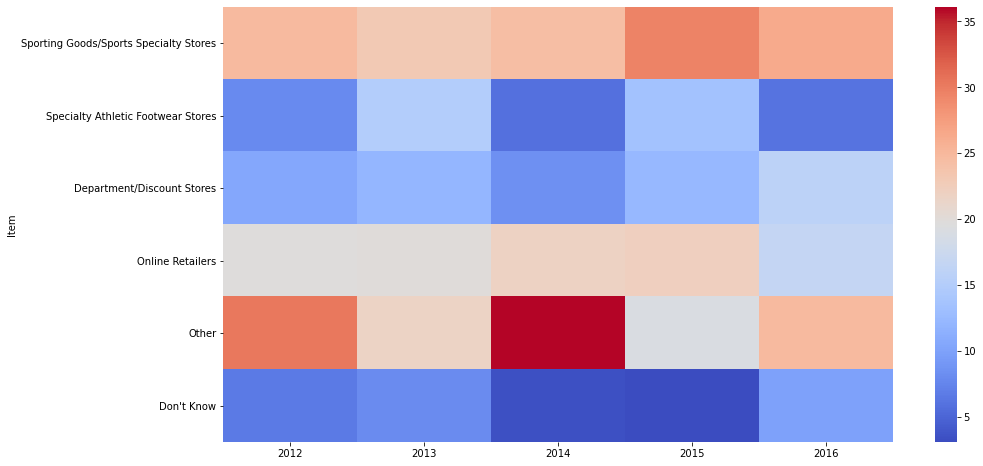

In [286]:
import seaborn as sns
plt.figure(figsize=(15,8))
plot = sns.heatmap(exp_disagg_expenditures_new_f, cmap='coolwarm')

plt.show()

### % Of Buyers vs. Expenditures In-Store vs Online

In [287]:
exp_disagg_instore_online = exp_disagg.iloc[23:36]
exp_disagg_instore_online

2012      2013  \
Item                                                                     
---------% OF BUYERS VS. EXPENDITURES, IN-STORE...       NaN       NaN   
% OF BUYERS                                              NaN       NaN   
In-Store                                                59.9      45.6   
Online                                                  32.8      45.3   
Don't Know                                               7.4       9.1   
Total                                                  100.0     100.0   
Base (No. of buyers - add 000)                        14,139    13,399   
% OF EXPENDITURES                                        NaN       NaN   
In-Store                                                52.5      48.0   
Online                                                  42.5      50.1   
Don't Know                                               5.0       1.9   
Total                                                  100.0     100.0   
Base (Expenditures - add 000)                       $960,616  $902,121   

                                                          2014        2015  \
Item                                                                         
---------% OF BUYERS VS. EXPENDITURES, IN-STORE...         NaN         NaN   
% OF BUYERS                                                NaN         NaN   
In-Store                                                  46.7        45.2   
Online                                                    47.4        49.2   
Don't Know                                                 5.8         5.5   
Total                                                    100.0       100.0   
Base (No. of buyers - add 000)                          14,530      20,053   
% OF EXPENDITURES                                          NaN         NaN   
In-Store                                                  48.4        46.8   
Online                                                    46.8        48.2   
Don't Know                                                 4.8         5.0   
Total                                                    100.0       100.0   
Base (Expenditures - add 000)                       $1,126,583  $1,272,370   

                                                          2016        2017  \
Item                                                                         
---------% OF BUYERS VS. EXPENDITURES, IN-STORE...         NaN         NaN   
% OF BUYERS                                                NaN         NaN   
In-Store                                                  44.6        39.9   
Online                                                    48.5        53.7   
Don't Know                                                 6.9         6.4   
Total                                                    100.0       100.0   
Base (No. of buyers - add 000)                          16,509      15,782   
% OF EXPENDITURES                                          NaN         NaN   
In-Store                                                  43.1        42.8   
Online                                                    48.6        54.2   
Don't Know                                                 8.3         3.0   
Total                                                    100.0       100.0   
Base (Expenditures - add 000)                       $1,127,701  $1,148,535   

                                                          2018        2019  \
Item                                                                         
---------% OF BUYERS VS. EXPENDITURES, IN-STORE...         NaN         NaN   
% OF BUYERS                                                NaN         NaN   
In-Store                                                  39.7        39.3   
Online                                                    54.7        53.0   
Don't Know                                                 5.6         7.7   
Total                                                    

In [288]:
exp_disagg_instore_online_buyers = exp_disagg_instore_online.iloc[2:5]
exp_disagg_instore_online_buyers

2012  2013  2014  2015  2016  2017  2018  2019  2020  Unnamed
Item                                                                     
In-Store    59.9  45.6  46.7  45.2  44.6  39.9  39.7  39.3  35.3      NaN
Online      32.8  45.3  47.4  49.2  48.5  53.7  54.7  53.0  61.2      NaN
Don't Know   7.4   9.1   5.8   5.5   6.9   6.4   5.6   7.7   3.5      NaN

In [289]:
exp_disagg_instore_online_buyers.dtypes

2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
Unnamed    float64
dtype: object

In [290]:
exp_disagg_instore_online_buyers = exp_disagg_instore_online_buyers.astype(float)
exp_disagg_instore_online_buyers.describe()

2012       2013      2014       2015       2016       2017  \
count   3.000000   3.000000   3.00000   3.000000   3.000000   3.000000   
mean   33.366667  33.333333  33.30000  33.300000  33.333333  33.333333   
std    26.254587  20.987218  23.81827  24.158435  22.974841  24.324131   
min     7.400000   9.100000   5.80000   5.500000   6.900000   6.400000   
25%    20.100000  27.200000  26.25000  25.350000  25.750000  23.150000   
50%    32.800000  45.300000  46.70000  45.200000  44.600000  39.900000   
75%    46.350000  45.450000  47.05000  47.200000  46.550000  46.800000   
max    59.900000  45.600000  47.40000  49.200000  48.500000  53.700000   

            2018       2019       2020  Unnamed  
count   3.000000   3.000000   3.000000      0.0  
mean   33.333333  33.333333  33.333333      NaN  
std    25.161545  23.231946  28.900231      NaN  
min     5.600000   7.700000   3.500000      NaN  
25%    22.650000  23.500000  19.400000      NaN  
50%    39.700000  39.300000  35.300000      NaN  
75%    47.200000  46.150000  48.250000      NaN  
max    54.700000  53.000000  61.200000      NaN

In [291]:
exp_disagg_instore_online_expenditures = exp_disagg_instore_online.iloc[8:-2]
exp_disagg_instore_online_expenditures

2012  2013  2014  2015  2016  2017  2018  2019 2020  Unnamed
Item                                                                    
In-Store    52.5  48.0  48.4  46.8  43.1  42.8  41.0  38.8  NaN      NaN
Online      42.5  50.1  46.8  48.2  48.6  54.2  54.8  49.3  NaN      NaN
Don't Know   5.0   1.9   4.8   5.0   8.3   3.0   4.1  11.9  NaN      NaN

In [292]:
exp_disagg_instore_online_expenditures = exp_disagg_instore_online_expenditures.astype(float)
exp_disagg_instore_online_expenditures.describe()

2012       2013       2014       2015       2016       2017  \
count   3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   
mean   33.333333  33.333333  33.333333  33.333333  33.333333  33.333333   
std    25.041632  27.242308  24.723538  24.547369  21.853222  26.880724   
min     5.000000   1.900000   4.800000   5.000000   8.300000   3.000000   
25%    23.750000  24.950000  25.800000  25.900000  25.700000  22.900000   
50%    42.500000  48.000000  46.800000  46.800000  43.100000  42.800000   
75%    47.500000  49.050000  47.600000  47.500000  45.850000  48.500000   
max    52.500000  50.100000  48.400000  48.200000  48.600000  54.200000   

            2018       2019  2020  Unnamed  
count   3.000000   3.000000   0.0      0.0  
mean   33.300000  33.333333   NaN      NaN  
std    26.212402  19.289980   NaN      NaN  
min     4.100000  11.900000   NaN      NaN  
25%    22.550000  25.350000   NaN      NaN  
50%    41.000000  38.800000   NaN      NaN  
75%    47.900000  44.050000   NaN      NaN  
max    54.800000  49.300000   NaN      NaN

In [293]:
exp_disagg_instore_online_expenditures_f = exp_disagg_instore_online_expenditures.drop(['Unnamed','2020'], axis=1)
exp_disagg_instore_online_expenditures_f.head()

2012  2013  2014  2015  2016  2017  2018  2019
Item                                                      
In-Store    52.5  48.0  48.4  46.8  43.1  42.8  41.0  38.8
Online      42.5  50.1  46.8  48.2  48.6  54.2  54.8  49.3
Don't Know   5.0   1.9   4.8   5.0   8.3   3.0   4.1  11.9

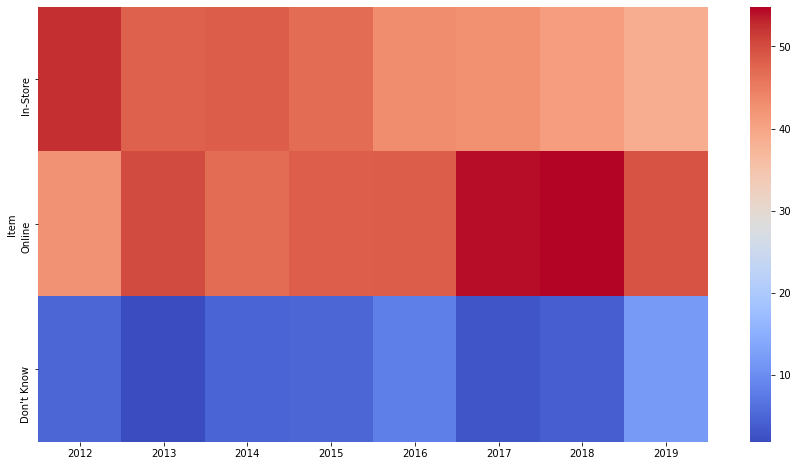

In [294]:
import seaborn as sns
plt.figure(figsize=(15,8))
plot = sns.heatmap(exp_disagg_instore_online_expenditures_f, cmap='coolwarm')

plt.show()

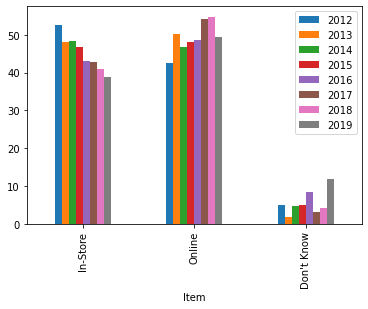

In [295]:
exp_disagg_instore_online_expenditures_f.plot(kind='bar')

### Device

In [296]:
exp_disagg_device = exp_disagg.iloc[37:-3]
exp_disagg_device

2012  2013  2014  2015  2016  2017  2018  2019 2020  \
Item                                                                            
Computer/Laptop            NaN  69.8  69.7  66.5  55.7  54.1  43.9  46.2  NaN   
Tablet                     NaN  12.4  13.1  13.4  13.2  17.4  18.0  17.3  NaN   
Smartphone                 NaN   8.5  10.2  14.9  24.8  24.1  30.7  31.9  NaN   
Don't Know/Don't Remember  NaN   9.3   7.0   5.3   6.2   4.4   7.4   4.7  NaN   

                           Unnamed  
Item                                
Computer/Laptop                NaN  
Tablet                         NaN  
Smartphone                     NaN  
Don't Know/Don't Remember      NaN

In [297]:
exp_disagg_device = exp_disagg_device.astype(float)
exp_disagg_device.describe()

2012       2013       2014       2015       2016       2017       2018  \
count   0.0   4.000000   4.000000   4.000000   4.000000   4.000000   4.000000   
mean    NaN  25.000000  25.000000  25.025000  24.975000  25.000000  25.000000   
std     NaN  29.913988  29.903957  27.969671  21.872414  21.053424  15.795147   
min     NaN   8.500000   7.000000   5.300000   6.200000   4.400000   7.400000   
25%     NaN   9.100000   9.400000  11.375000  11.450000  14.150000  15.350000   
50%     NaN  10.850000  11.650000  14.150000  19.000000  20.750000  24.350000   
75%     NaN  26.750000  27.250000  27.800000  32.525000  31.600000  34.000000   
max     NaN  69.800000  69.700000  66.500000  55.700000  54.100000  43.900000   

            2019  2020  Unnamed  
count   4.000000   0.0      0.0  
mean   25.025000   NaN      NaN  
std    17.966891   NaN      NaN  
min     4.700000   NaN      NaN  
25%    14.150000   NaN      NaN  
50%    24.600000   NaN      NaN  
75%    35.475000   NaN      NaN  
max    46.200000   NaN      NaN

In [298]:
exp_disagg_device_f = exp_disagg_device.loc[:,['2013','2014','2015','2016','2017','2018','2019']]
exp_disagg_device_f

2013  2014  2015  2016  2017  2018  2019
Item                                                               
Computer/Laptop            69.8  69.7  66.5  55.7  54.1  43.9  46.2
Tablet                     12.4  13.1  13.4  13.2  17.4  18.0  17.3
Smartphone                  8.5  10.2  14.9  24.8  24.1  30.7  31.9
Don't Know/Don't Remember   9.3   7.0   5.3   6.2   4.4   7.4   4.7

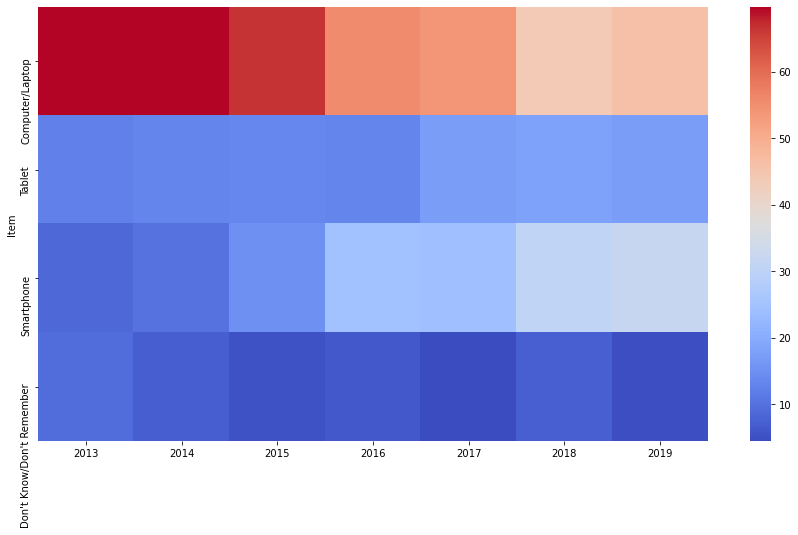

In [299]:
import seaborn as sns
plt.figure(figsize=(15,8))
plot = sns.heatmap(exp_disagg_device_f, cmap='coolwarm')

plt.show()

# Active Player PPG Ranking

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [301]:
ppg_active_players = pd.read_csv('data/NBA & ABA Active Playoff Leaders and Records for Points Per Game.csv')

In [302]:
ppg_active_players = ppg_active_players.iloc[:-1]
ppg_active_players

--- When using SR data  \
Rank                 Player   
1.             Kevin Durant   
2.             LeBron James   
3.         Donovan Mitchell   
4.            Anthony Davis   
...                     ...   
96.          Terrence Jones   
97.            Courtney Lee   
98.          Derrick Favors   
99.         DeMarre Carroll   
100.           Monte Morris   

      please cite us and provide a link and/or a mention.  
Rank                                                PPG    
1.                                                29.21    
2.                                                28.69    
3.                                                27.52    
4.                                                27.33    
...                                                 ...    
96.                                                9.08    
97.                                                9.02    
98.                                                8.89    
99.                                                8.88    
100.                                               8.69    

[101 rows x 2 columns]

In [303]:
ppg_active_players.shape

(101, 2)

In [304]:
ppg_active_players = ppg_active_players.reset_index()

In [305]:
ppg_active_players.columns = ['Rank','Player','PPG']

In [306]:
ppg_active_players = ppg_active_players.iloc[1:]

In [307]:
ppg_active_players['Rank'] = ppg_active_players['Rank'].str.replace('.','')

In [308]:
ppg_active_players.dtypes

Rank      object
Player    object
PPG       object
dtype: object

In [309]:
#The rank for the players with null values is the same as the rank above them. 
#They are just tied for that rank position which is why it's empty.
#I will change it so their rank is correct

In [310]:
ppg_active_players[ppg_active_players['Rank'].isnull()].iloc[0].replace(np.NaN,41)

Rank               41
Player    Bam Adebayo
PPG             14.89
Name: 42, dtype: object

In [311]:
ppg_active_players[ppg_active_players['Rank'].isnull()].iloc[1].replace(np.NaN,70)

Rank                   70
Player    Wesley Matthews
PPG                 10.92
Name: 71, dtype: object

In [312]:
ppg_active_players['Rank'].iloc[41] = 41

In [313]:
ppg_active_players['Rank'].iloc[70] = 70

In [314]:
ppg_active_players['Rank'].isnull().sum()

0

In [315]:
ppg_active_players['Rank'] = ppg_active_players['Rank'].astype(int)
ppg_active_players['PPG'] = ppg_active_players['PPG'].astype(float)

In [316]:
ppg_active_players.dtypes

Rank        int64
Player     object
PPG       float64
dtype: object

In [317]:
ppg_active_players.describe()

Rank         PPG
count  100.000000  100.000000
mean    50.480000   15.134000
std     29.007655    5.672256
min      1.000000    8.690000
25%     25.750000   10.637500
50%     50.500000   13.075000
75%     75.250000   19.670000
max    100.000000   29.210000

In [318]:
#top 10 players currently in the league
ppg_active_players['Player'].head(10)

1              Kevin Durant
2              LeBron James
3          Donovan Mitchell
4             Anthony Davis
5             Stephen Curry
6              Nikola Jokić
7            Damian Lillard
8         Russell Westbrook
9              Jamal Murray
10    Giannis Antetokounmpo
Name: Player, dtype: object

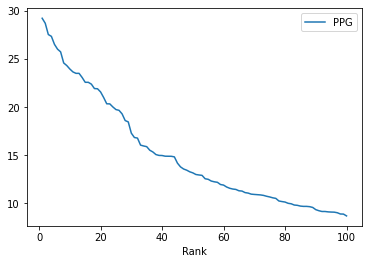

In [319]:
ppg_active_players.set_index('Rank').plot(kind='line')

# EDA

## Brand Share of Market

### Auto/Truck

## Heatmap function

# Section 3 - Jaylen EDA
By Jaylen Gentry

In [320]:
team_val = pd.read_csv('data/Team_Valuations.csv')
team_val.columns = team_val.iloc[2]
team_val = team_val.iloc[3:33]
team_val = team_val.rename(columns={2010.0: 2010, 2011.0: 2011, 2012.0: 2012})
team_val

2                     Item   2010   2011   2012   2013   2014   2015   2016  \
3          New York Knicks  586.0  655.0  780.0  1,100  1,400  2,500  3,000   
4    Golden State Warriors  315.0  363.0  450.0    555    750  1,300  1,900   
5       Los Angeles Lakers  607.0  643.0  900.0  1,000  1,350  2,600  2,700   
6            Brooklyn Nets  269.0  312.0  357.0    530    780  1,500  1,700   
7           Boston Celtics  433.0  452.0  482.0    730    875  1,700  2,100   
8            Chicago Bulls  511.0  511.0  600.0    800  1,200  2,000  2,300   
9          Houston Rockets  470.0  443.0  453.0    568    775  1,250  1,500   
10    Los Angeles Clippers  295.0  305.0  324.0    430    575  1,600  2,000   
11        Dallas Mavericks  446.0  438.0  497.0    685    765  1,150  1,400   
12         Toronto Raptors  386.0  399.0  382.0    405    520    920    980   
13      Philadelphia 76ers  344.0  330.0  314.0    418    469    700    700   
14              Miami Heat  364.0  425.0  457.0    625    770  1,175  1,300   
15       San Antonio Spurs  398.0  404.0  418.0    527    660  1,000  1,150   
16      Washington Wizards  313.0  322.0  328.0    397    485    900    960   
17  Portland Trail Blazers  338.0  356.0  370.0    457    587    940    975   
18         Milwaukee Bucks  254.0  258.0  268.0    312    405    600    675   
19        Sacramento Kings  305.0  293.0  300.0    525    550    800    925   
20          Denver Nuggets  321.0  316.0  316.0    427    495    855    855   
21     Cleveland Cavaliers  476.0  355.0  329.0    434    515    915  1,100   
22         Detroit Pistons  479.0  360.0  332.0    400    450    810    850   
23               Utah Jazz  343.0  343.0  335.0    432    525    850    875   
24   Oklahoma City Thunder  310.0  329.0  348.0    475    590    930    950   
25            Phoenix Suns  429.0  411.0  395.0    474    565    910  1,000   
26          Indiana Pacers  281.0  269.0  283.0    383    475    830    840   
27           Atlanta Hawks  306.0  295.0  270.0    316    425    825    825   
28           Orlando Magic  361.0  385.0  385.0    470    560    875    900   
29       Charlotte Hornets  278.0  281.0  277.0    315    410    725    750   
30  Minnesota Timberwolves  268.0  264.0  272.0    364    430    625    720   
31       Memphis Grizzlies  257.0  266.0  269.0    377    453    750    780   
32    New Orleans Pelicans  267.0  280.0  285.0    340    420    650    650   

2    2017   2018   2019  NaN  
3   3,300  3,600  4,000  NaN  
4   2,600  3,100  3,500  NaN  
5   3,000  3,300  3,700  NaN  
6   1,800  2,300  2,350  NaN  
7   2,200  2,500  2,800  NaN  
8   2,500  2,600  2,900  NaN  
9   1,650  2,200  2,300  NaN  
10  2,000  2,150  2,200  NaN  
11  1,450  1,900  2,250  NaN  
12  1,125  1,400  1,675  NaN  
13    800  1,180  1,650  NaN  
14  1,350  1,700  1,750  NaN  
15  1,175  1,550  1,625  NaN  
16  1,000  1,350  1,550  NaN  
17  1,050  1,300  1,600  NaN  
18    785  1,075  1.350  NaN  
19  1,075  1,375  1,575  NaN  
20    890  1,125  1,375  NaN  
21  1,200  1,325  1,275  NaN  
22    900  1,100  1,270  NaN  
23    910  1,200  1,425  NaN  
24  1,025  1,250  1,475  NaN  
25  1,100  1,280  1,500  NaN  
26    880  1,175  1,400  NaN  
27    885  1,150  1,300  NaN  
28    920  1,225  1,325  NaN  
29    780  1,050  1,025  NaN  
30    770  1,060  1,260  NaN  
31    790  1,025  1,002  NaN  
32    750  1,000  1,022  NaN

In [321]:
#adjust data types in earlier columns, previously were floats. turning into int
team_val.index = team_val['Item']
team_val = team_val.drop(columns='Item')

In [322]:
team_val = team_val.dropna(axis=1, how='all').apply(lambda x: x.astype(str), axis=1)
team_val = team_val.apply(lambda x: x.str.replace(',', ''), axis=1)#.apply(lambda x: x.str.replace('.', ''), axis=1)
team_val = team_val.apply(lambda x: x.astype(float), axis=1)

In [323]:
#shape(), info(), describe()
#no null values , each team is a unique row of information, each column represents a unique year
print(team_val.shape)
print(team_val.info())

(30, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, New York Knicks to New Orleans Pelicans
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    30 non-null     float64
 1   2011    30 non-null     float64
 2   2012    30 non-null     float64
 3   2013    30 non-null     float64
 4   2014    30 non-null     float64
 5   2015    30 non-null     float64
 6   2016    30 non-null     float64
 7   2017    30 non-null     float64
 8   2018    30 non-null     float64
 9   2019    30 non-null     float64
dtypes: float64(10)
memory usage: 2.6+ KB
None


In [324]:
team_val

2                        2010   2011   2012    2013    2014    2015    2016  \
Item                                                                          
New York Knicks         586.0  655.0  780.0  1100.0  1400.0  2500.0  3000.0   
Golden State Warriors   315.0  363.0  450.0   555.0   750.0  1300.0  1900.0   
Los Angeles Lakers      607.0  643.0  900.0  1000.0  1350.0  2600.0  2700.0   
Brooklyn Nets           269.0  312.0  357.0   530.0   780.0  1500.0  1700.0   
Boston Celtics          433.0  452.0  482.0   730.0   875.0  1700.0  2100.0   
Chicago Bulls           511.0  511.0  600.0   800.0  1200.0  2000.0  2300.0   
Houston Rockets         470.0  443.0  453.0   568.0   775.0  1250.0  1500.0   
Los Angeles Clippers    295.0  305.0  324.0   430.0   575.0  1600.0  2000.0   
Dallas Mavericks        446.0  438.0  497.0   685.0   765.0  1150.0  1400.0   
Toronto Raptors         386.0  399.0  382.0   405.0   520.0   920.0   980.0   
Philadelphia 76ers      344.0  330.0  314.0   418.0   469.0   700.0   700.0   
Miami Heat              364.0  425.0  457.0   625.0   770.0  1175.0  1300.0   
San Antonio Spurs       398.0  404.0  418.0   527.0   660.0  1000.0  1150.0   
Washington Wizards      313.0  322.0  328.0   397.0   485.0   900.0   960.0   
Portland Trail Blazers  338.0  356.0  370.0   457.0   587.0   940.0   975.0   
Milwaukee Bucks         254.0  258.0  268.0   312.0   405.0   600.0   675.0   
Sacramento Kings        305.0  293.0  300.0   525.0   550.0   800.0   925.0   
Denver Nuggets          321.0  316.0  316.0   427.0   495.0   855.0   855.0   
Cleveland Cavaliers     476.0  355.0  329.0   434.0   515.0   915.0  1100.0   
Detroit Pistons         479.0  360.0  332.0   400.0   450.0   810.0   850.0   
Utah Jazz               343.0  343.0  335.0   432.0   525.0   850.0   875.0   
Oklahoma City Thunder   310.0  329.0  348.0   475.0   590.0   930.0   950.0   
Phoenix Suns            429.0  411.0  395.0   474.0   565.0   910.0  1000.0   
Indiana Pacers          281.0  269.0  283.0   383.0   475.0   830.0   840.0   
Atlanta Hawks           306.0  295.0  270.0   316.0   425.0   825.0   825.0   
Orlando Magic           361.0  385.0  385.0   470.0   560.0   875.0   900.0   
Charlotte Hornets       278.0  281.0  277.0   315.0   410.0   725.0   750.0   
Minnesota Timberwolves  268.0  264.0  272.0   364.0   430.0   625.0   720.0   
Memphis Grizzlies       257.0  266.0  269.0   377.0   453.0   750.0   780.0   
New Orleans Pelicans    267.0  280.0  285.0   340.0   420.0   650.0   650.0   

2                         2017    2018     2019  
Item                                             
New York Knicks         3300.0  3600.0  4000.00  
Golden State Warriors   2600.0  3100.0  3500.00  
Los Angeles Lakers      3000.0  3300.0  3700.00  
Brooklyn Nets           1800.0  2300.0  2350.00  
Boston Celtics          2200.0  2500.0  2800.00  
Chicago Bulls           2500.0  2600.0  2900.00  
Houston Rockets         1650.0  2200.0  2300.00  
Los Angeles Clippers    2000.0  2150.0  2200.00  
Dallas Mavericks        1450.0  1900.0  2250.00  
Toronto Raptors         1125.0  1400.0  1675.00  
Philadelphia 76ers       800.0  1180.0  1650.00  
Miami Heat              1350.0  1700.0  1750.00  
San Antonio Spurs       1175.0  1550.0  1625.00  
Washington Wizards      1000.0  1350.0  1550.00  
Portland Trail Blazers  1050.0  1300.0  1600.00  
Milwaukee Bucks          785.0  1075.0     1.35  
Sacramento Kings        1075.0  1375.0  1575.00  
Denver Nuggets           890.0  1125.0  1375.00  
Cleveland Cavaliers     1200.0  1325.0  1275.00  
Detroit Pistons          900.0  1100.0  1270.00  
Utah Jazz                910.0  1200.0  1425.00  
Oklahoma City Thunder   1025.0  1250.0  1475.00  
Phoenix Suns            1100.0  1280.0  1500.00  
Indiana Pacers           880.0  1175.0  1400.00  
Atlanta Hawks            885.0  1150.0  1300.00  
Orlando Magic            920.0  1225.0  1325.00  
Charlotte Hornets        780.0  1050.0  1025.00  
Minnesota Timberwolve

In [325]:
#shape(), info(), describe()
#no null values , each team is a unique row of information, each column represents a unique year
print(team_val.shape)
print(team_val.info())

(30, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, New York Knicks to New Orleans Pelicans
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    30 non-null     float64
 1   2011    30 non-null     float64
 2   2012    30 non-null     float64
 3   2013    30 non-null     float64
 4   2014    30 non-null     float64
 5   2015    30 non-null     float64
 6   2016    30 non-null     float64
 7   2017    30 non-null     float64
 8   2018    30 non-null     float64
 9   2019    30 non-null     float64
dtypes: float64(10)
memory usage: 2.6+ KB
None


In [326]:
team_val['2019'].loc['Milwaukee Bucks'] = 1350.00

## EDA

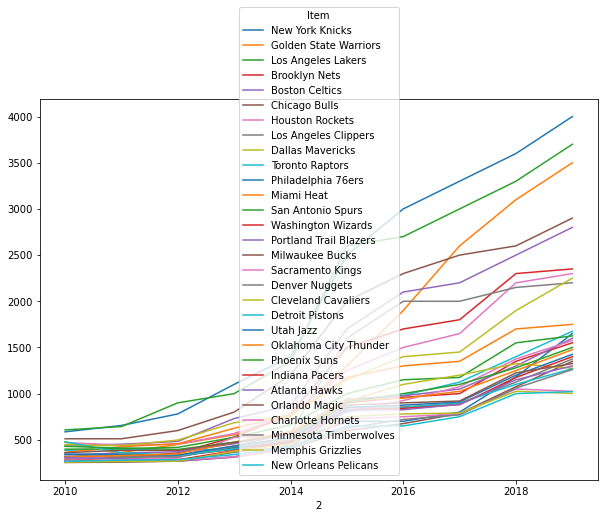

In [327]:
team_val_trans = team_val.T
team_val_trans.plot(figsize=(10, 7))

I plot the team valuations over time here you can see the exponential growth and the separation of team valuations.

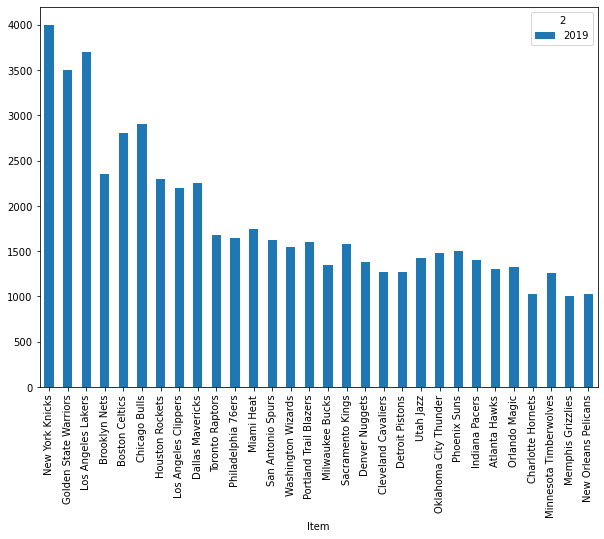

In [328]:
val_2019 = team_val[['2019']]
val_2019.plot.bar(figsize=(10, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefd733820>]],
      dtype=object)

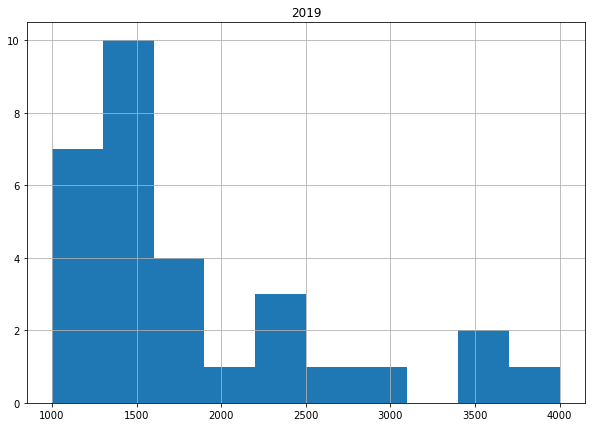

In [329]:
val_2019.hist(bins=10, figsize=(10, 7))

Here I graphed the distribution of the team valuations as of 2018. there are 3 teams skewing the values right.

# **Footwear_Basketball** 
* % of Consumer Exp. by Outlet Type
and Footwear-Basketball
* % of Consumer Unit Purchases by Brand tables
* % of Consumer Unit Purchases by Price Point
* % of Consumer Exp. by Household Income
* % of Consumer Exp. by Age Group

## Data Cleaning

In [330]:
#import file
foot_b = pd.read_csv('data/Footwear_Basketball.csv')
#foot_b.head()

In [331]:
foot_b

\
0    Footwear-Basketball: Market Size - Total Consu...    NaN    NaN    NaN   
1                                                  NaN    NaN    NaN    NaN   
2                                                 Item   2010   2011   2012   
3    Total Dollars Spent for Basketball Shoes (in m...  721.3  765.9  820.3   
4    Total Number of Pairs of Basketball Shoes Purc...   11.6   11.8   12.4   
..                                                 ...    ...    ...    ...   
183                                                NaN    NaN    NaN    NaN   
184                                                NaN    NaN    NaN    NaN   
185                                                NaN    NaN    NaN    NaN   
186                                                NaN    NaN    NaN    NaN   
187                                                NaN    NaN    NaN    NaN   

                                                                      \
0      NaN    NaN     NaN      NaN       NaN        NaN          NaN   
1      NaN    NaN     NaN      NaN       NaN        NaN          NaN   
2     2013   2014    2015     2016      2017       2018       2019.0   
3    886.8  897.4   966.1    984.8     980.2    1,001.1          NaN   
4     13.3   12.8    13.5     13.6      13.4       13.6          NaN   
..     ...    ...     ...      ...       ...        ...          ...   
183    NaN    NaN     NaN      NaN       NaN        NaN          NaN   
184    NaN    NaN     NaN      NaN       NaN        NaN          NaN   
185    NaN    NaN     NaN      NaN       NaN        NaN          NaN   
186    NaN    NaN     NaN      NaN       NaN        NaN          NaN   
187    NaN    NaN     NaN      NaN       NaN        NaN          NaN   

                   Unnamed: 12  
0             NaN          NaN  
1             NaN          NaN  
2          2020.0          NaN  
3             NaN          NaN  
4             NaN          NaN  
..            ...          ...  
183           NaN          NaN  
184           NaN          NaN  
185           NaN          NaN  
186           NaN          NaN  
187           NaN          NaN  

[188 rows x 13 columns]

In [332]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Outlet Type
#and Footwear-Basketball: % of Consumer Unit Purchases by Brand tables 
consumer_exp = foot_b.iloc[75:86]
consumer_exp.reset_index()
#consumer_exp

index                                                                     \
0      75               Sporting Goods Stores  27.6  33.6  33.8  34.9   28.9   
1      76  Specialty Athletic Footwear Stores  33.0  25.5  19.3  21.4   32.9   
2      77               Specialty Sport Shops   3.2   2.4   3.8   2.2    0.8   
3      78                           Pro Shops   0.8   1.0   0.1   0.5    0.4   
4      79                     Discount Stores   8.0   8.9   9.5   5.4    5.2   
5      80                   Department Stores   4.6   4.8   7.7   4.4    1.8   
6      81              Family Footwear Stores   2.4   4.8   4.2   2.3    4.4   
7      82                          Brand/Mfg.   NaN   NaN   NaN   NaN    6.2   
8      83               Factory Outlet Stores   7.2   4.3   5.2   9.2    3.3   
9      84                          Mail Order   0.5   1.1   2.1   3.0    4.5   
10     85                     Online/Internet  11.1  12.1  14.3  15.9   10.6   

                                                                     \
0     25.3     22.4      19.3       19.2          NaN           NaN   
1     32.9     33.7      34.2       33.1          NaN           NaN   
2      1.9      2.9       2.6        2.5          NaN           NaN   
3      1.4      1.3       1.2        2.5          NaN           NaN   
4      6.5     10.8      10.9       10.5          NaN           NaN   
5      3.6      4.0       3.7        3.1          NaN           NaN   
6      3.8      1.9       2.2        2.9          NaN           NaN   
7      8.1      7.8       9.6        9.7          NaN           NaN   
8      2.9      2.2       2.6        2.4          NaN           NaN   
9      0.4      ---       ---        ---          NaN           NaN   
10    13.0     12.8      13.4       13.4          NaN           NaN   

    Unnamed: 12  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  
9           NaN  
10          NaN

In [333]:
#add column names
consumer_exp.columns = ["Location", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
consumer_exp
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
consumer_exp = consumer_exp.drop(["2019", "2020", "?"], axis =1)
consumer_exp.head(20)

Location  2010  2011  2012  2013  2014  2015  \
75               Sporting Goods Stores  27.6  33.6  33.8  34.9  28.9  25.3   
76  Specialty Athletic Footwear Stores  33.0  25.5  19.3  21.4  32.9  32.9   
77               Specialty Sport Shops   3.2   2.4   3.8   2.2   0.8   1.9   
78                           Pro Shops   0.8   1.0   0.1   0.5   0.4   1.4   
79                     Discount Stores   8.0   8.9   9.5   5.4   5.2   6.5   
80                   Department Stores   4.6   4.8   7.7   4.4   1.8   3.6   
81              Family Footwear Stores   2.4   4.8   4.2   2.3   4.4   3.8   
82                          Brand/Mfg.   NaN   NaN   NaN   NaN   6.2   8.1   
83               Factory Outlet Stores   7.2   4.3   5.2   9.2   3.3   2.9   
84                          Mail Order   0.5   1.1   2.1   3.0   4.5   0.4   
85                     Online/Internet  11.1  12.1  14.3  15.9  10.6  13.0   

    2016  2017  2018  
75  22.4  19.3  19.2  
76  33.7  34.2  33.1  
77   2.9   2.6   2.5  
78   1.3   1.2   2.5  
79  10.8  10.9  10.5  
80   4.0   3.7   3.1  
81   1.9   2.2   2.9  
82   7.8   9.6   9.7  
83   2.2   2.6   2.4  
84   ---   ---   ---  
85  12.8  13.4  13.4

In [334]:
import numpy as np

In [335]:
#turning --- into NaN. Not sure why this wasnt coded as null...
consumer_expf = consumer_exp.copy()
consumer_expf["2016"] = consumer_expf["2016"].replace("---", np.nan)
consumer_expf["2017"] = consumer_expf["2017"].replace("---", np.nan)
consumer_expf["2018"] = consumer_expf["2018"].replace("---", np.nan)
consumer_expf

Location  2010  2011  2012  2013  2014  2015  \
75               Sporting Goods Stores  27.6  33.6  33.8  34.9  28.9  25.3   
76  Specialty Athletic Footwear Stores  33.0  25.5  19.3  21.4  32.9  32.9   
77               Specialty Sport Shops   3.2   2.4   3.8   2.2   0.8   1.9   
78                           Pro Shops   0.8   1.0   0.1   0.5   0.4   1.4   
79                     Discount Stores   8.0   8.9   9.5   5.4   5.2   6.5   
80                   Department Stores   4.6   4.8   7.7   4.4   1.8   3.6   
81              Family Footwear Stores   2.4   4.8   4.2   2.3   4.4   3.8   
82                          Brand/Mfg.   NaN   NaN   NaN   NaN   6.2   8.1   
83               Factory Outlet Stores   7.2   4.3   5.2   9.2   3.3   2.9   
84                          Mail Order   0.5   1.1   2.1   3.0   4.5   0.4   
85                     Online/Internet  11.1  12.1  14.3  15.9  10.6  13.0   

    2016  2017  2018  
75  22.4  19.3  19.2  
76  33.7  34.2  33.1  
77   2.9   2.6   2.5  
78   1.3   1.2   2.5  
79  10.8  10.9  10.5  
80   4.0   3.7   3.1  
81   1.9   2.2   2.9  
82   7.8   9.6   9.7  
83   2.2   2.6   2.4  
84   NaN   NaN   NaN  
85  12.8  13.4  13.4

In [336]:
#checking data types and converting from object to int
#consumer_exp.dtypes
consumer_expf["2010"] = consumer_expf["2010"].astype(float)
consumer_expf["2011"] = consumer_expf["2011"].astype(float)
consumer_expf["2012"] = consumer_expf["2012"].astype(float)
consumer_expf["2013"] = consumer_expf["2013"].astype(float)
consumer_expf["2014"] = consumer_expf["2014"].astype(float)
consumer_expf["2015"] = consumer_expf["2015"].astype(float)
consumer_expf["2016"] = consumer_expf["2016"].astype(float)
consumer_expf["2017"] = consumer_expf["2017"].astype(float)
consumer_expf["2018"] = consumer_expf["2018"].astype(float)
consumer_expf.dtypes

Location     object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
dtype: object

In [337]:
#set index
consumer_expf = consumer_expf.set_index("Location")
consumer_expf.head()

2010  2011  2012  2013  2014  2015  2016  \
Location                                                                       
Sporting Goods Stores               27.6  33.6  33.8  34.9  28.9  25.3  22.4   
Specialty Athletic Footwear Stores  33.0  25.5  19.3  21.4  32.9  32.9  33.7   
Specialty Sport Shops                3.2   2.4   3.8   2.2   0.8   1.9   2.9   
Pro Shops                            0.8   1.0   0.1   0.5   0.4   1.4   1.3   
Discount Stores                      8.0   8.9   9.5   5.4   5.2   6.5  10.8   

                                    2017  2018  
Location                                        
Sporting Goods Stores               19.3  19.2  
Specialty Athletic Footwear Stores  34.2  33.1  
Specialty Sport Shops                2.6   2.5  
Pro Shops                            1.2   2.5  
Discount Stores                     10.9  10.5

In [338]:
#shape(), info(), describe()
print(consumer_expf.shape)
print(consumer_expf.info())
print(consumer_expf.describe())

(11, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Sporting Goods Stores to Online/Internet
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    10 non-null     float64
 1   2011    10 non-null     float64
 2   2012    10 non-null     float64
 3   2013    10 non-null     float64
 4   2014    11 non-null     float64
 5   2015    11 non-null     float64
 6   2016    10 non-null     float64
 7   2017    10 non-null     float64
 8   2018    10 non-null     float64
dtypes: float64(9)
memory usage: 880.0+ bytes
None
            2010       2011       2012       2013       2014       2015  \
count  10.000000  10.000000  10.000000  10.000000  11.000000  11.000000   
mean    9.840000   9.850000  10.000000   9.920000   9.000000   9.072727   
std    11.350986  11.091263  10.178954  11.041618  11.220517  10.655711   
min     0.500000   1.000000   0.100000   0.500000   0.400000   0.400000   
25%     2.600000   2.875000  

In [339]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Outlet Type
#and Footwear-Basketball: % of Consumer Unit Purchases by Brand tables 
brand_unit = foot_b.iloc[113:145]
brand_unit.reset_index()
brand_unit.head()

\
113             Basketball Shoes: Nike  66.5  65.9  65.4  68.7   72.0    77.6   
114           Basketball Shoes: adidas   7.6   6.6   8.7  10.0    5.9     8.5   
115     Basketball Shoes: Under Armour   ---   0.5   0.9   0.5    3.1     2.1   
116  Basketball Shoes: Reebok (adidas)   3.8   4.1   3.4   2.8    1.8     2.7   
117             Basketball Shoes: Puma   1.3   1.2   1.0   0.6    0.6     1.2   

                                                              Unnamed: 12  
113     71.8      76.3       74.5          NaN           NaN          NaN  
114     11.0       8.3       11.0          NaN           NaN          NaN  
115      3.9       4.2        3.1          NaN           NaN          NaN  
116      2.4       1.3        2.9          NaN           NaN          NaN  
117      1.5       2.6        1.5          NaN           NaN          NaN

In [340]:
#add column names
brand_unit.columns = ["Basketball Shoes: Brand", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
brand_unit = brand_unit.drop(["2019", "2020", "?"], axis =1)
brand_unit.head(20)

Basketball Shoes: Brand  2010  2011  2012  2013  2014  2015  \
113             Basketball Shoes: Nike  66.5  65.9  65.4  68.7  72.0  77.6   
114           Basketball Shoes: adidas   7.6   6.6   8.7  10.0   5.9   8.5   
115     Basketball Shoes: Under Armour   ---   0.5   0.9   0.5   3.1   2.1   
116  Basketball Shoes: Reebok (adidas)   3.8   4.1   3.4   2.8   1.8   2.7   
117             Basketball Shoes: Puma   1.3   1.2   1.0   0.6   0.6   1.2   
118      Basketball Shoes: New Balance   1.4   1.1   1.4   0.5   0.7   0.8   
119  Basketball Shoes: Converse (Nike)   4.3   3.7   2.4   2.3   2.6   1.7   
120             Basketball Shoes: Fila   0.9   1.2   ---   1.0   1.1   ---   
121            Basketball Shoes: And 1   0.7   0.8   1.1   0.5   1.3   1.1   
122         Basketball Shoes: Wal-Mart   ---   ---   ---   ---   0.3   0.7   
123         Basketball Shoes: Skechers   0.6   0.5   0.7   ---   0.4   0.5   
124      Basketball Shoes: Asics/Tiger   ---   ---   ---   ---   ---   ---   
125    Basketball Shoes: Jordan (Nike)   8.5   9.4  10.2   9.4   7.3   ---   
126             Basketball Shoes: Shaq   0.9   ---   ---   ---   0.6   ---   
127        Basketball Shoes: PF Flyers   ---   ---   ---   ---   0.4   ---   
128           Basketball Shoes: K Mart   ---   ---   ---   0.6   0.4   ---   
129         Basketball Shoes: DC Shoes   ---   ---   ---   ---   0.3   ---   
130         Basketball Shoes: Champion   0.5   ---   ---   0.6   0.2   ---   
131             Basketball Shoes: FUBU   ---   ---   0.6   ---   ---   ---   
132          Basketball Shoes: Payless   ---   1.3   0.5   ---   ---   ---   

     2016  2017  2018  
113  71.8  76.3  74.5  
114  11.0   8.3  11.0  
115   3.9   4.2   3.1  
116   2.4   1.3   2.9  
117   1.5   2.6   1.5  
118   1.1   1.4   1.0  
119   1.0   1.7   0.9  
120   ---   0.7   0.7  
121   0.8   ---   0.7  
122   1.5   ---   ---  
123   0.6   ---   ---  
124   0.5   ---   ---  
125   ---   ---   ---  
126   ---   ---   ---  
127   ---   ---   ---  
128   ---   ---   ---  
129   ---   ---   ---  
130   ---   ---   ---  
131   ---   ---   ---  
132   ---   ---   ---

In [341]:
#update first column to just brand name, drop "Basketball Shoes: Brand" column
brand_unit["Brand"] = brand_unit["Basketball Shoes: Brand"].str.split(":").str[1]
brand_unit.columns = ["Basketball Shoes: Brand", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "Brand"]
brand_unit = brand_unit.filter(["Brand", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"])
brand_unit

Brand  2010  2011  2012  2013  2014  2015  2016  2017  2018
113              Nike  66.5  65.9  65.4  68.7  72.0  77.6  71.8  76.3  74.5
114            adidas   7.6   6.6   8.7  10.0   5.9   8.5  11.0   8.3  11.0
115      Under Armour   ---   0.5   0.9   0.5   3.1   2.1   3.9   4.2   3.1
116   Reebok (adidas)   3.8   4.1   3.4   2.8   1.8   2.7   2.4   1.3   2.9
117              Puma   1.3   1.2   1.0   0.6   0.6   1.2   1.5   2.6   1.5
118       New Balance   1.4   1.1   1.4   0.5   0.7   0.8   1.1   1.4   1.0
119   Converse (Nike)   4.3   3.7   2.4   2.3   2.6   1.7   1.0   1.7   0.9
120              Fila   0.9   1.2   ---   1.0   1.1   ---   ---   0.7   0.7
121             And 1   0.7   0.8   1.1   0.5   1.3   1.1   0.8   ---   0.7
122          Wal-Mart   ---   ---   ---   ---   0.3   0.7   1.5   ---   ---
123          Skechers   0.6   0.5   0.7   ---   0.4   0.5   0.6   ---   ---
124       Asics/Tiger   ---   ---   ---   ---   ---   ---   0.5   ---   ---
125     Jordan (Nike)   8.5   9.4  10.2   9.4   7.3   ---   ---   ---   ---
126              Shaq   0.9   ---   ---   ---   0.6   ---   ---   ---   ---
127         PF Flyers   ---   ---   ---   ---   0.4   ---   ---   ---   ---
128            K Mart   ---   ---   ---   0.6   0.4   ---   ---   ---   ---
129          DC Shoes   ---   ---   ---   ---   0.3   ---   ---   ---   ---
130          Champion   0.5   ---   ---   0.6   0.2   ---   ---   ---   ---
131              FUBU   ---   ---   0.6   ---   ---   ---   ---   ---   ---
132           Payless   ---   1.3   0.5   ---   ---   ---   ---   ---   ---
133              Vans   ---   ---   ---   0.7   ---   ---   ---   ---   ---
134            Wilson   0.8   ---   ---   ---   ---   ---   ---   ---   ---
135              Avia   ---   ---   ---   ---   ---   ---   ---   ---   ---
136           K-Swiss   ---   ---   ---   ---   ---   ---   ---   ---   ---
137              Dada   ---   ---   ---   ---   ---   ---   ---   ---   ---
138           LA Gear   ---   ---   ---   ---   ---   ---   ---   ---   ---
139          Wal-Mart   ---   ---   ---   ---   ---   ---   ---   ---   ---
140           Starter   ---   ---   ---   ---   ---   ---   ---   ---   ---
141               ACI   ---   ---   ---   ---   ---   ---   ---   ---   ---
142          Spalding   ---   ---   ---   ---   ---   ---   ---   ---   ---
143          Everlast   ---   ---   ---   ---   ---   ---   ---   ---   ---
144              Voit   ---   ---   ---   ---   ---   ---   ---   ---   ---

In [342]:
#changing --- to NaN
brand_unitf = brand_unit.copy()
brand_unitf["2010"] = brand_unitf["2010"].replace("---", np.nan)
brand_unitf["2011"] = brand_unitf["2011"].replace("---", np.nan)
brand_unitf["2012"] = brand_unitf["2012"].replace("---", np.nan)
brand_unitf["2013"] = brand_unitf["2013"].replace("---", np.nan)
brand_unitf["2014"] = brand_unitf["2014"].replace("---", np.nan)
brand_unitf["2015"] = brand_unitf["2015"].replace("---", np.nan)
brand_unitf["2016"] = brand_unitf["2016"].replace("---", np.nan)
brand_unitf["2017"] = brand_unitf["2017"].replace("---", np.nan)
brand_unitf["2018"] = brand_unitf["2018"].replace("---", np.nan)
#brand_unitf.head()

In [343]:
#checking data types and converting from object to int
brand_unitf.dtypes
brand_unitf["2010"] = brand_unitf["2010"].astype(float)
brand_unitf["2011"] = brand_unitf["2011"].astype(float)
brand_unitf["2012"] = brand_unitf["2012"].astype(float)
brand_unitf["2013"] = brand_unitf["2013"].astype(float)
brand_unitf["2014"] = brand_unitf["2014"].astype(float)
brand_unitf["2015"] = brand_unitf["2015"].astype(float)
brand_unitf["2016"] = brand_unitf["2016"].astype(float)
brand_unitf["2017"] = brand_unitf["2017"].astype(float)
brand_unitf["2018"] = brand_unitf["2018"].astype(float)
brand_unitf.dtypes

Brand     object
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
dtype: object

In [344]:
#set index
brand_unitf = brand_unitf.set_index("Brand")
brand_unitf.head()

2010  2011  2012  2013  2014  2015  2016  2017  2018
Brand                                                                 
 Nike             66.5  65.9  65.4  68.7  72.0  77.6  71.8  76.3  74.5
 adidas            7.6   6.6   8.7  10.0   5.9   8.5  11.0   8.3  11.0
 Under Armour      NaN   0.5   0.9   0.5   3.1   2.1   3.9   4.2   3.1
 Reebok (adidas)   3.8   4.1   3.4   2.8   1.8   2.7   2.4   1.3   2.9
 Puma              1.3   1.2   1.0   0.6   0.6   1.2   1.5   2.6   1.5

In [345]:
#shape(), info(), describe()
print(brand_unitf.shape)
print(brand_unitf.info())
print(brand_unitf.describe())

(32, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries,  Nike to  Voit
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    13 non-null     float64
 1   2011    12 non-null     float64
 2   2012    12 non-null     float64
 3   2013    13 non-null     float64
 4   2014    17 non-null     float64
 5   2015    10 non-null     float64
 6   2016    11 non-null     float64
 7   2017    8 non-null      float64
 8   2018    9 non-null      float64
dtypes: float64(9)
memory usage: 2.5+ KB
None
            2010       2011       2012       2013       2014       2015  \
count  13.000000  12.000000  12.000000  13.000000  17.000000  10.000000   
mean    7.523077   8.025000   8.025000   7.553846   5.823529   9.690000   
std    17.926803  18.437468  18.358754  18.669744  17.175547  23.976074   
min     0.500000   0.500000   0.500000   0.500000   0.200000   0.500000   
25%     0.800000   1.025000   0.850000   0.600000   0.400000

In [346]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Unit Purchases by Price Point
shoe_pr = foot_b.iloc[151:171]
shoe_pr.reset_index()
shoe_pr

\
151     Under $50  33.6  30.7   NaN   NaN   21.6    16.7     21.1      13.4   
152    $50 to $74   NaN   NaN   NaN   NaN    NaN     NaN      NaN      23.0   
153   $75 to $124   NaN   NaN   NaN   NaN    NaN     NaN      NaN      37.3   
154   $125 & Over   NaN   NaN   NaN   NaN   10.7    19.7     18.8      26.3   
155    $50 to $69   NaN   NaN   NaN   NaN    NaN    20.6     17.9       NaN   
156    $70 to $99   NaN   NaN   NaN   NaN    NaN    24.9     23.4       NaN   
157    $50 to $99  50.7  51.1   NaN   NaN   42.3    45.5     41.3       NaN   
158  $100 to $124   NaN   NaN   NaN   NaN   25.4    18.1     18.8       NaN   
159   $100 & Over  15.6  18.1  24.6  29.1   36.1    37.8     37.6       NaN   
160     Under $20   NaN   NaN   NaN   NaN    NaN     NaN      NaN       NaN   
161    $20 to $29   NaN   NaN   NaN   NaN    NaN     NaN      NaN       NaN   
162     Under $30  11.5   8.6   NaN   NaN    NaN     NaN      NaN       NaN   
163    $30 to $39   9.9   9.0   NaN   NaN    NaN     NaN      NaN       NaN   
164     Under $40  21.4  17.6  15.9  15.5    NaN     NaN      NaN       NaN   
165    $40 to $49  12.2  13.1   NaN   NaN    NaN     NaN      NaN       NaN   
166    $50 to $59  17.7  16.7   NaN   NaN    NaN     NaN      NaN       NaN   
167    $40 to $59  29.9  29.8  22.6  24.5    NaN     NaN      NaN       NaN   
168    $60 to $79  22.6  21.3   NaN   NaN    NaN     NaN      NaN       NaN   
169    $80 to $99  10.4  13.1   NaN   NaN    NaN     NaN      NaN       NaN   
170    $60 to $99  33.0  34.4  36.9  30.9    NaN     NaN      NaN       NaN   

                                           Unnamed: 12  
151       14.5          NaN           NaN          NaN  
152       22.3          NaN           NaN          NaN  
153       38.0          NaN           NaN          NaN  
154       25.2          NaN           NaN          NaN  
155        NaN          NaN           NaN          NaN  
156        NaN          NaN           NaN          NaN  
157        NaN          NaN           NaN          NaN  
158        NaN          NaN           NaN          NaN  
159        NaN          NaN           NaN          NaN  
160        NaN          NaN           NaN          NaN  
161        NaN          NaN           NaN          NaN  
162        NaN          NaN           NaN          NaN  
163        NaN          NaN           NaN          NaN  
164        NaN          NaN           NaN          NaN  
165        NaN          NaN           NaN          NaN  
166        NaN          NaN           NaN          NaN  
167        NaN          NaN           NaN          NaN  
168        NaN          NaN           NaN          NaN  
169        NaN          NaN           NaN          NaN  
170        NaN          NaN           NaN          NaN

In [347]:
#add column names
shoe_pr.columns = ["Price Bin", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
shoe_pr = shoe_pr.drop(["2019", "2020", "?"], axis =1)
shoe_pr.head()

Price Bin  2010  2011 2012 2013  2014  2015  2016  2017  2018
151    Under $50  33.6  30.7  NaN  NaN  21.6  16.7  21.1  13.4  14.5
152   $50 to $74   NaN   NaN  NaN  NaN   NaN   NaN   NaN  23.0  22.3
153  $75 to $124   NaN   NaN  NaN  NaN   NaN   NaN   NaN  37.3  38.0
154  $125 & Over   NaN   NaN  NaN  NaN  10.7  19.7  18.8  26.3  25.2
155   $50 to $69   NaN   NaN  NaN  NaN   NaN  20.6  17.9   NaN   NaN

In [348]:
#changing --- to NaN
shoe_prf = shoe_pr.copy()
shoe_prf["2010"] = shoe_prf["2010"].replace("---", np.nan)
shoe_prf["2011"] = shoe_prf["2011"].replace("---", np.nan)
shoe_prf["2012"] = shoe_prf["2012"].replace("---", np.nan)
shoe_prf["2013"] = shoe_prf["2013"].replace("---", np.nan)
shoe_prf["2014"] = shoe_prf["2014"].replace("---", np.nan)
shoe_prf["2015"] = shoe_prf["2015"].replace("---", np.nan)
shoe_prf["2016"] = shoe_prf["2016"].replace("---", np.nan)
shoe_prf["2017"] = shoe_prf["2017"].replace("---", np.nan)
#original code. edited to replace with np.NaN instead of just string with "NaN"
#shoe_prf["2018"] = shoe_prf["2018"].replace("---", "NaN")
shoe_prf["2018"] = shoe_prf["2018"].replace("---", np.nan)
shoe_prf.head()

Price Bin  2010  2011 2012 2013  2014  2015  2016  2017  2018
151    Under $50  33.6  30.7  NaN  NaN  21.6  16.7  21.1  13.4  14.5
152   $50 to $74   NaN   NaN  NaN  NaN   NaN   NaN   NaN  23.0  22.3
153  $75 to $124   NaN   NaN  NaN  NaN   NaN   NaN   NaN  37.3  38.0
154  $125 & Over   NaN   NaN  NaN  NaN  10.7  19.7  18.8  26.3  25.2
155   $50 to $69   NaN   NaN  NaN  NaN   NaN  20.6  17.9   NaN   NaN

In [349]:
#checking data types and converting from object to int
shoe_prf.dtypes
shoe_prf["2010"] = shoe_prf["2010"].astype(float)
shoe_prf["2011"] = shoe_prf["2011"].astype(float)
shoe_prf["2012"] = shoe_prf["2012"].astype(float)
shoe_prf["2013"] = shoe_prf["2013"].astype(float)
shoe_prf["2014"] = shoe_prf["2014"].astype(float)
shoe_prf["2015"] = shoe_prf["2015"].astype(float)
shoe_prf["2016"] = shoe_prf["2016"].astype(float)
shoe_prf["2017"] = shoe_prf["2017"].astype(float)
shoe_prf["2018"] = shoe_prf["2018"].astype(float)
shoe_prf.dtypes

Price Bin     object
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
dtype: object

In [350]:
#shape(), info(), describe(), and is_unique()
print(shoe_prf.shape)
print(shoe_prf.info())
#a ton of nuls, not sure that this data is worth using since it loses data over time as we get closer to the present year

(20, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 151 to 170
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price Bin  20 non-null     object 
 1   2010       12 non-null     float64
 2   2011       12 non-null     float64
 3   2012       4 non-null      float64
 4   2013       4 non-null      float64
 5   2014       5 non-null      float64
 6   2015       7 non-null      float64
 7   2016       7 non-null      float64
 8   2017       4 non-null      float64
 9   2018       4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 1.7+ KB
None


In [351]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Age Group
age_group = foot_b.iloc[10:17]
age_group.reset_index()
age_group#.head()

\
10   Under 14 (19.8% of U.S. Pop.)  25.3  27.5  25.3  31.2   28.9    19.6   
11       14-17 (5.7% of U.S. Pop.)  25.5  25.9  28.7  23.0   22.7    16.3   
12       18-24 (9.7% of U.S. Pop.)  18.5  15.8  14.3  13.6   11.0    18.7   
13      25-34 (13.5% of U.S. Pop.)  13.4  14.9  11.9  10.7   17.1    21.5   
14      35-44 (16.2% of U.S. Pop.)   9.3   5.7  10.2  10.0    9.9    11.8   
15      45-64 (22.4% of U.S. Pop.)   6.6   9.6   8.3   9.9    9.8    12.1   
16  65 & Over (12.7% of U.S. Pop.)   1.4   0.6   1.3   1.6    0.6     ---   

                                                             Unnamed: 12  
10     16.6      18.4       16.3          NaN           NaN          NaN  
11     13.7      12.9       16.2          NaN           NaN          NaN  
12     16.4      16.3       14.2          NaN           NaN          NaN  
13     25.0      23.3       19.0          NaN           NaN          NaN  
14     16.0      17.6       21.7          NaN           NaN          NaN  
15     10.6      10.1       10.9          NaN           NaN          NaN  
16      1.7       1.4        1.7          NaN           NaN          NaN

In [352]:
#add column names
age_group.columns = ["Age Bin", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
age_group = age_group.drop(["2019", "2020", "?"], axis =1)
age_group.head()

Age Bin  2010  2011  2012  2013  2014  2015  2016  \
10  Under 14 (19.8% of U.S. Pop.)  25.3  27.5  25.3  31.2  28.9  19.6  16.6   
11      14-17 (5.7% of U.S. Pop.)  25.5  25.9  28.7  23.0  22.7  16.3  13.7   
12      18-24 (9.7% of U.S. Pop.)  18.5  15.8  14.3  13.6  11.0  18.7  16.4   
13     25-34 (13.5% of U.S. Pop.)  13.4  14.9  11.9  10.7  17.1  21.5  25.0   
14     35-44 (16.2% of U.S. Pop.)   9.3   5.7  10.2  10.0   9.9  11.8  16.0   

    2017  2018  
10  18.4  16.3  
11  12.9  16.2  
12  16.3  14.2  
13  23.3  19.0  
14  17.6  21.7

In [353]:
#changing --- to NaN
age_groupf = age_group.copy()
age_groupf["2015"] = age_groupf["2015"].replace("---", np.nan)

In [354]:
#checking data types and converting from object to int
age_groupf.dtypes
age_groupf["2010"] = age_groupf["2010"].astype(float)
age_groupf["2011"] = age_groupf["2011"].astype(float)
age_groupf["2012"] = age_groupf["2012"].astype(float)
age_groupf["2013"] = age_groupf["2013"].astype(float)
age_groupf["2014"] = age_groupf["2014"].astype(float)
age_groupf["2015"] = age_groupf["2015"].astype(float)
age_groupf["2016"] = age_groupf["2016"].astype(float)
age_groupf["2017"] = age_groupf["2017"].astype(float)
age_groupf["2018"] = age_groupf["2018"].astype(float)
age_groupf.dtypes

Age Bin     object
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
dtype: object

In [355]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Household Income
inc_group = foot_b.iloc[61:67]
inc_group.reset_index()
inc_group#.head()

\
61  $15,000 - $24,999 (13.2% of U.S. Pop.)   7.3  12.4   9.5   9.8    8.9   
62  $25,000 - $34,999 (13.4% of U.S. Pop.)  10.1   8.9   7.6  11.2    8.9   
63  $35,000 - $49,999 (16.0% of U.S. Pop.)   9.9  15.2  11.4   9.0    8.3   
64  $50,000 - $74,999 (19.0% of U.S. Pop.)  25.3  17.9  17.9  12.6   18.1   
65  $75,000 - $99,999 (11.8% of U.S. Pop.)  11.5  13.2  14.9  10.3   18.9   
66     $100,000 & Over (9.6% of U.S. Pop.)  29.5  22.2  30.5  38.8   28.7   

                                                                     \
61     8.4      6.7       6.8        3.6          NaN           NaN   
62    10.3      6.8       6.2       10.2          NaN           NaN   
63    13.0      8.9      10.8       11.1          NaN           NaN   
64    19.8     14.3      16.2       13.8          NaN           NaN   
65    13.9     17.7      16.7       15.5          NaN           NaN   
66    27.7     36.1      36.3       37.0          NaN           NaN   

    Unnamed: 12  
61          NaN  
62          NaN  
63          NaN  
64          NaN  
65          NaN  
66          NaN

In [356]:
#add column names
inc_group.columns = ["HHINC Bin", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
inc_group = inc_group.drop(["2019", "2020", "?"], axis =1)
inc_group.head()

HHINC Bin  2010  2011  2012  2013  2014  \
61  $15,000 - $24,999 (13.2% of U.S. Pop.)   7.3  12.4   9.5   9.8   8.9   
62  $25,000 - $34,999 (13.4% of U.S. Pop.)  10.1   8.9   7.6  11.2   8.9   
63  $35,000 - $49,999 (16.0% of U.S. Pop.)   9.9  15.2  11.4   9.0   8.3   
64  $50,000 - $74,999 (19.0% of U.S. Pop.)  25.3  17.9  17.9  12.6  18.1   
65  $75,000 - $99,999 (11.8% of U.S. Pop.)  11.5  13.2  14.9  10.3  18.9   

    2015  2016  2017  2018  
61   8.4   6.7   6.8   3.6  
62  10.3   6.8   6.2  10.2  
63  13.0   8.9  10.8  11.1  
64  19.8  14.3  16.2  13.8  
65  13.9  17.7  16.7  15.5

In [357]:
#set index
shoe_prf = shoe_prf.set_index("Price Bin")
shoe_prf.head()

2010  2011  2012  2013  2014  2015  2016  2017  2018
Price Bin                                                        
Under $50    33.6  30.7   NaN   NaN  21.6  16.7  21.1  13.4  14.5
$50 to $74    NaN   NaN   NaN   NaN   NaN   NaN   NaN  23.0  22.3
$75 to $124   NaN   NaN   NaN   NaN   NaN   NaN   NaN  37.3  38.0
$125 & Over   NaN   NaN   NaN   NaN  10.7  19.7  18.8  26.3  25.2
$50 to $69    NaN   NaN   NaN   NaN   NaN  20.6  17.9   NaN   NaN

In [358]:
#set index
age_groupf = age_groupf.set_index("Age Bin")
age_groupf.head()

2010  2011  2012  2013  2014  2015  2016  2017  \
Age Bin                                                                         
Under 14 (19.8% of U.S. Pop.)  25.3  27.5  25.3  31.2  28.9  19.6  16.6  18.4   
14-17 (5.7% of U.S. Pop.)      25.5  25.9  28.7  23.0  22.7  16.3  13.7  12.9   
18-24 (9.7% of U.S. Pop.)      18.5  15.8  14.3  13.6  11.0  18.7  16.4  16.3   
25-34 (13.5% of U.S. Pop.)     13.4  14.9  11.9  10.7  17.1  21.5  25.0  23.3   
35-44 (16.2% of U.S. Pop.)      9.3   5.7  10.2  10.0   9.9  11.8  16.0  17.6   

                               2018  
Age Bin                              
Under 14 (19.8% of U.S. Pop.)  16.3  
14-17 (5.7% of U.S. Pop.)      16.2  
18-24 (9.7% of U.S. Pop.)      14.2  
25-34 (13.5% of U.S. Pop.)     19.0  
35-44 (16.2% of U.S. Pop.)     21.7

In [359]:
#shape(), info(), describe(), and is_unique()
print(age_groupf.shape)
print(age_groupf.info())
#there is only one null, in the 2015 65+ group

(7, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Under 14 (19.8% of U.S. Pop.) to 65 & Over (12.7% of U.S. Pop.)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    7 non-null      float64
 1   2011    7 non-null      float64
 2   2012    7 non-null      float64
 3   2013    7 non-null      float64
 4   2014    7 non-null      float64
 5   2015    6 non-null      float64
 6   2016    7 non-null      float64
 7   2017    7 non-null      float64
 8   2018    7 non-null      float64
dtypes: float64(9)
memory usage: 560.0+ bytes
None


In [360]:
#checking data types and converting from object to int
inc_group.dtypes
inc_group["2010"] = inc_group["2010"].astype(float)
inc_group["2011"] = inc_group["2011"].astype(float)
inc_group["2012"] = inc_group["2012"].astype(float)
inc_group["2013"] = inc_group["2013"].astype(float)
inc_group["2014"] = inc_group["2014"].astype(float)
inc_group["2015"] = inc_group["2015"].astype(float)
inc_group["2016"] = inc_group["2016"].astype(float)
inc_group["2017"] = inc_group["2017"].astype(float)
inc_group["2018"] = inc_group["2018"].astype(float)
inc_group.dtypes

HHINC Bin     object
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
dtype: object

In [361]:
#set index
inc_group = inc_group.set_index("HHINC Bin")
inc_group.head()

2010  2011  2012  2013  2014  2015  \
HHINC Bin                                                                    
$15,000 - $24,999 (13.2% of U.S. Pop.)   7.3  12.4   9.5   9.8   8.9   8.4   
$25,000 - $34,999 (13.4% of U.S. Pop.)  10.1   8.9   7.6  11.2   8.9  10.3   
$35,000 - $49,999 (16.0% of U.S. Pop.)   9.9  15.2  11.4   9.0   8.3  13.0   
$50,000 - $74,999 (19.0% of U.S. Pop.)  25.3  17.9  17.9  12.6  18.1  19.8   
$75,000 - $99,999 (11.8% of U.S. Pop.)  11.5  13.2  14.9  10.3  18.9  13.9   

                                        2016  2017  2018  
HHINC Bin                                                 
$15,000 - $24,999 (13.2% of U.S. Pop.)   6.7   6.8   3.6  
$25,000 - $34,999 (13.4% of U.S. Pop.)   6.8   6.2  10.2  
$35,000 - $49,999 (16.0% of U.S. Pop.)   8.9  10.8  11.1  
$50,000 - $74,999 (19.0% of U.S. Pop.)  14.3  16.2  13.8  
$75,000 - $99,999 (11.8% of U.S. Pop.)  17.7  16.7  15.5

In [362]:
#shape(), info(), describe(), and is_unique()
print(inc_group.shape)
print(inc_group.info())
#there is are no nulls!

(6, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, $15,000 - $24,999 (13.2% of U.S. Pop.) to $100,000 & Over (9.6% of U.S. Pop.)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    6 non-null      float64
 1   2011    6 non-null      float64
 2   2012    6 non-null      float64
 3   2013    6 non-null      float64
 4   2014    6 non-null      float64
 5   2015    6 non-null      float64
 6   2016    6 non-null      float64
 7   2017    6 non-null      float64
 8   2018    6 non-null      float64
dtypes: float64(9)
memory usage: 480.0+ bytes
None


## EDA

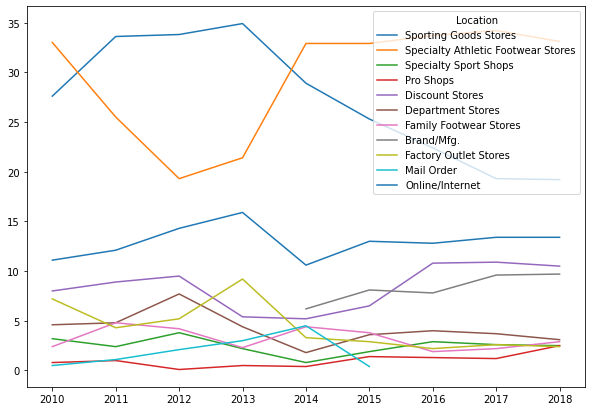

In [363]:
consumer_expf.T.plot(figsize=(10, 7))

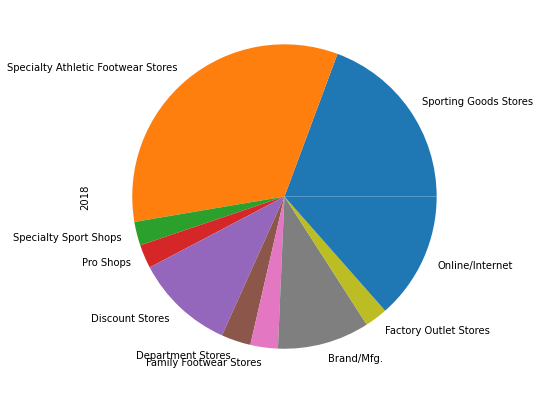

In [364]:
consumer_expf['2018'].plot.pie(figsize=(10, 7))

This plot is the percentage of total shoes bought at each location type. Notice the trend of specialty athletic footwear stores. These stores such as foot locker, finishline, etc started the 2010s in a declince then had a sharp rise in the mid 2010s starting at about 2013 this could be due to the rise in popularity of retro sneakers and them only being sold in stores. Buying shoes in person is still a very popular option because you are able to try them on. Sporting good stores such as Dick's are declining in popularity much like all retail stores and stores such as dicks do not carry the most popular shoes or exclusive shoes like Foot Locker does.

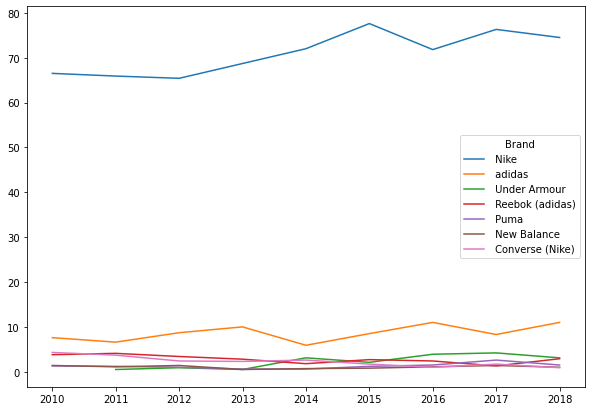

In [365]:
brand_unitf.head(7).T.plot(figsize=(10, 7))

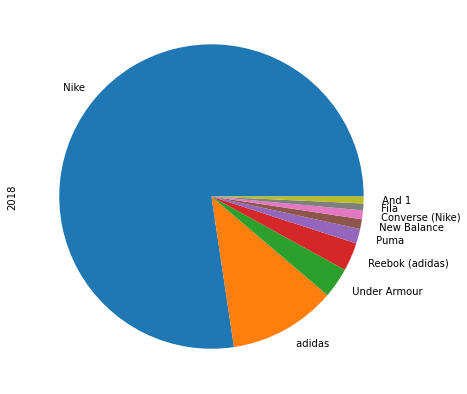

In [366]:
brand_unitf['2018'].plot.pie(figsize=(10, 7))

Here you can see the market share of shoe brands over time. Nike clearly has the majority of the market and it has been that way for the past decade. They gained this popularity in the 1980s with Micheal Jordan and his stardom made Nike the market leader. Their main competition in the 1980s was Converse, which Nike now owns.

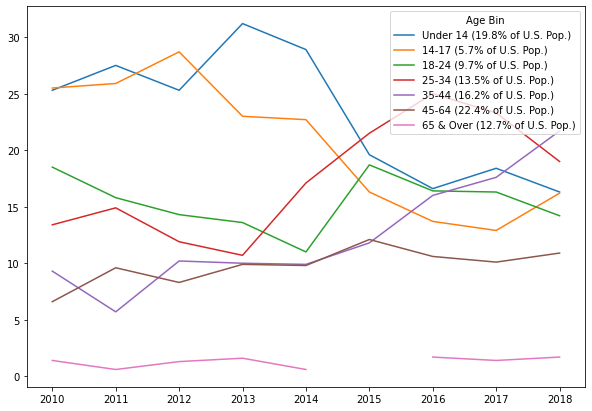

In [367]:
age_groupf.T.plot(figsize=(10, 7))

This plot shows the percentage of shoe buys based on age from 2010-2018. you can see that individuals under the age of 18 were the main consumer in the early 2010s this also changed around 2018 and the market leveled out. this does not mean that less childen are buying shoes but more people from all ages are buying shoes. The biggest change was in the 35-44 yeas old range which went from nearly last in 2011 to the leading demographic in 2018. This could also be due to the rise in popularity of retro sneakers and individuals in this demographic buying the same shoes they had or wanted in their childhood. The 65 and over crowd had no changes over the years and and still represent the lowest share of shoe buyers.

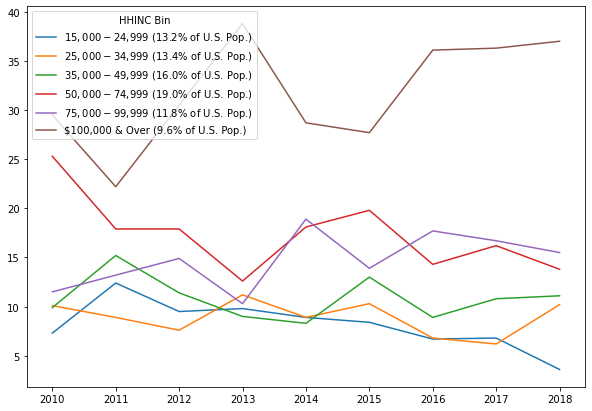

In [368]:
inc_group.T.plot(figsize=(10, 7))

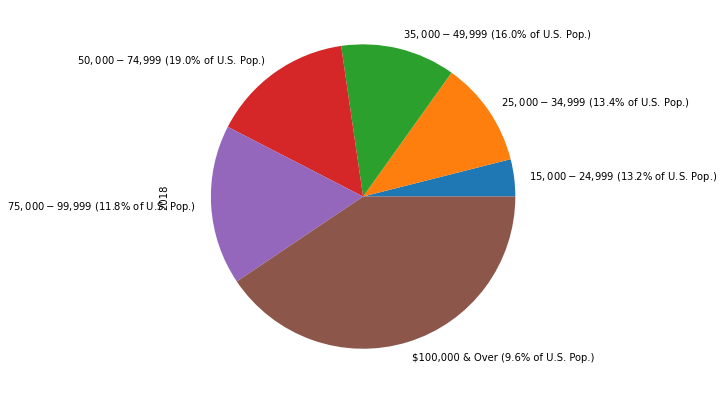

In [369]:
inc_group['2018'].plot.pie(figsize=(10, 7))

Here we can see the percentage of shoe buyers based on income over the years and in 2018. Consumers with a household income of 100,000 a year or more buy the most shoes This makes sense because they most likely have the most disposable income. They remained the leading demographic in the market even when other demographics started to fade. This could be due to the rise in price for footwear and the resellers market with high markup for limited run shoes. The 50,000-74,999 and 75,000-99,999 demographic fluctuates positions but are very similar.

# Basketball Player Salaries and Endorsements


## Data Cleaning

In [370]:
#import file
import io
player_salaries = pd.read_csv('data/Player_Salaries.csv')
player_salaries

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
0                                                 Item                      
1                                 Atlanta Hawks (2015)                      
2                                Boston Celtics (2002)                      
3                                 Brooklyn Nets (2019)                      
4                             Charlotte Hornets (2010)                      
..                                                 ...                      
394                             Minnesota Timberwolves                      
395                              Oklahoma City Thunder                      
396                                         Miami Heat                      
397                             Portland Trail Blazers                      
398  Source: Spotrac (NBA, Cap, Cap Space, Professi...                      

     Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0           NaN         NaN         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN         NaN   
2           NaN         NaN         NaN         NaN         NaN         NaN   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4           NaN         NaN         NaN         NaN         NaN         NaN   
..          ...         ...         ...         ...         ...         ...   
394         NaN         NaN         NaN         NaN         NaN         NaN   
395         NaN         NaN         NaN         NaN         NaN         NaN   
396         NaN         NaN         NaN         NaN         NaN         NaN   
397         NaN         NaN         NaN         NaN         NaN         NaN   
398         NaN         NaN         NaN         NaN         NaN         NaN   

     Unnamed: 7  Unnamed: 8  Unnamed: 9    Unnamed: 10      Unnamed: 11  
0           NaN         NaN         NaN            NaN             2021  
1           NaN         NaN         NaN            NaN    $730,000,000   
2           NaN         NaN         NaN            NaN    $360,000,000   
3           NaN         NaN         NaN            NaN  $3,200,000,000   
4           NaN         NaN         NaN            NaN    $175,000,000   
..          ...         ...         ...            ...              ...  
394         NaN         NaN         NaN  $133,229,189               NaN  
395         NaN         NaN         NaN  $133,412,334               NaN  
396         NaN         NaN         NaN  $133,897,605               NaN  
397         NaN         NaN         NaN  $137,667,430               NaN  
398         NaN         NaN         NaN            NaN              NaN  

[399 rows x 12 columns]

In [371]:
#select the rows in each table that we're interested in. I'm pulling the top 10 Basketball Players Salaries: 

top10_players = player_salaries.iloc[48:58]
top10_players.reset_index()
top10_players

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
48                  LeBron James (Los Angeles Lakers)                      
49              Stephen Curry (Golden State Warriors)                      
50                       Kevin Durant (Brooklyn Nets)                      
51             Russell Westbrook (Washington Wizards)                      
52                       James Harden (Brooklyn Nets)                      
53            Giannis Antetokounmpo (Milwaukee Bucks)                      
54              Klay Thompson (Golden State Warriors)                      
55                       Kyrie Irving (Brooklyn Nets)                      
56                          Chris Paul (Phoenix Suns)                      
57            Damian Lillard (Portland Trail Blazers)                      

    Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
48         NaN         NaN         NaN         NaN         NaN         NaN   
49         NaN         NaN         NaN         NaN         NaN         NaN   
50         NaN         NaN         NaN         NaN         NaN         NaN   
51         NaN         NaN         NaN         NaN         NaN         NaN   
52         NaN         NaN         NaN         NaN         NaN         NaN   
53         NaN         NaN         NaN         NaN         NaN         NaN   
54         NaN         NaN         NaN         NaN         NaN         NaN   
55         NaN         NaN         NaN         NaN         NaN         NaN   
56         NaN         NaN         NaN         NaN         NaN         NaN   
57         NaN         NaN         NaN         NaN         NaN         NaN   

    Unnamed: 7  Unnamed: 8  Unnamed: 9 Unnamed: 10   Unnamed: 11  
48         NaN         NaN         NaN         NaN  $31,400,000   
49         NaN         NaN         NaN         NaN  $34,000,000   
50         NaN         NaN         NaN         NaN  $31,200,000   
51         NaN         NaN         NaN         NaN  $33,000,000   
52         NaN         NaN         NaN         NaN  $33,000,000   
53         NaN         NaN         NaN         NaN  $22,000,000   
54         NaN         NaN         NaN         NaN  $28,300,000   
55         NaN         NaN         NaN         NaN  $26,000,000   
56         NaN         NaN         NaN         NaN  $33,100,000   
57         NaN         NaN         NaN         NaN  $25,000,000

In [372]:

# Dropping the columns having NaN/NaT values
top10_players = top10_players.dropna(axis=1)
  
top10_players

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
48                  LeBron James (Los Angeles Lakers)                      
49              Stephen Curry (Golden State Warriors)                      
50                       Kevin Durant (Brooklyn Nets)                      
51             Russell Westbrook (Washington Wizards)                      
52                       James Harden (Brooklyn Nets)                      
53            Giannis Antetokounmpo (Milwaukee Bucks)                      
54              Klay Thompson (Golden State Warriors)                      
55                       Kyrie Irving (Brooklyn Nets)                      
56                          Chris Paul (Phoenix Suns)                      
57            Damian Lillard (Portland Trail Blazers)                      

     Unnamed: 11  
48  $31,400,000   
49  $34,000,000   
50  $31,200,000   
51  $33,000,000   
52  $33,000,000   
53  $22,000,000   
54  $28,300,000   
55  $26,000,000   
56  $33,100,000   
57  $25,000,000

In [373]:
top10_players.reset_index()

index  \
0     48   
1     49   
2     50   
3     51   
4     52   
5     53   
6     54   
7     55   
8     56   
9     57   

  Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
0                  LeBron James (Los Angeles Lakers)                      
1              Stephen Curry (Golden State Warriors)                      
2                       Kevin Durant (Brooklyn Nets)                      
3             Russell Westbrook (Washington Wizards)                      
4                       James Harden (Brooklyn Nets)                      
5            Giannis Antetokounmpo (Milwaukee Bucks)                      
6              Klay Thompson (Golden State Warriors)                      
7                       Kyrie Irving (Brooklyn Nets)                      
8                          Chris Paul (Phoenix Suns)                      
9            Damian Lillard (Portland Trail Blazers)                      

    Unnamed: 11  
0  $31,400,000   
1  $34,000,000   
2  $31,200,000   
3  $33,000,000   
4  $33,000,000   
5  $22,000,000   
6  $28,300,000   
7  $26,000,000   
8  $33,100,000   
9  $25,000,000

In [374]:
#add column names
top10_players.columns= ["players", "salaries in 2021" ]
top10_players

players salaries in 2021
48        LeBron James (Los Angeles Lakers)     $31,400,000 
49    Stephen Curry (Golden State Warriors)     $34,000,000 
50             Kevin Durant (Brooklyn Nets)     $31,200,000 
51   Russell Westbrook (Washington Wizards)     $33,000,000 
52             James Harden (Brooklyn Nets)     $33,000,000 
53  Giannis Antetokounmpo (Milwaukee Bucks)     $22,000,000 
54    Klay Thompson (Golden State Warriors)     $28,300,000 
55             Kyrie Irving (Brooklyn Nets)     $26,000,000 
56                Chris Paul (Phoenix Suns)     $33,100,000 
57  Damian Lillard (Portland Trail Blazers)     $25,000,000

In [375]:
#set index
top10_players= top10_players.set_index("players")
top10_players.head()

salaries in 2021
players                                                
LeBron James (Los Angeles Lakers)          $31,400,000 
Stephen Curry (Golden State Warriors)      $34,000,000 
Kevin Durant (Brooklyn Nets)               $31,200,000 
Russell Westbrook (Washington Wizards)     $33,000,000 
James Harden (Brooklyn Nets)               $33,000,000

##Basketball Players Total Earnings with Endorsements##


In [376]:
#select the rows in each table that we're interested in. I'm pulling the top 10 Basketball Players Salaries plus endorsements: 

players_earnings = player_salaries.iloc[37:47]
players_earnings.reset_index()
players_earnings

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
37                  LeBron James (Los Angeles Lakers)                      
38              Stephen Curry (Golden State Warriors)                      
39                       Kevin Durant (Brooklyn Nets)                      
40             Russell Westbrook (Washington Wizards)                      
41                       James Harden (Brooklyn Nets)                      
42            Giannis Antetokounmpo (Milwaukee Bucks)                      
43              Klay Thompson (Golden State Warriors)                      
44                       Kyrie Irving (Brooklyn Nets)                      
45                          Chris Paul (Phoenix Suns)                      
46             Damian Lillard (Portland Trailblazers)                      

    Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
37         NaN         NaN         NaN         NaN         NaN         NaN   
38         NaN         NaN         NaN         NaN         NaN         NaN   
39         NaN         NaN         NaN         NaN         NaN         NaN   
40         NaN         NaN         NaN         NaN         NaN         NaN   
41         NaN         NaN         NaN         NaN         NaN         NaN   
42         NaN         NaN         NaN         NaN         NaN         NaN   
43         NaN         NaN         NaN         NaN         NaN         NaN   
44         NaN         NaN         NaN         NaN         NaN         NaN   
45         NaN         NaN         NaN         NaN         NaN         NaN   
46         NaN         NaN         NaN         NaN         NaN         NaN   

    Unnamed: 7  Unnamed: 8  Unnamed: 9 Unnamed: 10   Unnamed: 11  
37         NaN         NaN         NaN         NaN  $95,400,000   
38         NaN         NaN         NaN         NaN  $74,400,000   
39         NaN         NaN         NaN         NaN  $65,200,000   
40         NaN         NaN         NaN         NaN  $58,000,000   
41         NaN         NaN         NaN         NaN  $50,000,000   
42         NaN         NaN         NaN         NaN  $49,000,000   
43         NaN         NaN         NaN         NaN  $43,300,000   
44         NaN         NaN         NaN         NaN  $43,000,000   
45         NaN         NaN         NaN         NaN  $40,100,000   
46         NaN         NaN         NaN         NaN  $39,000,000

In [377]:
# Dropping the columns having NaN/NaT values
players_earnings = players_earnings.dropna(axis=1)
  
players_earnings

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
37                  LeBron James (Los Angeles Lakers)                      
38              Stephen Curry (Golden State Warriors)                      
39                       Kevin Durant (Brooklyn Nets)                      
40             Russell Westbrook (Washington Wizards)                      
41                       James Harden (Brooklyn Nets)                      
42            Giannis Antetokounmpo (Milwaukee Bucks)                      
43              Klay Thompson (Golden State Warriors)                      
44                       Kyrie Irving (Brooklyn Nets)                      
45                          Chris Paul (Phoenix Suns)                      
46             Damian Lillard (Portland Trailblazers)                      

     Unnamed: 11  
37  $95,400,000   
38  $74,400,000   
39  $65,200,000   
40  $58,000,000   
41  $50,000,000   
42  $49,000,000   
43  $43,300,000   
44  $43,000,000   
45  $40,100,000   
46  $39,000,000

In [378]:
#add column names
players_earnings.columns= ["players", "Total Earnings in 2021" ]
players_earnings

players Total Earnings in 2021
37        LeBron James (Los Angeles Lakers)           $95,400,000 
38    Stephen Curry (Golden State Warriors)           $74,400,000 
39             Kevin Durant (Brooklyn Nets)           $65,200,000 
40   Russell Westbrook (Washington Wizards)           $58,000,000 
41             James Harden (Brooklyn Nets)           $50,000,000 
42  Giannis Antetokounmpo (Milwaukee Bucks)           $49,000,000 
43    Klay Thompson (Golden State Warriors)           $43,300,000 
44             Kyrie Irving (Brooklyn Nets)           $43,000,000 
45                Chris Paul (Phoenix Suns)           $40,100,000 
46   Damian Lillard (Portland Trailblazers)           $39,000,000

In [379]:
#set index
players_earnings= players_earnings.set_index("players")
top10_players.head()

salaries in 2021
players                                                
LeBron James (Los Angeles Lakers)          $31,400,000 
Stephen Curry (Golden State Warriors)      $34,000,000 
Kevin Durant (Brooklyn Nets)               $31,200,000 
Russell Westbrook (Washington Wizards)     $33,000,000 
James Harden (Brooklyn Nets)               $33,000,000

In [380]:
#showing data type
players_earnings.dtypes

Total Earnings in 2021    object
dtype: object

##Basketball Players Endorsements##


In [381]:
#select the rows in each table that we're interested in. I'm pulling the top 10 Basketball Players endorsements: 

players_endorsements = player_salaries.iloc[59:69]
players_endorsements.reset_index()
players_endorsements

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
59                  Lebron James (Los Angeles Lakers)                      
60               Stephen Curry (Golden State Warriors                      
61                       Kevin Durant (Brooklyn Nets)                      
62             Russell Westbrook (Washington Wizards)                      
63                       James Harden (Brooklyn Nets)                      
64            Giannis Antetokounmpo (Milwaukee Bucks)                      
65              Klay Thompson (Golden State Warriors)                      
66                       Kyrie Irving (Brooklyn Nets)                      
67                          Chris Paul (Phoenix Suns)                      
68            Damian Lillard (Portland Trail Blazers)                      

    Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
59         NaN         NaN         NaN         NaN         NaN         NaN   
60         NaN         NaN         NaN         NaN         NaN         NaN   
61         NaN         NaN         NaN         NaN         NaN         NaN   
62         NaN         NaN         NaN         NaN         NaN         NaN   
63         NaN         NaN         NaN         NaN         NaN         NaN   
64         NaN         NaN         NaN         NaN         NaN         NaN   
65         NaN         NaN         NaN         NaN         NaN         NaN   
66         NaN         NaN         NaN         NaN         NaN         NaN   
67         NaN         NaN         NaN         NaN         NaN         NaN   
68         NaN         NaN         NaN         NaN         NaN         NaN   

    Unnamed: 7  Unnamed: 8  Unnamed: 9 Unnamed: 10   Unnamed: 11  
59         NaN         NaN         NaN         NaN  $64,000,000   
60         NaN         NaN         NaN         NaN  $40,000,000   
61         NaN         NaN         NaN         NaN  $34,000,000   
62         NaN         NaN         NaN         NaN  $25,000,000   
63         NaN         NaN         NaN         NaN  $17,000,000   
64         NaN         NaN         NaN         NaN  $27,000,000   
65         NaN         NaN         NaN         NaN  $15,000,000   
66         NaN         NaN         NaN         NaN  $17,000,000   
67         NaN         NaN         NaN         NaN   $7,000,000   
68         NaN         NaN         NaN         NaN  $14,000,000

In [382]:
# Dropping the columns having NaN/NaT values
players_endorsements = players_endorsements.dropna(axis=1)
  
players_endorsements

Basketball: NBA - Purchase Price of each Franchise, year purchased ()  \
59                  Lebron James (Los Angeles Lakers)                      
60               Stephen Curry (Golden State Warriors                      
61                       Kevin Durant (Brooklyn Nets)                      
62             Russell Westbrook (Washington Wizards)                      
63                       James Harden (Brooklyn Nets)                      
64            Giannis Antetokounmpo (Milwaukee Bucks)                      
65              Klay Thompson (Golden State Warriors)                      
66                       Kyrie Irving (Brooklyn Nets)                      
67                          Chris Paul (Phoenix Suns)                      
68            Damian Lillard (Portland Trail Blazers)                      

     Unnamed: 11  
59  $64,000,000   
60  $40,000,000   
61  $34,000,000   
62  $25,000,000   
63  $17,000,000   
64  $27,000,000   
65  $15,000,000   
66  $17,000,000   
67   $7,000,000   
68  $14,000,000

In [383]:
#add column names
players_endorsements.columns= ["Players", "Endorsements Earnings in 2021" ]
players_endorsements

Players Endorsements Earnings in 2021
59        Lebron James (Los Angeles Lakers)                  $64,000,000 
60     Stephen Curry (Golden State Warriors                  $40,000,000 
61             Kevin Durant (Brooklyn Nets)                  $34,000,000 
62   Russell Westbrook (Washington Wizards)                  $25,000,000 
63             James Harden (Brooklyn Nets)                  $17,000,000 
64  Giannis Antetokounmpo (Milwaukee Bucks)                  $27,000,000 
65    Klay Thompson (Golden State Warriors)                  $15,000,000 
66             Kyrie Irving (Brooklyn Nets)                  $17,000,000 
67                Chris Paul (Phoenix Suns)                   $7,000,000 
68  Damian Lillard (Portland Trail Blazers)                  $14,000,000

In [384]:
#set index
players_endorsements= players_endorsements.set_index("Players")
players_endorsements.head()

Endorsements Earnings in 2021
Players                                                             
Lebron James (Los Angeles Lakers)                       $64,000,000 
Stephen Curry (Golden State Warriors                    $40,000,000 
Kevin Durant (Brooklyn Nets)                            $34,000,000 
Russell Westbrook (Washington Wizards)                  $25,000,000 
James Harden (Brooklyn Nets)                            $17,000,000

In [385]:
#showing data type
players_endorsements.dtypes

Endorsements Earnings in 2021    object
dtype: object

In [386]:
players_endorsements.shape

(10, 1)

## EDA

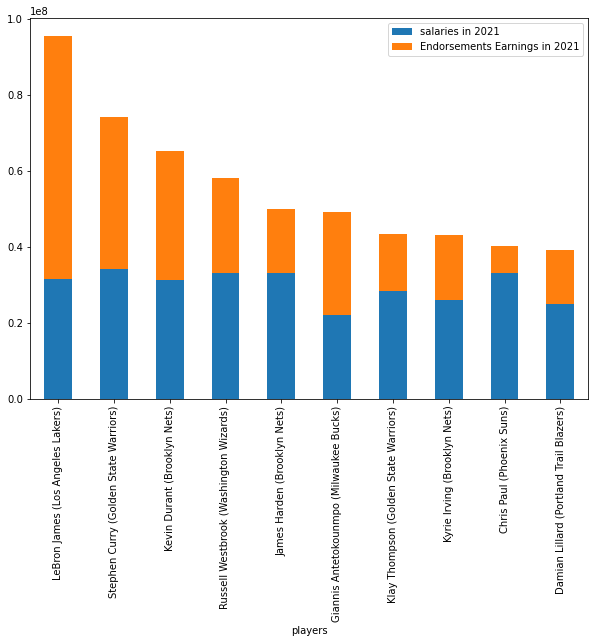

In [387]:
players_salaries_endorsements = top10_players
players_salaries_endorsements['Endorsements Earnings in 2021'] = players_endorsements['Endorsements Earnings in 2021']
players_salaries_endorsements['Endorsements Earnings in 2021'].iloc[0] = '$64,000,000'
players_salaries_endorsements['Endorsements Earnings in 2021'].iloc[1] = '$40,000,000'
players_salaries_endorsements = players_salaries_endorsements.apply(lambda x: x.str.replace(',', ''), axis=1).apply(lambda x: x.str.replace('$', ''), axis=1).apply(lambda x: x.astype(float), axis=1)
players_salaries_endorsements.plot.bar(figsize=(10, 7), stacked=True)


In [388]:
players_salaries_endorsements.corr()

salaries in 2021  Endorsements Earnings in 2021
salaries in 2021                       1.000000                       0.220415
Endorsements Earnings in 2021          0.220415                       1.000000

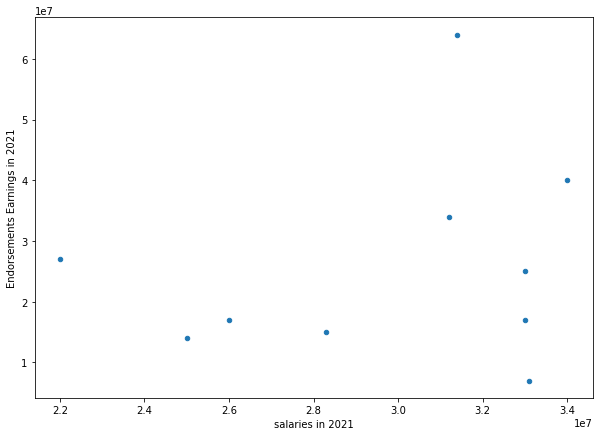

In [389]:
players_salaries_endorsements.plot.scatter(x='salaries in 2021', y='Endorsements Earnings in 2021', figsize=(10, 7))

We can see here that there does not seem to be a strong correlation between salary and endorsements. I would like to get disaggregated data to truly analyze this because this is just data on the top ten earning players.

# Fan_Market_Summary

In [390]:
# create dataframe with imported file
import io
fan_market_summary = pd.read_csv('data/Fan_Market_Summary.csv')
fan_market_summary

\
0                   Basketball: NBA Fan Market Summary     NaN     NaN   
1                                                  NaN     NaN     NaN   
2                                                 Item  2010.0    2011   
3           --------------------TOTAL NBA FANS/AVIDITY     NaN     NaN   
4    Total Number of NBA Fans Age 13+ (View and/or ...     NaN  77,794   
..                                                 ...     ...     ...   
266                                                NaN     NaN     NaN   
267                                                NaN     NaN     NaN   
268                                                NaN     NaN     NaN   
269                                                NaN     NaN     NaN   
270                                                NaN     NaN     NaN   

                                                                               \
0       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
1       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
2      2012    2013    2014    2015     2016      2017       2018        2019   
3       NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
4    85,556  74,187  76,026  83,990   81,141    74,955     74,548      70,032   
..      ...     ...     ...     ...      ...       ...        ...         ...   
266     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
267     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
268     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
269     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   
270     NaN     NaN     NaN     NaN      NaN       NaN        NaN         NaN   

                  Unnamed: 12  
0            NaN          NaN  
1            NaN          NaN  
2           2020          NaN  
3            NaN          NaN  
4         68,088          NaN  
..           ...          ...  
266          NaN          NaN  
267          NaN          NaN  
268          NaN          NaN  
269          NaN          NaN  
270          NaN          NaN  

[271 rows x 13 columns]

In [391]:
#print info to see null value counts
fan_market_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0                 244 non-null    object 
 1                 3 non-null      float64
 2                 57 non-null     object 
 3                 164 non-null    object 
 4                 166 non-null    object 
 5                 168 non-null    object 
 6                 169 non-null    object 
 7                 166 non-null    object 
 8                 179 non-null    object 
 9                 186 non-null    object 
 10                194 non-null    object 
 11                188 non-null    object 
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(2), object(11)
memory usage: 27.6+ KB


In [392]:
#rename columns to organize data
fan_market_summary.columns = ['label', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'm']
fan_market_summary


label    2010    2011  \
0                   Basketball: NBA Fan Market Summary     NaN     NaN   
1                                                  NaN     NaN     NaN   
2                                                 Item  2010.0    2011   
3           --------------------TOTAL NBA FANS/AVIDITY     NaN     NaN   
4    Total Number of NBA Fans Age 13+ (View and/or ...     NaN  77,794   
..                                                 ...     ...     ...   
266                                                NaN     NaN     NaN   
267                                                NaN     NaN     NaN   
268                                                NaN     NaN     NaN   
269                                                NaN     NaN     NaN   
270                                                NaN     NaN     NaN   

       2012    2013    2014    2015    2016    2017    2018    2019    2020  \
0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2      2012    2013    2014    2015    2016    2017    2018    2019    2020   
3       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    85,556  74,187  76,026  83,990  81,141  74,955  74,548  70,032  68,088   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
266     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
267     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
268     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
269     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
270     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      m  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
..   ..  
266 NaN  
267 NaN  
268 NaN  
269 NaN  
270 NaN  

[271 rows x 13 columns]

In [393]:
#drop rows that contain all null values and m column
fan_market_summary = fan_market_summary.dropna(how='all')
fan_market_summary = fan_market_summary.drop(columns='m')
fan_market_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 248
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   244 non-null    object 
 1   2010    3 non-null      float64
 2   2011    57 non-null     object 
 3   2012    164 non-null    object 
 4   2013    166 non-null    object 
 5   2014    168 non-null    object 
 6   2015    169 non-null    object 
 7   2016    166 non-null    object 
 8   2017    179 non-null    object 
 9   2018    186 non-null    object 
 10  2019    194 non-null    object 
 11  2020    188 non-null    object 
dtypes: float64(1), object(11)
memory usage: 24.8+ KB


In [394]:
#drop 2010 column because it contains no data
fan_market_summary['2010'].value_counts()
fan_market_summary = fan_market_summary.drop(columns='2010')

In [395]:
#create total_fans sub-table
total_fans = fan_market_summary.iloc[3:18]
total_fans

label    2011    2012    2013  \
4   Total Number of NBA Fans Age 13+ (View and/or ...  77,794  85,556  74,187   
5              Total Number Attending Games (add 000)  13,758  11,386  12,662   
6         % of Attendees who Attended More Than 1/yr.   50.7%   46.3%   42.4%   
7            % of Attendees who Attended 4+ Times/yr.   24.9%   12.5%   15.5%   
8   Total Viewed at Least One Game on TV and/or On...  73,938  82,046  69,719   
9                Total Number Viewing on TV (add 000)  73,003  80,967  68,451   
10         % of TV Viewers who Viewed More Than 2/yr.   87.5%   79.8%   80.1%   
11           % of TV Viewers who Viewed 16+ Times/yr.   24.3%   22.4%   23.7%   
12  Number of TV Viewers Viewed at Least One Game ...     NaN     NaN     NaN   
13  Number of TV Viewers Who Streamed at Least One...     NaN     NaN     NaN   
14  % of all TV Viewers Who Streamed at Least One ...     NaN     NaN     NaN   
15        Total Number Viewing Games Online (add 000)   6,255   7,224   8,656   
16                % Online Game Viewers of Total Fans    8.0%    8.4%   11.7%   
17  Total Number of NBA Fans Involved in eSports (...     NaN     NaN     NaN   
18  % of Total NBA Fans Involved in eSports (Parti...     NaN     NaN     NaN   

      2014    2015    2016    2017    2018    2019    2020  
4   76,026  83,990  81,141  74,955  74,548  70,032  68,088  
5   13,229  13,354  12,211  11,315  13,943  13,889     ---  
6    51.5%   56.1%   59.2%   52.1%   62.9%   51.0%     ---  
7    17.7%   22.2%   19.3%   15.7%   26.4%   19.8%     ---  
8   71,566  80,214  77,559  71,355  69,612  66,220  68,088  
9   70,029  77,946  75,989  69,088  67,548  63,545  64,467  
10   74.6%   80.0%   75.4%   74.1%   75.2%   73.3%   73.6%  
11   23.5%   23.7%   20.4%   21.5%   22.5%   23.8%   25.0%  
12     NaN     NaN     NaN  65,360  62,446  57,252  56,811  
13     NaN     NaN     NaN  10,033  10,850  10,531  19,593  
14     NaN     NaN     NaN   14.5%   16.1%   15.8%   30.4%  
15   9,046  16,054  10,927  10,849  10,328   8,685  20,479  
16   11.9%   19.1%   13.5%   14.5%   14.8%   12.4%   30.1%  
17     NaN     NaN  11,624  12,589  12,716   9,036  17,331  
18     NaN     NaN   14.3%   16.8%   17.1%   12.9%   25.5%

In [396]:
#create function to clean sub-tables
def clean_set(data):
    data = data.dropna(subset=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], how='all')
    data = data.replace('---', np.nan)
    data = data.apply(lambda x: x.str.replace(',', ''), axis=1)
    data = data.apply(lambda x: x.str.replace('%', ''), axis=1)
    data = data.apply(lambda x: x.str.replace('$', ''), axis=1)
    data.index = data['label']
    data = data.drop(columns='label')
    data = data.apply(lambda x: x.astype(float), axis=1)
    return data

In [397]:
#clean total_fans
total_fans = clean_set(total_fans)
total_fans

2011     2012     2013  \
label                                                                           
Total Number of NBA Fans Age 13+ (View and/or A...  77794.0  85556.0  74187.0   
Total Number Attending Games (add 000)              13758.0  11386.0  12662.0   
 of Attendees who Attended More Than 1/yr.             50.7     46.3     42.4   
 of Attendees who Attended 4+ Times/yr.                24.9     12.5     15.5   
Total Viewed at Least One Game on TV and/or Onl...  73938.0  82046.0  69719.0   
Total Number Viewing on TV (add 000)                73003.0  80967.0  68451.0   
 of TV Viewers who Viewed More Than 2/yr.              87.5     79.8     80.1   
 of TV Viewers who Viewed 16+ Times/yr.                24.3     22.4     23.7   
Number of TV Viewers Viewed at Least One Game T...      NaN      NaN      NaN   
Number of TV Viewers Who Streamed at Least One ...      NaN      NaN      NaN   
 of all TV Viewers Who Streamed at Least One Ga...      NaN      NaN      NaN   
Total Number Viewing Games Online (add 000)          6255.0   7224.0   8656.0   
 Online Game Viewers of Total Fans                      8.0      8.4     11.7   
Total Number of NBA Fans Involved in eSports (P...      NaN      NaN      NaN   
 of Total NBA Fans Involved in eSports (Partici...      NaN      NaN      NaN   

                                                       2014     2015     2016  \
label                                                                           
Total Number of NBA Fans Age 13+ (View and/or A...  76026.0  83990.0  81141.0   
Total Number Attending Games (add 000)              13229.0  13354.0  12211.0   
 of Attendees who Attended More Than 1/yr.             51.5     56.1     59.2   
 of Attendees who Attended 4+ Times/yr.                17.7     22.2     19.3   
Total Viewed at Least One Game on TV and/or Onl...  71566.0  80214.0  77559.0   
Total Number Viewing on TV (add 000)                70029.0  77946.0  75989.0   
 of TV Viewers who Viewed More Than 2/yr.              74.6     80.0     75.4   
 of TV Viewers who Viewed 16+ Times/yr.                23.5     23.7     20.4   
Number of TV Viewers Viewed at Least One Game T...      NaN      NaN      NaN   
Number of TV Viewers Who Streamed at Least One ...      NaN      NaN      NaN   
 of all TV Viewers Who Streamed at Least One Ga...      NaN      NaN      NaN   
Total Number Viewing Games Online (add 000)          9046.0  16054.0  10927.0   
 Online Game Viewers of Total Fans                     11.9     19.1     13.5   
Total Number of NBA Fans Involved in eSports (P...      NaN      NaN  11624.0   
 of Total NBA Fans Involved in eSports (Partici...      NaN      NaN     14.3   

                                                       2017     2018     2019  \
label                                                                           
Total Number of NBA Fans Age 13+ (View and/or A...  74955.0  74548.0  70032.0   
Total Number Attending Games (add 000)              11315.0  13943.0  13889.0   
 of Attendees who Attended More Than 1/yr.             52.1     62.9     51.0   
 of Attendees who Attended 4+ Times/yr.                15.7     26.4     19.8   
Total Viewed at Least One Game on TV and/or Onl...  71355.0  69612.0  66220.0   
Total Number Viewing on TV (add 000)                69088.0  67548.0  63545.0   
 of TV Viewers who Viewed More Than 2/yr.              74.1     75.2     73.3   
 of TV Viewers who Viewed 16+ Times/yr.                21.5     22.5     23.8   
Number of TV Viewers Viewed at Least One Game T...  65360.0  62446.0  57252.0   
Number of TV Viewers Who Streamed at Least One ...  10033.0  10850.0  10531.0   
 of all TV Viewers Who Streamed at Least One Ga...     14.5     16.1     15.8   
Total Number Viewing Games Online (add 000)         10849.0  10328.0   8685.0   
 Online Game Viewers of Total Fans                     14.5     14.8     12.4   
Total Number of NBA Fans Involved in eSports (P...  12589.0  12716.0   9036.0   
 of

In [398]:
#create and clean fan_demograpics the sub-table
fan_demographics = fan_market_summary.iloc[19:48]
fan_demographics = clean_set(fan_demographics)
fan_demographics

2011   2012   2013  \
label                                                                     
13-17                                                 9.8    9.0    7.8   
18-34                                                31.4   26.3   30.6   
35-49                                                26.0   22.4   21.8   
50-64                                                25.2   24.9   22.3   
65+                                                   7.6   17.5   17.6   
Total                                               100.0  100.0  100.0   
Generation Z (13-22)                                  NaN    NaN    NaN   
Millennials (23-38)                                   NaN    NaN    NaN   
Generation X (39-54)                                  NaN    NaN    NaN   
Boomers (55-73)                                       NaN    NaN    NaN   
Total (less than 100 because ages 74+ not inclu...    NaN    NaN    NaN   
Male                                                 62.1   55.6   56.8   
Female                                               37.9   44.4   43.2   
Total                                               100.0  100.0  100.0   
Under 25000                                          14.0   20.9   20.5   
25000-49999                                          21.0   23.0   22.0   
50000-99999                                          35.5   31.6   31.4   
100000 or more                                       29.5   24.5   26.1   
Total                                               100.0  100.0  100.0   
Northeast                                            15.1   16.7   20.5   
Midwest                                              23.1   22.9   22.0   
South                                                37.1   37.7   31.4   
West                                                 24.7   22.7   26.1   
Total                                               100.0  100.0  100.0   

                                                     2014   2015   2016  \
label                                                                     
13-17                                                 7.1    5.8    5.0   
18-34                                                32.2   30.7   27.2   
35-49                                                21.7   26.5   25.3   
50-64                                                25.6   22.7   25.3   
65+                                                  13.4   14.3   17.3   
Total                                               100.0  100.0  100.0   
Generation Z (13-22)                                  NaN    NaN    NaN   
Millennials (23-38)                                   NaN    NaN    NaN   
Generation X (39-54)                                  NaN    NaN    NaN   
Boomers (55-73)                                       NaN    NaN    NaN   
Total (less than 100 because ages 74+ not inclu...    NaN    NaN    NaN   
Male                                                 60.5   59.8   57.8   
Female                                               39.5   40.2   42.2   
Total                                               100.0  100.0  100.0   
Under 25000                                          16.5   15.8   15.7   
25000-49999                                          20.8   21.5   21.6   
50000-99999                                          35.7   32.4   32.0   
100000 or more                                       27.1   30.3   30.7   
Total                                               100.0  100.0  100.0   
Northeast                                            16.0   16.0   16.1   
Midwest                                              24.4   22.3   23.4   
South                                                36.9   35.2   34.1   
West                                                 22.8   26.4   26.4   
Total                                               100.0  100.0  100.0   

                                                     2017   2018   2019   2020  
label                                                                 

In [399]:
medain_age_by_segment = fan_market_summary.iloc[49:66]
medain_age_by_segment = clean_set(medain_age_by_segment)
medain_age_by_segment

2011  2012  2013  2014  \
label                                                                        
All Fans                                             NaN  44.0  42.0  42.0   
Attended at Least One NBA Game                       NaN  35.0  33.0  31.0   
Attended 4+ NBA Games                                NaN  35.0  36.0  34.0   
Viewed at Least One NBA Game On TV                   NaN  45.0  43.0  44.0   
Viewed 16+ NBA Games on TV                           NaN  45.0  43.0  44.0   
TV Viewers Who Viewed at Least One Game Traditi...   NaN   NaN   NaN   NaN   
TV Viewers Who Streamed at Least One Game to TV      NaN   NaN   NaN   NaN   
Viewed at Least One Game Online (Computer/Table...   NaN  29.0  29.0  28.0   
Followed NBA on Facebook                             NaN  30.0  31.0  31.0   
Followed NBA on Twitter                              NaN  26.0  30.0  29.0   
Purchased NBA Logo Apparel                           NaN  35.0  34.0  33.0   
Used Smartphone for any Sports-related Purpose       NaN  35.0  33.0  35.0   
Used Smartphone to View at Least One NBA Game        NaN  31.0  28.0  30.0   
Used Tablet for any Sports-related Purpose           NaN  38.0  37.0  35.0   
Used Tablet to View at Least One NBA Game            NaN  30.0  31.0  26.0   
Used Total Mobile* for any Sports-related Purpose    NaN  35.0  35.0  36.0   
Used Total Mobile* to view at Least One NBA Game     NaN  32.0  30.0  29.0   

                                                    2015  2016  2017  2018  \
label                                                                        
All Fans                                            41.0  45.0  45.0  46.0   
Attended at Least One NBA Game                      35.0  38.0  40.0  38.0   
Attended 4+ NBA Games                               35.0  39.0  42.0  38.0   
Viewed at Least One NBA Game On TV                  42.0  46.0  47.0  47.0   
Viewed 16+ NBA Games on TV                          47.0  48.0  46.0  52.0   
TV Viewers Who Viewed at Least One Game Traditi...   NaN   NaN  47.0  48.0   
TV Viewers Who Streamed at Least One Game to TV      NaN   NaN  32.0  37.0   
Viewed at Least One Game Online (Computer/Table...  31.0  33.0  32.0  33.0   
Followed NBA on Facebook                            35.0  34.0  36.0  38.0   
Followed NBA on Twitter                             33.0  32.0  34.0  37.0   
Purchased NBA Logo Apparel                          34.0  34.0  36.0  37.0   
Used Smartphone for any Sports-related Purpose      36.0  40.0  40.0  41.0   
Used Smartphone to View at Least One NBA Game       31.0  30.0  31.0  33.0   
Used Tablet for any Sports-related Purpose          36.0  40.0  41.0  40.0   
Used Tablet to View at Least One NBA Game           32.0  34.0  34.0  35.0   
Used Total Mobile* for any Sports-related Purpose   37.0  40.0  41.0  42.0   
Used Total Mobile* to view at Least One NBA Game    32.0  33.0  32.0  33.0   

                                                    2019  2020  
label                                                           
All Fans                                            45.0  42.0  
Attended at Least One NBA Game                      37.0   NaN  
Attended 4+ NBA Games                               36.0   NaN  
Viewed at Least One NBA Game On TV                  46.0  43.0  
Viewed 16+ NBA Games on TV                          50.0  42.0  
TV Viewers Who Viewed at Least One Game Traditi...  48.0  45.0  
TV Viewers Who Streamed at Least One Game to TV     33.0  34.0  
Viewed at Least One Game Online (Computer/Table...  30.0  33.0  
Followed NBA on Facebook                            36.0  38.0  
Followed NBA on Twitter                             33.0  35.0  
Purchased NBA Logo Apparel                          34.0  35.0  
Used Smartphone for any Sports-related Purpose      40.0  38.0  
Used Smartphone to View at Least One NBA Game       30.0  32.0  
Used Tablet for any Sports-related Purpose          40.0  38.0  
Used Tablet to View at Least One NBA Game     

In [400]:
median_income = fan_market_summary.iloc[67:84]
median_income = clean_set(median_income)
median_income

2011     2012     2013  \
label                                                                        
All Fans                                             NaN  57800.0  60200.0   
Attended at Least One NBA Game                       NaN  58200.0  69900.0   
Attended 4+ NBA Games                                NaN  46500.0  69600.0   
Viewed at Least One NBA Game on TV                   NaN  58400.0  59300.0   
Viewed 16+ NBA Games on TV                           NaN  58400.0  61600.0   
TV Viewers Who Viewed at Least One Game Traditi...   NaN      NaN      NaN   
TV Viewers Who Streamed at Least One Game to TV      NaN      NaN      NaN   
Viewed at Least One Game Online (Computer/Table...   NaN  45000.0  55900.0   
Followed NBA on Facebook                             NaN  42600.0  48700.0   
Followed NBA on Twitter                              NaN  43900.0  41900.0   
Purchased NBA Logo Apparel                           NaN  49600.0  56700.0   
Used Smartphone for any Sports-related Purpose       NaN  56800.0  60600.0   
Used Smartphone to View at Least One NBA Game        NaN  41300.0  61300.0   
Used Tablet for any Sports-related Purpose           NaN  66700.0  74100.0   
Used Tablet to View at Least One NBA Game            NaN  53700.0  73200.0   
Used Total Mobile* for any Sports-related Purpose    NaN  57700.0  62200.0   
Used Total Mobile* to view at Least One NBA Game     NaN  48300.0  62500.0   

                                                       2014      2015  \
label                                                                   
All Fans                                            66800.0   66000.0   
Attended at Least One NBA Game                      70400.0   81100.0   
Attended 4+ NBA Games                               79700.0  106800.0   
Viewed at Least One NBA Game on TV                  66800.0   66000.0   
Viewed 16+ NBA Games on TV                          71000.0   67200.0   
TV Viewers Who Viewed at Least One Game Traditi...      NaN       NaN   
TV Viewers Who Streamed at Least One Game to TV         NaN       NaN   
Viewed at Least One Game Online (Computer/Table...  54100.0   64000.0   
Followed NBA on Facebook                            61100.0   61600.0   
Followed NBA on Twitter                             64900.0   65600.0   
Purchased NBA Logo Apparel                          67800.0   63600.0   
Used Smartphone for any Sports-related Purpose      70200.0   70800.0   
Used Smartphone to View at Least One NBA Game       56300.0   65900.0   
Used Tablet for any Sports-related Purpose          73500.0   71800.0   
Used Tablet to View at Least One NBA Game           63400.0   71100.0   
Used Total Mobile* for any Sports-related Purpose   69900.0   69900.0   
Used Total Mobile* to view at Least One NBA Game    62700.0   67800.0   

                                                       2016     2017  \
label                                                                  
All Fans                                            67600.0  75000.0   
Attended at Least One NBA Game                      73100.0  93000.0   
Attended 4+ NBA Games                               94200.0  87600.0   
Viewed at Least One NBA Game on TV                  67700.0  75400.0   
Viewed 16+ NBA Games on TV                          70800.0  74500.0   
TV Viewers Who Viewed at Least One Game Traditi...      NaN  76600.0   
TV Viewers Who Streamed at Least One Game to TV         NaN  60800.0   
Viewed at Least One Game Online (Computer/Table...  65900.0  61200.0   
Followed NBA on Facebook                            55800.0  61200.0   
Followed NBA on Twitter                             59300.0  67200.0   
Purchased NBA Logo Apparel                          56200.0  74600.0   
Used Smartphone for any Sports-related Purpose      71400.0  78600.0   
Used Smartphone to View at Least One NBA Game       58200.0  58900.0   
Used Tablet for any Sports-related Purpose          76400.0  82700.0   
Used Tablet to View at Least 

In [401]:
online_usg_by_device = fan_market_summary.iloc[85:100]
online_usg_by_device = clean_set(online_usg_by_device)
online_usg_by_device

2011     2012     2013  \
label                                                                          
Total Number Using Online Device For Any Sports...     NaN  68832.0  60437.0   
Total Number Viewing at least one game on Onlin...  6255.0   7224.0   8656.0   
Total Number Using Computer for any Sports-rela...     NaN  66366.0  57121.0   
Total Number Viewing at Least One Game on Compu...  5306.0   5729.0   6989.0   
Total Number Using Tablet for any Sports-relate...     NaN  19839.0  25115.0   
Total Number Viewing at Least One Game on Table...  1478.0   1568.0   3510.0   
Total Number using Smartphone for any Sports-re...     NaN  39662.0  40991.0   
Total Number Viewing at Least One Game on Smart...  1950.0   1914.0   3019.0   
Total Number using Mobile Device for any Sports...     NaN  43658.0  46088.0   
Total Number Viewing at Least One Game on Mobil...     NaN   3059.0   4690.0   

                                                       2014     2015     2016  \
label                                                                           
Total Number Using Online Device For Any Sports...  65022.0  74967.0  68502.0   
Total Number Viewing at least one game on Onlin...   9046.0  16054.0  10927.0   
Total Number Using Computer for any Sports-rela...  61237.0  68067.0  59553.0   
Total Number Viewing at Least One Game on Compu...   7278.0  11837.0   8067.0   
Total Number Using Tablet for any Sports-relate...  32225.0  41334.0  35428.0   
Total Number Viewing at Least One Game on Table...   4043.0   6755.0   5027.0   
Total Number using Smartphone for any Sports-re...  47351.0  56301.0  54800.0   
Total Number Viewing at Least One Game on Smart...   3542.0   5886.0   5984.0   
Total Number using Mobile Device for any Sports...  51913.0  61104.0  58912.0   
Total Number Viewing at Least One Game on Mobil...   5168.0   9373.0   7898.0   

                                                       2017     2018     2019  \
label                                                                           
Total Number Using Online Device For Any Sports...  64330.0  63507.0  57745.0   
Total Number Viewing at least one game on Onlin...  10849.0  10328.0   8685.0   
Total Number Using Computer for any Sports-rela...  54054.0  52318.0  46213.0   
Total Number Viewing at Least One Game on Compu...   6859.0   6106.0   4745.0   
Total Number Using Tablet for any Sports-relate...  34390.0  31874.0  24653.0   
Total Number Viewing at Least One Game on Table...   4383.0   4817.0   2979.0   
Total Number using Smartphone for any Sports-re...  52469.0  52762.0  48877.0   
Total Number Viewing at Least One Game on Smart...   6310.0   7033.0   4278.0   
Total Number using Mobile Device for any Sports...  55838.0  55516.0  51483.0   
Total Number Viewing at Least One Game on Mobil...   7957.0   8348.0   6041.0   

                                                         2020  
label                                                          
Total Number Using Online Device For Any Sports...    60113.0  
Total Number Viewing at least one game on Onlin...  2047900.0  
Total Number Using Computer for any Sports-rela...    53416.0  
Total Number Viewing at Least One Game on Compu...    13732.0  
Total Number Using Tablet for any Sports-relate...   333593.0  
Total Number Viewing at Least One Game on Table...     8234.0  
Total Number using Smartphone for any Sports-re...    52031.0  
Total Number Viewing at Least One Game on Smart...    13074.0  
Total Number using Mobile Device for any Sports...    54103.0  
Total Number Viewing at Least One Game on Mobil...    15302.0

In [402]:
social_media = fan_market_summary.iloc[101:109]
social_media = clean_set(social_media)
social_media

2011     2012     2013  \
label                                                                           
Follow NBA on Facebook - Total all Followers (a...  17052.0  20495.0  20039.0   
Follow Facebook Daily (add 000)                      3015.0   3897.0   4101.0   
Follow Facebook 4-6 days a week (add 000)            2353.0   2282.0   2199.0   
Follow Facebook 1 to 3 days a week  (add 000)       11683.0  14316.0  13739.0   
Follow NBA on Twitter - Total all Followers (ad...   7933.0  10647.0  10278.0   
Follow Twitter Daily (add 000)                       2820.0   3628.0   3218.0   
Follow Twitter 4-6 days a week (add 000)              543.0   1289.0   1307.0   
Follow Twitter 1 to 3 days a week or less (add ...   4570.0   5730.0   5752.0   

                                                       2014     2015     2016  \
label                                                                           
Follow NBA on Facebook - Total all Followers (a...  20923.0  35746.0  26513.0   
Follow Facebook Daily (add 000)                      5146.0   5828.0   4913.0   
Follow Facebook 4-6 days a week (add 000)            2308.0   4547.0   3493.0   
Follow Facebook 1 to 3 days a week  (add 000)       13468.0  25370.0  18106.0   
Follow NBA on Twitter - Total all Followers (ad...  12713.0  21521.0  13959.0   
Follow Twitter Daily (add 000)                       3401.0   3674.0   3131.0   
Follow Twitter 4-6 days a week (add 000)             2101.0   3772.0   2078.0   
Follow Twitter 1 to 3 days a week or less (add ...   7212.0  14076.0   8750.0   

                                                       2017     2018     2019  \
label                                                                           
Follow NBA on Facebook - Total all Followers (a...  28565.0  27036.0  22889.0   
Follow Facebook Daily (add 000)                      3917.0   4888.0   2300.0   
Follow Facebook 4-6 days a week (add 000)            3718.0   3088.0   3597.0   
Follow Facebook 1 to 3 days a week  (add 000)       20931.0  19061.0  16993.0   
Follow NBA on Twitter - Total all Followers (ad...  16243.0  15880.0  14325.0   
Follow Twitter Daily (add 000)                       2707.0   3446.0   2729.0   
Follow Twitter 4-6 days a week (add 000)             2374.0   2875.0   2149.0   
Follow Twitter 1 to 3 days a week or less (add ...  11163.0   9559.0   9447.0   

                                                       2020  
label                                                        
Follow NBA on Facebook - Total all Followers (a...  34330.0  
Follow Facebook Daily (add 000)                      6455.0  
Follow Facebook 4-6 days a week (add 000)            5697.0  
Follow Facebook 1 to 3 days a week  (add 000)        9050.0  
Follow NBA on Twitter - Total all Followers (ad...  23828.0  
Follow Twitter Daily (add 000)                       4998.0  
Follow Twitter 4-6 days a week (add 000)             4918.0  
Follow Twitter 1 to 3 days a week or less (add ...   5611.0

In [403]:
apparel_purchase = fan_market_summary.iloc[110:117]
apparel_purchase = clean_set(apparel_purchase)
apparel_purchase

2011      2012  \
label                                                                     
 of All Fans Purchased Sports Logo Apparel               19.1      16.5   
 of fans who used a computer to view at least o...       50.5      40.3   
 of fans who used a Tablet to view at least one...       65.6      57.6   
 of fans who used a Smartphone to view at least...       55.7      43.6   
 of Facebook Followers Purchased Sports Logo Ap...       41.7      30.9   
 of Twitter Followers Purchased Sports Logo App...       42.9      34.3   
Expenditures for Sports Logo Apparel (add 000)      1038904.0  960616.0   

                                                        2013       2014  \
label                                                                     
 of All Fans Purchased Sports Logo Apparel              18.1       19.1   
 of fans who used a computer to view at least o...      46.2       44.9   
 of fans who used a Tablet to view at least one...      49.6       54.3   
 of fans who used a Smartphone to view at least...      42.5       65.0   
 of Facebook Followers Purchased Sports Logo Ap...      35.3       40.9   
 of Twitter Followers Purchased Sports Logo App...      34.6       41.1   
Expenditures for Sports Logo Apparel (add 000)      902121.0  1126583.0   

                                                         2015       2016  \
label                                                                      
 of All Fans Purchased Sports Logo Apparel               23.9       20.3   
 of fans who used a computer to view at least o...       45.7       58.0   
 of fans who used a Tablet to view at least one...       53.3       60.0   
 of fans who used a Smartphone to view at least...       51.8       64.1   
 of Facebook Followers Purchased Sports Logo Ap...       42.4       39.9   
 of Twitter Followers Purchased Sports Logo App...       44.7       41.9   
Expenditures for Sports Logo Apparel (add 000)      1272370.0  1125701.0   

                                                         2017       2018  \
label                                                                      
 of All Fans Purchased Sports Logo Apparel               21.1       26.9   
 of fans who used a computer to view at least o...       47.9       65.3   
 of fans who used a Tablet to view at least one...       55.3       68.8   
 of fans who used a Smartphone to view at least...       55.4       68.8   
 of Facebook Followers Purchased Sports Logo Ap...       36.7       46.8   
 of Twitter Followers Purchased Sports Logo App...       39.0       50.6   
Expenditures for Sports Logo Apparel (add 000)      1148535.0  1480613.0   

                                                         2019       2020  
label                                                                     
 of All Fans Purchased Sports Logo Apparel               19.2       27.4  
 of fans who used a computer to view at least o...       39.1       51.7  
 of fans who used a Tablet to view at least one...       58.4       60.6  
 of fans who used a Smartphone to view at least...       52.9       53.9  
 of Facebook Followers Purchased Sports Logo Ap...       35.5       41.4  
 of Twitter Followers Purchased Sports Logo App...       35.5       41.2  
Expenditures for Sports Logo Apparel (add 000)      1189284.0  1392110.0

In [404]:
bball_part = fan_market_summary.iloc[118:124]
bball_part = clean_set(bball_part)
bball_part

2011  2012  2013  2014  \
label                                                                        
 of all fans who participated in Basketball at ...  20.7  17.6  21.6  20.4   
 of Computer game viewers who participated in B...  42.6  36.3  48.0  48.1   
 of Tablet game viewers who participated in Bas...  53.4  31.8  43.4  46.0   
 of Smartphone game viewers who participated in...  50.5  42.0  46.6  58.0   
 of Facebook followers who participated in Bask...  35.3  32.4  35.7  32.3   
 of Twitter followers who participated in Baske...  39.2  42.1  38.8  34.9   

                                                    2015  2016  2017  2018  \
label                                                                        
 of all fans who participated in Basketball at ...  20.5   NaN   NaN   NaN   
 of Computer game viewers who participated in B...  35.4   NaN   NaN   NaN   
 of Tablet game viewers who participated in Bas...  34.4   NaN   NaN   NaN   
 of Smartphone game viewers who participated in...  41.2   NaN   NaN   NaN   
 of Facebook followers who participated in Bask...  29.8   NaN   NaN   NaN   
 of Twitter followers who participated in Baske...  33.5   NaN   NaN   NaN   

                                                    2019  2020  
label                                                           
 of all fans who participated in Basketball at ...   NaN   NaN  
 of Computer game viewers who participated in B...   NaN   NaN  
 of Tablet game viewers who participated in Bas...   NaN   NaN  
 of Smartphone game viewers who participated in...   NaN   NaN  
 of Facebook followers who participated in Bask...   NaN   NaN  
 of Twitter followers who participated in Baske...   NaN   NaN

In [405]:
sports_usg = fan_market_summary.iloc[130:160]
#sports_usg = clean_set(sports_usg)
sports_usg.head()


label 2011              2012  \
133                      Total Used Social Media (Net)  NaN               NaN   
134          ----Watch Sports-related Video on YouTube  NaN  36,048,000/42.1%   
135  ----Used Facebook to like/follow/post about a ...  NaN  29,501,000/34.5%   
136  ----Used Google+ to like/follow/post about a s...  NaN  20,206,000/23.6%   
137  ----Used Instagram to like/follow/post about a...  NaN               NaN   

                 2013              2014              2015              2016  \
133               NaN  45,858,000/60.3%  56,614,000/67.4%  47,796,000/58.9%   
134  33,582,000/45.3%  34,327,000/45.2%  40,878,000/48.7%  32,734,000/40.3%   
135  27,166,000/36.6%  26,960,000/35.5%  37,529,000/44.7%  31,594,000/38.9%   
136  15,309,000/20.6%  16,240,000/21.4%  19,030,000/22.7%  15,626,000/19.3%   
137  13,999,000/18.9%  16,676,000/21.9%  20,811,000/24.8%  20,016,000/24.7%   

                 2017               2018              2019              2020  
133  46,300,000/61.8%   44,844,000/60.2%  38,119,000/54.4%  46,417,000/68.2%  
134  33,573,000/44.8%   30,479,000/40.9%  24,721,000/35.3%  30,022,000/44.1%  
135  27,152,000/36.2%   25,537,000/24.3%  20,298,000/29.0%  26,726,000/39.3%  
136  17,340,000/23.1%  19,720,000/26.5.%               ---               ---  
137  13,837,000/18.5%   16,809,000/22.5%  14,191,000/20.3%  21,138,000/31.0%

In [406]:
influence_index = fan_market_summary.iloc[163:170]
influence_index = clean_set(influence_index)
influence_index

2011     2012     2013  \
label                                                                        
 Saying Sport Sponsorship is Extremely Influential   NaN      5.9      5.4   
 Saying Sport Sponsorship is Very Influential        NaN      8.1      9.4   
 Saying Sport Sponsorship is Moderately Influen...   NaN     19.3     17.7   
 Saying Sport Sponsorship is Slightly Influential    NaN     17.1     17.2   
 Saying Sport Sponsorship is Not at All Influen...   NaN     49.7     50.3   
Total                                                NaN    100.0    100.0   
Base (Total No. of NBA Fans - add 000)               NaN  85556.0  74187.0   

                                                       2014     2015     2016  \
label                                                                           
 Saying Sport Sponsorship is Extremely Influential      7.3     10.7      7.9   
 Saying Sport Sponsorship is Very Influential          10.2     16.1     10.3   
 Saying Sport Sponsorship is Moderately Influen...     18.4     19.5     18.9   
 Saying Sport Sponsorship is Slightly Influential      15.7     15.7     12.5   
 Saying Sport Sponsorship is Not at All Influen...     48.4     38.0     50.4   
Total                                                 100.0    100.0    100.0   
Base (Total No. of NBA Fans - add 000)              76026.0  83990.0  81141.0   

                                                       2017     2018     2019  \
label                                                                           
 Saying Sport Sponsorship is Extremely Influential      7.6      9.0      6.4   
 Saying Sport Sponsorship is Very Influential          12.0     11.4     12.1   
 Saying Sport Sponsorship is Moderately Influen...     17.7     17.4     17.0   
 Saying Sport Sponsorship is Slightly Influential      13.0     13.7     12.7   
 Saying Sport Sponsorship is Not at All Influen...     49.7     48.5     51.8   
Total                                                 100.0    100.0    100.0   
Base (Total No. of NBA Fans - add 000)              74955.0  74548.0  70032.0   

                                                       2020  
label                                                        
 Saying Sport Sponsorship is Extremely Influential     14.0  
 Saying Sport Sponsorship is Very Influential          16.0  
 Saying Sport Sponsorship is Moderately Influen...     19.1  
 Saying Sport Sponsorship is Slightly Influential      13.8  
 Saying Sport Sponsorship is Not at All Influen...     37.0  
Total                                                   NaN  
Base (Total No. of NBA Fans - add 000)              68088.0

In [407]:
gender_index = fan_market_summary.iloc[173:175]
gender_index = clean_set(gender_index)
gender_index

2011   2012   2013   2014   2015   2016   2017   2018   2019   2020
label                                                                      
Male     NaN  114.0   98.0  106.0  105.0  105.0  100.0  104.0  102.0  109.0
Female   NaN   82.0  108.0   92.0   92.0   93.0  100.0   95.0   97.0   85.0

In [408]:
age_index = fan_market_summary.iloc[176:181]
age_index = clean_set(age_index)
age_index

2011   2012   2013   2014   2015   2016   2017   2018   2019   2020
label                                                                     
13-17   NaN  197.0  176.0  147.0  143.0  151.0  155.0  129.0  124.0  119.0
18-24   NaN  210.0  106.0  103.0  140.0  179.0  171.0  238.0  197.0  136.0
25-34   NaN  113.0  138.0  122.0  120.0  147.0  165.0  153.0  199.0  143.0
35-49   NaN  115.0   99.0  115.0  112.0  105.0  109.0  121.0   80.0    1.9
50+     NaN   42.0   66.0   71.0   62.0   54.0   48.0   42.0   48.0   58.0

In [409]:
generation_index = fan_market_summary.iloc[182:186]
generation_index = clean_set(generation_index)
generation_index

2011  2012  2013  2014  2015  2016  2017  2018   2019  \
label                                                                         
Generation Z (13-22)   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  175.0   
Millennials (23-38)    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  166.0   
Generation X (39-54)   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   73.0   
Boomers (55-73)        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   47.0   

                       2020  
label                        
Generation Z (13-22)  128.0  
Millennials (23-38)   137.0  
Generation X (39-54)   92.0  
Boomers (55-73)        60.0

In [410]:
region_index = fan_market_summary.iloc[187:191]
region_index = clean_set(region_index)
region_index

2011   2012   2013   2014   2015   2016   2017   2018   2019   2020
label                                                                         
Northeast   NaN   81.0  103.0  118.0  102.0  118.0   94.0   85.0   74.0   97.0
Midwest     NaN   79.0   86.0   62.0   87.0  106.0   83.0   90.0   93.0   79.0
South       NaN  128.0  107.0  110.0  101.0  114.0  116.0  106.0  111.0  117.0
West        NaN   89.0   97.0  112.0  108.0   66.0   97.0   90.0  104.0   96.0

In [411]:
income_index = fan_market_summary.iloc[192:196]
income_index = clean_set(income_index)
income_index

2011   2012   2013   2014   2015   2016   2017   2018   2019  \
label                                                                          
Under 25000      NaN  133.0  114.0   77.0  111.0  162.0  146.0  128.0  117.0   
25000-49999      NaN  148.0  117.0  136.0   96.0  117.0  131.0  119.0  135.0   
50000-99999      NaN   89.0   85.0  101.0   98.0   90.0   90.0  100.0  105.0   
100000 or more   NaN   41.0   92.0   85.0   99.0   66.0   75.0   81.0   75.0   

                 2020  
label                  
Under 25000       1.9  
25000-49999     115.0  
50000-99999      80.0  
100000 or more  104.0

In [412]:
education_index = fan_market_summary.iloc[197:202]
education_index = clean_set(education_index)
education_index

2011  2012  2013  2014  2015  2016  2017  \
label                                                                     
Some High School or less        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
High School Graduate            NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Some College/Technical School   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Graduate College                NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Post Graduate Work or Degree    NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                2018   2019   2020  
label                                               
Some High School or less       133.0  140.0  117.0  
High School Graduate           133.0  141.0  124.0  
Some College/Technical School   96.0  122.0   97.0  
Graduate College                94.0   95.0   89.0  
Post Graduate Work or Degree    85.0   73.0    1.2

In [413]:
attending_index = fan_market_summary.iloc[203:207]
attending_index = clean_set(attending_index)
attending_index

2011   2012   2013   2014   2015   2016  \
label                                                                           
Total attended at least one game/yr.   NaN  158.0  129.0  189.0  146.0  195.0   
Attended 1 game/yr.                    NaN  142.0  111.0  148.0  106.0  127.0   
Attended 2-3 games/yr.                 NaN   74.0   94.0  208.0  149.0  272.0   
Attended 4+ games/yr.                  NaN  457.0  253.0  265.0  221.0  176.0   

                                       2017   2018   2019  2020  
label                                                            
Total attended at least one game/yr.  137.0  177.0  153.0   NaN  
Attended 1 game/yr.                   118.0  135.0  123.0   NaN  
Attended 2-3 games/yr.                144.0  181.0  182.0   NaN  
Attended 4+ games/yr.                 178.0  229.0  180.0   NaN

In [414]:
tv_index = fan_market_summary.iloc[208:212]
tv_index = clean_set(tv_index)
tv_index

2011   2012   2013   2014   2015   2016  \
label                                                                       
Total viewed at least 1 game/yr.   NaN   94.0   96.0   96.0   99.0   93.0   
Viewed 1-2 games/yr.               NaN   96.0   68.0   87.0   63.0   78.0   
Viewed 3-15 games/yr.              NaN   81.0   89.0   85.0  107.0   94.0   
Viewed 16+ games/yr.               NaN  125.0  137.0  128.0  111.0  105.0   

                                   2017  2018   2019   2020  
label                                                        
Total viewed at least 1 game/yr.   96.0  89.0   93.0    NaN  
Viewed 1-2 games/yr.               80.0  91.0   82.0   83.0  
Viewed 3-15 games/yr.              97.0  96.0   89.0   98.0  
Viewed 16+ games/yr.              111.0  71.0  114.0  115.0

In [415]:
traditional_vs_streaming = fan_market_summary.iloc[213:215]
traditional_vs_streaming = clean_set(traditional_vs_streaming)
traditional_vs_streaming

2011  2012  2013  2014  \
label                                                                        
TV Viewers Who Viewed at Least One Game Traditi...   NaN   NaN   NaN   NaN   
TV Viewers Who Streamed at Least One Game from ...   NaN   NaN   NaN   NaN   

                                                    2015  2016   2017   2018  \
label                                                                          
TV Viewers Who Viewed at Least One Game Traditi...   NaN   NaN   93.0   83.0   
TV Viewers Who Streamed at Least One Game from ...   NaN   NaN  213.0  198.0   

                                                     2019   2020  
label                                                             
TV Viewers Who Viewed at Least One Game Traditi...   90.0  100.0  
TV Viewers Who Streamed at Least One Game from ...  181.0  145.0

In [416]:
online_freq_index = fan_market_summary.iloc[216:219]
online_freq_index = clean_set(online_freq_index)
online_freq_index

2011   2012   2013   2014   2015   2016  \
label                                                                         
Total viewed at least one game/yr.   NaN  227.0  218.0  199.0  166.0  216.0   
Viewed 1-2 games/yr.                 NaN  246.0  227.0  153.0  150.0  172.0   
Viewed 3+ games/yr.                  NaN  212.0  213.0  221.0  178.0  236.0   

                                     2017   2018   2019   2020  
label                                                           
Total viewed at least one game/yr.  216.0  218.0  181.0  161.0  
Viewed 1-2 games/yr.                222.0  173.0  136.0  136.0  
Viewed 3+ games/yr.                 212.0  243.0  220.0  169.0

In [417]:
device_index = fan_market_summary.iloc[220:223]
device_index = clean_set(device_index)
device_index

2011   2012   2013   2014  \
label                                                                           
Used Online Computer to View at Least One Game/yr.   NaN  255.0  217.0  199.0   
Used Smartphone to View at Least One Game/yr.        NaN  143.0  251.0  312.0   
Used Tablet to View at Least One Game/yr.            NaN  244.0  208.0  260.0   

                                                     2015   2016   2017  \
label                                                                     
Used Online Computer to View at Least One Game/yr.  169.0  231.0  217.0   
Used Smartphone to View at Least One Game/yr.       169.0  246.0  246.0   
Used Tablet to View at Least One Game/yr.           190.0  252.0  266.0   

                                                     2018   2019   2020  
label                                                                    
Used Online Computer to View at Least One Game/yr.  246.0  204.0  168.0  
Used Smartphone to View at Least One Game/yr.       239.0  192.0  172.0  
Used Tablet to View at Least One Game/yr.           273.0  246.0  187.0

In [418]:
social_index = fan_market_summary.iloc[224:234]
social_index = clean_set(social_index)
social_index

2011   2012   2013   2014  \
label                                                                           
Used Facebook to Follow Some Type of NBA Activity    NaN  216.0  183.0  183.0   
Used Facebook Daily to Follow Some Type of NBA ...   NaN  328.0  250.0  291.0   
Used Twitter to Follow Some Type of NBA-related...   NaN  203.0  167.0  160.0   
Used Twitter Daily to Follow Some Type of NBA-r...   NaN  303.0  204.0  214.0   
Used YouTube to Follow Some Type of NBA Activity     NaN    NaN    NaN    NaN   
Used YouTube Daily to Follow Some Type of NBA A...   NaN    NaN    NaN    NaN   
Used Instagram to Follow Some Type of NBA Activity   NaN    NaN    NaN    NaN   
Used Instagram Daily to Follow Some Type of NBA...   NaN    NaN    NaN    NaN   
Used Snapchat to Follow Some Type of NBA Activity    NaN    NaN    NaN    NaN   
Used Snapchat Daily to Follow Some Type of NBA ...   NaN    NaN    NaN    NaN   

                                                     2015   2016   2017  \
label                                                                     
Used Facebook to Follow Some Type of NBA Activity   165.0  186.0  167.0   
Used Facebook Daily to Follow Some Type of NBA ...  231.0  325.0  308.0   
Used Twitter to Follow Some Type of NBA-related...  173.0  211.0  174.0   
Used Twitter Daily to Follow Some Type of NBA-r...  224.0  253.0  292.0   
Used YouTube to Follow Some Type of NBA Activity      NaN    NaN    NaN   
Used YouTube Daily to Follow Some Type of NBA A...    NaN    NaN    NaN   
Used Instagram to Follow Some Type of NBA Activity    NaN    NaN  218.0   
Used Instagram Daily to Follow Some Type of NBA...    NaN    NaN  343.0   
Used Snapchat to Follow Some Type of NBA Activity     NaN    NaN  242.0   
Used Snapchat Daily to Follow Some Type of NBA ...    NaN    NaN  358.0   

                                                     2018   2019   2020  
label                                                                    
Used Facebook to Follow Some Type of NBA Activity   183.0  191.0  147.0  
Used Facebook Daily to Follow Some Type of NBA ...  352.0  344.0  234.0  
Used Twitter to Follow Some Type of NBA-related...  216.0  191.0  154.0  
Used Twitter Daily to Follow Some Type of NBA-r...  320.0  345.0  224.0  
Used YouTube to Follow Some Type of NBA Activity    187.0  213.0  148.0  
Used YouTube Daily to Follow Some Type of NBA A...  353.0  360.0  250.0  
Used Instagram to Follow Some Type of NBA Activity  224.0  231.0  169.0  
Used Instagram Daily to Follow Some Type of NBA...  356.0  337.0  255.0  
Used Snapchat to Follow Some Type of NBA Activity   265.0  297.0  204.0  
Used Snapchat Daily to Follow Some Type of NBA ...  381.0  409.0  292.0

In [419]:
other_index = fan_market_summary.iloc[235:243]
other_index = clean_set(other_index)
other_index

2011   2012   2013   2014  \
label                                                                           
Ever Participated in Basketball (of any kind)        NaN  119.0  106.0  110.0   
Participated in Basketball (of any kind) in pas...   NaN  214.0  146.0  167.0   
Used Smartphone for Some Type of Sports-related...   NaN  133.0  121.0  129.0   
Used Tablet for Some Type of Sports-related Act...   NaN  138.0  127.0  144.0   
Used Mobile Device (Smartphone and/or Tablet) f...   NaN  127.0  114.0  123.0   
Played Fantasy Sports (Season or Short Term) in...   NaN    NaN    NaN    NaN   
Purchased NBA Logo Apparel                           NaN  204.0  227.0  209.0   
Viewed and/or Participated in eSports in past year   NaN    NaN    NaN    NaN   

                                                     2015   2016   2017  \
label                                                                     
Ever Participated in Basketball (of any kind)       116.0    NaN    NaN   
Participated in Basketball (of any kind) in pas...  190.0    NaN    NaN   
Used Smartphone for Some Type of Sports-related...  120.0  119.0  116.0   
Used Tablet for Some Type of Sports-related Act...  124.0  131.0  134.0   
Used Mobile Device (Smartphone and/or Tablet) f...  117.0  113.0  113.0   
Played Fantasy Sports (Season or Short Term) in...  223.0  295.0  274.0   
Purchased NBA Logo Apparel                          201.0  228.0  233.0   
Viewed and/or Participated in eSports in past year    NaN  192.0  191.0   

                                                     2018   2019   2020  
label                                                                    
Ever Participated in Basketball (of any kind)         NaN    NaN    NaN  
Participated in Basketball (of any kind) in pas...    NaN    NaN    NaN  
Used Smartphone for Some Type of Sports-related...  123.0  126.0  115.0  
Used Tablet for Some Type of Sports-related Act...  153.0  148.0  132.0  
Used Mobile Device (Smartphone and/or Tablet) f...  121.0  120.0  113.0  
Played Fantasy Sports (Season or Short Term) in...  289.0    NaN  232.0  
Purchased NBA Logo Apparel                          220.0  231.0  196.0  
Viewed and/or Participated in eSports in past year  229.0  202.0  155.0

## EDA

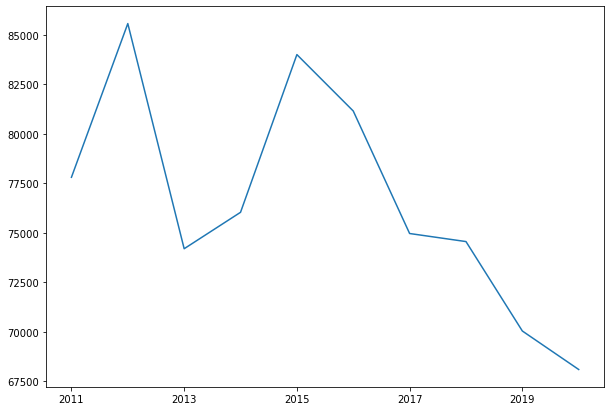

In [420]:
total_fans.iloc[0].plot(figsize=(10, 7))

Here we can see the decline in NBA total fans. which is actually at an all time low

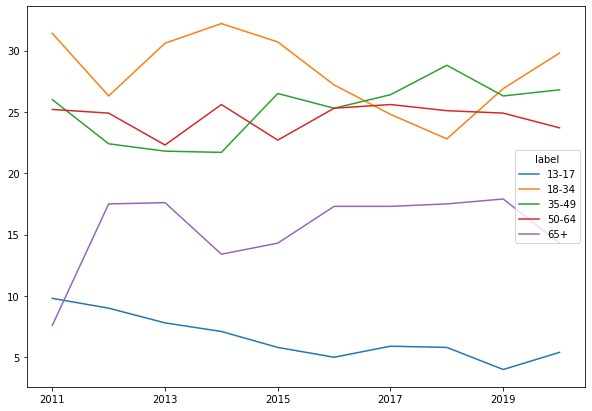

In [421]:
fan_demographics.iloc[0:5].T.plot(figsize=(10, 7))

This is the percentage of fans grouped by age over the past decade. recently there has been an upswing in fans in the 18-34 range I would like to investigate this trend further.

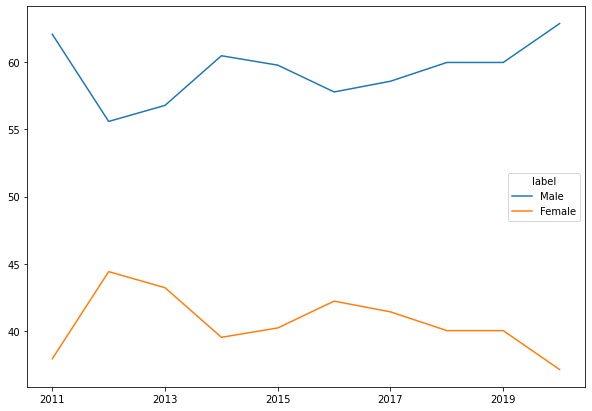

In [422]:
fan_demographics.iloc[11:13].T.plot(figsize=(10, 7))

In this graph you have the percentage of total fans based on gender. This method of data collection is outdated and does not take into account individuals who are non-binary in terms of gender. This could potentially be hiding further insights about a demographic that is becoming increasingly important.

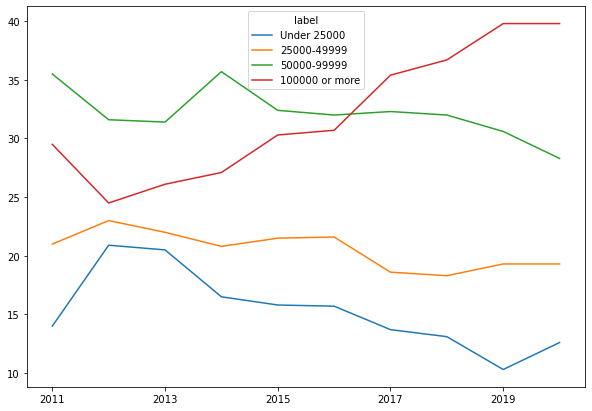

In [423]:
fan_demographics.iloc[14:18].T.plot(figsize=(10, 7))

This is the total fans grouped by income. The 100,000 and higher demographic has become more influential in the market. All the other demographics show a slight decline I am curious to know if this is due to people making higher salaries in general or if the was a shift in the demographic interested in sports.